In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib_inline.backend_inline import set_matplotlib_formats
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import calinski_harabasz_score
from typing import Dict, Optional, Tuple
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, precision_recall_curve
from sklearn.metrics import precision_score
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from scipy import stats
import warnings
warnings.filterwarnings('ignore')



In [4]:
ads_list = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/수정2_광고목록.csv')
print(f"데이터 수 : {ads_list.shape}")
ads_list.head()

데이터 수 : (445039, 21)


ads_idx    ads_code  aff_idx  adv_idx  ads_type  ads_category  \
0      160  tr71opm6C1        6       10         1             1   
1      284  xlNpfkgtLX        6       10         1             1   
2      292  7Hj8V5QKiy        6       10         1             1   
3      304  1RfxHJcuEe        6       10         2             1   
4      306  l3GyilYEVk        6       10         1             1   

               ads_name                                       ads_icon_img  \
0              리니지레드나이츠  https://lh3.googleusercontent.com/oDGXxngO9oOP...   
1  강철의함대:Ocean Overlord  http://nextapps-nas.aws.appang.kr/icon/2016122...   
2              스노우 SNOW  http://nextapps-nas.aws.appang.kr/icon/2016092...   
3       서머너즈 워: 천공의 아레나  http://nextapps-nas.aws.appang.kr/icon/EecpHzP...   
4                  하이마트  http://nextapps-nas.aws.appang.kr/icon/2016032...   

                                         ads_summary ads_save_way  ...  \
0  [앱설명]<br />[설치형] 매력만점 영웅들과 소환수들이 함께하는 취향저격 RPG...           받기  ...   
1  [앱설명]<br />[설치형] 한, 중, 일 아시아 유저들과 함께 대규모 해상 전투...           받기  ...   
2  [앱설명]<br />[설치형] 셀카, 얼굴인식 스티커, 꿀잼 카메라<br /><br...           받기  ...   
3  [앱설명]<br />[실행형] 전 세계 5000만 소환사들을 사로잡은 명작 RPG<...        최초 오픈  ...   
4                                새롭게 단장한 하이마트 쇼핑몰 앱!           받기  ...   

             ads_sdate            ads_edate ads_age_min  ads_age_max  \
0  2016-12-01 00:00:00  9999-12-31 23:59:59           0          100   
1  2016-12-29 00:00:00  9999-12-31 23:59:59           0          100   
2  2016-12-29 00:00:00  9999-12-31 23:59:59           0          100   
3  2017-01-01 00:00:00  9999-12-31 23:59:59           0          100   
4  2017-01-01 00:00:00  2019-11-01 00:00:00           0          100   

   ads_os_type  ads_contract_price  ads_reward_price  ads_order  \
0            2                 170               150     982800   
1            2                 180               160     987200   
2            2                 160               160     987300   
3            2                 230               210     931000   
4            2                 170               140    1155100   

   ads_rejoin_type              regdate  
0             NONE  2017-04-06 13:19:53  
1             NONE  2017-01-10 10:37:22  
2             NONE  2017-01-02 12:51:34  
3             NONE  2017-03-30 17:05:23  
4             NONE  2017-06-12 15:24:46  

[5 rows x 21 columns]

In [5]:
ads_list.columns

Index(['ads_idx', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type', 'ads_category',
       'ads_name', 'ads_icon_img', 'ads_summary', 'ads_save_way',
       'ads_day_cap', 'ads_sdate', 'ads_edate', 'ads_age_min', 'ads_age_max',
       'ads_os_type', 'ads_contract_price', 'ads_reward_price', 'ads_order',
       'ads_rejoin_type', 'regdate'],
      dtype='object')

In [6]:
ads_time = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/시간별적립보고서_1년치.csv')
print(f"데이터 수 : {ads_time.shape}")
ads_time.head()

데이터 수 : (6953146, 12)


rpt_time_date  rpt_time_time  ads_idx  mda_idx  rpt_time_clk  rpt_time_turn  \
0    2024-07-27              0     4418      761             1              0   
1    2024-07-27              0     7377      213             1              0   
2    2024-07-27              0     7377      337             1              0   
3    2024-07-27              0     7377      496             1              1   
4    2024-07-27              0     7528      792             1              0   

   rpt_time_scost  rpt_time_acost  rpt_time_cost  rpt_time_earn  weekday  \
0               0               0              0              0        5   
1               0               0              0              0        5   
2               0               0              0              0        5   
3             230             230            180            180        5   
4               0               0              0              0        5   

  week_type  
0        주말  
1        주말  
2        주말  
3        주말  
4        주말

In [7]:
ads_time.columns

Index(['rpt_time_date', 'rpt_time_time', 'ads_idx', 'mda_idx', 'rpt_time_clk',
       'rpt_time_turn', 'rpt_time_scost', 'rpt_time_acost', 'rpt_time_cost',
       'rpt_time_earn', 'weekday', 'week_type'],
      dtype='object')

In [8]:
ads_rwd = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/수정_광고적립.csv')
print(f"데이터 수 : {ads_rwd.shape}")
ads_rwd.head()

데이터 수 : (1475031, 14)


rwd_idx  ads_idx    ads_code  mda_idx  pub_sub_rel_id   dvc_idx  \
0  238304818   413490  CFZ6lzEmeD       22        27496512  32947806   
1  238304829   413490  CFZ6lzEmeD       22        27496512  47387244   
2  238304816   413490  CFZ6lzEmeD       22        27496512  32425124   
3  238304817   413490  CFZ6lzEmeD       22        27496513  34006545   
4  238304802   133653  rl8ud4uNQC      801               1  56867331   

                                  advid  \
0  09b6a808-4f76-4584-87c5-626f21f472a0   
1  ba4fd0c8-4f06-4dfa-9c3f-c6b39ee7066e   
2  64c675d0-8edd-4478-9906-a806651fdf92   
3  a08ebb04-e70a-4492-89d4-17fa96bf8c75   
4  dbe54f40-41b5-4423-ae2f-048fd6ecf5af   

                                  click_key  adv_cost  earn_cost  \
0  b0e22dba943810794d25c993dff425c4e16d0744       190        120   
1  0679ff4c6a14beba296e44d7ffdd88129f42ffbf       190        120   
2  68eb28d636724061da21e490a1afff6a39cd78f7       190        120   
3  37da42f12b6f732d8c8bf1a609c01e569b7f8a09       190        120   
4  624b1bbc57c9ea81005c74e1956d48e76d974816       260        195   

            click_date              regdate  ctit  cost_diff  
0  2025-07-26 00:00:31  2025-07-26 00:05:02   271         70  
1  2025-07-26 00:00:32  2025-07-26 00:08:17   465         70  
2  2025-07-26 00:00:42  2025-07-26 00:04:43   241         70  
3  2025-07-26 00:00:54  2025-07-26 00:04:45   231         70  
4  2025-07-26 00:01:07  2025-07-26 00:02:04    57         65

In [9]:
ads_rwd.columns

Index(['rwd_idx', 'ads_idx', 'ads_code', 'mda_idx', 'pub_sub_rel_id',
       'dvc_idx', 'advid', 'click_key', 'adv_cost', 'earn_cost', 'click_date',
       'regdate', 'ctit', 'cost_diff'],
      dtype='object')

In [10]:
ads_info = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/수정2_광고참여정보.csv')
print(f"데이터 수 : {ads_info.shape}")
ads_info.head()

데이터 수 : (16854865, 14)


click_key  ads_idx   dvc_idx  mda_idx  \
0  000000d54b9faad47ee99d6cd3cf53894dd4baa5   313780  61906528      539   
1  000002b4d92f7648b455877c2676452efcd22a09   412426  34422806       58   
2  0000057e97361ff3d0263aaecee34cfaa3ba30fb   443660  38366075      808   
3  00000607f60139015da3ee1dd5499db3faa100dc   360192  61894110      539   
4  0000066bc25d4a6d147c27326cf972a4de88024e   372307  61956954      539   

   pub_sub_rel_id  contract_price  media_price   click_day  click_time  \
0       144350110            6000         4500  2025-08-17          21   
1        46032732             180          170  2025-07-26           2   
2               1             170          120  2025-08-12          18   
3       144350110            6000         4500  2025-08-17           3   
4       144350110           15600        11700  2025-08-18           8   

            click_date     exp_day network          user_ip  converted  
0  2025-08-17 21:07:37  2025-09-16       0    16.184.28.219          0  
1  2025-07-26 02:18:24  2025-08-25     NaN     35.78.117.76          1  
2  2025-08-12 18:17:59  2025-09-11    WIFI      39.7.55.192          1  
3  2025-08-17 03:35:02  2025-09-16       0  211.252.100.157          0  
4  2025-08-18 08:01:26  2025-09-17       0     3.38.148.211          0

In [11]:
ads_info.columns

Index(['click_key', 'ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id',
       'contract_price', 'media_price', 'click_day', 'click_time',
       'click_date', 'exp_day', 'network', 'user_ip', 'converted'],
      dtype='object')

In [12]:
ads_join = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/참여적립조인.csv')
print(f"데이터 수 : {ads_join.shape}")
ads_join.head()

데이터 수 : (16854865, 22)


Unnamed: 0                                 click_key  ads_idx   dvc_idx  \
0           0  000000d54b9faad47ee99d6cd3cf53894dd4baa5   313780  61906528   
1           1  000002b4d92f7648b455877c2676452efcd22a09   412426  34422806   
2           2  0000057e97361ff3d0263aaecee34cfaa3ba30fb   443660  38366075   
3           3  00000607f60139015da3ee1dd5499db3faa100dc   360192  61894110   
4           4  0000066bc25d4a6d147c27326cf972a4de88024e   372307  61956954   

   mda_idx  pub_sub_rel_id  contract_price  media_price   click_day  \
0      539       144350110            6000         4500  2025-08-17   
1       58        46032732             180          170  2025-07-26   
2      808               1             170          120  2025-08-12   
3      539       144350110            6000         4500  2025-08-17   
4      539       144350110           15600        11700  2025-08-18   

   click_time  ... network          user_ip      rwd_idx    ads_code  \
0          21  ...       0    16.184.28.219          NaN         NaN   
1           2  ...     NaN     35.78.117.76  238313226.0  yuRe4YoPuZ   
2          18  ...    WIFI      39.7.55.192  239017177.0  WuIp8HKmt9   
3           3  ...       0  211.252.100.157          NaN         NaN   
4           8  ...       0     3.38.148.211          NaN         NaN   

                                  advid adv_cost earn_cost  \
0                                   NaN      NaN       NaN   
1  40ceb01c-9b60-4452-bacd-0e061fb18ab4    180.0     170.0   
2  73793f44-a471-4351-ae1c-d09accaf223a    170.0     120.0   
3                                   NaN      NaN       NaN   
4                                   NaN      NaN       NaN   

               regdate  ctit conversion  
0                  NaN   NaN          0  
1  2025-07-26 02:19:21  57.0          1  
2  2025-08-12 18:19:21  82.0          1  
3                  NaN   NaN          0  
4                  NaN   NaN          0  

[5 rows x 22 columns]

In [13]:
ads_join.columns

Index(['Unnamed: 0', 'click_key', 'ads_idx', 'dvc_idx', 'mda_idx',
       'pub_sub_rel_id', 'contract_price', 'media_price', 'click_day',
       'click_time', 'click_date', 'exp_day', 'network', 'user_ip', 'rwd_idx',
       'ads_code', 'advid', 'adv_cost', 'earn_cost', 'regdate', 'ctit',
       'conversion'],
      dtype='object')

In [14]:
ads_domain = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/광고도메인리스트_1년치.csv')
print(f"데이터 수 : {ads_domain.shape}")
ads_domain.head()

데이터 수 : (233408, 24)


Unnamed: 0 domain  row_id  ads_idx    ads_code  aff_idx  adv_idx  ads_type  \
0           0     금융  153088   154946  KoM69LPFUB        8       50         3   
1          21     게임  135518   137375  RBjgpLVOmR       71      910         3   
2          23     게임  427141   429013  TUSVjcBYtK       76     1355         3   
3          31     게임  161321   163182  OLNpNxxGJm       76     1355         3   
4          34     게임  161392   163254  r78MSmvuQk       76     1355         3   

   ads_category          ads_name  ...            ads_sdate  \
0             7     어센틱금융그룹 내보험조회  ...  2025-02-12 10:00:00   
1             8     DK모바일 리본 사전예약  ...  2025-01-10 18:00:00   
2             5   인생존망겜(레벨 67 달성)  ...  2025-07-11 16:23:32   
3             5  고블린 우드: 타이쿤 유휴 심  ...  2025-02-27 16:00:00   
4             5     Save the Pets  ...  2025-02-27 16:00:00   

             ads_edate ads_age_min ads_age_max ads_os_type ads_contract_price  \
0  2029-11-29 00:00:00           0         100           7                800   
1  2030-01-01 00:00:00           0         100           7                200   
2  9999-12-31 23:59:59           0         100           2               9600   
3  9999-12-31 23:59:59           0         100           2               4480   
4  2031-01-03 00:00:00           0         100           1               1440   

   ads_reward_price  ads_order  ads_rejoin_type              regdate  
0               640    2444400             NONE  2025-02-12 10:18:46  
1               150    2431500             NONE  2025-01-10 18:48:52  
2              7200    2460500             NONE  2025-07-11 16:23:32  
3              3360    2451800             NONE  2025-02-26 17:05:49  
4              1080    2450800             NONE  2025-02-26 17:57:33  

[5 rows x 24 columns]

In [15]:
ads_domain.columns

Index(['Unnamed: 0', 'domain', 'row_id', 'ads_idx', 'ads_code', 'aff_idx',
       'adv_idx', 'ads_type', 'ads_category', 'ads_name', 'ads_icon_img',
       'ads_summary', 'ads_save_way', 'ads_day_cap', 'ads_sdate', 'ads_edate',
       'ads_age_min', 'ads_age_max', 'ads_os_type', 'ads_contract_price',
       'ads_reward_price', 'ads_order', 'ads_rejoin_type', 'regdate'],
      dtype='object')

In [ ]:
# =========================
# 1) 데이터 준비
# =========================
df = ads_time.copy()
df["ads_idx"] = df["ads_idx"].astype(str)
df["mda_idx"] = df["mda_idx"].astype(str)
df["rpt_time_date"] = pd.to_datetime(df["rpt_time_date"], errors="coerce")

# 최근 1개월치만 필터링
# cutoff = df["rpt_time_date"].max() - pd.Timedelta(days=30)
# df = df[df["rpt_time_date"] >= cutoff].copy()

# 시간 파생
df["hour"] = pd.to_numeric(df["rpt_time_time"].astype(str).str[:2], errors="coerce").fillna(0).astype(int)
df["weekday"] = df["rpt_time_date"].dt.weekday

# 메타 조인
keep_meta = ["ads_idx","ads_name","ads_category","ads_contract_price","ads_os_type",]
keep_meta = [c for c in keep_meta if c in ads_list.columns]
meta = ads_list[keep_meta].copy()
meta["ads_idx"] = meta["ads_idx"].astype(str)
df = df.merge(meta, on="ads_idx", how="left")

# =========================
# 2) 라벨/피처
# =========================
df["label"] = (pd.to_numeric(df.get("rpt_time_turn", 0), errors="coerce").fillna(0) > 0).astype(int)

candidate_feats = ["ads_category","ads_contract_price","ads_os_type","hour","weekday", "reward_contract_ratio",
                   "ad_age_days","mean_CVR_last7d","mean_CVR_last30d","mda_size","mda_mean_CTR","is_weekend"]
features = [f for f in candidate_feats if f in df.columns]
assert len(features) > 0, "사용 가능한 피처가 없습니다."

X = df[features].copy()
y = df["label"].copy()

# 범주형 → 코드
for col in ["ads_category","ads_os_type"]:
    if col in X.columns:
        X[col] = X[col].astype(str).astype("category").cat.codes
# 수치형 안전 변환
for col in [c for c in X.columns if c not in ["ads_category","ads_os_type"]]:
    X[col] = pd.to_numeric(X[col], errors="coerce").fillna(0)

# 예측 후 매핑용 키(광고/매체/시간 맥락) 보관
keys = df[["ads_idx","mda_idx","hour","weekday"]].reset_index(drop=True)

# =========================
# 3) 시계열 유사 분할(간단): 최근 20%를 테스트
# =========================
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
keys_test = keys.iloc[split_idx:]

# =========================
# 4) LightGBM 분류 학습
# =========================
train_set = lgb.Dataset(X_train, label=y_train)
valid_set = lgb.Dataset(X_test,  label=y_test)

params = dict(
    objective="binary",
    metric="auc",
    learning_rate=0.05,
    num_leaves=31,
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=5,
    seed=42
)

model = lgb.train(
    params,
    train_set,
    valid_sets=[train_set, valid_set],
    num_boost_round=300,
    callbacks=[lgb.early_stopping(50), lgb.log_evaluation(50)]
)

# =========================
# 5) 예측 & 평가
# =========================
pred_prob = model.predict(X_test, num_iteration=model.best_iteration)
pred_cls  = (pred_prob >= 0.5).astype(int)

print("Accuracy :", accuracy_score(y_test, pred_cls))
print("ROC-AUC  :", roc_auc_score(y_test, pred_prob))

# =========================
# 6) 추천 리스트 생성
# =========================
pred_df = keys_test.copy()
pred_df["pred_prob"] = pred_prob

# 매체사별 상위 10개 광고
top10 = (pred_df.groupby(["mda_idx","ads_idx"], as_index=False)
         .agg(pred_prob=("pred_prob","mean"),
              hour=("hour","median"), weekday=("weekday","median"))
         .sort_values(["mda_idx","pred_prob"], ascending=[True, False])
         .groupby("mda_idx")
         .head(10))

# 메타 붙이기
ads_list_idx = ads_list.copy()
ads_list_idx["ads_idx"] = ads_list_idx["ads_idx"].astype(str)
top10 = top10.merge(
    ads_list_idx[["ads_idx","ads_name","ads_category","ads_contract_price","ads_os_type"]],
    on="ads_idx", how="left"
)

# 보기 좋게 출력 컬럼 정리
top10 = top10[[
    "mda_idx","ads_idx","ads_name","ads_category","ads_contract_price","ads_os_type",
    "pred_prob","hour","weekday"
]].reset_index(drop=True)

print(top10.head(20))

# (옵션) 특정 매체사만 보고 싶다면:
# mda_target = "539"
# print(top10[top10["mda_idx"] == mda_target].head(10))df

[LightGBM] [Info] Number of positive: 3080640, number of negative: 2481876
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 5562516, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553821 -> initscore=0.216123
[LightGBM] [Info] Start training from score 0.216123
Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.846405	valid_1's auc: 0.799003
[100]	training's auc: 0.848847	valid_1's auc: 0.801849
[150]	training's auc: 0.850058	valid_1's auc: 0.802836
[200]	training's auc: 0.850856	valid_1's auc: 0.802794
Early stopping, best iteration is:
[156]	training's auc: 0.85014	valid_1's auc: 0.802913
Accuracy : 0.7800924760719962
ROC-AUC  : 0.8029126443696548
   mda_idx 

In [ ]:
top10.head(20)

mda_idx ads_idx                        ads_name  ads_category  \
0     1000  359774               [간편참여] 괴물 사냥꾼 키우기           2.0   
1     1000  392169                      스킬 마법사 키우기           2.0   
2     1000  378500                       퇴마 검사 키우기           2.0   
3     1000  128004                        디아블로 이모탈           2.0   
4     1000  119943                          화산파키우기           2.0   
5     1000  403774                       WWF 클릭투기부           1.0   
6     1000  409776                       무한의 사신키우기           2.0   
7     1000  363889  대전 유성전자담배 도안점 (플레이스 보고 퀴즈 맞추기)           4.0   
8     1000  363890      유성전자담배 본점 (플레이스 보고 퀴즈 맞추기)           4.0   
9     1000  363895                [저장하기]오하이요 잠실새내점           4.0   
10    1005  355772                          스컬 디펜스           2.0   
11    1005  119943                          화산파키우기           2.0   
12    1005  128004                        디아블로 이모탈           2.0   
13    1005  358635                          쿠시인 본점           4.0   
14    1005  363896                [저장하기]모란 샤브샤브 맛집           4.0   
15    1005  358793                   [저장하기] 성수역소곱창           4.0   
16    1005  358739                   봉우리 현대백화점 판교점           4.0   
17    1005  363898                    진주맛집 가좌 오다가다           4.0   
18    1005  358740                      분지로 사운즈한남점           4.0   
19    1005  363897                  [저장하기]삼산맛집 쭈꾸미           4.0   

    ads_contract_price  ads_os_type  pred_prob  hour  weekday  
0                170.0          2.0   0.898746  11.0      4.0  
1                170.0          2.0   0.897570  14.5      3.0  
2                170.0          2.0   0.893265   4.0      5.5  
3                170.0          2.0   0.886600  19.0      1.0  
4                170.0          2.0   0.880739  20.0      1.0  
5                170.0          2.0   0.879844  16.0      3.0  
6                170.0          2.0   0.867618  23.0      0.0  
7                 20.0          7.0   0.855167   1.0      3.0  
8                 20.0          7.0   0.855167   1.0      3.0  
9                 20.0          7.0   0.855167   1.0      3.0  
10               170.0          2.0   0.901158   3.0      2.0  
11               170.0          2.0   0.893846  10.0      2.0  
12               170.0          2.0   0.877808  21.0      1.0  
13                20.0          7.0   0.855385   1.0      1.0  
14                20.0          7.0   0.851993   3.0      3.0  
15                20.0          7.0   0.851097   3.0      1.0  
16                15.0          7.0   0.848128  10.0      1.0  
17                20.0          7.0   0.845910   4.0      3.0  
18                15.0          7.0   0.845694  10.0      1.5  
19                20.0          7.0   0.843351   6.0      3.0

In [ ]:
mda_target = "539"
top10[top10["mda_idx"] == mda_target].head(10)

mda_idx ads_idx                 ads_name  ads_category  \
825     539  365000          여소: 여신이 소녀가 되었다           2.0   
826     539  445046                   K데몬헌터스           2.0   
827     539  412426    용칼이 키우기 : 용가리알 무한 지급!           2.0   
828     539  439552                      헬좀비           2.0   
829     539   28776               그라나도 에스파다M           1.0   
830     539  444350                    조조의 꿈           1.0   
831     539  430776                    붉은 도시           2.0   
832     539  392162  [친한친구] wangramyun 인스타그램           3.0   
833     539   27628                  달토끼 키우기           2.0   
834     539  443953                    신트노트            1.0   

     ads_contract_price  ads_os_type  pred_prob  hour  weekday  
825               180.0          2.0   0.761274   3.0      3.0  
826               180.0          2.0   0.755609   5.0      3.0  
827               180.0          2.0   0.746358   6.0      4.0  
828               180.0          2.0   0.745894   7.0      5.0  
829               180.0          2.0   0.743196   9.0      4.0  
830               180.0          2.0   0.742831  11.0      2.0  
831               180.0          2.0   0.740868   8.0      5.0  
832               300.0          7.0   0.733138  15.5      3.0  
833               180.0          2.0   0.729937  13.0      4.0  
834                10.0          2.0   0.669507   0.0      3.0

In [ ]:
# =========================
# 🔹 기본 분류 지표
# =========================
print("Precision:", precision_score(y_test, pred_cls))
print("Recall   :", recall_score(y_test, pred_cls))
print("F1-score :", f1_score(y_test, pred_cls))

print("\n--- 상세 Classification Report ---")
print(classification_report(y_test, pred_cls, digits=4))

# =========================
# 🔹 랭킹 기반 지표 (추천시스템 관점)
# =========================
def precision_at_k(y_true, y_prob, k=10):
    """상위 k% 확률 광고 중 실제 전환율"""
    cutoff = int(len(y_prob) * (k/100))
    idx = np.argsort(y_prob)[::-1][:cutoff]  # 확률 높은 순
    return y_true.iloc[idx].mean()

for k in [1, 5, 10]:
    print(f"Precision@{k}% :", precision_at_k(y_test, pred_prob, k))


Precision: 0.7751375945619998
Recall   : 0.8753113718188076
F1-score : 0.8221844662452262

--- 상세 Classification Report ---
              precision    recall  f1-score   support

           0     0.7895    0.6482    0.7119    582914
           1     0.7751    0.8753    0.8222    807716

    accuracy                         0.7801   1390630
   macro avg     0.7823    0.7617    0.7670   1390630
weighted avg     0.7812    0.7801    0.7760   1390630

Precision@1% : 0.947864231267079
Precision@5% : 0.9516474665976327
Precision@10% : 0.8657874488541165


In [ ]:
TOPN_DF.head(20)

mda_idx  rank  ads_idx     score                     ads_name  \
0        12     1   444361  0.813915             커넥트 CONNECT (남성)   
1        12     2   444369  0.780503             커넥트 CONNECT (여성)   
2        12     3    21037  0.767935                        바바더닷컴   
3        12     4   391165  0.743290             충청남도 카카오스토리 소식받기   
4        12     5   393761  0.710528             풀무원 PM1 스튜디오 유튜브   
5        14     1    21038  0.834637                        바바더닷컴   
6        14     2    21037  0.824744                        바바더닷컴   
7        14     3   444369  0.807677             커넥트 CONNECT (여성)   
8        14     4   119999  0.806028     팬더티비 회원가입+본인인증(남성만 참여가능)   
9        14     5   444361  0.801153             커넥트 CONNECT (남성)   
10       18     1   444361  0.808934             커넥트 CONNECT (남성)   
11       18     2   119999  0.806691     팬더티비 회원가입+본인인증(남성만 참여가능)   
12       18     3   444369  0.781836             커넥트 CONNECT (여성)   
13       18     4    21037  0.773146                        바바더닷컴   
14       18     5   264409  0.711555  Battle Night: Cyberpunk RPG   
15       22     1    21037  0.830531                        바바더닷컴   
16       22     2   443285  0.790358               실사간 고령자 케어 헬로온   
17       22     3   439216  0.763035                    돈버는 날씨서비스   
18       22     4   439163  0.762279                           더핀   
19       22     5   441075  0.760062                   아케론:종말의 서곡   

    ads_category       cvr         epc  turn  margin  
0            8.0  0.000000    0.000000     0     0.0  
1            8.0  0.000000    0.000000     0     0.0  
2            8.0  0.087719   78.947368     5     0.0  
3            3.0  0.191153   34.407583   121     0.0  
4            3.0  0.086505   15.570934    50     0.0  
5            8.0  0.135678  122.110553    27     0.0  
6            8.0  0.168798  151.918159   132     0.0  
7            8.0  0.006075    6.075334     5     0.0  
8            8.0  0.176860  176.859504   107     0.0  
9            8.0  0.002086    2.086231     3     0.0  
10           8.0  0.000000    0.000000     0     0.0  
11           8.0  0.135496  121.946565    71     0.0  
12           8.0  0.017241   17.241379     1     0.0  
13           8.0  0.189189  189.189189    14     0.0  
14           5.0  0.056604  215.094340     3     0.0  
15           8.0  0.087404   69.922879    34     0.0  
16           0.0  0.626392   75.167038  1125     0.0  
17           0.0  0.773723  139.270073   212     0.0  
18           0.0  0.816934  147.048055   714     0.0  
19           0.0  0.387097   46.451613   156     0.0

In [ ]:
# ====== 설정 ======
LOOKBACK_DAYS = 21
LABEL_DAYS    = 7
TOPK          = 10
RND           = 42
TEST_RATIO    = 0.20   # 타임라인 최근 20%를 테스트로 사용

import pandas as pd, numpy as np
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

# ====== 유틸 ======
def to_dt_safe(s: pd.Series) -> pd.Series:
    s = s.astype(str).str.strip().str.replace(".", "-", regex=False)
    s = s.replace({"0000-00-00": np.nan, "0000-00-00 00:00:00": np.nan, "NaT": np.nan, "": np.nan})
    return pd.to_datetime(s, errors="coerce")

def sdiv(a, b):
    a = a.astype(float); b = b.astype(float)
    return pd.Series(np.where(b==0, 0, a/b), index=getattr(a, "index", None))

def map_at_k(df, k=5):
    vals=[]
    for _, g in df.groupby("mda_idx"):
        g = g.sort_values("score", ascending=False).head(k)
        hits=0; ap=0.0; pos=int(g["label"].sum())
        for i, lab in enumerate(g["label"].tolist(), 1):
            if lab==1: hits+=1; ap += hits/i
        vals.append(0 if pos==0 else ap/min(k,pos))
    return float(np.mean(vals)) if vals else 0.0

def recall_at_k(df, k=5):
    vals=[]
    for _, g in df.groupby("mda_idx"):
        topk = g.sort_values("score", ascending=False).head(k)
        pos_total = g["label"].sum()
        vals.append(0 if pos_total==0 else float(topk["label"].sum())/pos_total)
    return float(np.mean(vals)) if vals else 0.0


def infer_train_test_by_ratio(ads_time_df, ads_join_df, lookback_days=42, label_days=7, test_ratio=0.20):
    dt_time = to_dt_safe(ads_time_df["rpt_time_date"]) if "rpt_time_date" in ads_time_df else pd.Series([], dtype="datetime64[ns]")
    dt_join = to_dt_safe(ads_join_df["click_date"])    if "click_date"    in ads_join_df else pd.Series([], dtype="datetime64[ns]")
    dates = pd.concat([dt_time, dt_join], ignore_index=True).dropna()
    if dates.empty: raise ValueError("타임라인 날짜가 없습니다.")
    dates = pd.to_datetime(sorted(dates.dt.normalize().unique()))
    min_asof = dates.min() + pd.Timedelta(days=lookback_days)
    max_asof = dates.max() - pd.Timedelta(days=label_days)
    feas = pd.Series([d for d in dates if (d>=min_asof) and (d<=max_asof)])
    if len(feas) < 5: raise ValueError("유효 asof 날짜가 너무 적습니다.")
    n = len(feas); idx_test_start = int(np.floor(n * (1 - test_ratio)))
    TRAIN_END = feas.iloc[idx_test_start-1].strftime("%Y-%m-%d")
    TEST_END  = feas.iloc[-1].strftime("%Y-%m-%d")
    return TRAIN_END, TEST_END

# ====== 피처/레이블 ======
def build_features(asof):
    asof = pd.Timestamp(asof)
    start = asof - pd.Timedelta(days=LOOKBACK_DAYS)

    t = ads_time_df.copy()
    t["rpt_time_date"] = to_dt_safe(t["rpt_time_date"])

    # 수치형 안전 변환
    for c in ["rpt_time_clk","rpt_time_turn","rpt_time_earn","rpt_time_cost","rpt_time_scost","rpt_time_acost"]:
        if c in t.columns:
            t[c] = pd.to_numeric(t[c], errors="coerce").fillna(0)

    t = t[(t["rpt_time_date"]>=start) & (t["rpt_time_date"]<asof)]

    # cost 컬럼 없으면 scost+acost로 대체
    if "rpt_time_cost" in t.columns:
        cost_col = "rpt_time_cost"
    else:
        t["__tmp_cost__"] = t.get("rpt_time_scost", 0) + t.get("rpt_time_acost", 0)
        cost_col = "__tmp_cost__"

    agg = t.groupby(["mda_idx","ads_idx"]).agg(
        clk=("rpt_time_clk","sum"),
        turn=("rpt_time_turn","sum"),
        earn=("rpt_time_earn","sum"),
        cost=(cost_col,"sum"),
        days=("rpt_time_date","nunique")
    ).reset_index()

    agg["cvr"]       = sdiv(agg["turn"], agg["clk"])
    agg["epc"]       = sdiv(agg["earn"], agg["clk"])
    agg["margin"]    = sdiv(agg["earn"] - agg["cost"], agg["cost"]).fillna(0)
    agg["act_ratio"] = sdiv(agg["days"], pd.Series(LOOKBACK_DAYS, index=agg.index))

    # ---- 메타 조인(방어적) ----
    meta_src = ads_list_df if "ads_list_df" in globals() else ads_list
    base_cols = ["ads_idx","ads_name","ads_category","ads_reward_price","ads_contract_price","ads_os_type"]
    meta_cols = [c for c in base_cols if c in meta_src.columns]

    # ads_idx가 없으면 조인 불가 → 메타는 스킵
    if "ads_idx" in meta_src.columns and meta_cols:
        meta = meta_src[meta_cols].drop_duplicates("ads_idx").copy()
    else:
        meta = pd.DataFrame({"ads_idx": agg["ads_idx"].unique()})

    # 숫자형 가격 컬럼 보정(없으면 0으로 생성)
    for c in ["ads_reward_price","ads_contract_price"]:
        if c in meta.columns:
            meta[c] = pd.to_numeric(meta[c], errors="coerce").fillna(0.0)
        else:
            meta[c] = 0.0

    feat = agg.merge(meta, on="ads_idx", how="left")

    # 비율 파생
    feat["reward_contract_ratio"] = sdiv(
        feat["ads_reward_price"],
        feat["ads_contract_price"].replace(0, np.nan)
    ).fillna(0)

    return feat.fillna(0)

def build_labels(asof):
    start = pd.Timestamp(asof)
    end   = start + pd.Timedelta(days=LABEL_DAYS)

    t = ads_time_df.copy()
    t["rpt_time_date"] = to_dt_safe(t["rpt_time_date"])

    # asof ~ asof+LABEL_DAYS(미래) 구간에서 mda×ads 전환합>0 → label=1
    win = t[(t["rpt_time_date"] >= start) & (t["rpt_time_date"] < end)]
    y = (
        pd.to_numeric(win["rpt_time_turn"], errors="coerce").fillna(0)
        .groupby([win["mda_idx"], win["ads_idx"]]).sum()
        > 0
    ).astype(int).reset_index(name="label")

    return y


def make_xy(asof):
    X = build_features(asof)
    y = build_labels(asof)
    df = X.merge(y, on=["mda_idx","ads_idx"], how="left").fillna({"label":0})
    feats = ["clk","turn","earn","cost","cvr","epc","margin","act_ratio",
             "ads_reward_price","ads_contract_price","reward_contract_ratio"]
    return df, feats

# ====== 시점 산정 (최근 20% 테스트) ======
TRAIN_END, TEST_END = infer_train_test_by_ratio(ads_time_df, ads_join_df, LOOKBACK_DAYS, LABEL_DAYS, TEST_RATIO)

# ====== 데이터 구성 (학습은 TRAIN만, 검증/지표 없음) ======
train_df, feats = make_xy(TRAIN_END)

# ====== 모델 학습(단일: LightGBM). 라벨 전부 0이면 휴리스틱(epc) 사용 ======
# ====== 모델 학습(불균형 가중 + 내부 검증 + 얼리스톱) ======
use_model = train_df["label"].nunique() >= 2
if use_model:
    # --- TRAIN 내부에서 시간기반 '간이 검증' 만들기: TRAIN_END 이전 날짜의 마지막 10%를 검증으로 사용
    feas_dates = to_dt_safe(ads_time_df["rpt_time_date"]).dropna().dt.normalize().unique()
    feas_dates = pd.to_datetime(sorted(feas_dates))
    feas_train = feas_dates[feas_dates < pd.Timestamp(TRAIN_END)]

    if len(feas_train) > 20:
        idx_valid_start = int(len(feas_train) * 0.9)  # 마지막 10%
        VALID_END = feas_train[idx_valid_start].strftime("%Y-%m-%d")
        valid_df, _ = make_xy(VALID_END)
        # 검증셋에도 양성 없으면 백업 전략
        if valid_df["label"].nunique() < 2:
            valid_df = train_df.sample(frac=0.1, random_state=RND)
    else:
        # 날짜가 너무 적으면 샘플로 대체
        VALID_END = TRAIN_END
        valid_df = train_df.sample(frac=0.1, random_state=RND)

    X_tr, y_tr = train_df[feats].values, train_df["label"].values
    X_va, y_va = valid_df[feats].values, valid_df["label"].values

    # --- 불균형 가중치 (scale_pos_weight = neg/pos)
    pos = int(y_tr.sum()); neg = len(y_tr) - pos
    spw = (neg / max(pos, 1)) if pos > 0 else 1.0

    # --- LightGBM with early stopping
    model = LGBMClassifier(
        n_estimators=3000,          # 크게 두고 얼리스톱으로 결정
        learning_rate=0.02,         # 조금 더 낮게
        num_leaves=63,              # 용량 업
        min_child_samples=200,      # 과적합 억제
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        scale_pos_weight=spw,       # 불균형 대응
        random_state=RND
    )

    # sklearn API의 얼리스톱 사용
    model.fit(
        X_tr, y_tr,
        eval_set=[(X_va, y_va)],
        eval_metric="auc",
        callbacks=[
            early_stopping(stopping_rounds=100, first_metric_only=True),  # 개선 없으면 중단
            log_evaluation(period=50),                                     # 50라운드마다 로그(끄려면 0)
        ],
    )

# ====== 오프라인 테스트 (TEST_END 기준 label로 평가) ======
test_df, _ = make_xy(TEST_END)  # TEST_END에 대해 라벨 생성
test_scores = (model.predict_proba(test_df[feats].values)[:,1]
               if use_model else test_df["epc"])
eval_df = test_df[["mda_idx","ads_idx","label"]].copy()
eval_df["score"] = test_scores

print({"Offline_MAP@5": map_at_k(eval_df, k=TOPK),
       "Offline_Recall@5": recall_at_k(eval_df, k=TOPK)})

# ====== 최신 스냅샷 스코어링 & TOP-N ======
latest_feat = build_features(TEST_END)
if use_model:
    scores = model.predict_proba(latest_feat[feats].values)[:,1]
else:
    scores = latest_feat["epc"]  # 간단 휴리스틱

scored = latest_feat[["mda_idx","ads_idx","ads_name","ads_category","cvr","epc","turn","margin"]].copy()
scored["score"] = scores

topn = []
for _, g in scored.groupby("mda_idx"):
    k = g.sort_values("score", ascending=False).head(TOPK).copy()
    k["rank"] = range(1, len(k)+1)
    topn.append(k)
TOPN_DF = pd.concat(topn, ignore_index=True)[
    ["mda_idx","rank","ads_idx","score","ads_name","ads_category","cvr","epc","turn","margin"]
].sort_values(["mda_idx","rank"])

# 결과 미리보기
print({"TRAIN_END": TRAIN_END, "TEST_END": TEST_END, "use_model": use_model})
print(TOPN_DF.head(20))


[LightGBM] [Info] Number of positive: 3206, number of negative: 43704
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1668
[LightGBM] [Info] Number of data points in the train set: 46910, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.068344 -> initscore=-2.612416
[LightGBM] [Info] Start training from score -2.612416
Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.740617	valid_0's binary_logloss: 0.311699
[100]	valid_0's auc: 0.731678	valid_0's binary_logloss: 0.390613
Early stopping, best iteration is:
[5]	valid_0's auc: 0.764855	valid_0's binary_logloss: 0.197728
Evaluated only: auc
{'Offline_MAP@5': 0.6037878535958145, 'Offline_Recall@5': 0.5353303962028293}
{'TRAIN_END': '2025-06-08', 'TEST_END': '2025-08-22', 'use_model': True}
    mda_idx  rank  ads_idx     score            

In [ ]:
TOPN_DF.head(20)

mda_idx  rank  ads_idx     score                       ads_name  \
0        12     1    21037  0.158360                          바바더닷컴   
1        12     2   119999  0.158360       팬더티비 회원가입+본인인증(남성만 참여가능)   
2        12     3   356716  0.158360                      충청남도 페이스북   
3        12     4   391165  0.158360               충청남도 카카오스토리 소식받기   
4        12     5   426586  0.158360                    충청남도 X(트위터)   
5        12     6   434988  0.158360                           GS25   
6        12     7    11124  0.148663            [친한친구] 베지밀 공식 인스타그램   
7        12     8   444244  0.145745        국가통합바이오빅데이터구축사업 참여 사전신청   
8        12     9    18504  0.143973                       정식품 페이스북   
9        12    10   422770  0.142968                    청소년 상담채널 라임   
10       14     1   339422  0.160924                         윈조이 포커   
11       14     2   119999  0.160924       팬더티비 회원가입+본인인증(남성만 참여가능)   
12       14     3   405610  0.160924        LUDUS - Merge Arena PvP   
13       14     4   436643  0.160924           PLAYTIME - 게임으로 돈 벌기   
14       14     5    12923  0.160924                        짤 – 시즌2   
15       14     6   372307  0.160924  Happy Color® - 컬러링북, 숫자 색칠 게임   
16       14     7   372305  0.160924  Happy Color® - 컬러링북, 숫자 색칠 게임   
17       14     8   364106  0.160924              미툰 코인 구매 (5천원 이상)   
18       14     9   351170  0.160924                      Cash Cow    
19       14    10   441329  0.160924           I9: 인페르노 나인 - 만국 총력전   

    ads_category       cvr          epc  turn    margin  
0              8  0.140351   126.315789     8 -0.375000  
1              8  0.170213   153.191489     8 -0.250000  
2              3  0.241791    29.014925   243 -0.571429  
3              3  0.208178    37.472119   168 -0.357143  
4              3  0.542857   108.571429    19 -0.285714  
5              8  0.047074    35.305263   559 -0.250000  
6              3  0.187500    22.500000     6 -0.571429  
7              8  0.236641   236.641221    31 -0.500000  
8              3  0.666667   120.000000     4 -0.299611  
9              2  0.500894    60.107335   560 -0.294118  
10             5  0.061033   219.718310    39 -0.250000  
11             8  0.179890   179.890024   229 -0.166667  
12             5  0.045889  1009.560229    24 -0.266667  
13             5  0.013029    78.762215    36 -0.253704  
14             8  0.252632    88.421053    24 -0.416667  
15             5  0.010842   126.855713    13 -0.250000  
16             5  0.035294   494.117647     6 -0.313725  
17            10  0.029046    92.946058     7 -0.200000  
18             5  0.071429   371.428571    20 -0.277778  
19             5  0.105882   571.764706    18 -0.250000

In [ ]:
TOPN_DF[TOPN_DF["mda_idx"] == 539].head(10)

mda_idx  rank  ads_idx     score                            ads_name  \
406      539     1   405610  0.160924             LUDUS - Merge Arena PvP   
407      539     2   369820  0.160924                 Hero Wars: Alliance   
408      539     3   368474  0.160924                            드래곤 엠파이어   
409      539     4   441329  0.160924                I9: 인페르노 나인 - 만국 총력전   
410      539     5   364671  0.160924                        Merge Sweets   
411      539     6    16895  0.160924            전국 최대 부동산 경매! 한톡경매 (직과금)   
412      539     7   140831  0.160924                RAID: Shadow Legends   
413      539     8   140832  0.160924         MONEY CASH - 게임 플레이 및 돈 벌기    
414      539     9   438328  0.158360  [리뷰] 중년천국 - 랜덤채팅, 비밀만남, 만남, 채팅, 중년   
415      539    10   391165  0.158360                    충청남도 카카오스토리 소식받기   

     ads_category       cvr         epc  turn    margin  
406             5  0.003035   57.663126     2 -0.296296  
407             5  0.003850   34.648701     4 -0.250000  
408             5  0.001035   25.866529     2 -0.255952  
409             5  0.038603  208.455882    21 -0.250000  
410             5  0.003009   21.063190     3 -0.270833  
411            10  0.002757   22.058824     3 -0.200000  
412             5  0.001946   25.291829     2 -0.277778  
413             5  0.020566  152.185090    24 -0.255233  
414             8  0.077748   58.310992    29 -0.250000  
415             3  0.252987   45.537662   487 -0.357143

In [ ]:
ads_info['click_day'].agg(['min','max'])


min    2025-07-26
max    2025-08-25
Name: click_day, dtype: object

In [ ]:
ads_time.head()

rpt_time_date  rpt_time_time  ads_idx  mda_idx  rpt_time_clk  rpt_time_turn  \
0    2024-07-27              0     4418      761             1              0   
1    2024-07-27              0     7377      213             1              0   
2    2024-07-27              0     7377      337             1              0   
3    2024-07-27              0     7377      496             1              1   
4    2024-07-27              0     7528      792             1              0   

   rpt_time_scost  rpt_time_acost  rpt_time_cost  rpt_time_earn  weekday  \
0               0               0              0              0        5   
1               0               0              0              0        5   
2               0               0              0              0        5   
3             230             230            180            180        5   
4               0               0              0              0        5   

  week_type  
0        주말  
1        주말  
2        주말  
3        주말  
4        주말

In [ ]:
# ====== 설정 ======
LOOKBACK_DAYS = 21
LABEL_DAYS    = 7
TOPK          = 5
RND           = 42
TEST_RATIO    = 0.10   # ads_time 기간 내 최근 10%로 테스트

import pandas as pd, numpy as np
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

# ====== 유틸 ======
def to_dt_safe(s: pd.Series) -> pd.Series:
    s = s.astype(str).str.strip().str.replace(".", "-", regex=False)
    s = s.replace({"0000-00-00": np.nan, "0000-00-00 00:00:00": np.nan, "NaT": np.nan, "": np.nan})
    return pd.to_datetime(s, errors="coerce")

def sdiv(a, b):
    a = a.astype(float); b = b.astype(float)
    return pd.Series(np.where(b==0, 0, a/b), index=getattr(a, "index", None))

def map_at_k(df, k=5):
    vals=[]
    for _, g in df.groupby("mda_idx"):
        g = g.sort_values("score", ascending=False).head(k)
        hits=0; ap=0.0; pos=int(g["label"].sum())
        for i, lab in enumerate(g["label"].tolist(), 1):
            if lab==1: hits+=1; ap += hits/i
        vals.append(0 if pos==0 else ap/min(k,pos))
    return float(np.mean(vals)) if vals else 0.0

def recall_at_k(df, k=5):
    vals=[]
    for _, g in df.groupby("mda_idx"):
        topk = g.sort_values("score", ascending=False).head(k)
        pos_total = g["label"].sum()
        vals.append(0 if pos_total==0 else float(topk["label"].sum())/pos_total)
    return float(np.mean(vals)) if vals else 0.0

# ====== 분할: ads_time만 기준 ======
def infer_train_test_by_ratio_timeonly(ads_time_df, lookback_days=21, label_days=7, test_ratio=0.1):
    dt = to_dt_safe(ads_time_df["rpt_time_date"]).dropna().dt.normalize()
    if dt.empty: raise ValueError("ads_time에 날짜가 없습니다.")
    dates = pd.to_datetime(sorted(dt.unique()))
    min_asof = dates.min() + pd.Timedelta(days=lookback_days)
    max_asof = dates.max() - pd.Timedelta(days=label_days)
    feas = [d for d in dates if (d>=min_asof) and (d<=max_asof)]
    if len(feas) < 5: raise ValueError("유효 as-of가 부족합니다.")
    idx_test_start = int(np.floor(len(feas) * (1 - test_ratio)))
    return feas[idx_test_start-1].strftime("%Y-%m-%d"), feas[-1].strftime("%Y-%m-%d")

# ====== 피처/라벨 (ads_time 기반) ======
def build_features(asof):
    asof = pd.Timestamp(asof); start = asof - pd.Timedelta(days=LOOKBACK_DAYS)
    t = ads_time_df.copy()
    t["rpt_time_date"] = to_dt_safe(t["rpt_time_date"])
    t = t[(t["rpt_time_date"]>=start) & (t["rpt_time_date"]<asof)]
    agg = t.groupby(["mda_idx","ads_idx"]).agg(
        clk=("rpt_time_clk","sum"), turn=("rpt_time_turn","sum"),
        earn=("rpt_time_earn","sum"), cost=("rpt_time_cost","sum"),
        days=("rpt_time_date","nunique")
    ).reset_index()
    agg["cvr"]       = sdiv(agg["turn"], agg["clk"])
    agg["epc"]       = sdiv(agg["earn"], agg["clk"])
    agg["margin"]    = sdiv(agg["earn"] - agg["cost"], agg["cost"]).fillna(0)
    agg["act_ratio"] = sdiv(agg["days"], pd.Series(LOOKBACK_DAYS, index=agg.index))

    meta_cols = ["ads_idx","ads_name","ads_category","ads_reward_price","ads_contract_price","ads_os_type"]
    meta = ads_list_df[meta_cols].drop_duplicates("ads_idx").copy()
    for c in ["ads_reward_price","ads_contract_price"]:
        if c in meta: meta[c] = pd.to_numeric(meta[c], errors="coerce").fillna(0.0)

    feat = agg.merge(meta, on="ads_idx", how="left")
    feat["reward_contract_ratio"] = sdiv(
        feat["ads_reward_price"], feat["ads_contract_price"].replace(0, np.nan)
    ).fillna(0)
    return feat.fillna(0)

# 미 래 라벨: asof~asof+LABEL_DAYS 사이 turn 합>0 (ads_time에서 직접)
def build_labels(asof):
    start = pd.Timestamp(asof); end = start + pd.Timedelta(days=LABEL_DAYS)
    t = ads_time_df.copy()
    t["rpt_time_date"] = to_dt_safe(t["rpt_time_date"])
    win = t[(t["rpt_time_date"]>=start) & (t["rpt_time_date"]<end)]
    y = (pd.to_numeric(win["rpt_time_turn"], errors="coerce").fillna(0)
           .groupby([win["mda_idx"], win["ads_idx"]]).sum() > 0
        ).astype(int).reset_index(name="label")
    return y

def make_xy(asof):
    X = build_features(asof)
    y = build_labels(asof)
    df = X.merge(y, on=["mda_idx","ads_idx"], how="left").fillna({"label":0})
    feats = ["clk","turn","earn","cost","cvr","epc","margin","act_ratio",
             "ads_reward_price","ads_contract_price","reward_contract_ratio"]
    return df, feats

# ====== 시점 산정 (ads_time 범위: 2024-07-27 ~ 2025-08-29 가정) ======
TRAIN_END, TEST_END = infer_train_test_by_ratio_timeonly(
    ads_time_df, LOOKBACK_DAYS, LABEL_DAYS, TEST_RATIO
)

# ====== 학습 ======
train_df, feats = make_xy(TRAIN_END)
use_model = train_df["label"].nunique() >= 2
if use_model:
    # 간이 검증: TRAIN의 10% 샘플 (시간 검증으로 바꿔도 OK)
    valid_df = train_df.sample(frac=0.1, random_state=RND)
    X_tr, y_tr = train_df[feats].values, train_df["label"].values
    X_va, y_va = valid_df[feats].values, valid_df["label"].values

    pos = int(y_tr.sum()); neg = len(y_tr) - pos
    spw = (neg / max(pos, 1)) if pos>0 else 1.0

    model = LGBMClassifier(
        n_estimators=3000, learning_rate=0.03,
        num_leaves=63, min_child_samples=200,
        subsample=0.8, colsample_bytree=0.8,
        reg_lambda=1.0, scale_pos_weight=spw,
        random_state=RND
    )
    model.fit(
        X_tr, y_tr,
        eval_set=[(X_va, y_va)],
        eval_metric="auc",
        callbacks=[early_stopping(100), log_evaluation(50)],
    )

# ====== 오프라인 테스트 (TEST_END 기준) ======
test_df, _ = make_xy(TEST_END)
test_scores = (model.predict_proba(test_df[feats].values,
                                   num_iteration=getattr(model, "best_iteration_", None))[:,1]
               if use_model else test_df["epc"])
eval_df = test_df[["mda_idx","ads_idx","label"]].copy()
eval_df["score"] = test_scores
print({"TRAIN_END": TRAIN_END, "TEST_END": TEST_END,
       "MAP@5": round(map_at_k(eval_df, TOPK), 4),
       "Recall@5": round(recall_at_k(eval_df, TOPK), 4),
       "use_model": use_model})

# ====== 최신 스냅샷 TOP-N (운영용) ======
# 라벨 창이 ads_time에 들어오도록 max-LabelDays로 as-of 지정
ASOF_PRED = (to_dt_safe(ads_time_df["rpt_time_date"]).dropna().max().normalize()
             - pd.Timedelta(days=LABEL_DAYS)).strftime("%Y-%m-%d")

latest_feat = build_features(ASOF_PRED)
scores = (model.predict_proba(latest_feat[feats].values,
                              num_iteration=getattr(model, "best_iteration_", None))[:,1]
          if use_model else latest_feat["epc"])

scored = latest_feat[["mda_idx","ads_idx","ads_name","ads_category","cvr","epc","turn","margin"]].copy()
scored["score"] = scores

topn = []
for _, g in scored.groupby("mda_idx"):
    k = g.sort_values("score", ascending=False).head(TOPK).copy()
    k["rank"] = range(1, len(k)+1)
    topn.append(k)

TOPN_DF = pd.concat(topn, ignore_index=True)[
    ["mda_idx","rank","ads_idx","score","ads_name","ads_category","cvr","epc","turn","margin"]
].sort_values(["mda_idx","rank"])

print({"ASOF_PRED": ASOF_PRED})
print(TOPN_DF.head(20))


[LightGBM] [Info] Number of positive: 2490, number of negative: 30819
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2143
[LightGBM] [Info] Number of data points in the train set: 33309, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.074755 -> initscore=-2.515849
[LightGBM] [Info] Start training from score -2.515849
Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.918086	valid_0's binary_logloss: 0.306827
[100]	valid_0's auc: 0.925907	valid_0's binary_logloss: 0.351055
Early stopping, best iteration is:
[5]	valid_0's auc: 0.90271	valid_0's binary_logloss: 0.216567
{'TRAIN_END': '2025-07-15', 'TEST_END': '2025-08-22', 'MAP@5': 0.6406, 'Recall@5': 0.3567, 'use_model': True}
{'ASOF_PRED': '2025-08-22'}
    mda_idx  rank

In [ ]:
# ====== 설정 ======
LOOKBACK_DAYS = 21       # 라벨 창 분리용 as-of만 씀 (피처 집계 안함)
LABEL_DAYS    = 7
TOPK          = 5
RND           = 42
TEST_RATIO    = 0.10     # ads_time 기간 내 최근 10%로 테스트

import pandas as pd, numpy as np
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

# ====== 유틸 ======
def to_dt_safe(s: pd.Series) -> pd.Series:
    s = s.astype(str).str.strip().str.replace(".", "-", regex=False)
    s = s.replace({"0000-00-00": np.nan, "0000-00-00 00:00:00": np.nan, "NaT": np.nan, "": np.nan})
    return pd.to_datetime(s, errors="coerce")

def map_at_k(df, k=5):
    vals=[]
    for _, g in df.groupby("mda_idx"):
        g = g.sort_values("score", ascending=False).head(k)
        hits=0; ap=0.0; pos=int(g["label"].sum())
        for i, lab in enumerate(g["label"].tolist(), 1):
            if lab==1: hits+=1; ap += hits/i
        vals.append(0 if pos==0 else ap/min(k,pos))
    return float(np.mean(vals)) if vals else 0.0

def recall_at_k(df, k=5):
    vals=[]
    for _, g in df.groupby("mda_idx"):
        topk = g.sort_values("score", ascending=False).head(k)
        pos_total = g["label"].sum()
        vals.append(0 if pos_total==0 else float(topk["label"].sum())/pos_total)
    return float(np.mean(vals)) if vals else 0.0

def infer_train_test_by_ratio_timeonly(ads_time_df, lookback_days=21, label_days=7, test_ratio=0.1):
    dt = to_dt_safe(ads_time_df["rpt_time_date"]).dropna().dt.normalize()
    dates = pd.to_datetime(sorted(dt.unique()))
    min_asof = dates.min() + pd.Timedelta(days=lookback_days)
    max_asof = dates.max() - pd.Timedelta(days=label_days)
    feas = [d for d in dates if (d>=min_asof) and (d<=max_asof)]
    idx_test_start = int(np.floor(len(feas) * (1 - test_ratio)))
    return feas[idx_test_start-1].strftime("%Y-%m-%d"), feas[-1].strftime("%Y-%m-%d")

# ====== “있는 컬럼만”으로 피처 테이블 만들기 ======
# 핵심 아이디어: as-of 이전의 **각 mda×ads 최신 1행**(슬롯)을 고르고,
# ads_list / ads_info / ads_join / ads_domain의 원시 컬럼을 "그대로" 조인
def latest_slot_features(asof):
    asof = pd.Timestamp(asof)

    # 1) 각 mda×ads 최신 슬롯 1행
    t = ads_time_df.copy()
    t["rpt_time_date"] = to_dt_safe(t["rpt_time_date"])
    t = t[t["rpt_time_date"] < asof]
    t = (t.sort_values(["mda_idx","ads_idx","rpt_time_date","rpt_time_time"])
           .groupby(["mda_idx","ads_idx"], as_index=False).tail(1))

    # 2) ads_list 메타(원시 컬럼)
    meta_cols = ["ads_idx","ads_category","ads_type","ads_os_type",
                 "ads_age_min","ads_age_max","ads_day_cap","ads_rejoin_type",
                 "ads_contract_price","ads_reward_price","adv_idx","aff_idx",
                 "ads_order","ads_sdate","ads_edate","regdate","ads_name"]
    meta_cols = [c for c in meta_cols if c in ads_list_df.columns]
    X = t.merge(ads_list_df[meta_cols].drop_duplicates("ads_idx"), on="ads_idx", how="left")

    # 3) info/join/domain에서 as-of 이전 최신 1건만 붙이기 (원시 컬럼)
    def latest_one(df, keys, when_col, picks):
        if df is None or df.empty: return pd.DataFrame(columns=keys+picks)
        d = df.copy()
        d[when_col] = to_dt_safe(d[when_col])
        d = d[d[when_col] < asof]
        if d.empty: return pd.DataFrame(columns=keys+picks)
        d = (d.sort_values(keys+[when_col,"click_time"] if "click_time" in d.columns else keys+[when_col])
               .groupby(keys, as_index=False).tail(1))
        return d[keys+picks]

    keys = ["mda_idx","ads_idx"]

    info_picks = [c for c in ["network","contract_price","media_price","converted"] if c in getattr(ads_info_df, "columns", [])]
    if info_picks:
        X = X.merge(latest_one(ads_info_df, keys, "click_date", info_picks),
                    on=keys, how="left", suffixes=("","_info"))

    join_picks = [c for c in ["adv_cost","earn_cost","conversion","ctit","network"] if c in getattr(ads_join_df, "columns", [])]
    if join_picks:
        X = X.merge(latest_one(ads_join_df, keys, "click_date", join_picks),
                    on=keys, how="left", suffixes=("","_join"))

    if "ads_domain_df" in globals() and not ads_domain_df.empty:
        X = X.merge(ads_domain_df[["ads_idx","domain"]].drop_duplicates("ads_idx"), on="ads_idx", how="left")

    # 4) 형 변환(계산 X, 카테고리/수치/문자 파싱만)
    cat_cols = [c for c in [
        "ads_category","ads_type","ads_os_type","weekday","week_type","rpt_time_time",
        "ads_rejoin_type","adv_idx","aff_idx","ctit","network","network_join","domain"
    ] if c in X.columns]
    for c in cat_cols: X[c] = X[c].astype("category")

    num_cols = [c for c in [
        "ads_age_min","ads_age_max","ads_day_cap","ads_contract_price","ads_reward_price",
        "rpt_time_clk","rpt_time_turn","rpt_time_cost","rpt_time_scost","rpt_time_acost","rpt_time_earn",
        "contract_price","media_price","adv_cost","earn_cost","converted","conversion","ads_order"
    ] if c in X.columns]
    for c in num_cols: X[c] = pd.to_numeric(X[c], errors="coerce").fillna(0)

    # 날짜는 문자열 카테고리로(숫자화하지 않음)
    date_cols = [c for c in ["ads_sdate","ads_edate","regdate","rpt_time_date"] if c in X.columns]
    for d in date_cols:
        X[d] = to_dt_safe(X[d]).astype(str).astype("category")

    # 학습/추론에 쓸 피처 목록(키/표시용 제외)
    drop_cols = {"mda_idx","ads_idx","ads_name"}  # 키/표시용
    feats = [c for c in X.columns if c not in drop_cols]
    return X, feats

# ====== 레이블: as-of ~ as-of+LABEL_DAYS에 turn>0 (ads_time 원시로)
def build_labels(asof):
    start = pd.Timestamp(asof); end = start + pd.Timedelta(days=LABEL_DAYS)
    t = ads_time_df.copy()
    t["rpt_time_date"] = to_dt_safe(t["rpt_time_date"])
    win = t[(t["rpt_time_date"]>=start) & (t["rpt_time_date"]<end)]
    y = (pd.to_numeric(win["rpt_time_turn"], errors="coerce").fillna(0)
           .groupby([win["mda_idx"], win["ads_idx"]]).sum() > 0
        ).astype(int).reset_index(name="label")
    return y

def make_xy(asof):
    X, feats = latest_slot_features(asof)
    y = build_labels(asof)
    df = X.merge(y, on=["mda_idx","ads_idx"], how="left").fillna({"label":0})
    return df, feats

# ====== 분할: ads_time 기간 내에서만 ======
TRAIN_END, TEST_END = infer_train_test_by_ratio_timeonly(ads_time_df, LOOKBACK_DAYS, LABEL_DAYS, TEST_RATIO)

# ====== 학습(있는 컬럼만) ======
train_df, feats = make_xy(TRAIN_END)
use_model = train_df["label"].nunique() >= 2
if use_model:
    valid_df = train_df.sample(frac=0.1, random_state=RND)

    X_tr, y_tr = train_df[feats], train_df["label"].values
    X_va, y_va = valid_df[feats], valid_df["label"].values

    pos = int(y_tr.sum()); neg = len(y_tr) - pos
    spw = (neg / max(pos, 1)) if pos>0 else 1.0

    model = LGBMClassifier(
        n_estimators=3000, learning_rate=0.03,
        num_leaves=63, min_child_samples=200,
        subsample=0.8, colsample_bytree=0.8,
        reg_lambda=1.0, scale_pos_weight=spw,
        random_state=RND
    )
    model.fit(
        X_tr, y_tr,
        eval_set=[(X_va, y_va)],
        eval_metric="auc",
        callbacks=[early_stopping(100), log_evaluation(50)],
    )

# ====== 오프라인 테스트 (TEST_END 기준) ======
test_df, _ = make_xy(TEST_END)
test_scores = (model.predict_proba(test_df[feats], num_iteration=getattr(model,"best_iteration_", None))[:,1]
               if use_model else pd.Series(0.5, index=test_df.index))  # 폴백: 중간값
eval_df = test_df[["mda_idx","ads_idx","label"]].copy()
eval_df["score"] = test_scores
print({"TRAIN_END": TRAIN_END, "TEST_END": TEST_END,
       "MAP@5": round(map_at_k(eval_df, TOPK), 4),
       "Recall@5": round(recall_at_k(eval_df, TOPK), 4),
       "use_model": use_model})

# ====== 최신 스냅샷 TOP-N (운영용) ======
ASOF_PRED = (to_dt_safe(ads_time_df["rpt_time_date"]).dropna().max().normalize()
             - pd.Timedelta(days=LABEL_DAYS)).strftime("%Y-%m-%d")

latest_feat, feats_latest = latest_slot_features(ASOF_PRED)
scores = (model.predict_proba(latest_feat[feats_latest], num_iteration=getattr(model,"best_iteration_", None))[:,1]
          if use_model else pd.Series(0.5, index=latest_feat.index))

scored = latest_feat[["mda_idx","ads_idx","ads_name"]].copy()
scored["score"] = scores

TOPN_DF = (scored.sort_values(["mda_idx","score"], ascending=[True, False])
                 .groupby("mda_idx").head(TOPK)
                 .assign(rank=lambda df: df.groupby("mda_idx").cumcount()+1)
                 [["mda_idx","rank","ads_idx","score","ads_name"]]
                 .sort_values(["mda_idx","rank"]))
print({"ASOF_PRED": ASOF_PRED})
print(TOPN_DF.head(20))


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 2542, number of negative: 785184
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 48324
[LightGBM] [Info] Number of data points in the train set: 787726, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003227 -> initscore=-5.732967
[LightGBM] [Info] Start training from score -5.732967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.999069	valid_0's binary_logloss: 0.0331181
[100]	valid_0's auc: 0.999348	valid_0's binary_logloss: 0.0237416
[150]

In [ ]:
# =======================================
# 설정
# =======================================
LOOKBACK_DAYS = 21     # as-of 이후 라벨 창 분리를 위한 최소 버퍼
LABEL_DAYS    = 7
TOPK          = 5
RND           = 42
TEST_RATIO    = 0.10   # ads_time 기간의 최근 10% as-of 들을 테스트로

import pandas as pd, numpy as np
from lightgbm import LGBMRanker, early_stopping, log_evaluation
from pandas.api.types import is_datetime64_any_dtype as _is_dt

# =======================================
# 유틸
# =======================================
def to_dt_safe(s: pd.Series) -> pd.Series:
    s = s.astype(str).str.strip().str.replace(".", "-", regex=False)
    s = s.replace({"0000-00-00": np.nan, "0000-00-00 00:00:00": np.nan, "NaT": np.nan, "": np.nan})
    return pd.to_datetime(s, errors="coerce")

def map_at_k(df, k=5):
    vals=[]
    for _, g in df.groupby("mda_idx"):
        g = g.sort_values("score", ascending=False).head(k)
        hits=0; ap=0.0; pos=int(g["label"].sum())
        for i, lab in enumerate(g["label"].tolist(), 1):
            if lab==1:
                hits+=1; ap += hits/i
        vals.append(0 if pos==0 else ap/min(k,pos))
    return float(np.mean(vals)) if vals else 0.0

def recall_at_k(df, k=5):
    vals=[]
    for _, g in df.groupby("mda_idx"):
        topk = g.sort_values("score", ascending=False).head(k)
        pos_total = g["label"].sum()
        vals.append(0 if pos_total==0 else float(topk["label"].sum())/pos_total)
    return float(np.mean(vals)) if vals else 0.0

def infer_train_test_by_ratio_timeonly(ads_time_df, lookback_days=21, label_days=7, test_ratio=0.1):
    dt = to_dt_safe(ads_time_df["rpt_time_date"]).dropna().dt.normalize()
    if dt.empty: raise ValueError("ads_time_df에 유효한 날짜가 없습니다.")
    dates = pd.to_datetime(sorted(dt.unique()))
    min_asof = dates.min() + pd.Timedelta(days=lookback_days)
    max_asof = dates.max() - pd.Timedelta(days=label_days)
    feas = [d for d in dates if (d>=min_asof) and (d<=max_asof)]
    if len(feas) < 5: raise ValueError("유효 as-of가 부족합니다.")
    idx_test_start = int(np.floor(len(feas) * (1 - test_ratio)))
    return feas[idx_test_start-1].strftime("%Y-%m-%d"), feas[-1].strftime("%Y-%m-%d")

# 입력을 LightGBM이 먹을 수 있도록 안전 숫자화
def sanitize_feats(df: pd.DataFrame, feat_cols, ref_cols=None):
    cols = [c for c in feat_cols if c in df.columns]
    X = df[cols].copy()

    # datetime 컬럼 제거
    dt_cols = [c for c in X.columns if _is_dt(X[c])]
    if dt_cols:
        X = X.drop(columns=dt_cols, errors="ignore")

    # 타입별 변환
    for c in X.columns:
        s = X[c]
        if pd.api.types.is_bool_dtype(s):
            X[c] = s.astype(np.int8)
        elif pd.api.types.is_numeric_dtype(s):
            X[c] = pd.to_numeric(s, errors="coerce").fillna(0)
        else:
            # object/category → 카테고리 코드(-1=결측)
            X[c] = s.astype("category").cat.codes.replace(-1, np.nan).fillna(-1).astype(np.int32)

    if ref_cols is not None:
        X = X.reindex(columns=ref_cols, fill_value=0)

    return X.astype(np.float32), list(X.columns)

def to_ranker_mats(df: pd.DataFrame, feat_cols, ref_cols=None):
    d = df.sort_values(["mda_idx"]).copy()
    X, used_cols = sanitize_feats(d, feat_cols, ref_cols=ref_cols)
    y = d["label"].values if "label" in d.columns else None
    group = d.groupby("mda_idx").size().tolist()
    return X, y, group, used_cols

# 쿼리(=매체)별 1만 행 상한 대응: 음성 다운샘플링(양성은 모두 유지)
def shrink_per_query(df, max_per_q=8000, neg_pos_ratio=10, seed=42):
    out = []
    for _, g in df.groupby("mda_idx", sort=False):
        pos = g[g["label"] == 1]
        neg = g[g["label"] == 0]
        if len(pos) == 0:
            keep = neg.sample(n=min(len(neg), max_per_q), random_state=seed) if len(neg) > max_per_q else neg
        else:
            max_neg = min(len(neg), neg_pos_ratio * len(pos), max(0, max_per_q - len(pos)))
            keep = pd.concat(
                [pos, neg.sample(n=max_neg, random_state=seed) if max_neg < len(neg) else neg],
                ignore_index=False
            )
        out.append(keep)
    return pd.concat(out, ignore_index=False)

def drop_groups_without_positive(df):
    return df.groupby("mda_idx").filter(lambda g: g["label"].sum() > 0)

def split_groupwise(df, frac=0.10, seed=42):
    idx_va = (df.groupby("mda_idx", group_keys=False)
                .apply(lambda g: g.sample(frac=frac, random_state=seed)).index)
    valid = df.loc[idx_va]
    train = df.drop(idx_va)
    return train, valid

# =======================================
# 사전 전처리: 필요한 컬럼만 유지 + 날짜파싱 1회
# =======================================
# ads_time
_time_keep = [
    "rpt_time_date","rpt_time_time","mda_idx","ads_idx",
    "rpt_time_clk","rpt_time_turn","rpt_time_acost","rpt_time_earn",
    "weekday"
]
ads_time_df = ads_time_df[[c for c in _time_keep if c in ads_time_df.columns]].copy()
ads_time_df["rpt_time_date"] = to_dt_safe(ads_time_df["rpt_time_date"])

# ads_list
_list_keep = ["ads_idx","ads_name","ads_category","ads_os_type"]
ads_list_df = ads_list_df[[c for c in _list_keep if c in ads_list_df.columns]].drop_duplicates("ads_idx")

# =======================================
# 피처: 요청한 8개만 + 키/이름
#   - rpt_time_* 4개 + weekday + ads_category + ads_os_type + CVR(=turn/clk)
# =======================================
def latest_slot_features(asof):
    asof = pd.Timestamp(asof)

    # 1) mda×ads 최신 1행
    t = ads_time_df[ads_time_df["rpt_time_date"] < asof]
    t = (t.sort_values(["mda_idx","ads_idx","rpt_time_date","rpt_time_time"])
           .drop_duplicates(["mda_idx","ads_idx"], keep="last"))

    # 2) 메타 붙이기
    X = t.merge(ads_list_df, on="ads_idx", how="left")

    # 3) 수치 안전 변환 + CVR
    for c in ["rpt_time_turn","rpt_time_clk","rpt_time_acost","rpt_time_earn"]:
        if c in X.columns:
            X[c] = pd.to_numeric(X[c], errors="coerce").fillna(0)
    X["CVR"] = np.where(X.get("rpt_time_clk", 0) > 0,
                        X.get("rpt_time_turn", 0) / X.get("rpt_time_clk", 1),
                        0.0)

    # 4) 사용할 피처만 고정
    feats = [
        "rpt_time_clk","rpt_time_turn","rpt_time_acost","rpt_time_earn",
        "weekday","ads_category","ads_os_type","CVR"
    ]
    feats = [c for c in feats if c in X.columns]
    keep = ["mda_idx","ads_idx","ads_name"] + feats
    X = X[keep].copy()
    return X, feats

# =======================================
# 레이블: as-of ~ as-of+LABEL_DAYS 사이 turn 합>0
# =======================================
def build_labels(asof):
    start = pd.Timestamp(asof); end = start + pd.Timedelta(days=LABEL_DAYS)
    t = ads_time_df
    win = t[(t["rpt_time_date"]>=start) & (t["rpt_time_date"]<end)]
    y = (pd.to_numeric(win["rpt_time_turn"], errors="coerce").fillna(0)
           .groupby([win["mda_idx"], win["ads_idx"]]).sum() > 0
        ).astype(int).reset_index(name="label")
    return y

def make_xy(asof):
    X, feats = latest_slot_features(asof)
    y = build_labels(asof)
    df = X.merge(y, on=["mda_idx","ads_idx"], how="left").fillna({"label":0})
    return df, feats

# =======================================
# 시점 산정 + 데이터 구성
# =======================================
TRAIN_END, TEST_END = infer_train_test_by_ratio_timeonly(ads_time_df, LOOKBACK_DAYS, LABEL_DAYS, TEST_RATIO)
max_dt = ads_time_df["rpt_time_date"].dropna()
ASOF_PRED = (max_dt.max().normalize() - pd.Timedelta(days=LABEL_DAYS)).strftime("%Y-%m-%d")

train_df, feats = make_xy(TRAIN_END)
feats_rank = feats  # 이번 실험은 요청 피처만 사용
print("USED_FEATURES:", feats_rank)

# =======================================
# 학습 (랭킹) — 라벨이 모두 0이면 휴리스틱 폴백
# =======================================
if train_df["label"].sum() == 0:
    print("경고: 학습 라벨이 모두 0입니다. 모델 학습 건너뛰고 휴리스틱으로 진행합니다.")
    ranker = None
else:
    # 그룹 홀드아웃
    train_df2, valid_df2 = split_groupwise(train_df, frac=0.10, seed=RND)

    # 쿼리(매체)별 행 수 상한 대응 + 양성 없는 쿼리 제거
    train_df2 = shrink_per_query(train_df2, max_per_q=8000, neg_pos_ratio=10, seed=RND)
    valid_df2 = shrink_per_query(valid_df2, max_per_q=8000, neg_pos_ratio=10, seed=RND)
    train_df2 = drop_groups_without_positive(train_df2)
    valid_df2 = drop_groups_without_positive(valid_df2)

    if len(train_df2)==0 or len(valid_df2)==0:
        print("경고: 축소/필터 후 학습/검증셋이 비었습니다. 휴리스틱으로 진행합니다.")
        ranker = None
    else:
        # 랭커 입력
        X_tr, y_tr, g_tr, used_cols = to_ranker_mats(train_df2, feats_rank, ref_cols=None)
        X_va, y_va, g_va, _        = to_ranker_mats(valid_df2,  used_cols, ref_cols=used_cols)

        # 모델
        ranker = LGBMRanker(
            objective="lambdarank",
            metric="map",
            eval_at=[5],
            n_estimators=2000,
            learning_rate=0.03,
            num_leaves=63,
            min_data_in_leaf=200,
            subsample=0.8,
            colsample_bytree=0.8,
            max_cat_threshold=64,
            reg_lambda=1.0,
            n_jobs=-1,
            random_state=RND
        )
        ranker.fit(
            X_tr, y_tr,
            group=g_tr,
            eval_set=[(X_va, y_va)],
            eval_group=[g_va],
            callbacks=[early_stopping(100), log_evaluation(50)],
        )

# =======================================
# 오프라인 테스트 (TEST_END)
# =======================================
test_df, _ = make_xy(TEST_END)
test_sorted = test_df.sort_values(["mda_idx"]).copy()

if ranker is None:
    # 휴리스틱: (가벼운 예) 0.7*CVR + 0.3*(수익 정규화)
    earn = pd.to_numeric(test_sorted.get("rpt_time_earn", 0), errors="coerce").fillna(0)
    cvr  = pd.to_numeric(test_sorted.get("CVR", 0), errors="coerce").fillna(0)
    if earn.max() > 0:
        earn = earn / earn.max()
    test_sorted["score"] = 0.7 * cvr + 0.3 * earn
else:
    X_te, _, _, _ = to_ranker_mats(test_sorted.assign(label=0), used_cols, ref_cols=used_cols)
    test_sorted["score"] = ranker.predict(X_te, num_iteration=getattr(ranker, "best_iteration_", None))

eval_df = test_sorted[["mda_idx","ads_idx","label","score"]]
print({
    "TRAIN_END": TRAIN_END,
    "TEST_END": TEST_END,
    "MAP@5": round(map_at_k(eval_df, TOPK), 4),
    "Recall@5": round(recall_at_k(eval_df, TOPK), 4),
    "use_model": ranker is not None
})

# =======================================
# 최신 스냅샷 TOP-N (운영용)
# =======================================
latest_feat, feats_latest = latest_slot_features(ASOF_PRED)
latest_sorted = latest_feat.sort_values(["mda_idx"]).copy()

if ranker is None:
    earn = pd.to_numeric(latest_sorted.get("rpt_time_earn", 0), errors="coerce").fillna(0)
    cvr  = pd.to_numeric(latest_sorted.get("CVR", 0), errors="coerce").fillna(0)
    if earn.max() > 0:
        earn = earn / earn.max()
    latest_sorted["score"] = 0.7 * cvr + 0.3 * earn
else:
    X_latest, _, _, _ = to_ranker_mats(latest_sorted.assign(label=0), used_cols, ref_cols=used_cols)
    latest_sorted["score"] = ranker.predict(X_latest, num_iteration=getattr(ranker, "best_iteration_", None))

TOPN_DF = (latest_sorted[["mda_idx","ads_idx","ads_name","score"]]
           .sort_values(["mda_idx","score"], ascending=[True, False])
           .groupby("mda_idx").head(TOPK)
           .assign(rank=lambda d: d.groupby("mda_idx").cumcount()+1)
           [["mda_idx","rank","ads_idx","score","ads_name"]]
           .sort_values(["mda_idx","rank"]))

print({"ASOF_PRED": ASOF_PRED})
print(TOPN_DF.head(20))


USED_FEATURES: ['rpt_time_clk', 'rpt_time_turn', 'rpt_time_acost', 'rpt_time_earn', 'weekday', 'ads_category', 'ads_os_type', 'CVR']
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Info] Total groups: 131, total data: 22712
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 22712, number of used features: 8
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Info] Total groups: 55, total data: 2612
[LightGBM] [Warning] No further spli

In [ ]:
# =========================
# 설정
# =========================
LOOKBACK_DAYS = 21         # 피처 집계 윈도우
LABEL_DAYS    = 7          # 미래 라벨 윈도우
TEST_RATIO    = 0.10       # ads_time 기간 내 최근 10%를 테스트
TOPK          = 5
RND           = 42

import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

# =========================
# 유틸
# =========================
def to_dt_safe(s: pd.Series) -> pd.Series:
    s = s.astype(str).str.strip().str.replace(".", "-", regex=False)
    s = s.replace({"0000-00-00": np.nan, "0000-00-00 00:00:00": np.nan, "NaT": np.nan, "": np.nan})
    return pd.to_datetime(s, errors="coerce")

def sdiv(a, b):
    a = a.astype(float); b = b.astype(float)
    return pd.Series(np.where(b==0, 0, a/b), index=getattr(a, "index", None))

def map_at_k(df, k=5):
    vals=[]
    for _, g in df.groupby("mda_idx"):
        g = g.sort_values("score", ascending=False).head(k)
        hits=0; ap=0.0; pos=int(g["label"].sum())
        for i, lab in enumerate(g["label"].tolist(), 1):
            if lab==1: hits+=1; ap += hits/i
        vals.append(0 if pos==0 else ap/min(k,pos))
    return float(np.mean(vals)) if vals else 0.0

def recall_at_k(df, k=5):
    vals=[]
    for _, g in df.groupby("mda_idx"):
        topk = g.sort_values("score", ascending=False).head(k)
        pos_total = g["label"].sum()
        vals.append(0 if pos_total==0 else float(topk["label"].sum())/pos_total)
    return float(np.mean(vals)) if vals else 0.0

def infer_train_test_by_ratio_timeonly(ads_time_df, lookback_days=21, label_days=7, test_ratio=0.1):
    dt = to_dt_safe(ads_time_df["rpt_time_date"]).dropna().dt.normalize()
    if dt.empty: raise ValueError("ads_time에 날짜가 없습니다.")
    dates = pd.to_datetime(sorted(dt.unique()))
    min_asof = dates.min() + pd.Timedelta(days=lookback_days)
    max_asof = dates.max() - pd.Timedelta(days=label_days)
    feas = [d for d in dates if (d>=min_asof) and (d<=max_asof)]
    if len(feas) < 5: raise ValueError("유효 as-of가 부족합니다.")
    idx_test_start = int(np.floor(len(feas) * (1 - test_ratio)))
    return feas[idx_test_start-1].strftime("%Y-%m-%d"), feas[-1].strftime("%Y-%m-%d")

# =========================
# 피처/레이블
# =========================
def build_features(asof):
    asof = pd.Timestamp(asof)
    start = asof - pd.Timedelta(days=LOOKBACK_DAYS)

    t = ads_time_df.copy()
    t["rpt_time_date"] = to_dt_safe(t["rpt_time_date"])
    t = t[(t["rpt_time_date"] >= start) & (t["rpt_time_date"] < asof)]

    # ---- 수치 컬럼 안전 캐스팅 + 비용 합성 ----
    num_cols = ["rpt_time_clk","rpt_time_turn","rpt_time_earn",
                "rpt_time_cost","rpt_time_scost","rpt_time_acost"]
    for c in num_cols:
        if c in t.columns:
            t[c] = pd.to_numeric(t[c], errors="coerce").fillna(0)
        else:
            t[c] = 0

    # 비용: rpt_time_cost가 있으면 사용, 없으면 scost+acost
    if "rpt_time_cost" in t.columns:
        t["__cost__"] = t["rpt_time_cost"]
    else:
        t["__cost__"] = t["rpt_time_scost"] + t["rpt_time_acost"]

    # 수익
    t["__earn__"] = t["rpt_time_earn"] if "rpt_time_earn" in t.columns else 0

    # ---- 집계 ----
    agg = t.groupby(["mda_idx","ads_idx"]).agg(
        clk=("rpt_time_clk","sum"),
        turn=("rpt_time_turn","sum"),
        earn=("__earn__","sum"),
        cost=("__cost__","sum"),
        days=("rpt_time_date","nunique")
    ).reset_index()

    # ---- 파생 ----
    def sdiv(a, b):
        a = a.astype(float); b = b.astype(float)
        return pd.Series(np.where(b == 0, 0, a / b), index=getattr(a, "index", None))

    agg["cvr"]       = sdiv(agg["turn"], agg["clk"])
    agg["epc"]       = sdiv(agg["earn"], agg["clk"])
    agg["margin"]    = sdiv(agg["earn"] - agg["cost"], agg["cost"]).fillna(0)
    agg["act_ratio"] = sdiv(agg["days"], pd.Series(LOOKBACK_DAYS, index=agg.index))

    # ---- 메타 조인(안전) ----
    meta_want = [
        "ads_idx","ads_name","ads_category","ads_reward_price",
        "ads_contract_price","ads_os_type"
    ]
    meta_cols = [c for c in meta_want if c in ads_list_df.columns]
    meta = ads_list_df[meta_cols].drop_duplicates("ads_idx").copy()

    # 없는 금액 컬럼 생성/캐스팅
    for c in ["ads_reward_price","ads_contract_price"]:
        if c not in meta.columns:
            meta[c] = 0.0
        else:
            meta[c] = pd.to_numeric(meta[c], errors="coerce").fillna(0.0)

    # 표시용 컬럼도 없으면 기본값
    if "ads_name" not in meta.columns:
        meta["ads_name"] = ""
    if "ads_category" not in meta.columns:
        meta["ads_category"] = 0
    if "ads_os_type" not in meta.columns:
        meta["ads_os_type"] = ""

    feat = agg.merge(meta, on="ads_idx", how="left")

    # 비율
    feat["reward_contract_ratio"] = (
        feat["ads_reward_price"] / feat["ads_contract_price"].replace(0, np.nan)
    ).fillna(0)

    return feat.fillna(0)

# 라벨: asof ~ asof+LABEL_DAYS 구간에서 mda×ads 전환합>0 (ads_time 기반)
def build_labels(asof):
    start = pd.Timestamp(asof); end = start + pd.Timedelta(days=LABEL_DAYS)
    t = ads_time_df.copy()
    t["rpt_time_date"] = to_dt_safe(t["rpt_time_date"])
    win = t[(t["rpt_time_date"]>=start) & (t["rpt_time_date"]<end)]
    y = (pd.to_numeric(win["rpt_time_turn"], errors="coerce").fillna(0)
           .groupby([win["mda_idx"], win["ads_idx"]]).sum() > 0
        ).astype(int).reset_index(name="label")
    return y

def make_xy(asof):
    X = build_features(asof)
    y = build_labels(asof)
    df = X.merge(y, on=["mda_idx","ads_idx"], how="left").fillna({"label":0})
    feats = [
        "clk","turn","earn","cost","cvr","epc","margin","act_ratio",
        "ads_reward_price","ads_contract_price","reward_contract_ratio"
    ]
    return df, feats

# =========================
# 시점 산정
# =========================
TRAIN_END, TEST_END = infer_train_test_by_ratio_timeonly(
    ads_time_df, LOOKBACK_DAYS, LABEL_DAYS, TEST_RATIO
)

# =========================
# 시간 분리 학습/검증
# =========================
# 검증 as-of는 TRAIN_END, 학습 as-of는 그보다 7일 앞(시간 분리)
ASOF_TRAIN = (pd.Timestamp(TRAIN_END) - pd.Timedelta(days=7)).strftime("%Y-%m-%d")

train_df, feats = make_xy(ASOF_TRAIN)
valid_df, _     = make_xy(TRAIN_END)

use_model = train_df["label"].nunique() >= 2
if use_model:
    # 불균형 보정
    pos = int(train_df["label"].sum()); neg = len(train_df) - pos
    spw = (neg / max(pos,1)) if pos>0 else 1.0

    # 검증 라벨이 단일클래스면 AUC 대신 logloss로 얼리스톱
    eval_metric = "auc" if valid_df["label"].nunique() >= 2 else "binary_logloss"

    model = LGBMClassifier(
        n_estimators=3000,
        learning_rate=0.05,
        num_leaves=63,
        min_data_in_leaf=50,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        scale_pos_weight=spw,
        random_state=RND
    )
    model.fit(
        train_df[feats].values, train_df["label"].values,
        eval_set=[(valid_df[feats].values, valid_df["label"].values)],
        eval_metric=eval_metric,
        callbacks=[early_stopping(100), log_evaluation(50)],
    )

# =========================
# 오프라인 테스트 (TEST_END)
# =========================
test_df, _ = make_xy(TEST_END)
if use_model:
    test_scores = model.predict_proba(
        test_df[feats].values, num_iteration=getattr(model, "best_iteration_", None)
    )[:,1]
else:
    # 라벨 전부 0 등의 상황 → 단순 휴리스틱(EPC)
    test_scores = test_df["epc"].values

eval_df = test_df[["mda_idx","ads_idx","label"]].copy()
eval_df["score"] = test_scores
print({
    "TRAIN_END": TRAIN_END,
    "TEST_END": TEST_END,
    "MAP@5": round(map_at_k(eval_df, TOPK), 4),
    "Recall@5": round(recall_at_k(eval_df, TOPK), 4),
    "use_model": use_model
})

# =========================
# 최신 스냅샷 TOP-N (운영용)
# =========================
ASOF_PRED = (to_dt_safe(ads_time_df["rpt_time_date"]).dropna().max().normalize()
             - pd.Timedelta(days=LABEL_DAYS)).strftime("%Y-%m-%d")

latest_feat = build_features(ASOF_PRED)
if use_model:
    scores = model.predict_proba(
        latest_feat[feats].values, num_iteration=getattr(model, "best_iteration_", None)
    )[:,1]
else:
    scores = latest_feat["epc"].values

scored = latest_feat[["mda_idx","ads_idx","ads_name","ads_category","cvr","epc","turn","margin"]].copy()
scored["score"] = scores

topn = []
for _, g in scored.groupby("mda_idx"):
    k = g.sort_values("score", ascending=False).head(TOPK).copy()
    k["rank"] = range(1, len(k)+1)
    topn.append(k)

TOPN_DF = pd.concat(topn, ignore_index=True)[
    ["mda_idx","rank","ads_idx","score","ads_name","ads_category","cvr","epc","turn","margin"]
].sort_values(["mda_idx","rank"])

print({"ASOF_PRED": ASOF_PRED})
print(TOPN_DF.head(20))


[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Number of positive: 2177, number of negative: 37149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000898 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1297
[LightGBM] [Info] Number of data points in the train set: 39326, number of used features: 6
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.055358 -> initscore=-2.836989
[LightGBM] [Info] Start training from score -2.836989
Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.817014	valid_0's binary_logloss: 0.352977
[100]	valid_0's 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트
plt.rc("font", family = 'AppleGothic')
plt.rc("axes", unicode_minus = False)

# 글씨 선명하게
set_matplotlib_formats("retina")

# 데이터 로드 (예시 - 실제 DB 연결로 수정 필요)
# ads_list = pd.read_csv('ads_list.csv')
# ads_time = pd.read_csv('ads_time.csv') 
# ads_rwd = pd.read_csv('ads_rwd.csv')
# ads_info = pd.read_csv('ads_info.csv')
# ads_join = pd.read_csv('ads_join.csv')

class AdRecommendationEDA:
    def __init__(self):
        self.ads_list = None
        self.ads_time = None
        self.ads_rwd = None
        self.ads_info = None
        self.ads_join = None
        
    def load_data(self, ads_list, ads_time, ads_rwd, ads_info, ads_join):
        """데이터 로드"""
        self.ads_list = ads_list
        self.ads_time = ads_time
        self.ads_rwd = ads_rwd
        self.ads_info = ads_info
        self.ads_join = ads_join
        print("데이터 로드 완료!")
        
    def basic_info(self):
        """기본 데이터 정보 확인"""
        print("=== 데이터 기본 정보 ===")
        tables = {
            'ads_list': self.ads_list,
            'ads_time': self.ads_time, 
            'ads_rwd': self.ads_rwd,
            'ads_info': self.ads_info,
            'ads_join': self.ads_join
        }
        
        for name, df in tables.items():
            if df is not None:
                print(f"\n{name}: {df.shape}")
                print(f"결측값: {df.isnull().sum().sum()}")
        
    def create_performance_features(self):
        """성과 지표 피처 생성"""
        print("\n=== 성과 지표 피처 생성 ===")
        
        # ads_time 기반 성과 집계
        performance = self.ads_time.groupby(['ads_idx', 'mda_idx']).agg({
            'rpt_time_clk': 'sum',      # 총 클릭수
            'rpt_time_turn': 'sum',     # 총 전환수  
            'rpt_time_acost': 'sum',     # 총 비용
            'rpt_time_earn': 'sum'      # 총 수익
        }).reset_index()
        
        # 파생 지표 계산
        performance['ctr'] = np.where(performance['rpt_time_clk'] > 0,
                                    performance['rpt_time_turn'] / performance['rpt_time_clk'], 0)
        performance['profit'] = performance['rpt_time_earn'] - performance['rpt_time_acost']
        performance['roas'] = np.where(performance['rpt_time_acost'] > 0,
                                     performance['rpt_time_earn'] / performance['rpt_time_acost'], 0)
        
        return performance
    
    def analyze_ad_distribution(self):
        """광고 메타데이터 분포 분석"""
        print("\n=== 광고 메타데이터 분포 분석 ===")
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('광고 메타데이터 분포 분석', fontsize=16)
        
        # 1. 광고 카테고리 분포
        category_counts = self.ads_list['ads_category'].value_counts()
        axes[0,0].pie(category_counts.values[:8], labels=category_counts.index[:8], autopct='%1.1f%%')
        axes[0,0].set_title('광고 카테고리 분포 (Top 8)')
        
        # 2. 광고 타입 분포
        self.ads_list['ads_type'].value_counts().plot(kind='bar', ax=axes[0,1])
        axes[0,1].set_title('광고 타입 분포')
        axes[0,1].tick_params(axis='x', rotation=45)
        
        # 3. OS 타입 분포
        self.ads_list['ads_os_type'].value_counts().plot(kind='bar', ax=axes[0,2])
        axes[0,2].set_title('OS 타입 분포')
        
        # 4. 계약 가격 분포
        axes[1,0].hist(self.ads_list['ads_contract_price'].dropna(), bins=30, alpha=0.7)
        axes[1,0].set_title('계약 가격 분포')
        axes[1,0].set_xlabel('Contract Price')
        
        # 5. 리워드 가격 분포
        axes[1,1].hist(self.ads_list['ads_reward_price'].dropna(), bins=30, alpha=0.7)
        axes[1,1].set_title('리워드 가격 분포')
        axes[1,1].set_xlabel('Reward Price')
        
        # 6. 연령대 분포
        age_data = pd.DataFrame({
            'min_age': self.ads_list['ads_age_min'].dropna(),
            'max_age': self.ads_list['ads_age_max'].dropna()
        })
        axes[1,2].scatter(age_data['min_age'], age_data['max_age'], alpha=0.6)
        axes[1,2].set_title('타겟 연령대 분포')
        axes[1,2].set_xlabel('Min Age')
        axes[1,2].set_ylabel('Max Age')
        
        plt.tight_layout()
        plt.show()
        
    def analyze_performance_distribution(self):
        """성과 지표 분포 분석"""
        print("\n=== 성과 지표 분포 분석 ===")
        
        performance = self.create_performance_features()
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('성과 지표 분포 분석', fontsize=16)
        
        # 1. CTR 분포
        ctr_filtered = performance[performance['ctr'] <= performance['ctr'].quantile(0.95)]['ctr']
        axes[0,0].hist(ctr_filtered, bins=50, alpha=0.7)
        axes[0,0].set_title('CTR 분포 (95% quantile 이하)')
        axes[0,0].set_xlabel('CTR')
        
        # 2. ROAS 분포
        roas_filtered = performance[performance['roas'] <= performance['roas'].quantile(0.95)]['roas']
        axes[0,1].hist(roas_filtered, bins=50, alpha=0.7)
        axes[0,1].set_title('ROAS 분포 (95% quantile 이하)')
        axes[0,1].set_xlabel('ROAS')
        
        # 3. 클릭수 분포 (로그 스케일)
        click_data = performance[performance['rpt_time_clk'] > 0]['rpt_time_clk']
        axes[0,2].hist(np.log1p(click_data), bins=50, alpha=0.7)
        axes[0,2].set_title('클릭수 분포 (log scale)')
        axes[0,2].set_xlabel('Log(Clicks + 1)')
        
        # 4. 수익 분포
        profit_data = performance['profit']
        axes[1,0].hist(profit_data, bins=50, alpha=0.7)
        axes[1,0].set_title('수익 분포')
        axes[1,0].set_xlabel('Profit')
        axes[1,0].axvline(x=0, color='red', linestyle='--', alpha=0.7)
        
        # 5. 클릭수 vs 전환수
        scatter_data = performance[performance['rpt_time_clk'] <= performance['rpt_time_clk'].quantile(0.95)]
        axes[1,1].scatter(scatter_data['rpt_time_clk'], scatter_data['rpt_time_turn'], alpha=0.6)
        axes[1,1].set_title('클릭수 vs 전환수')
        axes[1,1].set_xlabel('Clicks')
        axes[1,1].set_ylabel('Conversions')
        
        # 6. 비용 vs 수익
        cost_earn_data = performance[performance['rpt_time_acost'] <= performance['rpt_time_acost'].quantile(0.95)]
        axes[1,2].scatter(cost_earn_data['rpt_time_acost'], cost_earn_data['rpt_time_earn'], alpha=0.6)
        axes[1,2].plot([0, cost_earn_data['rpt_time_acost'].max()], 
                      [0, cost_earn_data['rpt_time_acost'].max()], 'r--', alpha=0.7)
        axes[1,2].set_title('비용 vs 수익')
        axes[1,2].set_xlabel('Cost')
        axes[1,2].set_ylabel('Earn')
        
        plt.tight_layout()
        plt.show()
        
        return performance
    
    def analyze_temporal_patterns(self):
        """시간적 패턴 분석"""
        print("\n=== 시간적 패턴 분석 ===")
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('시간적 패턴 분석', fontsize=16)
        
        # 1. 요일별 성과 패턴
        weekday_perf = self.ads_time.groupby('weekday').agg({
            'rpt_time_clk': 'mean',
            'rpt_time_turn': 'mean',
            'rpt_time_earn': 'mean'
        })
        
        x_pos = np.arange(len(weekday_perf.index))
        width = 0.25
        
        axes[0,0].bar(x_pos - width, weekday_perf['rpt_time_clk'], width, label='Avg Clicks', alpha=0.8)
        axes[0,0].bar(x_pos, weekday_perf['rpt_time_turn'], width, label='Avg Conversions', alpha=0.8)
        axes[0,0].bar(x_pos + width, weekday_perf['rpt_time_earn'], width, label='Avg Earnings', alpha=0.8)
        axes[0,0].set_title('요일별 평균 성과')
        axes[0,0].set_xlabel('Weekday')
        axes[0,0].set_xticks(x_pos)
        axes[0,0].set_xticklabels(weekday_perf.index)
        axes[0,0].legend()
        
        # 2. 주말 vs 평일 패턴
        weektype_perf = self.ads_time.groupby('week_type').agg({
            'rpt_time_clk': 'mean',
            'rpt_time_turn': 'mean',
            'rpt_time_earn': 'mean',
            'rpt_time_acost': 'mean'
        })
        
        weektype_perf.plot(kind='bar', ax=axes[0,1])
        axes[0,1].set_title('주말 vs 평일 성과 비교')
        axes[0,1].tick_params(axis='x', rotation=45)
        axes[0,1].legend()
        
        # 3. 시간대별 패턴 (시간 컬럼이 있다면)
        if 'rpt_time_time' in self.ads_time.columns:
            # 시간 추출 (시간 형식에 따라 수정 필요)
            self.ads_time['hour'] = pd.to_datetime(self.ads_time['rpt_time_time']).dt.hour
            hourly_perf = self.ads_time.groupby('hour')['rpt_time_clk'].mean()
            
            axes[1,0].plot(hourly_perf.index, hourly_perf.values, marker='o')
            axes[1,0].set_title('시간대별 평균 클릭수')
            axes[1,0].set_xlabel('Hour')
            axes[1,0].set_ylabel('Avg Clicks')
            axes[1,0].grid(True, alpha=0.3)
        
        # 4. 월별/일별 트렌드 (날짜 컬럼이 있다면)
        if 'rpt_time_date' in self.ads_time.columns:
            daily_perf = self.ads_time.groupby('rpt_time_date')['rpt_time_clk'].sum()
            
            axes[1,1].plot(daily_perf.index, daily_perf.values)
            axes[1,1].set_title('일별 총 클릭수 트렌드')
            axes[1,1].set_xlabel('Date')
            axes[1,1].set_ylabel('Total Clicks')
            axes[1,1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
    
    def analyze_media_characteristics(self):
        """매체사별 특성 분석"""
        print("\n=== 매체사별 특성 분석 ===")
        
        # 매체사별 성과 집계
        media_perf = self.ads_time.groupby('mda_idx').agg({
            'ads_idx': 'nunique',           # 고유 광고수
            'rpt_time_clk': 'sum',          # 총 클릭수
            'rpt_time_turn': 'sum',         # 총 전환수
            'rpt_time_acost': 'sum',         # 총 비용
            'rpt_time_earn': 'sum'          # 총 수익
        }).reset_index()
        
        media_perf.columns = ['mda_idx', 'unique_ads', 'total_clicks', 'total_conversions', 'total_cost', 'total_earn']
        media_perf['ctr'] = media_perf['total_conversions'] / media_perf['total_clicks'].replace(0, np.nan)
        media_perf['roas'] = media_perf['total_earn'] / media_perf['total_cost'].replace(0, np.nan)
        media_perf['profit'] = media_perf['total_earn'] - media_perf['total_cost']
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('매체사별 특성 분석', fontsize=16)
        
        # 상위 매체사들만 표시 (클릭수 기준)
        top_media = media_perf.nlargest(15, 'total_clicks')
        
        # 1. 매체사별 총 클릭수
        axes[0,0].bar(range(len(top_media)), top_media['total_clicks'])
        axes[0,0].set_title('매체사별 총 클릭수 (Top 15)')
        axes[0,0].set_xlabel('Media Index')
        axes[0,0].set_ylabel('Total Clicks')
        
        # 2. 매체사별 CTR
        ctr_data = top_media.dropna(subset=['ctr'])
        axes[0,1].bar(range(len(ctr_data)), ctr_data['ctr'])
        axes[0,1].set_title('매체사별 CTR (Top 15)')
        axes[0,1].set_xlabel('Media Index')
        axes[0,1].set_ylabel('CTR')
        
        # 3. 매체사별 ROAS
        roas_data = top_media.dropna(subset=['roas'])
        axes[0,2].bar(range(len(roas_data)), roas_data['roas'])
        axes[0,2].set_title('매체사별 ROAS (Top 15)')
        axes[0,2].set_xlabel('Media Index')
        axes[0,2].set_ylabel('ROAS')
        
        # 4. 클릭수 vs 전환수 상관관계 (매체사별)
        axes[1,0].scatter(media_perf['total_clicks'], media_perf['total_conversions'], alpha=0.6)
        axes[1,0].set_title('매체사별: 클릭수 vs 전환수')
        axes[1,0].set_xlabel('Total Clicks')
        axes[1,0].set_ylabel('Total Conversions')
        
        # 5. 비용 vs 수익 (매체사별)
        axes[1,1].scatter(media_perf['total_cost'], media_perf['total_earn'], alpha=0.6)
        axes[1,1].plot([0, media_perf['total_cost'].max()], [0, media_perf['total_cost'].max()], 'r--', alpha=0.7)
        axes[1,1].set_title('매체사별: 비용 vs 수익')
        axes[1,1].set_xlabel('Total Cost')
        axes[1,1].set_ylabel('Total Earn')
        
        # 6. 매체사별 광고 다양성 (고유 광고수)
        axes[1,2].hist(media_perf['unique_ads'], bins=30, alpha=0.7)
        axes[1,2].set_title('매체사별 광고 다양성 분포')
        axes[1,2].set_xlabel('Unique Ads Count')
        axes[1,2].set_ylabel('Frequency')
        
        plt.tight_layout()
        plt.show()
        
        return media_perf
    
    def correlation_analysis(self):
        """상관관계 분석"""
        print("\n=== 피처간 상관관계 분석 ===")
        
        # 성과 데이터와 광고 메타데이터 결합
        performance = self.create_performance_features()
        
        # 수치형 피처만 선택
        numeric_features = performance.select_dtypes(include=[np.number]).columns
        correlation_matrix = performance[numeric_features].corr()
        
        # 히트맵 생성
        plt.figure(figsize=(12, 10))
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                   square=True, fmt='.2f', cbar_kws={"shrink": .8})
        plt.title('피처간 상관관계 히트맵')
        plt.tight_layout()
        plt.show()
        
        # 강한 상관관계 피처 쌍 출력
        print("\n=== 강한 상관관계 (|r| > 0.7) ===")
        for i in range(len(correlation_matrix.columns)):
            for j in range(i+1, len(correlation_matrix.columns)):
                corr_val = correlation_matrix.iloc[i, j]
                if abs(corr_val) > 0.7:
                    print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {corr_val:.3f}")
    
    def generate_feature_importance_analysis(self):
        """피처 중요도 분석을 위한 예비 분석"""
        print("\n=== 추천 시스템 피처 중요도 예비 분석 ===")
        
        performance = self.create_performance_features()
        
        # 광고 메타데이터와 결합
        feature_data = performance.merge(self.ads_list[['ads_idx', 'ads_type', 'ads_category', 
                                                       'ads_contract_price', 'ads_reward_price',
                                                       'ads_age_min', 'ads_age_max', 'ads_os_type']], 
                                       on='ads_idx', how='left')
        
        # 추천 시스템을 위한 핵심 피처 제안
        key_features = {
            'Performance Features': ['ctr', 'roas', 'profit', 'rpt_time_clk', 'rpt_time_turn'],
            'Ad Metadata': ['ads_type', 'ads_category', 'ads_contract_price', 'ads_reward_price'],
            'Targeting Features': ['ads_age_min', 'ads_age_max', 'ads_os_type'],
            'Media Features': ['mda_idx']
        }
        
        print("=== 추천 시스템 핵심 피처 그룹 ===")
        for category, features in key_features.items():
            print(f"\n{category}:")
            for feature in features:
                if feature in feature_data.columns:
                    print(f"  - {feature}: 사용 가능")
                else:
                    print(f"  - {feature}: 확인 필요")
        
        return feature_data

# 사용 예시
def run_eda():
    """EDA 실행 함수"""
    eda = AdRecommendationEDA()
    
    # 데이터 로드 (실제 데이터로 교체 필요)
    eda.load_data(ads_list, ads_time, ads_rwd, ads_info, ads_join)
    
    # 분석 실행
    eda.basic_info()
    eda.analyze_ad_distribution() 
    performance = eda.analyze_performance_distribution()
    eda.analyze_temporal_patterns()
    media_analysis = eda.analyze_media_characteristics()
    eda.correlation_analysis()
    feature_data = eda.generate_feature_importance_analysis()
    
    print("EDA 분석 완료!")
    return eda

if __name__ == "__main__":
    # EDA 실행
    eda_analyzer = run_eda()

In [ ]:
ads_time[ads_time['rpt_time_turn'] > 1]

rpt_time_date  rpt_time_time  ads_idx  mda_idx  rpt_time_clk  \
7          2024-07-27              0    12923       14            88   
93         2024-07-27              0    25293      540             3   
94         2024-07-27              0    25293      667             3   
97         2024-07-27              0    26416      396             7   
104        2024-07-27              0    28052      343             2   
...               ...            ...      ...      ...           ...   
6953123    2025-08-29             11   445514      563            82   
6953125    2025-08-29             11   445514      667            61   
6953126    2025-08-29             11   445514      761            28   
6953132    2025-08-29             11   447049      270             8   
6953133    2025-08-29             11   447049      761            99   

         rpt_time_turn  rpt_time_scost  rpt_time_acost  rpt_time_cost  \
7                    2            1200            1200            700   
93                   2             380             380            320   
94                   2             380             380            240   
97                   2            3564            3240           2880   
104                  2            2970            2700           2550   
...                ...             ...             ...            ...   
6953123             44            8360            8360           5720   
6953125              8            1520            1520            960   
6953126              5             950             950            600   
6953132              2             360             360            168   
6953133              7            1260            1260            840   

         rpt_time_earn  weekday week_type  hour  
7                  700        5        주말     0  
93                 320        5        주말     0  
94                 240        5        주말     0  
97                2880        5        주말     0  
104               2550        5        주말     0  
...                ...      ...       ...   ...  
6953123           5720        4        주중     0  
6953125            960        4        주중     0  
6953126            600        4        주중     0  
6953132            168        4        주중     0  
6953133            840        4        주중     0  

[2051998 rows x 13 columns]

🎯 광고 플랫폼 완전 분석기

📋 사용법:

1️⃣ CSV 파일에서 분석:
   file_paths = {
       'ads_list': 'path/to/ads_list.csv',
       'ads_time': 'path/to/ads_time.csv',
       'ads_rwd': 'path/to/ads_rwd.csv',
       'ads_info': 'path/to/ads_info.csv',
       'ads_join': 'path/to/ads_join.csv'
   }
   analyzer, results = run_analysis_from_csv(file_paths)

2️⃣ 데이터베이스에서 분석:
   import sqlite3
   conn = sqlite3.connect('your_database.db')
   analyzer, results = run_analysis_from_db(conn)

3️⃣ 샘플 데이터로 데모:
   analyzer, results = create_sample_analysis()

🚀 샘플 분석을 바로 실행하려면 아래 코드를 실행하세요:
   analyzer, results = create_sample_analysis()

🎬 샘플 분석 자동 실행!
🎬 샘플 데이터로 분석 데모 시작!
✅ 샘플 데이터 생성 완료!
   - ads_list: (200, 5)
   - ads_time: (163636, 9) (실제 성과 데이터)
🚀 광고 플랫폼 완전 분석 시작!

📊 데이터 개요 및 품질 체크

📋 ADS_LIST:
   Shape: (200, 5)
   Memory Usage: 0.0 MB
   결측값: 0 개
   중복값: 0 개
   수치형 컬럼: 3개

📋 ADS_TIME:
   Shape: (163636, 9)
   Memory Usage: 37.9 MB
   결측값: 0 개
   중복값: 0 개
   수치형 컬럼: 6개

   💰 수익 구조 체크:
   - 총 광고주 지불액: 208,531,094


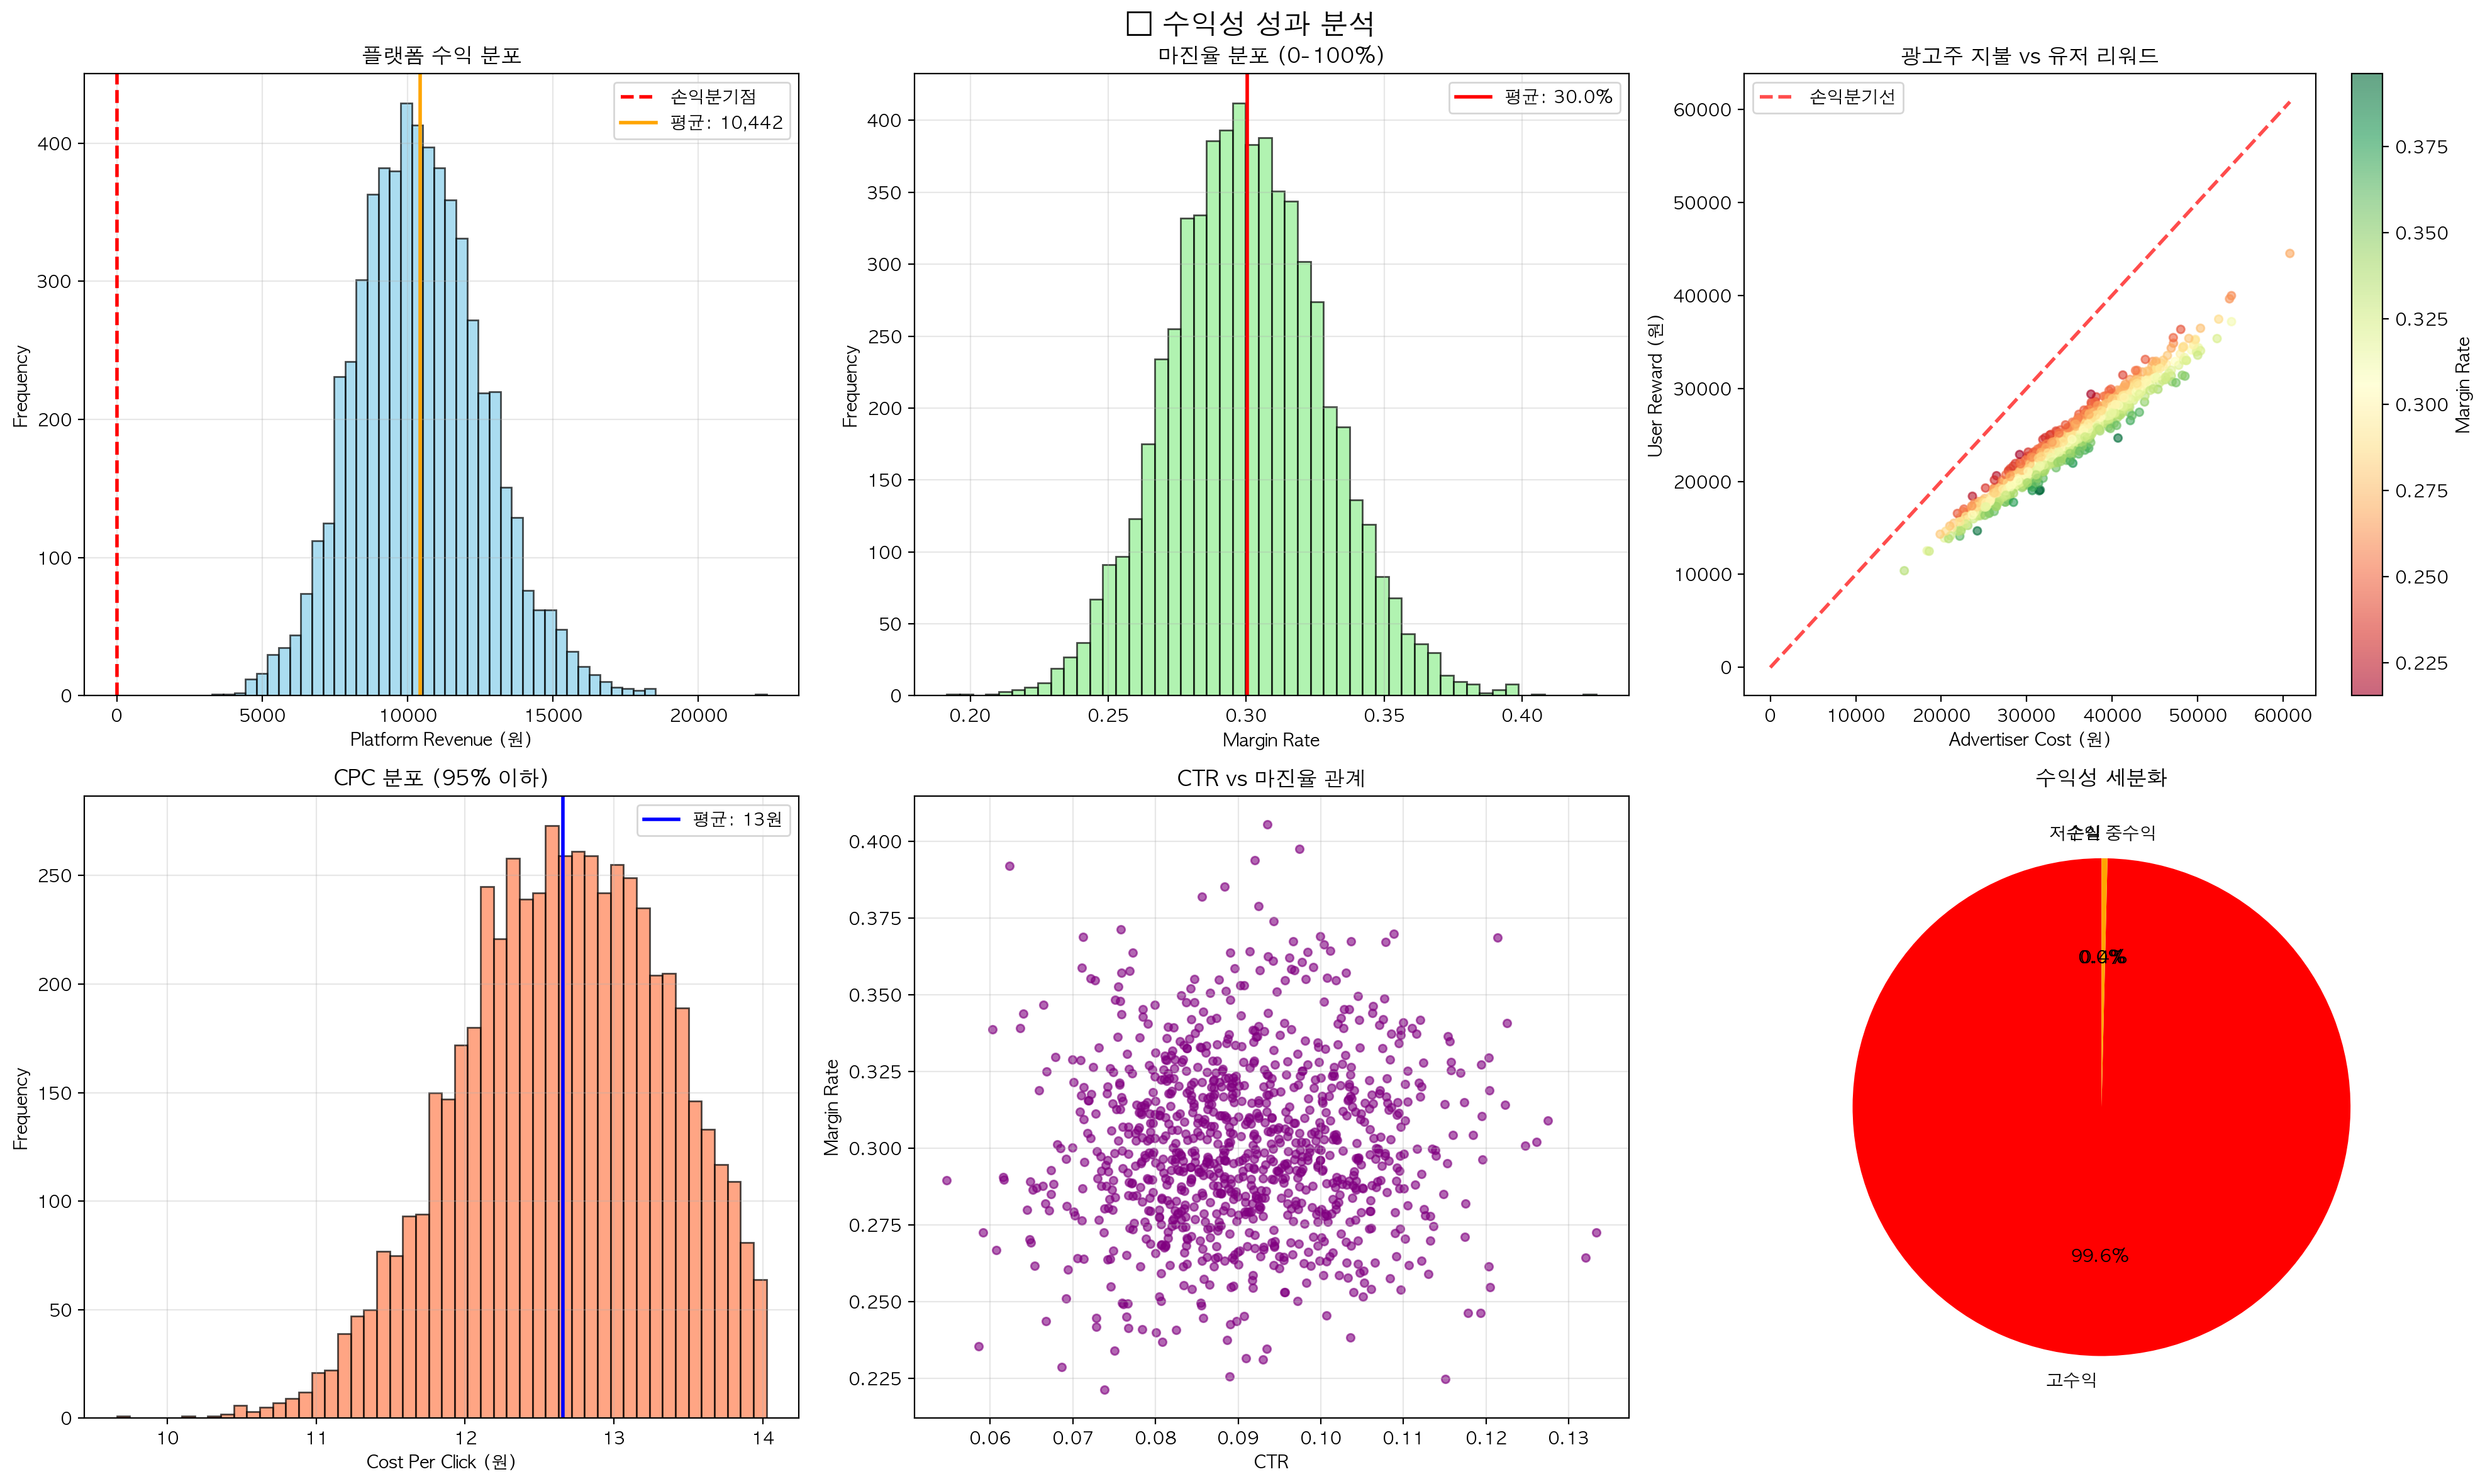

📊 수익성 요약:
   총 플랫폼 수익: 62,653,207원
   평균 플랫폼 수익: 10,442원
   수익성 비율: 100.0%
   최고 수익: 22,350원
   최저 수익: 3,279원

📺 매체사별 성과 분석


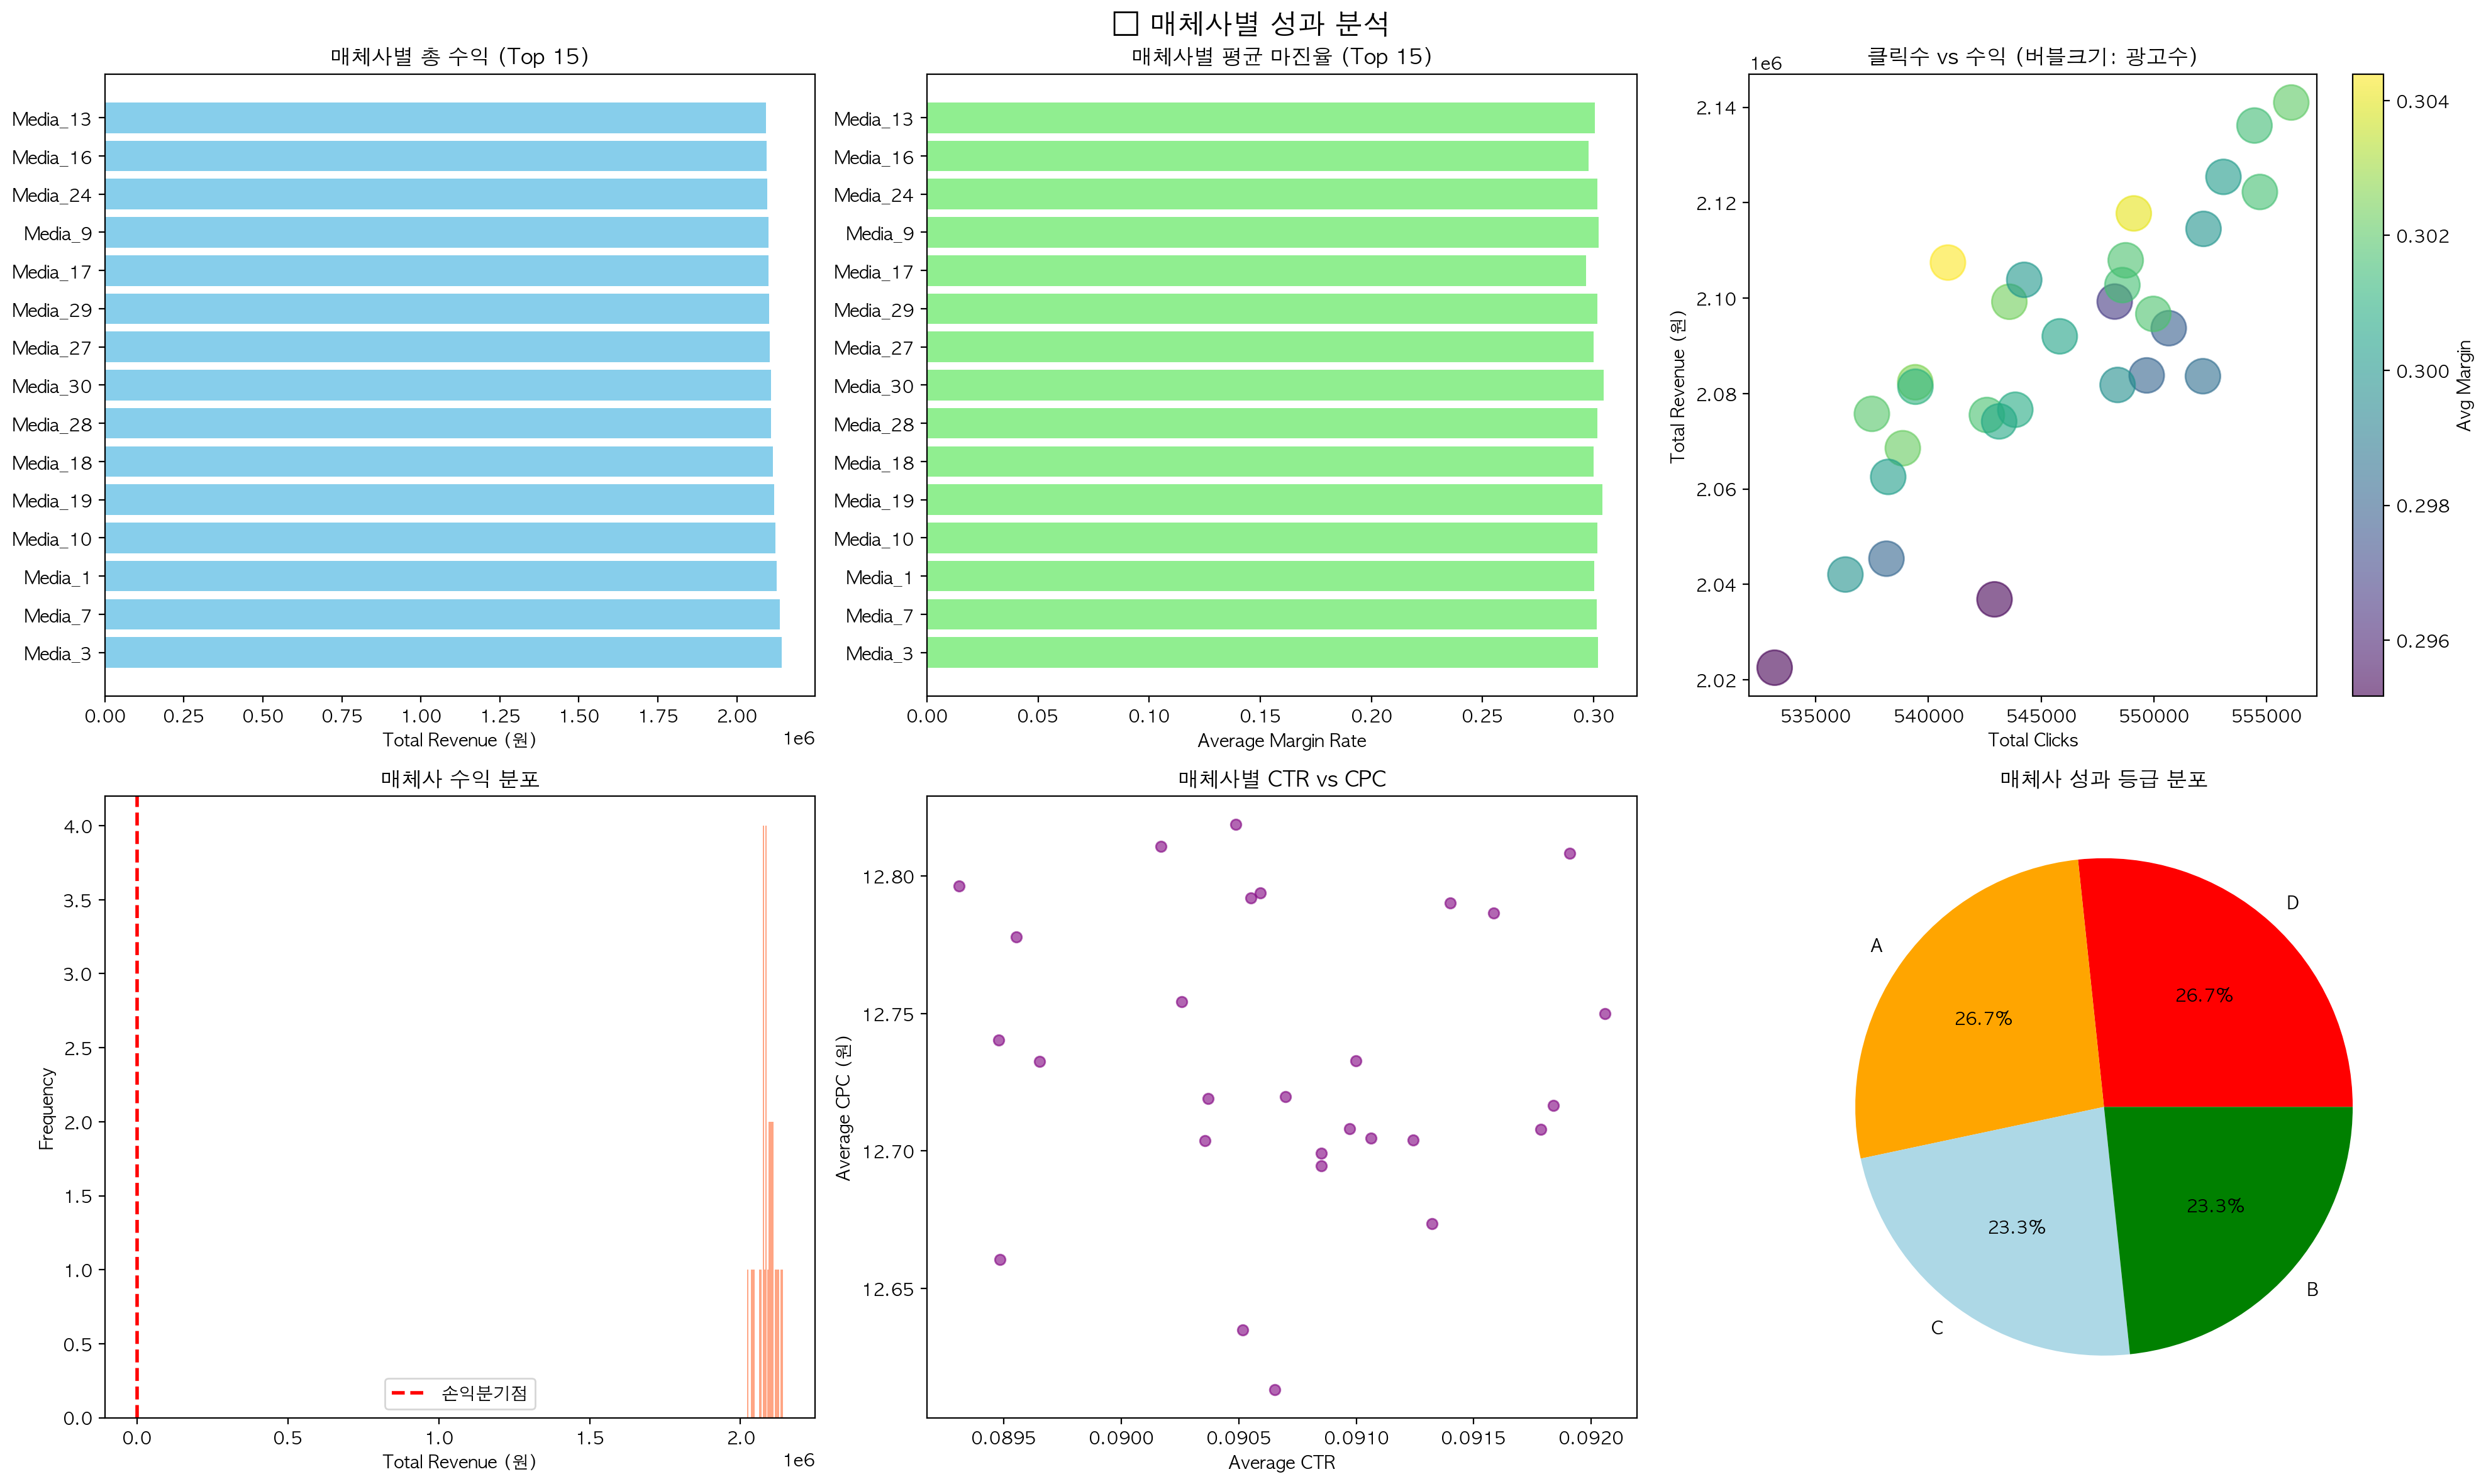

📊 매체사 요약:
   총 매체사 수: 30개
   수익성 매체사: 30개 (100.0%)
   평균 매체사 수익: 2,088,440원
   Top 10% 매체사 수익 점유율: 10.2%

🏷️ 광고 카테고리별 성과 분석


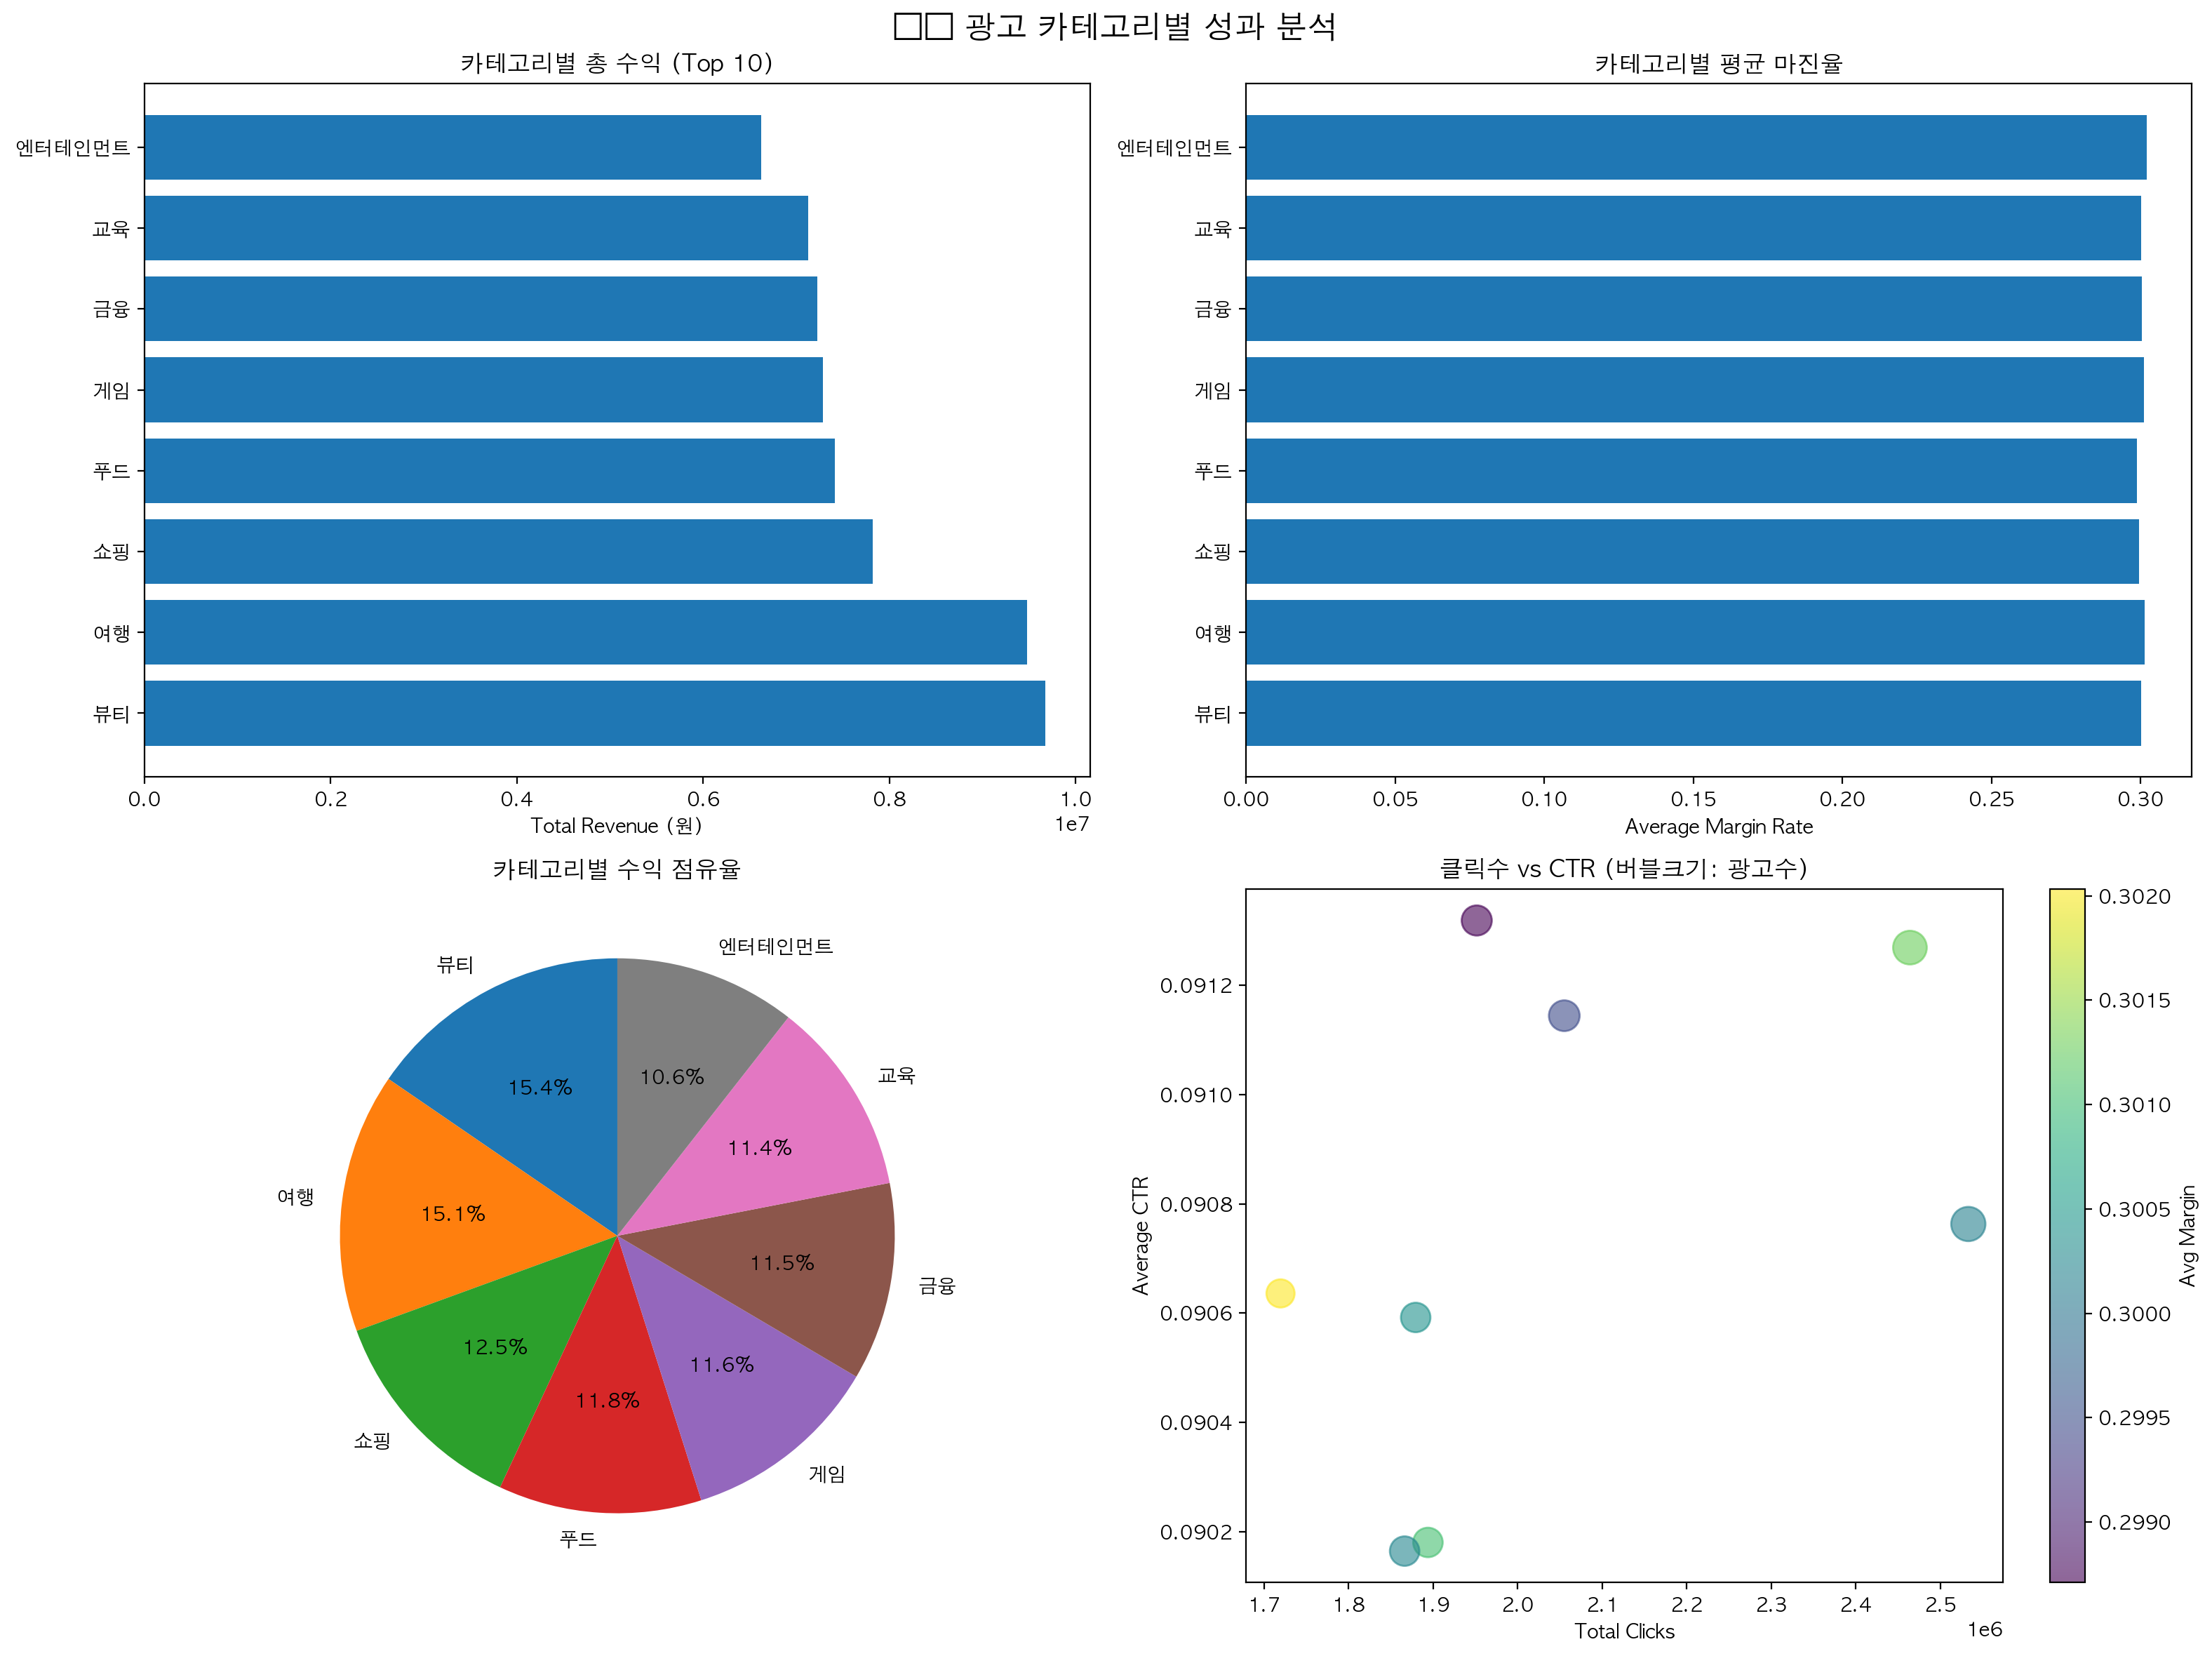

📊 카테고리 요약:
   총 카테고리 수: 8개
   가장 수익성 높은 카테고리: 뷰티
   가장 많은 광고 카테고리: 뷰티

🎯 인사이트 및 추천 전략
🔍 주요 인사이트:
   1. ✅ 수익성 광고 비율이 100.0%로 양호
   2. 🏆 최고 성과 카테고리: 뷰티 (수익: 9,673,663원)
   3. 📉 최저 성과 카테고리: 엔터테인먼트 (수익: 6,625,005원)

💡 추천 전략:
   1. 🎯 고마진 카테고리 (게임, 엔터테인먼트, 여행) 우선 추천
   2. 📈 고성과 매체사 (9개)에 프리미엄 광고 집중
   3. 🔄 실시간 성과 모니터링을 통한 동적 추천 알고리즘 구현
   4. 📊 A/B 테스트를 통한 추천 로직 지속적 개선

🎯 추천 시스템 핵심 피처:
   • platform_revenue: 플랫폼 수익 - 최우선 최적화 목표
   • margin_rate: 마진율 - 수익성 판단 기준
   • ctr: CTR - 광고 품질 지표
   • cpc: CPC - 비용 효율성
   • ads_category: 광고 카테고리 - 매체 적합성
   • mda_idx: 매체사 ID - 성과 이력 기반 추천

✅ 완전 분석 완료!

🎉 분석 완료! 결과 요약:
   - 성과 데이터: 6,000 개 광고-매체 조합
   - 매체사 분석: 30 개 매체사
   - 카테고리 분석: 8 개 카테고리
   - 인사이트: 3개
   - 추천사항: 4개


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트
plt.rc("font", family = 'AppleGothic')
plt.rc("axes", unicode_minus = False)

# 글씨 선명하게
set_matplotlib_formats("retina")

class CompleteAdEDA:
    def __init__(self):
        self.ads_list = None
        self.ads_time = None
        self.ads_rwd = None
        self.ads_info = None
        self.ads_join = None
        
    def load_data_from_files(self, file_paths):
        """파일에서 데이터 로드"""
        print("📁 데이터 파일 로드 시작...")
        
        try:
            self.ads_list = pd.read_csv(file_paths['ads_list'])
            print(f"✅ ads_list 로드 완료: {self.ads_list.shape}")
            
            self.ads_time = pd.read_csv(file_paths['ads_time'])
            print(f"✅ ads_time 로드 완료: {self.ads_time.shape}")
            
            self.ads_rwd = pd.read_csv(file_paths['ads_rwd'])
            print(f"✅ ads_rwd 로드 완료: {self.ads_rwd.shape}")
            
            self.ads_info = pd.read_csv(file_paths['ads_info'])
            print(f"✅ ads_info 로드 완료: {self.ads_info.shape}")
            
            self.ads_join = pd.read_csv(file_paths['ads_join'])
            print(f"✅ ads_join 로드 완료: {self.ads_join.shape}")
            
            print("\n🎉 모든 데이터 로드 완료!")
            return True
            
        except Exception as e:
            print(f"❌ 데이터 로드 실패: {e}")
            return False
    
    def load_data_from_db(self, connection, table_queries=None):
        """데이터베이스에서 데이터 로드"""
        print("🗄️ 데이터베이스에서 데이터 로드 시작...")
        
        try:
            if table_queries is None:
                # 기본 쿼리
                table_queries = {
                    'ads_list': 'SELECT * FROM ads_list',
                    'ads_time': 'SELECT * FROM ads_time',
                    'ads_rwd': 'SELECT * FROM ads_rwd', 
                    'ads_info': 'SELECT * FROM ads_info',
                    'ads_join': 'SELECT * FROM ads_join'
                }
            
            self.ads_list = pd.read_sql(table_queries['ads_list'], connection)
            print(f"✅ ads_list 로드 완료: {self.ads_list.shape}")
            
            self.ads_time = pd.read_sql(table_queries['ads_time'], connection)
            print(f"✅ ads_time 로드 완료: {self.ads_time.shape}")
            
            self.ads_rwd = pd.read_sql(table_queries['ads_rwd'], connection)
            print(f"✅ ads_rwd 로드 완료: {self.ads_rwd.shape}")
            
            self.ads_info = pd.read_sql(table_queries['ads_info'], connection)
            print(f"✅ ads_info 로드 완료: {self.ads_info.shape}")
            
            self.ads_join = pd.read_sql(table_queries['ads_join'], connection)
            print(f"✅ ads_join 로드 완료: {self.ads_join.shape}")
            
            print("\n🎉 모든 데이터 로드 완료!")
            return True
            
        except Exception as e:
            print(f"❌ 데이터베이스 로드 실패: {e}")
            return False
    
    def data_overview(self):
        """데이터 개요 및 품질 체크"""
        print("\n" + "="*60)
        print("📊 데이터 개요 및 품질 체크")
        print("="*60)
        
        tables = {
            'ads_list': self.ads_list,
            'ads_time': self.ads_time,
            'ads_rwd': self.ads_rwd,
            'ads_info': self.ads_info,
            'ads_join': self.ads_join
        }
        
        for name, df in tables.items():
            print(f"\n📋 {name.upper()}:")
            print(f"   Shape: {df.shape}")
            print(f"   Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
            print(f"   결측값: {df.isnull().sum().sum():,} 개")
            print(f"   중복값: {df.duplicated().sum():,} 개")
            
            # 주요 컬럼 데이터 타입
            numeric_cols = df.select_dtypes(include=[np.number]).columns
            if len(numeric_cols) > 0:
                print(f"   수치형 컬럼: {len(numeric_cols)}개")
            
            # ads_time 특별 체크 (수익 구조)
            if name == 'ads_time':
                print(f"\n   💰 수익 구조 체크:")
                if 'rpt_time_acost' in df.columns and 'rpt_time_earn' in df.columns:
                    platform_revenue = df['rpt_time_acost'] - df['rpt_time_earn']
                    print(f"   - 총 광고주 지불액: {df['rpt_time_acost'].sum():,.0f}")
                    print(f"   - 총 유저 리워드: {df['rpt_time_earn'].sum():,.0f}")
                    print(f"   - 총 플랫폼 수익: {platform_revenue.sum():,.0f}")
                    print(f"   - 평균 마진율: {(platform_revenue.sum() / df['rpt_time_acost'].sum() * 100):.1f}%")
                    print(f"   - 수익성 레코드 비율: {(platform_revenue > 0).mean():.1%}")
    
    def create_core_metrics(self):
        """핵심 지표 생성"""
        print("\n" + "="*60)
        print("🎯 핵심 성과 지표 생성")
        print("="*60)
        
        # 광고-매체별 성과 집계
        performance = self.ads_time.groupby(['ads_idx', 'mda_idx']).agg({
            'rpt_time_clk': 'sum',      # 총 클릭수
            'rpt_time_turn': 'sum',     # 총 전환수
            'rpt_time_acost': 'sum',    # 총 광고주 지불액
            'rpt_time_earn': 'sum'      # 총 유저 리워드
        }).reset_index()
        
        # 핵심 파생 지표
        performance['ctr'] = np.where(performance['rpt_time_clk'] > 0,
                                    performance['rpt_time_turn'] / performance['rpt_time_clk'], 0)
        performance['platform_revenue'] = performance['rpt_time_acost'] - performance['rpt_time_earn']
        performance['margin_rate'] = np.where(performance['rpt_time_acost'] > 0,
                                            performance['platform_revenue'] / performance['rpt_time_acost'], 0)
        performance['cpc'] = np.where(performance['rpt_time_clk'] > 0,
                                    performance['rpt_time_acost'] / performance['rpt_time_clk'], 0)
        performance['cpa'] = np.where(performance['rpt_time_turn'] > 0,
                                    performance['rpt_time_acost'] / performance['rpt_time_turn'], 0)
        
        print(f"✅ 성과 지표 생성 완료: {len(performance):,} 개 광고-매체 조합")
        
        # 핵심 지표 요약
        print(f"\n📈 핵심 지표 요약:")
        print(f"   평균 CTR: {performance['ctr'].mean():.2%}")
        print(f"   평균 마진율: {performance['margin_rate'].mean():.1%}")
        print(f"   평균 CPC: {performance['cpc'].mean():.0f}원")
        print(f"   평균 CPA: {performance['cpa'].mean():.0f}원")
        print(f"   수익성 광고-매체 조합: {(performance['platform_revenue'] > 0).mean():.1%}")
        
        return performance
    
    def analyze_revenue_performance(self, performance):
        """수익성 성과 분석"""
        print("\n" + "="*60)
        print("💰 수익성 성과 분석")
        print("="*60)
        
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        fig.suptitle('💰 수익성 성과 분석', fontsize=16, fontweight='bold')
        
        # 1. 플랫폼 수익 분포
        revenue_data = performance['platform_revenue']
        axes[0,0].hist(revenue_data, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0,0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='손익분기점')
        axes[0,0].axvline(x=revenue_data.mean(), color='orange', linestyle='-', linewidth=2, label=f'평균: {revenue_data.mean():,.0f}')
        axes[0,0].set_title('플랫폼 수익 분포')
        axes[0,0].set_xlabel('Platform Revenue (원)')
        axes[0,0].set_ylabel('Frequency')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
        
        # 2. 마진율 분포
        margin_filtered = performance[performance['margin_rate'].between(0, 1)]['margin_rate']
        axes[0,1].hist(margin_filtered, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
        axes[0,1].axvline(x=margin_filtered.mean(), color='red', linestyle='-', linewidth=2, 
                         label=f'평균: {margin_filtered.mean():.1%}')
        axes[0,1].set_title('마진율 분포 (0-100%)')
        axes[0,1].set_xlabel('Margin Rate')
        axes[0,1].set_ylabel('Frequency')
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)
        
        # 3. 광고주 지불 vs 유저 리워드
        sample_data = performance.sample(min(1000, len(performance)))  # 샘플링으로 속도 향상
        scatter = axes[0,2].scatter(sample_data['rpt_time_acost'], sample_data['rpt_time_earn'], 
                                  c=sample_data['margin_rate'], cmap='RdYlGn', alpha=0.6, s=20)
        max_val = max(sample_data['rpt_time_acost'].max(), sample_data['rpt_time_earn'].max())
        axes[0,2].plot([0, max_val], [0, max_val], 'r--', alpha=0.7, linewidth=2, label='손익분기선')
        axes[0,2].set_title('광고주 지불 vs 유저 리워드')
        axes[0,2].set_xlabel('Advertiser Cost (원)')
        axes[0,2].set_ylabel('User Reward (원)')
        axes[0,2].legend()
        plt.colorbar(scatter, ax=axes[0,2], label='Margin Rate')
        
        # 4. CPC 분포
        cpc_filtered = performance[performance['cpc'] <= performance['cpc'].quantile(0.95)]['cpc']
        axes[1,0].hist(cpc_filtered, bins=50, alpha=0.7, color='coral', edgecolor='black')
        axes[1,0].axvline(x=cpc_filtered.mean(), color='blue', linestyle='-', linewidth=2,
                         label=f'평균: {cpc_filtered.mean():.0f}원')
        axes[1,0].set_title('CPC 분포 (95% 이하)')
        axes[1,0].set_xlabel('Cost Per Click (원)')
        axes[1,0].set_ylabel('Frequency')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)
        
        # 5. CTR vs 마진율 관계
        sample_ctr = performance.sample(min(1000, len(performance)))
        valid_data = sample_ctr[(sample_ctr['margin_rate'] <= 1) & (sample_ctr['ctr'] <= 1)]
        axes[1,1].scatter(valid_data['ctr'], valid_data['margin_rate'], alpha=0.6, color='purple', s=20)
        axes[1,1].set_title('CTR vs 마진율 관계')
        axes[1,1].set_xlabel('CTR')
        axes[1,1].set_ylabel('Margin Rate')
        axes[1,1].grid(True, alpha=0.3)
        
        # 6. 수익성 세분화 (파이차트)
        revenue_segments = pd.cut(performance['platform_revenue'], 
                                bins=[-np.inf, 0, 1000, 5000, np.inf],
                                labels=['손실', '저수익', '중수익', '고수익'])
        segment_counts = revenue_segments.value_counts()
        colors = ['red', 'orange', 'lightblue', 'green']
        axes[1,2].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', 
                     colors=colors, startangle=90)
        axes[1,2].set_title('수익성 세분화')
        
        plt.tight_layout()
        plt.show()
        
        # 수익성 요약 출력
        print(f"📊 수익성 요약:")
        print(f"   총 플랫폼 수익: {performance['platform_revenue'].sum():,.0f}원")
        print(f"   평균 플랫폼 수익: {performance['platform_revenue'].mean():,.0f}원")
        print(f"   수익성 비율: {(performance['platform_revenue'] > 0).mean():.1%}")
        print(f"   최고 수익: {performance['platform_revenue'].max():,.0f}원")
        print(f"   최저 수익: {performance['platform_revenue'].min():,.0f}원")
        
        return performance
    
    def analyze_media_performance(self, performance):
        """매체사별 성과 분석"""
        print("\n" + "="*60)
        print("📺 매체사별 성과 분석")
        print("="*60)
        
        # 매체사별 집계
        media_perf = performance.groupby('mda_idx').agg({
            'ads_idx': 'nunique',           # 고유 광고수
            'rpt_time_clk': 'sum',          # 총 클릭수
            'rpt_time_turn': 'sum',         # 총 전환수
            'platform_revenue': 'sum',     # 총 플랫폼 수익
            'margin_rate': 'mean',          # 평균 마진율
            'ctr': 'mean',                  # 평균 CTR
            'cpc': 'mean',                  # 평균 CPC
        }).reset_index()
        
        media_perf.columns = ['media_id', 'unique_ads', 'total_clicks', 'total_conversions', 
                             'total_revenue', 'avg_margin', 'avg_ctr', 'avg_cpc']
        
        # 상위 매체사 (수익 기준)
        top_media = media_perf.nlargest(15, 'total_revenue')
        
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        fig.suptitle('📺 매체사별 성과 분석', fontsize=16, fontweight='bold')
        
        # 1. 매체사별 수익 순위
        axes[0,0].barh(range(len(top_media)), top_media['total_revenue'], color='skyblue')
        axes[0,0].set_title('매체사별 총 수익 (Top 15)')
        axes[0,0].set_yticks(range(len(top_media)))
        axes[0,0].set_yticklabels([f'Media_{int(x)}' for x in top_media['media_id']])
        axes[0,0].set_xlabel('Total Revenue (원)')
        
        # 2. 매체사별 마진율
        margin_data = top_media[top_media['avg_margin'] <= 1]
        axes[0,1].barh(range(len(margin_data)), margin_data['avg_margin'], color='lightgreen')
        axes[0,1].set_title('매체사별 평균 마진율 (Top 15)')
        axes[0,1].set_yticks(range(len(margin_data)))
        axes[0,1].set_yticklabels([f'Media_{int(x)}' for x in margin_data['media_id']])
        axes[0,1].set_xlabel('Average Margin Rate')
        
        # 3. 클릭수 vs 수익 (버블차트)
        scatter = axes[0,2].scatter(media_perf['total_clicks'], media_perf['total_revenue'],
                                  s=media_perf['unique_ads']*2, alpha=0.6, 
                                  c=media_perf['avg_margin'], cmap='viridis')
        axes[0,2].set_title('클릭수 vs 수익 (버블크기: 광고수)')
        axes[0,2].set_xlabel('Total Clicks')
        axes[0,2].set_ylabel('Total Revenue (원)')
        plt.colorbar(scatter, ax=axes[0,2], label='Avg Margin')
        
        # 4. 매체사 수익 분포
        axes[1,0].hist(media_perf['total_revenue'], bins=30, alpha=0.7, color='coral')
        axes[1,0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='손익분기점')
        axes[1,0].set_title('매체사 수익 분포')
        axes[1,0].set_xlabel('Total Revenue (원)')
        axes[1,0].set_ylabel('Frequency')
        axes[1,0].legend()
        
        # 5. CTR vs CPC 관계
        valid_media = media_perf[(media_perf['avg_ctr'] <= 1) & (media_perf['avg_cpc'] <= media_perf['avg_cpc'].quantile(0.95))]
        axes[1,1].scatter(valid_media['avg_ctr'], valid_media['avg_cpc'], alpha=0.6, color='purple')
        axes[1,1].set_title('매체사별 CTR vs CPC')
        axes[1,1].set_xlabel('Average CTR')
        axes[1,1].set_ylabel('Average CPC (원)')
        
        # 6. 매체사 성과 등급
        media_perf['performance_grade'] = pd.qcut(media_perf['total_revenue'], 
                                                q=4, labels=['D', 'C', 'B', 'A'])
        grade_counts = media_perf['performance_grade'].value_counts()
        axes[1,2].pie(grade_counts.values, labels=grade_counts.index, autopct='%1.1f%%',
                     colors=['red', 'orange', 'lightblue', 'green'])
        axes[1,2].set_title('매체사 성과 등급 분포')
        
        plt.tight_layout()
        plt.show()
        
        # 매체사 요약 통계
        print(f"📊 매체사 요약:")
        print(f"   총 매체사 수: {len(media_perf):,}개")
        print(f"   수익성 매체사: {(media_perf['total_revenue'] > 0).sum():,}개 ({(media_perf['total_revenue'] > 0).mean():.1%})")
        print(f"   평균 매체사 수익: {media_perf['total_revenue'].mean():,.0f}원")
        print(f"   Top 10% 매체사 수익 점유율: {media_perf.nlargest(int(len(media_perf)*0.1), 'total_revenue')['total_revenue'].sum() / media_perf['total_revenue'].sum():.1%}")
        
        return media_perf
    
    def analyze_ad_categories(self, performance):
        """광고 카테고리별 분석"""
        print("\n" + "="*60)
        print("🏷️ 광고 카테고리별 성과 분석")
        print("="*60)
        
        # 성과 데이터와 광고 정보 결합
        category_data = performance.merge(
            self.ads_list[['ads_idx', 'ads_category', 'ads_type', 'ads_contract_price']], 
            on='ads_idx', how='left'
        )
        
        # 카테고리별 집계
        category_perf = category_data.groupby('ads_category').agg({
            'ads_idx': 'nunique',               # 고유 광고수
            'platform_revenue': 'sum',         # 총 수익
            'rpt_time_clk': 'sum',             # 총 클릭수
            'margin_rate': 'mean',              # 평균 마진율
            'ctr': 'mean',                      # 평균 CTR
            'cpc': 'mean'                       # 평균 CPC
        }).reset_index()
        
        category_perf.columns = ['category', 'ad_count', 'total_revenue', 'total_clicks', 
                               'avg_margin', 'avg_ctr', 'avg_cpc']
        
        # 상위 카테고리
        top_categories = category_perf.nlargest(10, 'total_revenue')
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('🏷️ 광고 카테고리별 성과 분석', fontsize=16, fontweight='bold')
        
        # 1. 카테고리별 수익
        axes[0,0].barh(range(len(top_categories)), top_categories['total_revenue'])
        axes[0,0].set_title('카테고리별 총 수익 (Top 10)')
        axes[0,0].set_yticks(range(len(top_categories)))
        axes[0,0].set_yticklabels(top_categories['category'], fontsize=10)
        axes[0,0].set_xlabel('Total Revenue (원)')
        
        # 2. 카테고리별 마진율
        margin_cats = top_categories[top_categories['avg_margin'] <= 1]
        axes[0,1].barh(range(len(margin_cats)), margin_cats['avg_margin'])
        axes[0,1].set_title('카테고리별 평균 마진율')
        axes[0,1].set_yticks(range(len(margin_cats)))
        axes[0,1].set_yticklabels(margin_cats['category'], fontsize=10)
        axes[0,1].set_xlabel('Average Margin Rate')
        
        # 3. 수익 점유율 파이차트
        axes[1,0].pie(top_categories['total_revenue'], labels=top_categories['category'], 
                     autopct='%1.1f%%', startangle=90)
        axes[1,0].set_title('카테고리별 수익 점유율')
        
        # 4. 클릭수 vs CTR 버블차트
        scatter = axes[1,1].scatter(category_perf['total_clicks'], category_perf['avg_ctr'],
                                  s=category_perf['ad_count']*10, alpha=0.6, 
                                  c=category_perf['avg_margin'], cmap='viridis')
        axes[1,1].set_title('클릭수 vs CTR (버블크기: 광고수)')
        axes[1,1].set_xlabel('Total Clicks')
        axes[1,1].set_ylabel('Average CTR')
        plt.colorbar(scatter, ax=axes[1,1], label='Avg Margin')
        
        plt.tight_layout()
        plt.show()
        
        print(f"📊 카테고리 요약:")
        print(f"   총 카테고리 수: {len(category_perf)}개")
        print(f"   가장 수익성 높은 카테고리: {category_perf.loc[category_perf['total_revenue'].idxmax(), 'category']}")
        print(f"   가장 많은 광고 카테고리: {category_perf.loc[category_perf['ad_count'].idxmax(), 'category']}")
        
        return category_perf
    
    def generate_insights_and_recommendations(self, performance, media_perf, category_perf):
        """인사이트 및 추천 전략 생성"""
        print("\n" + "="*60)
        print("🎯 인사이트 및 추천 전략")
        print("="*60)
        
        insights = []
        recommendations = []
        
        # 1. 수익성 인사이트
        profit_ratio = (performance['platform_revenue'] > 0).mean()
        avg_margin = performance['margin_rate'].mean()
        
        if profit_ratio < 0.5:
            insights.append(f"⚠️ 수익성 광고 비율이 {profit_ratio:.1%}로 낮음")
            recommendations.append("💡 손실 광고 식별 및 중단/최적화 필요")
        else:
            insights.append(f"✅ 수익성 광고 비율이 {profit_ratio:.1%}로 양호")
        
        # 2. 매체사 집중도 분석
        top_10_media_revenue = media_perf.nlargest(10, 'total_revenue')['total_revenue'].sum()
        total_revenue = media_perf['total_revenue'].sum()
        concentration = top_10_media_revenue / total_revenue
        
        if concentration > 0.8:
            insights.append(f"⚠️ 상위 10개 매체사가 전체 수익의 {concentration:.1%} 차지 (높은 집중도)")
            recommendations.append("💡 매체사 다변화를 통한 리스크 분산 필요")
        
        # 3. 카테고리 성과 분석
        best_category = category_perf.loc[category_perf['total_revenue'].idxmax()]
        worst_category = category_perf.loc[category_perf['total_revenue'].idxmin()]
        
        insights.append(f"🏆 최고 성과 카테고리: {best_category['category']} (수익: {best_category['total_revenue']:,.0f}원)")
        insights.append(f"📉 최저 성과 카테고리: {worst_category['category']} (수익: {worst_category['total_revenue']:,.0f}원)")
        
        # 4. 추천 시스템 전략
        high_margin_categories = category_perf[category_perf['avg_margin'] > category_perf['avg_margin'].quantile(0.7)]
        high_performing_media = media_perf[media_perf['total_revenue'] > media_perf['total_revenue'].quantile(0.7)]
        
        recommendations.extend([
            f"🎯 고마진 카테고리 ({', '.join(high_margin_categories['category'].head(3))}) 우선 추천",
            f"📈 고성과 매체사 ({len(high_performing_media)}개)에 프리미엄 광고 집중",
            "🔄 실시간 성과 모니터링을 통한 동적 추천 알고리즘 구현",
            "📊 A/B 테스트를 통한 추천 로직 지속적 개선"
        ])
        
        # 인사이트 출력
        print("🔍 주요 인사이트:")
        for i, insight in enumerate(insights, 1):
            print(f"   {i}. {insight}")
        
        print(f"\n💡 추천 전략:")
        for i, rec in enumerate(recommendations, 1):
            print(f"   {i}. {rec}")
        
        # 추천 시스템 피처 중요도
        feature_importance = {
            'platform_revenue': '플랫폼 수익 - 최우선 최적화 목표',
            'margin_rate': '마진율 - 수익성 판단 기준',
            'ctr': 'CTR - 광고 품질 지표',
            'cpc': 'CPC - 비용 효율성',
            'ads_category': '광고 카테고리 - 매체 적합성',
            'mda_idx': '매체사 ID - 성과 이력 기반 추천'
        }
        
        print(f"\n🎯 추천 시스템 핵심 피처:")
        for feature, description in feature_importance.items():
            print(f"   • {feature}: {description}")
        
        return insights, recommendations
    
    def run_complete_analysis(self):
        """전체 분석 실행"""
        print("🚀 광고 플랫폼 완전 분석 시작!")
        print("="*80)
        
        # 1. 데이터 개요
        self.data_overview()
        
        # 2. 핵심 지표 생성
        performance = self.create_core_metrics()
        
        # 3. 수익성 분석
        performance = self.analyze_revenue_performance(performance)
        
        # 4. 매체사별 분석
        media_perf = self.analyze_media_performance(performance)
        
        # 5. 카테고리별 분석
        category_perf = self.analyze_ad_categories(performance)
        
        # 6. 인사이트 및 추천 전략
        insights, recommendations = self.generate_insights_and_recommendations(
            performance, media_perf, category_perf
        )
        
        print("\n" + "="*80)
        print("✅ 완전 분석 완료!")
        print("="*80)
        
        return {
            'performance': performance,
            'media_analysis': media_perf,
            'category_analysis': category_perf,
            'insights': insights,
            'recommendations': recommendations
        }

# =============================================================================
# 실행 함수들
# =============================================================================

def run_analysis_from_csv(file_paths):
    """CSV 파일에서 데이터 로드하여 분석 실행"""
    print("📁 CSV 파일에서 분석 시작!")
    
    analyzer = CompleteAdEDA()
    
    if analyzer.load_data_from_files(file_paths):
        results = analyzer.run_complete_analysis()
        return analyzer, results
    else:
        print("❌ 데이터 로드 실패")
        return None, None

def run_analysis_from_db(connection, queries=None):
    """데이터베이스에서 데이터 로드하여 분석 실행"""
    print("🗄️ 데이터베이스에서 분석 시작!")
    
    analyzer = CompleteAdEDA()
    
    if analyzer.load_data_from_db(connection, queries):
        results = analyzer.run_complete_analysis()
        return analyzer, results
    else:
        print("❌ 데이터베이스 연결 실패")
        return None, None

def create_sample_analysis():
    """샘플 데이터로 분석 데모"""
    print("🎬 샘플 데이터로 분석 데모 시작!")
    
    # 샘플 데이터 생성
    np.random.seed(42)
    
    # ads_list
    ads_list = pd.DataFrame({
        'ads_idx': range(1, 201),
        'ads_category': np.random.choice(['게임', '쇼핑', '금융', '여행', '교육', '엔터테인먼트', '뷰티', '푸드'], 200),
        'ads_type': np.random.choice(['CPI', 'CPA', 'CPE', 'CPC'], 200),
        'ads_contract_price': np.random.lognormal(7, 0.5, 200),
        'ads_reward_price': np.random.lognormal(6.5, 0.5, 200)
    })
    
    # ads_time (더 현실적인 데이터)
    ads_time_data = []
    dates = pd.date_range('2024-01-01', '2024-06-30', freq='D')
    
    for date in dates:
        for ads_idx in range(1, 201):
            for mda_idx in range(1, 31):  # 30개 매체사
                if np.random.random() > 0.85:  # 15% 확률로 데이터 생성
                    # 현실적인 성과 데이터
                    base_clicks = np.random.poisson(100)
                    if base_clicks > 0:
                        ctr = np.random.beta(2, 20)  # 현실적인 CTR (평균 ~8%)
                        conversions = np.random.binomial(base_clicks, ctr)
                        
                        # 단가 설정 (현실적인 범위)
                        cpc_base = np.random.lognormal(2.5, 0.3)  # 평균 ~15원
                        acost = base_clicks * cpc_base
                        
                        # 유저 리워드 (플랫폼이 마진 남김)
                        margin_rate = np.random.beta(3, 7)  # 평균 ~30% 마진
                        earn = acost * (1 - margin_rate)
                        
                        ads_time_data.append({
                            'rpt_time_date': date.strftime('%Y-%m-%d'),
                            'ads_idx': ads_idx,
                            'mda_idx': mda_idx,
                            'rpt_time_clk': base_clicks,
                            'rpt_time_turn': conversions,
                            'rpt_time_acost': acost,
                            'rpt_time_earn': earn,
                            'weekday': date.strftime('%A'),
                            'week_type': 'Weekend' if date.weekday() >= 5 else 'Weekday'
                        })
    
    ads_time = pd.DataFrame(ads_time_data)
    
    # 더미 데이터 (분석에 직접적으로 사용되지 않음)
    ads_rwd = pd.DataFrame({
        'rwd_idx': range(1000),
        'ads_idx': np.random.randint(1, 201, 1000)
    })
    
    ads_info = pd.DataFrame({
        'click_key': range(1000),
        'ads_idx': np.random.randint(1, 201, 1000)
    })
    
    ads_join = ads_info.copy()
    
    print(f"✅ 샘플 데이터 생성 완료!")
    print(f"   - ads_list: {ads_list.shape}")
    print(f"   - ads_time: {ads_time.shape} (실제 성과 데이터)")
    
    # 분석 실행
    analyzer = CompleteAdEDA()
    analyzer.ads_list = ads_list
    analyzer.ads_time = ads_time
    analyzer.ads_rwd = ads_rwd
    analyzer.ads_info = ads_info
    analyzer.ads_join = ads_join
    
    results = analyzer.run_complete_analysis()
    
    return analyzer, results

# =============================================================================
# 실행 예시 및 사용법
# =============================================================================

def main():
    """메인 실행 함수 - 사용법 안내"""
    print("🎯 광고 플랫폼 완전 분석기")
    print("="*50)
    print()
    print("📋 사용법:")
    print()
    print("1️⃣ CSV 파일에서 분석:")
    print("   file_paths = {")
    print("       'ads_list': 'path/to/ads_list.csv',")
    print("       'ads_time': 'path/to/ads_time.csv',")
    print("       'ads_rwd': 'path/to/ads_rwd.csv',")
    print("       'ads_info': 'path/to/ads_info.csv',")
    print("       'ads_join': 'path/to/ads_join.csv'")
    print("   }")
    print("   analyzer, results = run_analysis_from_csv(file_paths)")
    print()
    print("2️⃣ 데이터베이스에서 분석:")
    print("   import sqlite3")
    print("   conn = sqlite3.connect('your_database.db')")
    print("   analyzer, results = run_analysis_from_db(conn)")
    print()
    print("3️⃣ 샘플 데이터로 데모:")
    print("   analyzer, results = create_sample_analysis()")
    print()
    print("🚀 샘플 분석을 바로 실행하려면 아래 코드를 실행하세요:")
    print("   analyzer, results = create_sample_analysis()")

if __name__ == "__main__":
    # 사용법 안내
    main()
    
    print("\n" + "="*50)
    print("🎬 샘플 분석 자동 실행!")
    print("="*50)
    
    # 샘플 분석 자동 실행
    analyzer, results = create_sample_analysis()
    
    if results:
        print(f"\n🎉 분석 완료! 결과 요약:")
        print(f"   - 성과 데이터: {len(results['performance']):,} 개 광고-매체 조합")
        print(f"   - 매체사 분석: {len(results['media_analysis']):,} 개 매체사")
        print(f"   - 카테고리 분석: {len(results['category_analysis']):,} 개 카테고리")
        print(f"   - 인사이트: {len(results['insights'])}개")
        print(f"   - 추천사항: {len(results['recommendations'])}개")

=== 광고 추천 시스템을 위한 핵심 피처 분석 ===

🎯 추천 시스템 핵심 피처들:

【성과 지표 피처】
- CTR (Click Through Rate): rpt_time_clk / rpt_time_turn
- CVR (Conversion Rate): conversion 비율  
- CPC (Cost Per Click): rpt_time_cost / rpt_time_clk
- ROAS (Return On Ad Spend): rpt_time_earn / rpt_time_cost
- 매출 효율성: earn_cost / adv_cost

【광고 특성 피처】
- ads_type, ads_category: 광고 유형/카테고리
- ads_contract_price, ads_reward_price: 가격 정보
- ads_age_min, ads_age_max: 타겟 연령대
- ads_os_type: OS 타입

【시간적 피처】
- weekday, week_type: 요일/주말여부
- 시간대별 성과 패턴
- 광고 운영 기간 (ads_sdate ~ ads_edate)

【매체사 관련 피처】
- mda_idx별 선호 광고 유형
- 매체사별 평균 성과 지표
- 매체사 규모 (총 클릭수, 매출)


🎯 추천 시스템을 위한 핵심 액션 아이템:

1️⃣ 성과 기반 피처 (가장 중요):
   - CTR, CVR, CPC, ROAS 계산
   - 매체사별 평균 성과와의 편차
   - 광고별 성과 추세 (상승/하락/안정)

2️⃣ 유사도 기반 피처:
   - 광고 카테고리/타입 임베딩
   - 매체사가 선호하는 광고 유형 벡터
   - 연령대, OS타입 등 타겟팅 정보

3️⃣ 시간적 피처:  
   - 요일/시간대별 성과 가중치
   - 계절성/트렌드 반영
   - 최근 성과 가중치 (시간 감쇠)

4️⃣ 협업 필터링용 피처:
   - 매체사-광고 상호작용 행렬
   - 유사 매체사 클러스터링
   - Cold start 문제 해결용 컨텐츠 기반 피처

📋 다음 단계 추천:
   1. 

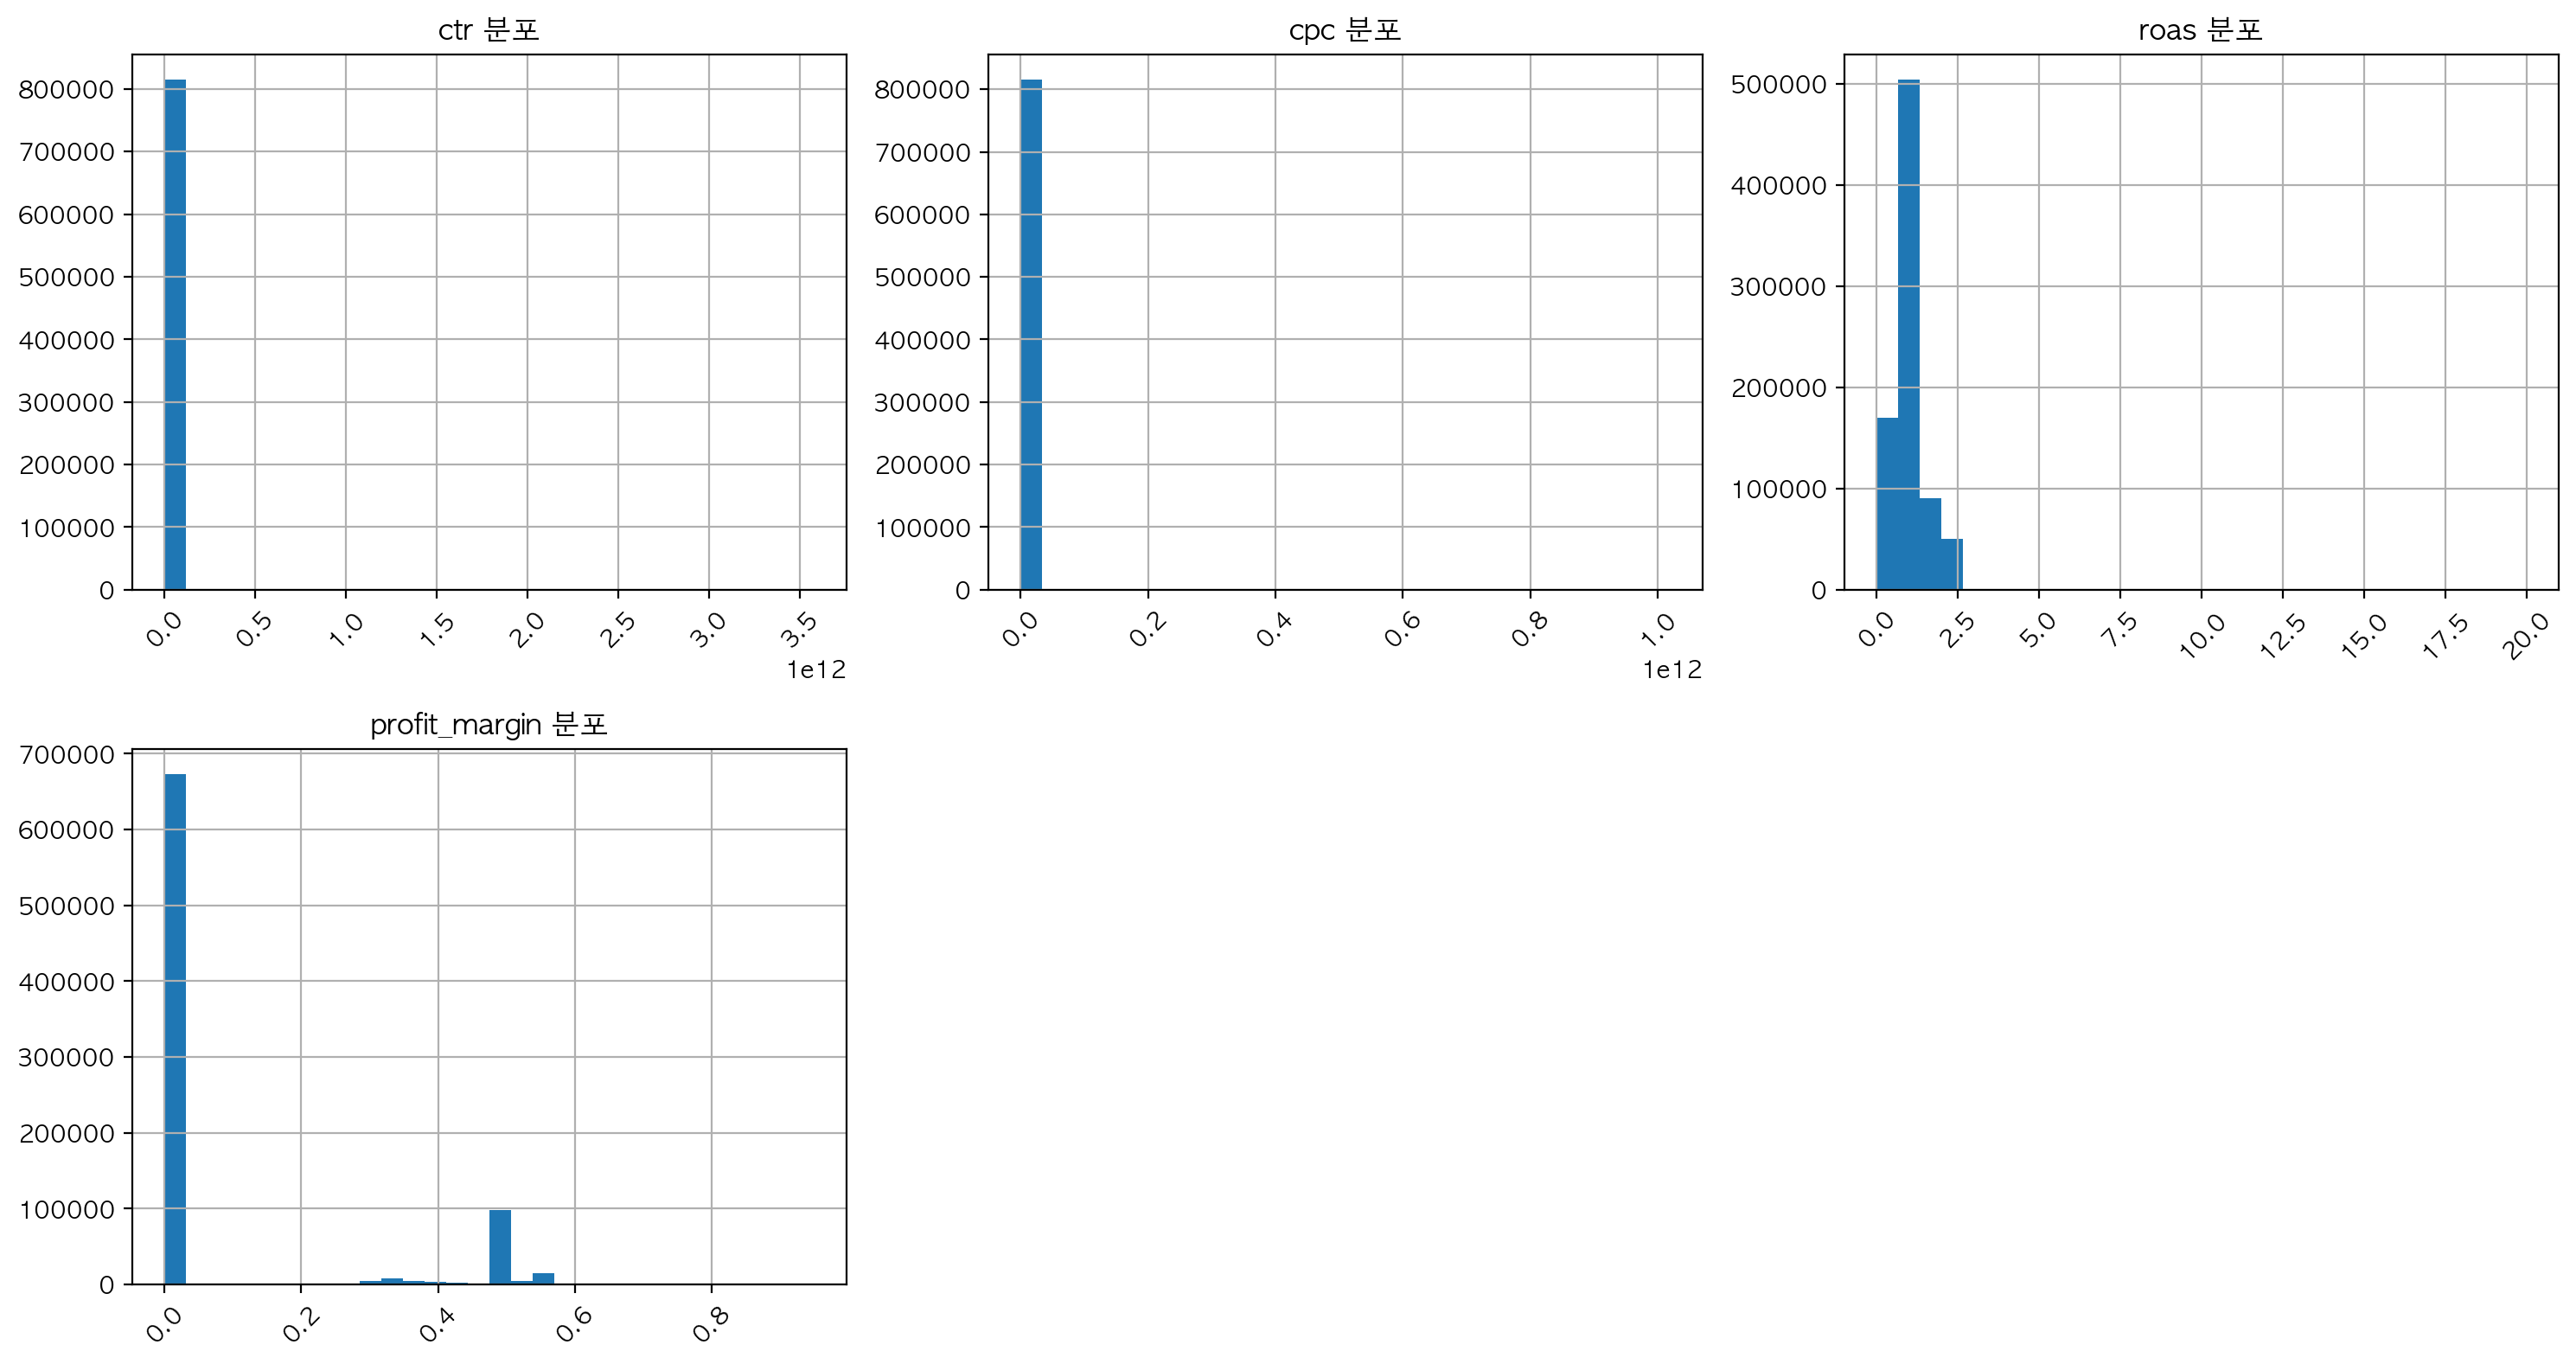


📊 수치형 변수 기술통계:
                ctr           cpc         roas  profit_margin
count  8.152260e+05  8.152260e+05  815226.0000    815226.0000
mean   3.541960e+08  7.679966e+06       0.9589         0.0839
std    1.068707e+10  1.981277e+09       0.6199         0.1847
min    0.000000e+00  0.000000e+00       0.0000         0.0000
25%    1.000000e+00  2.666700e+00       1.0000         0.0000
50%    1.500000e+00  6.000000e+00       1.0000         0.0000
75%    4.300000e+00  1.096670e+01       1.0000         0.0000
max    3.579100e+12  1.020000e+12      20.0000         0.9500

🔗 성과 지표 상관관계


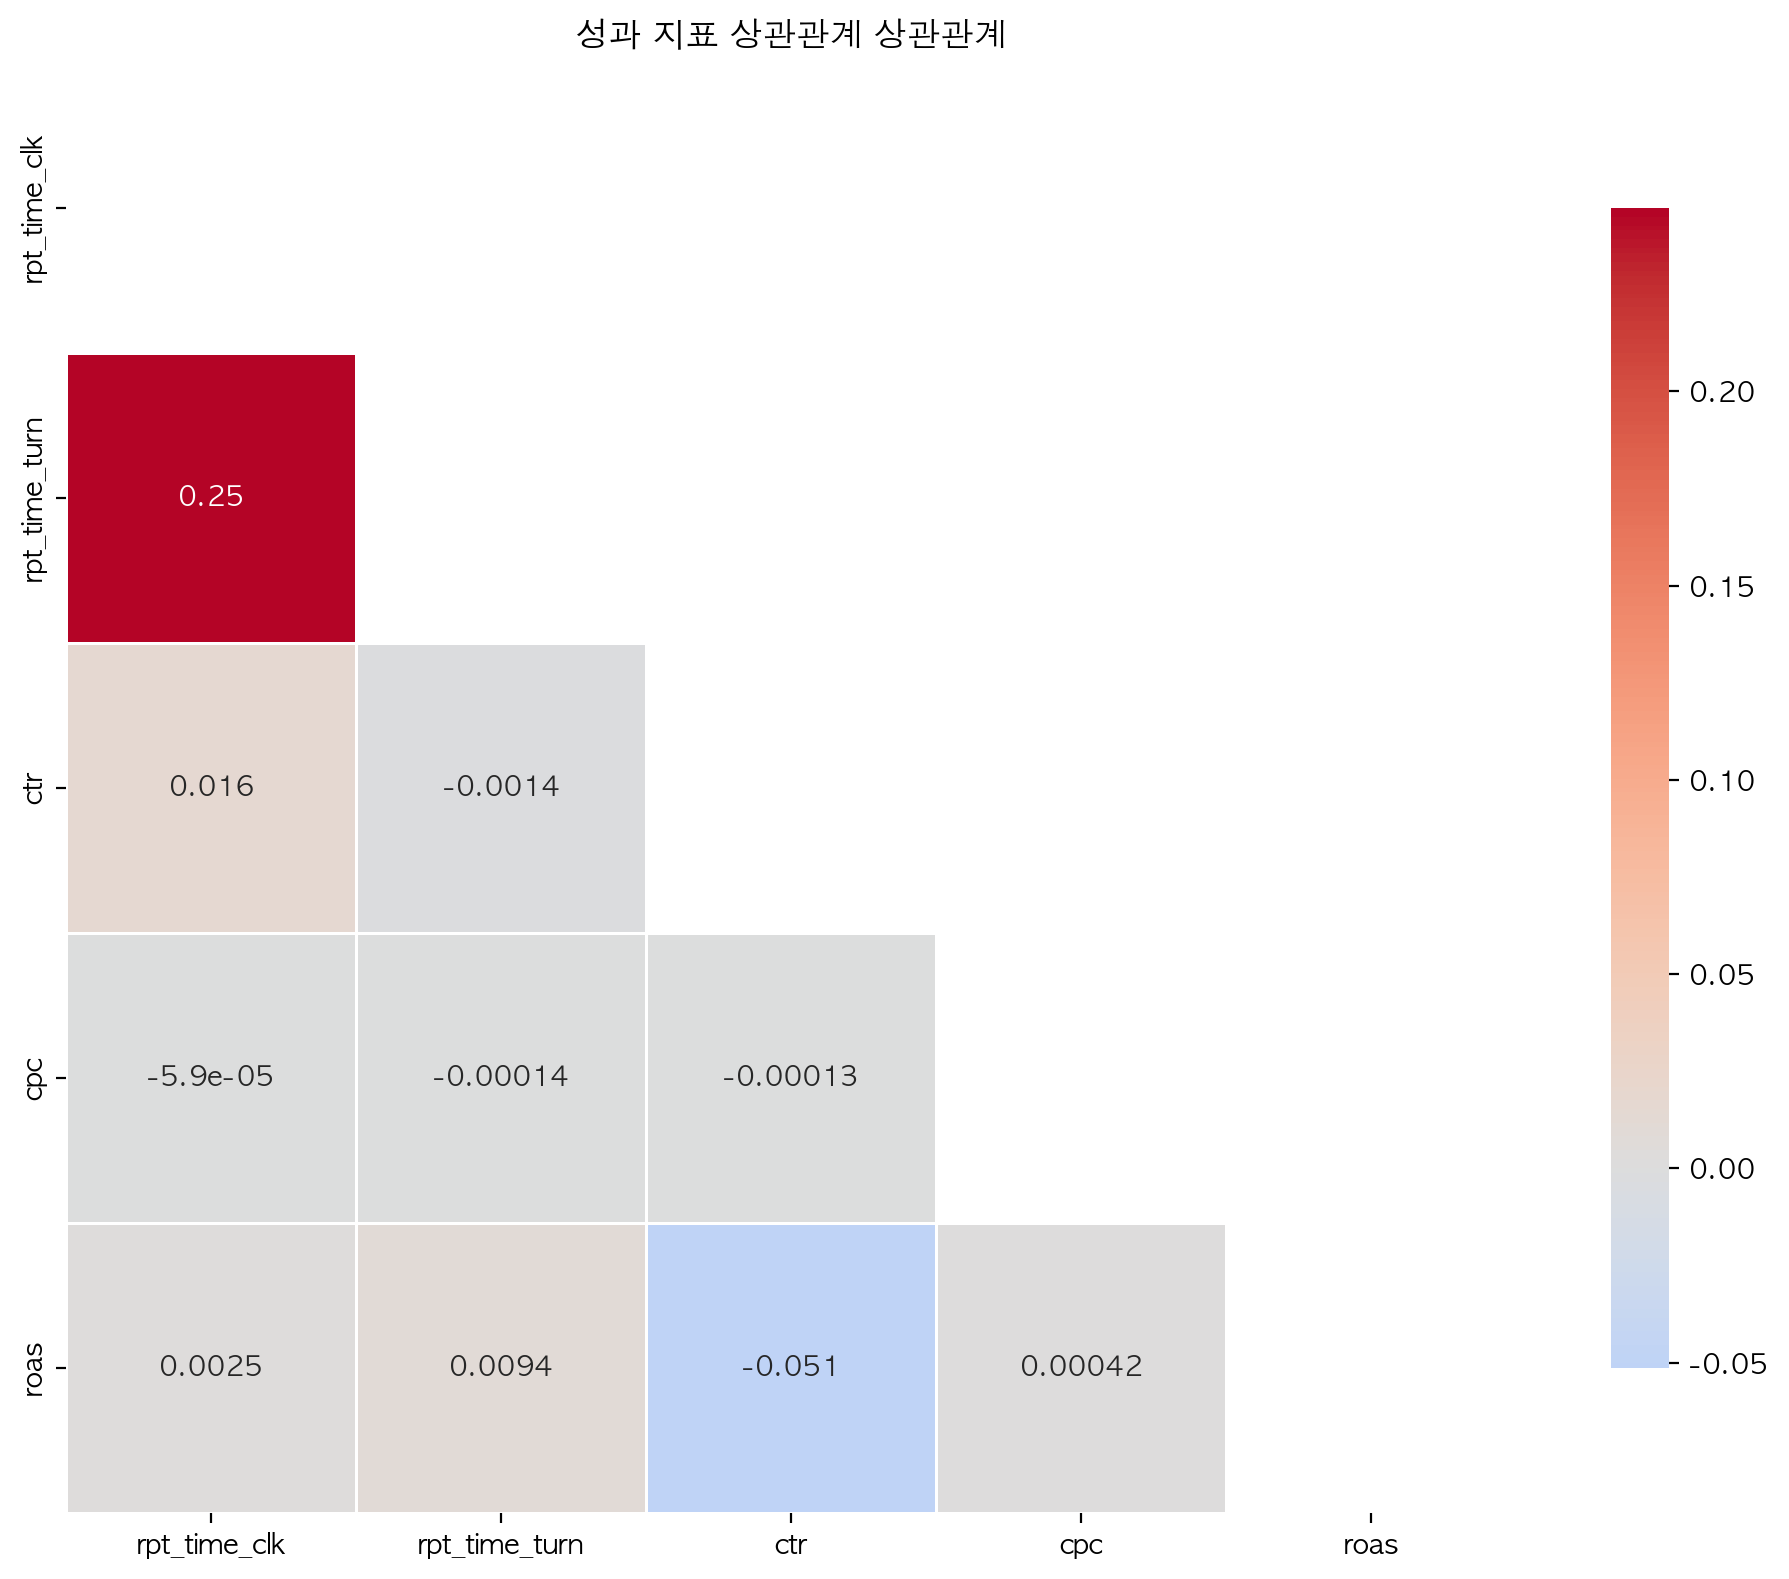


🔍 높은 상관관계 (|r| > 0.7):

🎭 매체사별 광고 선호도 분석

Top 10 매체사별 선호 광고 유형:
  매체사 563: 3 (총 클릭: 15,626,965)
  매체사 539: 3 (총 클릭: 14,148,936)
  매체사 58: 1 (총 클릭: 6,920,127)
  매체사 342: 2 (총 클릭: 4,265,910)
  매체사 12: 1 (총 클릭: 2,660,517)
  매체사 761: 3 (총 클릭: 2,580,389)
  매체사 343: 2 (총 클릭: 2,497,793)
  매체사 396: 2 (총 클릭: 2,205,840)
  매체사 667: 3 (총 클릭: 2,117,644)
  매체사 14: 3 (총 클릭: 1,624,206)

⏰ 시간대별 성과 패턴 분석

📅 요일별 평균 성과:
         rpt_time_clk  rpt_time_turn  rpt_time_earn
weekday                                            
0                9.12           3.23         358.54
1                8.60           3.80         446.77
2               10.01           3.99         481.29
3               13.37           5.20         718.93
4               13.78           5.29         723.67
5               12.19           4.25         528.46
6               11.25           3.48         403.62


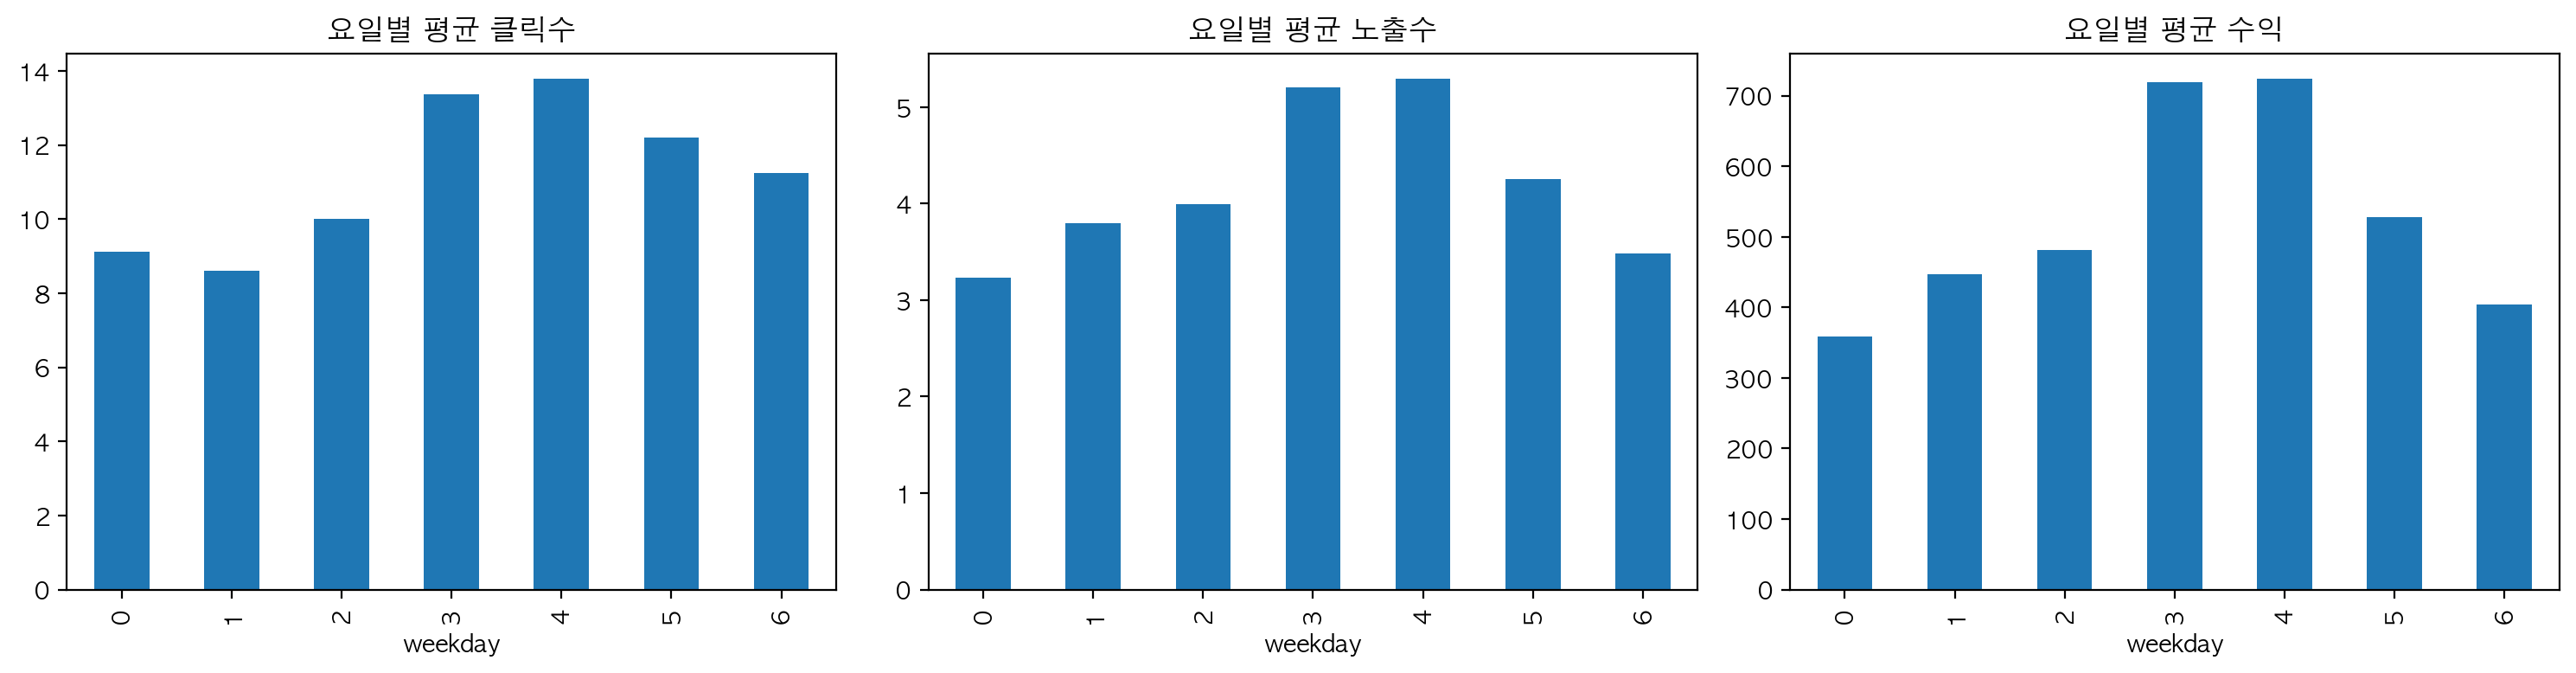

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트
plt.rc("font", family = 'AppleGothic')
plt.rc("axes", unicode_minus = False)

# 글씨 선명하게
set_matplotlib_formats("retina")

print("=== 광고 추천 시스템을 위한 핵심 피처 분석 ===\n")

# 1. 핵심 피처 정의
print("🎯 추천 시스템 핵심 피처들:")
print("""
【성과 지표 피처】
- CTR (Click Through Rate): rpt_time_clk / rpt_time_turn
- CVR (Conversion Rate): conversion 비율  
- CPC (Cost Per Click): rpt_time_cost / rpt_time_clk
- ROAS (Return On Ad Spend): rpt_time_earn / rpt_time_cost
- 매출 효율성: earn_cost / adv_cost

【광고 특성 피처】
- ads_type, ads_category: 광고 유형/카테고리
- ads_contract_price, ads_reward_price: 가격 정보
- ads_age_min, ads_age_max: 타겟 연령대
- ads_os_type: OS 타입

【시간적 피처】
- weekday, week_type: 요일/주말여부
- 시간대별 성과 패턴
- 광고 운영 기간 (ads_sdate ~ ads_edate)

【매체사 관련 피처】
- mda_idx별 선호 광고 유형
- 매체사별 평균 성과 지표
- 매체사 규모 (총 클릭수, 매출)
""")

# 2. 데이터 전처리 및 파생변수 생성 함수들
def create_performance_features(ads_time, ads_rwd, ads_info, ads_join):
    """성과 관련 파생변수 생성"""
    
    print("📊 성과 지표 계산 중...")
    
    # ads_time 기반 집계
    time_agg = ads_time.groupby(['ads_idx', 'mda_idx']).agg({
        'rpt_time_clk': 'sum',
        'rpt_time_turn': 'sum', 
        'rpt_time_cost': 'sum',
        'rpt_time_earn': 'sum',
        'rpt_time_scost': 'sum',
        'rpt_time_acost': 'sum'
    }).reset_index()
    
    # 성과 지표 계산
    time_agg['ctr'] = time_agg['rpt_time_clk'] / (time_agg['rpt_time_turn'] + 1e-8)
    time_agg['cpc'] = time_agg['rpt_time_cost'] / (time_agg['rpt_time_clk'] + 1e-8)
    time_agg['roas'] = time_agg['rpt_time_earn'] / (time_agg['rpt_time_cost'] + 1e-8)
    time_agg['profit_margin'] = (time_agg['rpt_time_earn'] - time_agg['rpt_time_cost']) / (time_agg['rpt_time_earn'] + 1e-8)
    
    return time_agg

def create_ad_features(ads_list):
    """광고 특성 파생변수 생성"""
    
    print("🎨 광고 특성 변수 생성 중...")
    
    ad_features = ads_list.copy()
    
    # 연령대 범위
    if 'ads_age_max' in ad_features.columns and 'ads_age_min' in ad_features.columns:
        ad_features['age_range'] = ad_features['ads_age_max'] - ad_features['ads_age_min']
    
    # 가격 비율
    if 'ads_reward_price' in ad_features.columns and 'ads_contract_price' in ad_features.columns:
        ad_features['price_ratio'] = ad_features['ads_reward_price'] / (ad_features['ads_contract_price'] + 1e-8)
    
    # 광고 운영 기간 - 안전한 날짜 처리
    if 'ads_sdate' in ad_features.columns and 'ads_edate' in ad_features.columns:
        try:
            # 9999-12-31 같은 극값 처리
            def safe_date_convert(date_col):
                # 문자열을 숫자로 변환해서 범위 체크
                if date_col.dtype == 'object':
                    # YYYYMMDD 형식 가정
                    date_col = date_col.astype(str).str.replace('-', '').str.replace('/', '')
                    # 9999 시작하는 날짜를 오늘 날짜로 대체
                    date_col = date_col.replace(r'^9999.*', datetime.now().strftime('%Y%m%d'), regex=True)
                    # 0이나 빈값 처리
                    date_col = date_col.replace(['0', '', 'NaN', 'nan'], datetime.now().strftime('%Y%m%d'))
                
                return pd.to_datetime(date_col, format='%Y%m%d', errors='coerce')
            
            sdate_clean = safe_date_convert(ad_features['ads_sdate'])
            edate_clean = safe_date_convert(ad_features['ads_edate'])
            
            # 유효한 날짜만 계산
            valid_dates = ~(sdate_clean.isna() | edate_clean.isna())
            ad_features['ads_duration'] = np.nan
            ad_features.loc[valid_dates, 'ads_duration'] = (
                edate_clean[valid_dates] - sdate_clean[valid_dates]
            ).dt.days
            
            print(f"   📅 날짜 처리: {valid_dates.sum()}개 유효한 기간 계산됨")
            
        except Exception as e:
            print(f"   ⚠️ 날짜 처리 오류: {e}")
            print("   날짜 컬럼 샘플 확인:")
            print(ad_features[['ads_sdate', 'ads_edate']].head())
    
    return ad_features

def create_media_features(ads_time, ads_rwd):
    """매체사 특성 파생변수 생성"""
    
    print("📺 매체사 특성 변수 생성 중...")
    
    # 매체사별 성과 집계
    media_perf = ads_time.groupby('mda_idx').agg({
        'rpt_time_clk': ['sum', 'mean'],
        'rpt_time_turn': ['sum', 'mean'],
        'rpt_time_cost': ['sum', 'mean'],
        'rpt_time_earn': ['sum', 'mean'],
        'ads_idx': 'nunique'  # 광고 다양성
    }).round(4)
    
    media_perf.columns = ['total_clicks', 'avg_clicks', 'total_impressions', 'avg_impressions',
                         'total_cost', 'avg_cost', 'total_earn', 'avg_earn', 'ad_diversity']
    
    # 매체사 규모 분류
    media_perf['media_size'] = pd.cut(media_perf['total_clicks'], 
                                     bins=3, labels=['Small', 'Medium', 'Large'])
    
    return media_perf.reset_index()

# 3. EDA 분석 함수들
def analyze_feature_distribution(df, features, title):
    """피처 분포 분석"""
    
    print(f"\n📈 {title}")
    
    n_features = len(features)
    n_cols = min(3, n_features)
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    if n_features == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes
    else:
        axes = axes.flatten()
    
    for i, feature in enumerate(features):
        if feature in df.columns:
            if df[feature].dtype in ['object', 'category']:
                df[feature].value_counts().head(10).plot(kind='bar', ax=axes[i])
            else:
                df[feature].hist(bins=30, ax=axes[i])
            axes[i].set_title(f'{feature} 분포')
            axes[i].tick_params(axis='x', rotation=45)
    
    # 빈 subplot 숨기기
    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # 기술통계
    numeric_features = [f for f in features if f in df.columns and df[f].dtype in ['int64', 'float64']]
    if numeric_features:
        print("\n📊 수치형 변수 기술통계:")
        print(df[numeric_features].describe().round(4))

def analyze_correlation(df, features, title):
    """상관관계 분석"""
    
    print(f"\n🔗 {title}")
    
    numeric_features = [f for f in features if f in df.columns and df[f].dtype in ['int64', 'float64']]
    
    if len(numeric_features) > 1:
        corr_matrix = df[numeric_features].corr()
        
        plt.figure(figsize=(10, 8))
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                   square=True, linewidths=0.5, cbar_kws={"shrink": .8})
        plt.title(f'{title} 상관관계')
        plt.tight_layout()
        plt.show()
        
        # 높은 상관관계 출력
        print("\n🔍 높은 상관관계 (|r| > 0.7):")
        high_corr = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                corr_val = corr_matrix.iloc[i, j]
                if abs(corr_val) > 0.7:
                    high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))
        
        for feat1, feat2, corr_val in sorted(high_corr, key=lambda x: abs(x[2]), reverse=True):
            print(f"  {feat1} - {feat2}: {corr_val:.3f}")

# 4. 매체사별 선호도 분석
def analyze_media_preference(ads_time, ads_list):
    """매체사별 광고 선호도 분석"""
    
    print("\n🎭 매체사별 광고 선호도 분석")
    
    # 매체사별 광고 유형 선호도
    media_ad_type = ads_time.merge(ads_list[['ads_idx', 'ads_type', 'ads_category']], on='ads_idx')
    
    # 매체사별 주요 광고 유형
    media_type_perf = media_ad_type.groupby(['mda_idx', 'ads_type']).agg({
        'rpt_time_clk': 'sum',
        'rpt_time_earn': 'sum'
    }).reset_index()
    
    # Top 매체사별 선호 광고 유형
    top_media = media_type_perf.groupby('mda_idx')['rpt_time_clk'].sum().nlargest(10).index
    
    print(f"\nTop 10 매체사별 선호 광고 유형:")
    for mda_idx in top_media:
        media_data = media_type_perf[media_type_perf['mda_idx'] == mda_idx]
        top_type = media_data.loc[media_data['rpt_time_clk'].idxmax(), 'ads_type']
        total_clicks = media_data['rpt_time_clk'].sum()
        print(f"  매체사 {mda_idx}: {top_type} (총 클릭: {total_clicks:,})")

# 5. 시간대별 성과 분석
def analyze_time_patterns(ads_time):
    """시간대별 성과 패턴 분석"""
    
    print("\n⏰ 시간대별 성과 패턴 분석")
    
    # 요일별 성과
    if 'weekday' in ads_time.columns:
        weekday_perf = ads_time.groupby('weekday').agg({
            'rpt_time_clk': 'mean',
            'rpt_time_turn': 'mean',
            'rpt_time_earn': 'mean'
        }).round(2)
        
        print("\n📅 요일별 평균 성과:")
        print(weekday_perf)
        
        # 시각화
        fig, axes = plt.subplots(1, 3, figsize=(15, 4))
        weekday_perf['rpt_time_clk'].plot(kind='bar', ax=axes[0], title='요일별 평균 클릭수')
        weekday_perf['rpt_time_turn'].plot(kind='bar', ax=axes[1], title='요일별 평균 노출수')  
        weekday_perf['rpt_time_earn'].plot(kind='bar', ax=axes[2], title='요일별 평균 수익')
        plt.tight_layout()
        plt.show()

# 6. 주요 실행 함수
def run_comprehensive_eda():
    """종합 EDA 실행"""
    
    print("🚀 EDA 분석을 위한 샘플 데이터로 시뮬레이션합니다...")
    print("실제 데이터가 있다면 해당 DataFrame 이름을 사용하세요.\n")
    
    # 샘플 데이터 생성 (실제 사용시에는 실제 데이터 사용)
    
    # 실제 사용시:
    performance_features = create_performance_features(ads_time, ads_rwd, ads_info, ads_join)
    ad_features = create_ad_features(ads_list)  
    media_features = create_media_features(ads_time, ads_rwd)
    
    # 분석 실행
    analyze_feature_distribution(performance_features, 
                               ['ctr', 'cpc', 'roas', 'profit_margin'], 
                               '성과 지표 분포')
    
    analyze_correlation(performance_features,
                       ['rpt_time_clk', 'rpt_time_turn', 'ctr', 'cpc', 'roas'],
                       '성과 지표 상관관계')
                       
    analyze_media_preference(ads_time, ads_list)
    analyze_time_patterns(ads_time)
    

print("\n" + "="*60)
print("🎯 추천 시스템을 위한 핵심 액션 아이템:")
print("="*60)
print("""
1️⃣ 성과 기반 피처 (가장 중요):
   - CTR, CVR, CPC, ROAS 계산
   - 매체사별 평균 성과와의 편차
   - 광고별 성과 추세 (상승/하락/안정)

2️⃣ 유사도 기반 피처:
   - 광고 카테고리/타입 임베딩
   - 매체사가 선호하는 광고 유형 벡터
   - 연령대, OS타입 등 타겟팅 정보

3️⃣ 시간적 피처:  
   - 요일/시간대별 성과 가중치
   - 계절성/트렌드 반영
   - 최근 성과 가중치 (시간 감쇠)

4️⃣ 협업 필터링용 피처:
   - 매체사-광고 상호작용 행렬
   - 유사 매체사 클러스터링
   - Cold start 문제 해결용 컨텐츠 기반 피처

📋 다음 단계 추천:
   1. 실제 데이터로 EDA 실행
   2. 피처 중요도 분석 (Random Forest 등)
   3. 추천 모델 프로토타입 개발
   4. A/B 테스트 설계
""")

# 실행
run_comprehensive_eda()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트
plt.rc("font", family = 'AppleGothic')
plt.rc("axes", unicode_minus = False)

# 글씨 선명하게
set_matplotlib_formats("retina")
class RealDataAdEDA:
    """실제 데이터 기반 광고 EDA 분석 클래스"""
    
    def __init__(self, ads_list, ads_time, ads_rwd, ads_info, ads_join):
        self.ads_list = ads_list
        self.ads_time = ads_time  
        self.ads_rwd = ads_rwd
        self.ads_info = ads_info
        self.ads_join = ads_join
        
        # 데이터 기본 정보 출력
        print("데이터 로드 완료!")
        print(f"ads_list: {self.ads_list.shape}")
        print(f"ads_time: {self.ads_time.shape}")
        print(f"ads_rwd: {self.ads_rwd.shape}")
        print(f"ads_info: {self.ads_info.shape}")
        print(f"ads_join: {self.ads_join.shape}")
        
        # 날짜 범위 확인
        print(f"\n데이터 기간: {self.ads_time['rpt_time_date'].min()} ~ {self.ads_time['rpt_time_date'].max()}")
        
    def create_performance_metrics(self):
        """성과 지표 생성"""
        print("\n성과 지표 생성 중...")
        
        # ads_time 기반 성과 집계
        performance = self.ads_time.groupby(['ads_idx', 'mda_idx']).agg({
            'rpt_time_clk': 'sum',           # 총 클릭수
            'rpt_time_turn': 'sum',          # 총 전환수  
            'rpt_time_acost': 'sum',         # 총 광고주 비용
            'rpt_time_earn': 'sum',          # 총 유저 리워드
            'rpt_time_scost': 'sum',         # 총 서비스 비용
            'rpt_time_cost': 'sum'           # 총 비용
        }).reset_index()
        
        # 파생 지표 계산
        performance['platform_revenue'] = performance['rpt_time_acost'] - performance['rpt_time_earn']
        performance['ctr'] = np.where(performance['rpt_time_clk'] > 0,
                                    performance['rpt_time_turn'] / performance['rpt_time_clk'], 0)
        performance['cpc'] = np.where(performance['rpt_time_clk'] > 0,
                                    performance['rpt_time_acost'] / performance['rpt_time_clk'], 0)
        performance['cpa'] = np.where(performance['rpt_time_turn'] > 0,
                                    performance['rpt_time_acost'] / performance['rpt_time_turn'], 0)
        performance['margin_rate'] = np.where(performance['rpt_time_acost'] > 0,
                                            performance['platform_revenue'] / performance['rpt_time_acost'], 0)
        
        print(f"성과 지표 생성 완료: {len(performance):,}개 광고-매체 조합")
        
        return performance

In [ ]:
def analyze_temporal_patterns(self):
    """시간적 패턴 분석"""
    print("\n⏰ 시간적 패턴 분석 시작...")
    
    # 날짜 변환 및 시간 파생 변수 생성
    temporal_data = self.ads_time.copy()
    temporal_data['rpt_time_date'] = pd.to_datetime(temporal_data['rpt_time_date'])
    temporal_data['year'] = temporal_data['rpt_time_date'].dt.year
    temporal_data['month'] = temporal_data['rpt_time_date'].dt.month
    temporal_data['year_month'] = temporal_data['rpt_time_date'].dt.to_period('M')
    temporal_data['day_of_week'] = temporal_data['rpt_time_date'].dt.day_name()
    
    # 시간 처리
    if 'rpt_time_time' in temporal_data.columns:
        temporal_data['hour'] = pd.to_datetime(temporal_data['rpt_time_time'], format='%H:%M:%S', errors='coerce').dt.hour
        temporal_data['hour'] = temporal_data['hour'].fillna(12).astype(int)
    else:
        temporal_data['hour'] = 12
    
    # 플랫폼 수익 계산
    temporal_data['platform_revenue'] = temporal_data['rpt_time_acost'] - temporal_data['rpt_time_earn']
    
    fig, axes = plt.subplots(3, 3, figsize=(24, 18))
    fig.suptitle('⏰ 시간적 패턴 분석 (실제 데이터)', fontsize=20, fontweight='bold')
    
    # 1. 월별 수익 트렌드
    monthly_revenue = temporal_data.groupby('year_month')['platform_revenue'].sum()
    axes[0,0].plot(range(len(monthly_revenue)), monthly_revenue.values, marker='o', linewidth=3, markersize=8, color='blue')
    axes[0,0].fill_between(range(len(monthly_revenue)), monthly_revenue.values, alpha=0.3, color='blue')
    axes[0,0].set_title('월별 수익 트렌드', fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('기간')
    axes[0,0].set_ylabel('수익 (원)')
    axes[0,0].set_xticks(range(len(monthly_revenue)))
    axes[0,0].set_xticklabels([str(x) for x in monthly_revenue.index], rotation=45)
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. 요일별 클릭수 분포
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    temporal_data['day_of_week'] = pd.Categorical(temporal_data['day_of_week'], categories=weekday_order, ordered=True)
    
    sns.boxplot(data=temporal_data, x='day_of_week', y='rpt_time_clk', ax=axes[0,1])
    axes[0,1].set_title('요일별 클릭수 분포', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('요일')
    axes[0,1].set_ylabel('클릭수')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # 3. 시간대별-요일별 클릭 히트맵
    hourly_activity = temporal_data.groupby(['day_of_week', 'hour'])['rpt_time_clk'].mean().unstack(fill_value=0)
    sns.heatmap(hourly_activity, annot=False, cmap='YlOrRd', ax=axes[0,2], cbar_kws={'label': '평균 클릭수'})
    axes[0,2].set_title('요일별-시간별 평균 클릭수 히트맵', fontsize=14, fontweight='bold')
    axes[0,2].set_xlabel('시간')
    axes[0,2].set_ylabel('요일')
    
    # 4. 주중/주말 비교
    weekend_comparison = temporal_data.groupby('week_type').agg({
        'rpt_time_clk': 'mean',
        'rpt_time_turn': 'mean',
        'platform_revenue': 'mean',
        'rpt_time_acost': 'mean'
    })
    
    x = range(len(weekend_comparison))
    width = 0.2
    
    axes[1,0].bar([i-width for i in x], weekend_comparison['rpt_time_clk'], width, label='평균 클릭수', alpha=0.8)
    axes[1,0].bar([i for i in x], weekend_comparison['rpt_time_turn'], width, label='평균 전환수', alpha=0.8)
    axes[1,0].bar([i+width for i in x], weekend_comparison['rpt_time_acost']/100, width, label='평균 광고비(÷100)', alpha=0.8)
    
    axes[1,0].set_title('주중/주말 성과 비교', fontsize=14, fontweight='bold')
    axes[1,0].set_xticks(x)
    axes[1,0].set_xticklabels(weekend_comparison.index)
    axes[1,0].legend()
    
    # 5. 일별 누적 수익 추이
    daily_revenue = temporal_data.groupby('rpt_time_date')['platform_revenue'].sum().cumsum()
    axes[1,1].plot(daily_revenue.index, daily_revenue.values, linewidth=2, color='green')
    axes[1,1].fill_between(daily_revenue.index, daily_revenue.values, alpha=0.3, color='green')
    axes[1,1].set_title('일별 누적 수익 추이', fontsize=14, fontweight='bold')
    axes[1,1].set_ylabel('누적 수익 (원)')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    # 6. 클릭수 vs 전환수 일별 변동성
    daily_stats = temporal_data.groupby('rpt_time_date').agg({
        'rpt_time_clk': ['mean', 'std'],
        'rpt_time_turn': ['mean', 'std']
    })
    
    axes[1,2].scatter(daily_stats[('rpt_time_clk', 'mean')], daily_stats[('rpt_time_clk', 'std')], 
                     alpha=0.6, s=50, label='클릭수')
    axes[1,2].scatter(daily_stats[('rpt_time_turn', 'mean')], daily_stats[('rpt_time_turn', 'std')], 
                     alpha=0.6, s=50, label='전환수')
    axes[1,2].set_title('일별 성과 평균 vs 표준편차', fontsize=14, fontweight='bold')
    axes[1,2].set_xlabel('평균')
    axes[1,2].set_ylabel('표준편차')
    axes[1,2].legend()
    
    # 7. 월별 전환율 트렌드
    monthly_cvr = temporal_data.groupby('year_month').apply(
        lambda x: x['rpt_time_turn'].sum() / x['rpt_time_clk'].sum() if x['rpt_time_clk'].sum() > 0 else 0
    )
    axes[2,0].plot(range(len(monthly_cvr)), monthly_cvr.values, marker='s', linewidth=3, markersize=8, color='red')
    axes[2,0].set_title('월별 전환율 트렌드', fontsize=14, fontweight='bold')
    axes[2,0].set_xlabel('기간')
    axes[2,0].set_ylabel('전환율')
    axes[2,0].set_xticks(range(len(monthly_cvr)))
    axes[2,0].set_xticklabels([str(x) for x in monthly_cvr.index], rotation=45)
    axes[2,0].grid(True, alpha=0.3)
    
    # 8. 광고비 vs 수익 월별 비교
    monthly_finance = temporal_data.groupby('year_month').agg({
        'rpt_time_acost': 'sum',
        'rpt_time_earn': 'sum', 
        'platform_revenue': 'sum'
    })
    
    x = range(len(monthly_finance))
    width = 0.25
    
    axes[2,1].bar([i-width for i in x], monthly_finance['rpt_time_acost'], width, label='광고비', alpha=0.8)
    axes[2,1].bar([i for i in x], monthly_finance['rpt_time_earn'], width, label='유저 리워드', alpha=0.8)
    axes[2,1].bar([i+width for i in x], monthly_finance['platform_revenue'], width, label='플랫폼 수익', alpha=0.8)
    
    axes[2,1].set_title('월별 재무 구조', fontsize=14, fontweight='bold')
    axes[2,1].set_xticks(x)
    axes[2,1].set_xticklabels([str(x) for x in monthly_finance.index], rotation=45)
    axes[2,1].legend()
    
    # 9. 일별 수익 성장률
    daily_revenue_growth = temporal_data.groupby('rpt_time_date')['platform_revenue'].sum()
    growth_rate = daily_revenue_growth.pct_change().rolling(7).mean()  # 7일 이동평균
    
    axes[2,2].plot(growth_rate.index, growth_rate.values, linewidth=2, color='purple')
    axes[2,2].axhline(y=0, color='red', linestyle='--', alpha=0.7)
    axes[2,2].set_title('일별 수익 성장률 (7일 이동평균)', fontsize=14, fontweight='bold')
    axes[2,2].set_ylabel('성장률')
    axes[2,2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # 요약 통계 출력
    print(f"\n📊 시간적 패턴 요약:")
    print(f"   분석 기간: {temporal_data['rpt_time_date'].min()} ~ {temporal_data['rpt_time_date'].max()}")
    print(f"   총 데이터 포인트: {len(temporal_data):,}개")
    print(f"   총 플랫폼 수익: {temporal_data['platform_revenue'].sum():,.0f}원")
    print(f"   평균 일일 클릭수: {temporal_data.groupby('rpt_time_date')['rpt_time_clk'].sum().mean():.0f}회")
    print(f"   평균 전환율: {temporal_data['rpt_time_turn'].sum() / temporal_data['rpt_time_clk'].sum():.3f}")
    
    return temporal_data

# 클래스에 메소드 추가
RealDataAdEDA.analyze_temporal_patterns = analyze_temporal_patterns

In [ ]:
def analyze_media_performance(self):
    """매체사별 성과 분석"""
    print("\n📺 매체사별 성과 분석 시작...")
    
    # 매체사별 성과 집계
    media_perf = self.ads_time.groupby('mda_idx').agg({
        'ads_idx': 'nunique',                # 고유 광고수
        'rpt_time_clk': 'sum',              # 총 클릭수
        'rpt_time_turn': 'sum',             # 총 전환수
        'rpt_time_acost': 'sum',            # 총 광고비
        'rpt_time_earn': 'sum',             # 총 유저 리워드
        'rpt_time_scost': 'sum',            # 총 서비스 비용
        'rpt_time_cost': 'sum'              # 총 비용
    }).reset_index()
    
    # 파생 지표 계산
    media_perf['platform_revenue'] = media_perf['rpt_time_acost'] - media_perf['rpt_time_earn']
    media_perf['ctr'] = np.where(media_perf['rpt_time_clk'] > 0,
                                media_perf['rpt_time_turn'] / media_perf['rpt_time_clk'], 0)
    media_perf['cpc'] = np.where(media_perf['rpt_time_clk'] > 0,
                                media_perf['rpt_time_acost'] / media_perf['rpt_time_clk'], 0)
    media_perf['margin_rate'] = np.where(media_perf['rpt_time_acost'] > 0,
                                        media_perf['platform_revenue'] / media_perf['rpt_time_acost'], 0)
    
    # 상위 매체사 선별
    top_media = media_perf.nlargest(15, 'platform_revenue')
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('📺 매체사별 성과 분석 (실제 데이터)', fontsize=16, fontweight='bold')
    
    # 1. 매체사별 수익 순위 (Top 15)
    axes[0,0].barh(range(len(top_media)), top_media['platform_revenue'], color='skyblue')
    axes[0,0].set_title('매체사별 총 수익 (Top 15)', fontsize=14)
    axes[0,0].set_yticks(range(len(top_media)))
    axes[0,0].set_yticklabels([f'매체_{int(x)}' for x in top_media['mda_idx']])
    axes[0,0].set_xlabel('총 수익 (원)')
    
    # 수익 라벨 추가
    for i, v in enumerate(top_media['platform_revenue']):
        axes[0,0].text(v + max(top_media['platform_revenue'])*0.01, i, f'{v:,.0f}', 
                      va='center', fontsize=9)
    
    # 2. 매체사별 CTR vs CPC 산점도
    bubble_size = top_media['rpt_time_clk'] / top_media['rpt_time_clk'].max() * 200
    scatter = axes[0,1].scatter(top_media['ctr'], top_media['cpc'], 
                               s=bubble_size, alpha=0.6, c=top_media['margin_rate'], 
                               cmap='RdYlGn', edgecolors='black')
    axes[0,1].set_title('CTR vs CPC (버블크기: 클릭수)', fontsize=14)
    axes[0,1].set_xlabel('CTR (전환율)')
    axes[0,1].set_ylabel('CPC (클릭당 비용)')
    plt.colorbar(scatter, ax=axes[0,1], label='마진율')
    
    # 3. 매체사 규모 분포
    media_perf['revenue_category'] = pd.cut(media_perf['platform_revenue'],
                                          bins=[-np.inf, 0, 100000, 500000, np.inf],
                                          labels=['손실', '소규모', '중규모', '대규모'])
    
    category_counts = media_perf['revenue_category'].value_counts()
    colors = ['red', 'orange', 'lightblue', 'green']
    axes[0,2].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
                 colors=colors, startangle=90)
    axes[0,2].set_title('매체사 수익 규모 분포', fontsize=14)
    
    # 4. 클릭수 vs 수익 관계
    axes[1,0].scatter(media_perf['rpt_time_clk'], media_perf['platform_revenue'], 
                     alpha=0.6, s=50)
    axes[1,0].set_title('클릭수 vs 수익 관계', fontsize=14)
    axes[1,0].set_xlabel('총 클릭수')
    axes[1,0].set_ylabel('플랫폼 수익 (원)')
    axes[1,0].grid(True, alpha=0.3)
    
    # 추세선 추가
    if len(media_perf) > 1:
        z = np.polyfit(media_perf['rpt_time_clk'], media_perf['platform_revenue'], 1)
        p = np.poly1d(z)
        axes[1,0].plot(media_perf['rpt_time_clk'], p(media_perf['rpt_time_clk']), 
                      "r--", alpha=0.8, linewidth=2)
    
    # 5. 매체사별 광고 다양성
    axes[1,1].hist(media_perf['ads_idx'], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[1,1].axvline(media_perf['ads_idx'].mean(), color='blue', linestyle='--', 
                     linewidth=2, label=f'평균: {media_perf["ads_idx"].mean():.1f}개')
    axes[1,1].set_title('매체사별 광고 다양성 분포', fontsize=14)
    axes[1,1].set_xlabel('고유 광고 수')
    axes[1,1].set_ylabel('매체사 수')
    axes[1,1].legend()
    
    # 6. 마진율 분포
    margin_filtered = media_perf[media_perf['margin_rate'].between(-1, 1)]['margin_rate']
    axes[1,2].hist(margin_filtered, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1,2].axvline(0, color='red', linestyle='--', linewidth=2, label='손익분기점')
    axes[1,2].axvline(margin_filtered.mean(), color='blue', linestyle='-', linewidth=2,
                     label=f'평균: {margin_filtered.mean():.1%}')
    axes[1,2].set_title('매체사별 마진율 분포', fontsize=14)
    axes[1,2].set_xlabel('마진율')
    axes[1,2].set_ylabel('매체사 수')
    axes[1,2].legend()
    
    plt.tight_layout()
    plt.show()
    
    # 요약 통계 출력
    print(f"\n📊 매체사별 성과 요약:")
    print(f"   총 매체사 수: {len(media_perf):,}개")
    print(f"   수익성 매체사: {(media_perf['platform_revenue'] > 0).sum():,}개 ({(media_perf['platform_revenue'] > 0).mean():.1%})")
    print(f"   평균 매체사 수익: {media_perf['platform_revenue'].mean():,.0f}원")
    print(f"   최고 수익 매체사: 매체_{media_perf.loc[media_perf['platform_revenue'].idxmax(), 'mda_idx']} ({media_perf['platform_revenue'].max():,.0f}원)")
    print(f"   평균 CTR: {media_perf['ctr'].mean():.3f}")
    print(f"   평균 CPC: {media_perf['cpc'].mean():.0f}원")
    
    return media_perf

# 클래스에 메소드 추가
RealDataAdEDA.analyze_media_performance = analyze_media_performance

In [ ]:
def analyze_ad_categories(self):
    """광고 카테고리별 성과 분석"""
    print("\n🏷️ 광고 카테고리별 성과 분석 시작...")
    
    # ads_time과 ads_list 조인하여 카테고리 정보 결합
    category_data = self.ads_time.merge(
        self.ads_list[['ads_idx', 'ads_category', 'ads_type', 'ads_contract_price', 'ads_reward_price']], 
        on='ads_idx', how='left'
    )
    
    # 카테고리별 성과 집계
    category_perf = category_data.groupby('ads_category').agg({
        'ads_idx': 'nunique',                    # 고유 광고수
        'rpt_time_clk': 'sum',                  # 총 클릭수
        'rpt_time_turn': 'sum',                 # 총 전환수
        'rpt_time_acost': 'sum',                # 총 광고비
        'rpt_time_earn': 'sum',                 # 총 유저 리워드
        'ads_contract_price': 'mean',           # 평균 계약가
        'ads_reward_price': 'mean'              # 평균 리워드가
    }).reset_index()
    
    # 파생 지표 계산
    category_perf['platform_revenue'] = category_perf['rpt_time_acost'] - category_perf['rpt_time_earn']
    category_perf['ctr'] = np.where(category_perf['rpt_time_clk'] > 0,
                                   category_perf['rpt_time_turn'] / category_perf['rpt_time_clk'], 0)
    category_perf['cpc'] = np.where(category_perf['rpt_time_clk'] > 0,
                                   category_perf['rpt_time_acost'] / category_perf['rpt_time_clk'], 0)
    category_perf['margin_rate'] = np.where(category_perf['rpt_time_acost'] > 0,
                                           category_perf['platform_revenue'] / category_perf['rpt_time_acost'], 0)
    
    # 상위 카테고리 선별
    top_categories = category_perf.nlargest(10, 'platform_revenue')
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('🏷️ 광고 카테고리별 성과 분석 (실제 데이터)', fontsize=16, fontweight='bold')
    
    # 1. 카테고리별 수익 순위
    axes[0,0].barh(range(len(top_categories)), top_categories['platform_revenue'], color='lightgreen')
    axes[0,0].set_title('카테고리별 총 수익 (Top 10)', fontsize=14)
    axes[0,0].set_yticks(range(len(top_categories)))
    axes[0,0].set_yticklabels(top_categories['ads_category'])
    axes[0,0].set_xlabel('총 수익 (원)')
    
    # 수익 라벨 추가
    for i, v in enumerate(top_categories['platform_revenue']):
        axes[0,0].text(v + max(top_categories['platform_revenue'])*0.01, i, f'{v:,.0f}', 
                      va='center', fontsize=9)
    
    # 2. 카테고리별 CTR 비교
    axes[0,1].bar(range(len(top_categories)), top_categories['ctr'], color='coral', alpha=0.8)
    axes[0,1].set_title('카테고리별 CTR', fontsize=14)
    axes[0,1].set_xticks(range(len(top_categories)))
    axes[0,1].set_xticklabels(top_categories['ads_category'], rotation=45, ha='right')
    axes[0,1].set_ylabel('CTR (전환율)')
    
    # CTR 값 라벨 추가
    for i, v in enumerate(top_categories['ctr']):
        axes[0,1].text(i, v + max(top_categories['ctr'])*0.01, f'{v:.3f}', 
                      ha='center', fontsize=9)
    
    # 3. 수익 점유율 파이차트
    axes[0,2].pie(top_categories['platform_revenue'], labels=top_categories['ads_category'], 
                 autopct='%1.1f%%', startangle=90)
    axes[0,2].set_title('카테고리별 수익 점유율 (Top 10)', fontsize=14)
    
    # 4. 클릭수 vs 전환수 버블차트
    bubble_size = top_categories['ads_idx'] * 10  # 광고 수에 비례한 버블 크기
    scatter = axes[1,0].scatter(top_categories['rpt_time_clk'], top_categories['rpt_time_turn'],
                               s=bubble_size, alpha=0.6, c=top_categories['margin_rate'], 
                               cmap='RdYlGn', edgecolors='black')
    axes[1,0].set_title('클릭수 vs 전환수 (버블크기: 광고수)', fontsize=14)
    axes[1,0].set_xlabel('총 클릭수')
    axes[1,0].set_ylabel('총 전환수')
    plt.colorbar(scatter, ax=axes[1,0], label='마진율')
    
    # 5. 계약가 vs 리워드가 비교
    x = range(len(top_categories))
    width = 0.35
    
    axes[1,1].bar([i - width/2 for i in x], top_categories['ads_contract_price'], width,
                 label='평균 계약가', alpha=0.8, color='skyblue')
    axes[1,1].bar([i + width/2 for i in x], top_categories['ads_reward_price'], width,
                 label='평균 리워드가', alpha=0.8, color='orange')
    
    axes[1,1].set_title('카테고리별 계약가 vs 리워드가', fontsize=14)
    axes[1,1].set_xticks(x)
    axes[1,1].set_xticklabels(top_categories['ads_category'], rotation=45, ha='right')
    axes[1,1].set_ylabel('가격 (원)')
    axes[1,1].legend()
    
    # 6. 마진율 분포
    margin_data = category_perf[category_perf['margin_rate'].between(-1, 1)]['margin_rate']
    axes[1,2].hist(margin_data, bins=20, alpha=0.7, color='lightsteelblue', edgecolor='black')
    axes[1,2].axvline(0, color='red', linestyle='--', linewidth=2, label='손익분기점')
    axes[1,2].axvline(margin_data.mean(), color='blue', linestyle='-', linewidth=2,
                     label=f'평균: {margin_data.mean():.1%}')
    axes[1,2].set_title('카테고리별 마진율 분포', fontsize=14)
    axes[1,2].set_xlabel('마진율')
    axes[1,2].set_ylabel('카테고리 수')
    axes[1,2].legend()
    
    plt.tight_layout()
    plt.show()
    
    # 광고 타입별 분석 추가
    print("\n📋 광고 타입별 성과:")
    type_perf = category_data.groupby('ads_type').agg({
        'ads_idx': 'nunique',
        'rpt_time_clk': 'sum',
        'rpt_time_turn': 'sum',
        'rpt_time_acost': 'sum',
        'rpt_time_earn': 'sum'
    })
    type_perf['platform_revenue'] = type_perf['rpt_time_acost'] - type_perf['rpt_time_earn']
    type_perf['ctr'] = type_perf['rpt_time_turn'] / type_perf['rpt_time_clk']
    
    for idx, row in type_perf.iterrows():
        print(f"   {idx}: 광고 {row['ads_idx']}개, 수익 {row['platform_revenue']:,.0f}원, CTR {row['ctr']:.3f}")
    
    # 요약 통계 출력
    print(f"\n📊 카테고리별 성과 요약:")
    print(f"   총 카테고리 수: {len(category_perf)}개")
    best_category = category_perf.loc[category_perf['platform_revenue'].idxmax()]
    print(f"   최고 수익 카테고리: {best_category['ads_category']} ({best_category['platform_revenue']:,.0f}원)")
    print(f"   평균 카테고리 수익: {category_perf['platform_revenue'].mean():,.0f}원")
    print(f"   수익성 카테고리: {(category_perf['platform_revenue'] > 0).sum()}개")
    
    return category_perf

# 클래스에 메소드 추가
RealDataAdEDA.analyze_ad_categories = analyze_ad_categories

In [ ]:
# =============================================================================
# 실제 데이터 기반 실행 가이드
# =============================================================================

def run_real_data_analysis(ads_list, ads_time, ads_rwd, ads_info, ads_join):
    """실제 데이터로 전체 분석 실행"""
    
    print("🚀 실제 데이터 기반 광고 EDA 분석 시작!")
    print("="*80)
    
    # 1. 분석기 초기화
    analyzer = RealDataAdEDA(ads_list, ads_time, ads_rwd, ads_info, ads_join)
    
    # 2. 기본 성과 지표 생성
    performance = analyzer.create_performance_metrics()
    
    # 3. 시간적 패턴 분석
    print("\n1️⃣ 시간적 패턴 분석...")
    temporal_data = analyzer.analyze_temporal_patterns()
    
    # 4. 매체사별 성과 분석
    print("\n2️⃣ 매체사별 성과 분석...")
    media_perf = analyzer.analyze_media_performance()
    
    # 5. 광고 카테고리별 분석
    print("\n3️⃣ 광고 카테고리별 분석...")
    category_perf = analyzer.analyze_ad_categories()
    
    # 결과 반환
    results = {
        'analyzer': analyzer,
        'performance': performance,
        'temporal_data': temporal_data,
        'media_perf': media_perf,
        'category_perf': category_perf
    }
    
    print("\n" + "="*80)
    print("✅ 실제 데이터 분석 완료!")
    print("="*80)
    
    return results

# =============================================================================
# 개별 분석 실행 함수들
# =============================================================================

def quick_data_overview(ads_list, ads_time, ads_rwd, ads_info, ads_join):
    """데이터 개요 빠른 확인"""
    print("📊 데이터 개요:")
    print(f"   ads_list: {ads_list.shape} - 광고 기본 정보")
    print(f"   ads_time: {ads_time.shape} - 시간별 성과 데이터")
    print(f"   ads_rwd: {ads_rwd.shape} - 리워드 데이터")
    print(f"   ads_info: {ads_info.shape} - 클릭 상세 정보")
    print(f"   ads_join: {ads_join.shape} - 전환 상세 정보")
    
    print(f"\n📅 데이터 기간:")
    print(f"   ads_time: {ads_time['rpt_time_date'].min()} ~ {ads_time['rpt_time_date'].max()}")
    
    print(f"\n🎯 핵심 통계:")
    print(f"   총 광고 수: {ads_list['ads_idx'].nunique():,}개")
    print(f"   총 매체사 수: {ads_time['mda_idx'].nunique():,}개")
    print(f"   총 클릭수: {ads_time['rpt_time_clk'].sum():,}회")
    print(f"   총 전환수: {ads_time['rpt_time_turn'].sum():,}회")
    print(f"   총 광고비: {ads_time['rpt_time_acost'].sum():,.0f}원")
    print(f"   총 플랫폼 수익: {(ads_time['rpt_time_acost'] - ads_time['rpt_time_earn']).sum():,.0f}원")

def analyze_conversion_funnel(ads_info, ads_join):
    """전환 퍼널 분석"""
    print("\n🎯 전환 퍼널 분석...")
    
    # 기본 퍼널 데이터
    total_clicks = len(ads_info)
    total_conversions = len(ads_join)
    conversion_rate = total_conversions / total_clicks if total_clicks > 0 else 0
    
    print(f"   총 클릭: {total_clicks:,}회")
    print(f"   총 전환: {total_conversions:,}회") 
    print(f"   전환율: {conversion_rate:.2%}")
    
    # 매체사별 전환율
    if 'mda_idx' in ads_info.columns and 'mda_idx' in ads_join.columns:
        media_clicks = ads_info.groupby('mda_idx').size()
        media_conversions = ads_join.groupby('mda_idx').size()
        media_cvr = (media_conversions / media_clicks).fillna(0)
        
        print(f"\n📺 매체사별 전환율 Top 5:")
        for media_id, cvr in media_cvr.nlargest(5).items():
            clicks = media_clicks.get(media_id, 0)
            conversions = media_conversions.get(media_id, 0)
            print(f"   매체_{media_id}: {cvr:.2%} ({conversions}/{clicks})")

def analyze_user_behavior(ads_rwd):
    """사용자 행동 분석"""
    print("\n👥 사용자 행동 분석...")
    
    # 리워드 분석
    if 'earn_cost' in ads_rwd.columns:
        print(f"   평균 리워드: {ads_rwd['earn_cost'].mean():.0f}원")
        print(f"   리워드 범위: {ads_rwd['earn_cost'].min():.0f}원 ~ {ads_rwd['earn_cost'].max():.0f}원")
    
    # 광고별 참여도
    if 'ads_idx' in ads_rwd.columns:
        ad_engagement = ads_rwd.groupby('ads_idx').size()
        print(f"   평균 광고 참여도: {ad_engagement.mean():.1f}회")
        print(f"   최고 참여 광고: 광고_{ad_engagement.idxmax()} ({ad_engagement.max()}회)")

# =============================================================================
# 사용 예시
# =============================================================================

"""
🚀 실행 방법:

1. 전체 분석 실행:
results = run_real_data_analysis(ads_list, ads_time, ads_rwd, ads_info, ads_join)

2. 개별 분석 실행:
analyzer = RealDataAdEDA(ads_list, ads_time, ads_rwd, ads_info, ads_join)

# 시간적 패턴만 분석
temporal_data = analyzer.analyze_temporal_patterns()

# 매체사 성과만 분석  
media_perf = analyzer.analyze_media_performance()

# 카테고리 분석만
category_perf = analyzer.analyze_ad_categories()

3. 빠른 데이터 확인:
quick_data_overview(ads_list, ads_time, ads_rwd, ads_info, ads_join)
analyze_conversion_funnel(ads_info, ads_join)
analyze_user_behavior(ads_rwd)
"""

print("실제 데이터 기반 EDA 분석 도구 로드 완료!")
print("사용법: run_real_data_analysis(ads_list, ads_time, ads_rwd, ads_info, ads_join)")

실제 데이터 기반 EDA 분석 도구 로드 완료!
사용법: run_real_data_analysis(ads_list, ads_time, ads_rwd, ads_info, ads_join)


🚀 실제 데이터 기반 광고 EDA 분석 시작!
데이터 로드 완료!
ads_list: (445039, 21)
ads_time: (6953146, 13)
ads_rwd: (1475031, 14)
ads_info: (16854865, 14)
ads_join: (16854865, 22)

데이터 기간: 2024-07-27 ~ 2025-08-29

성과 지표 생성 중...
성과 지표 생성 완료: 815,226개 광고-매체 조합

1️⃣ 시간적 패턴 분석...

⏰ 시간적 패턴 분석 시작...


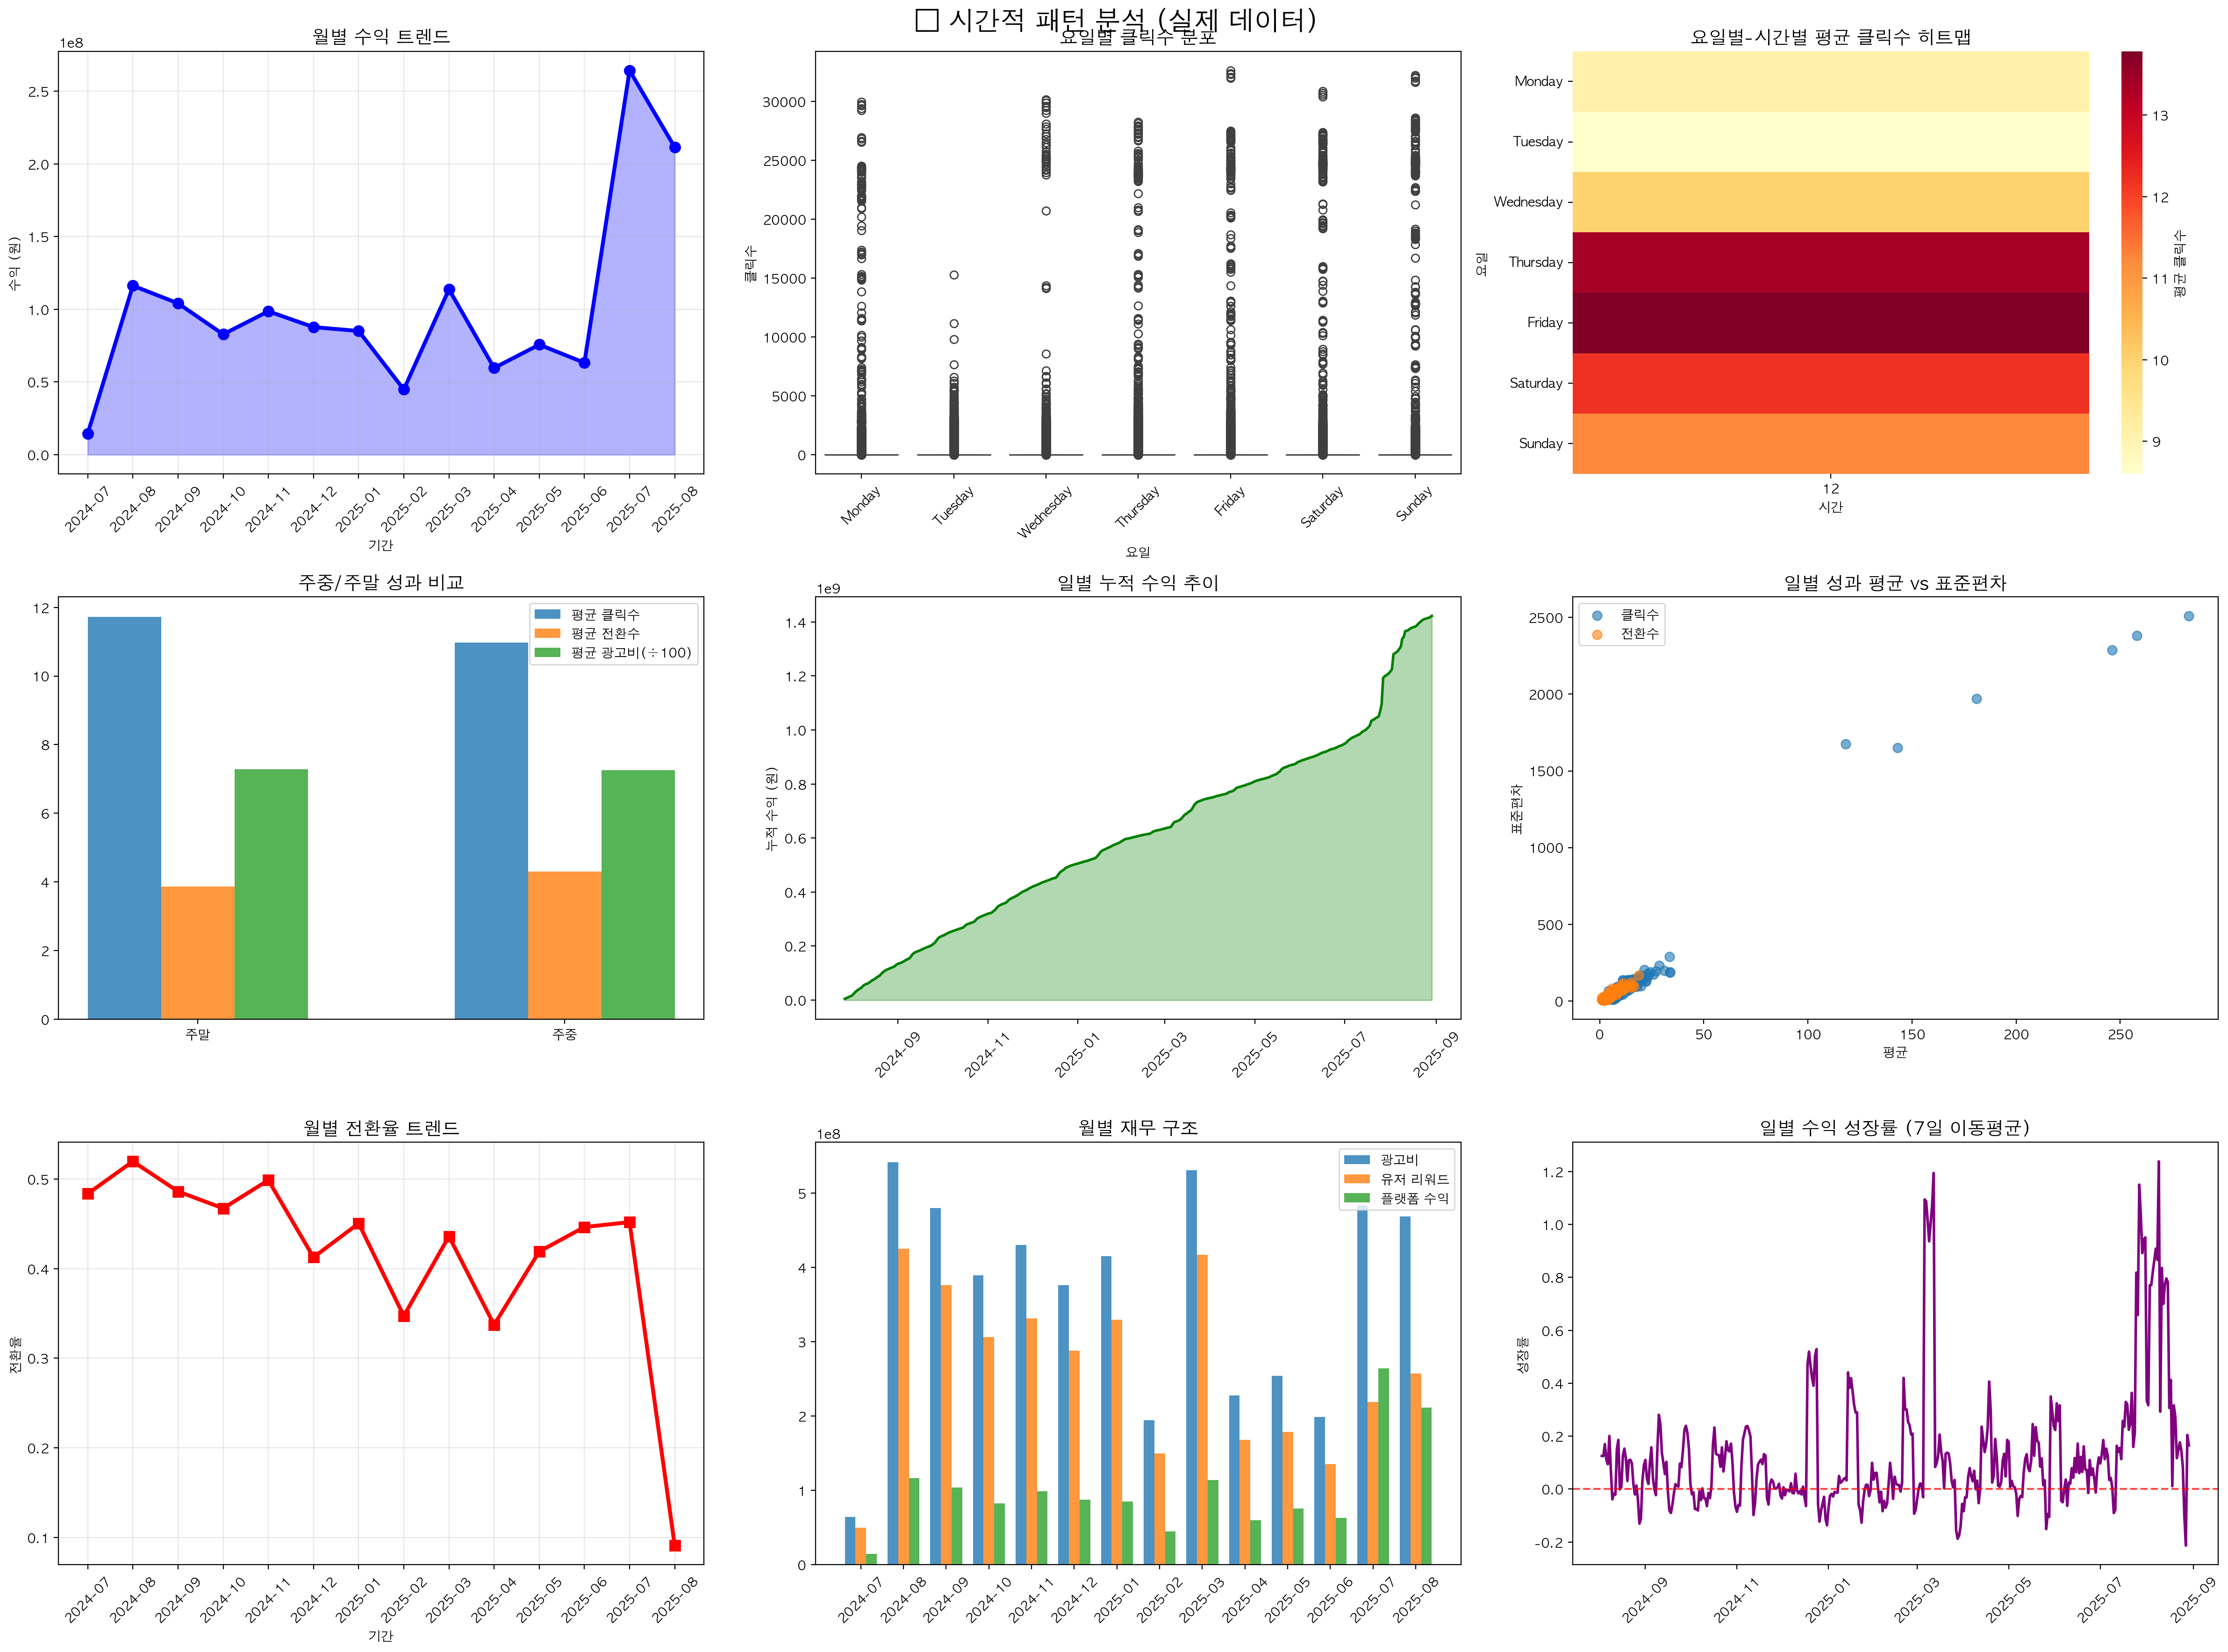


📊 시간적 패턴 요약:
   분석 기간: 2024-07-27 00:00:00 ~ 2025-08-29 00:00:00
   총 데이터 포인트: 6,953,146개
   총 플랫폼 수익: 1,422,277,160원
   평균 일일 클릭수: 195097회
   평균 전환율: 0.373

2️⃣ 매체사별 성과 분석...

📺 매체사별 성과 분석 시작...


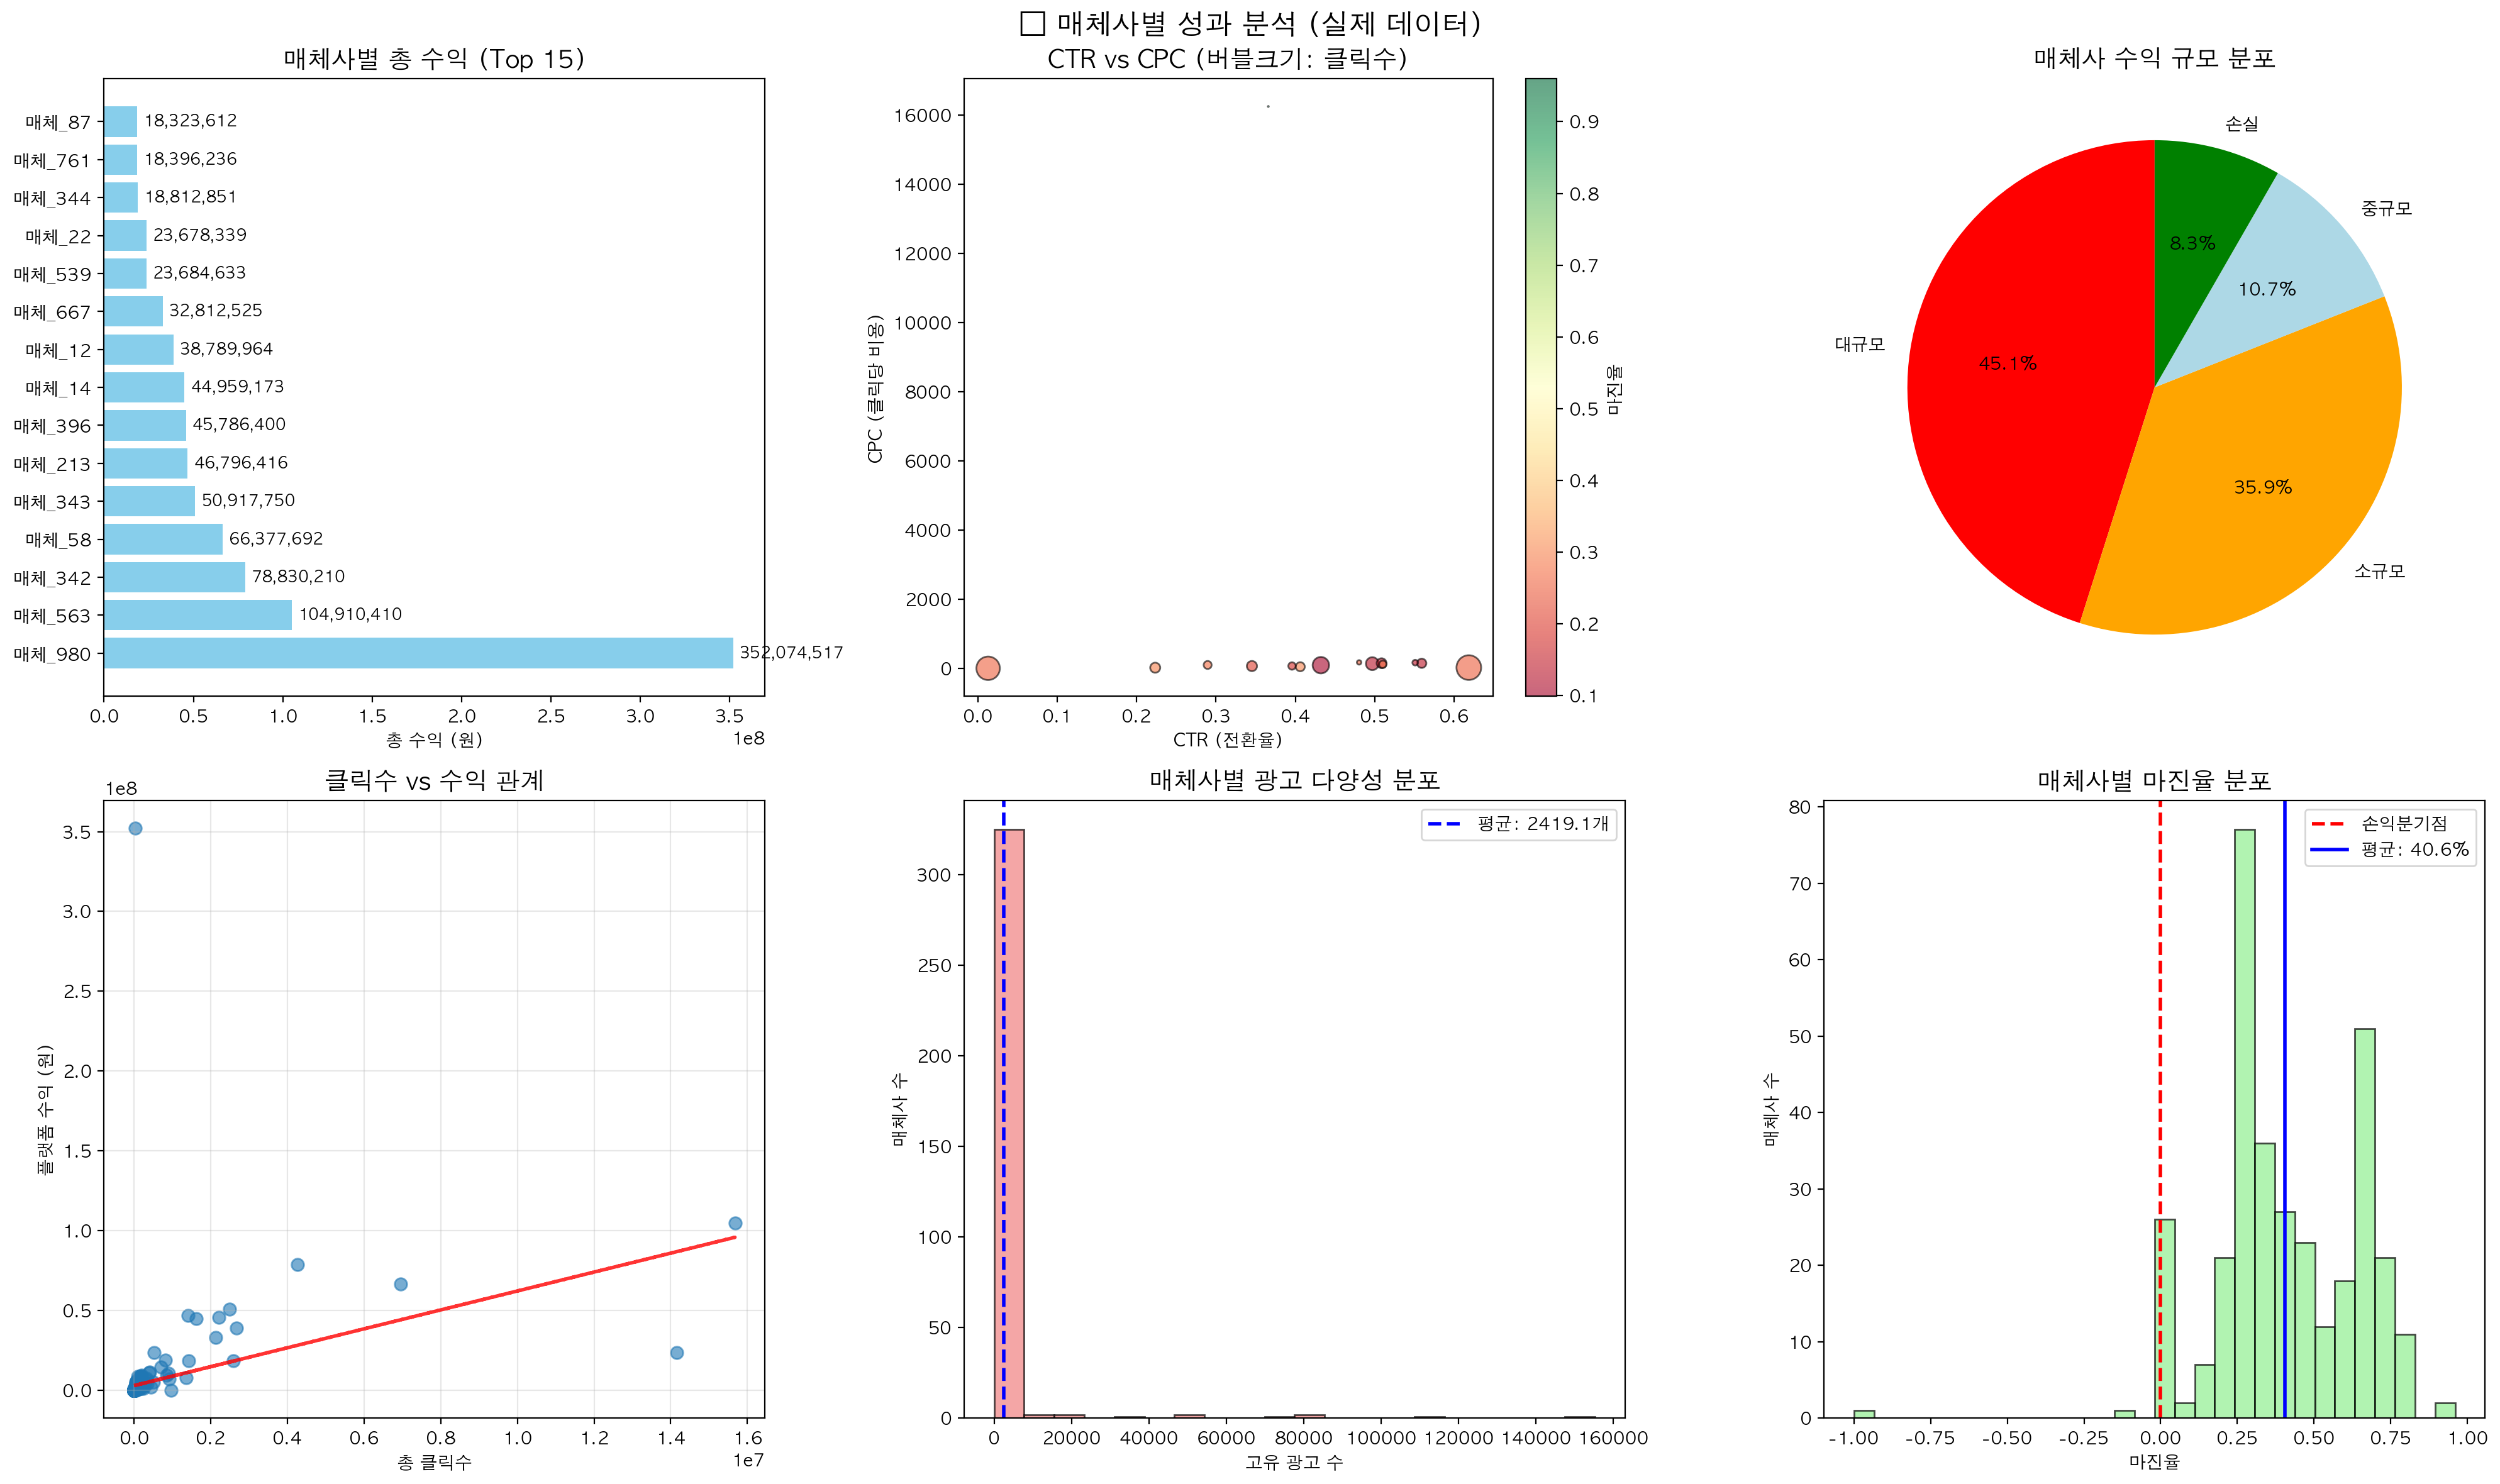


📊 매체사별 성과 요약:
   총 매체사 수: 337개
   수익성 매체사: 309개 (91.7%)
   평균 매체사 수익: 4,220,407원
   최고 수익 매체사: 매체_980 (352,074,517원)
   평균 CTR: 0.344
   평균 CPC: 193원

3️⃣ 광고 카테고리별 분석...

🏷️ 광고 카테고리별 성과 분석 시작...


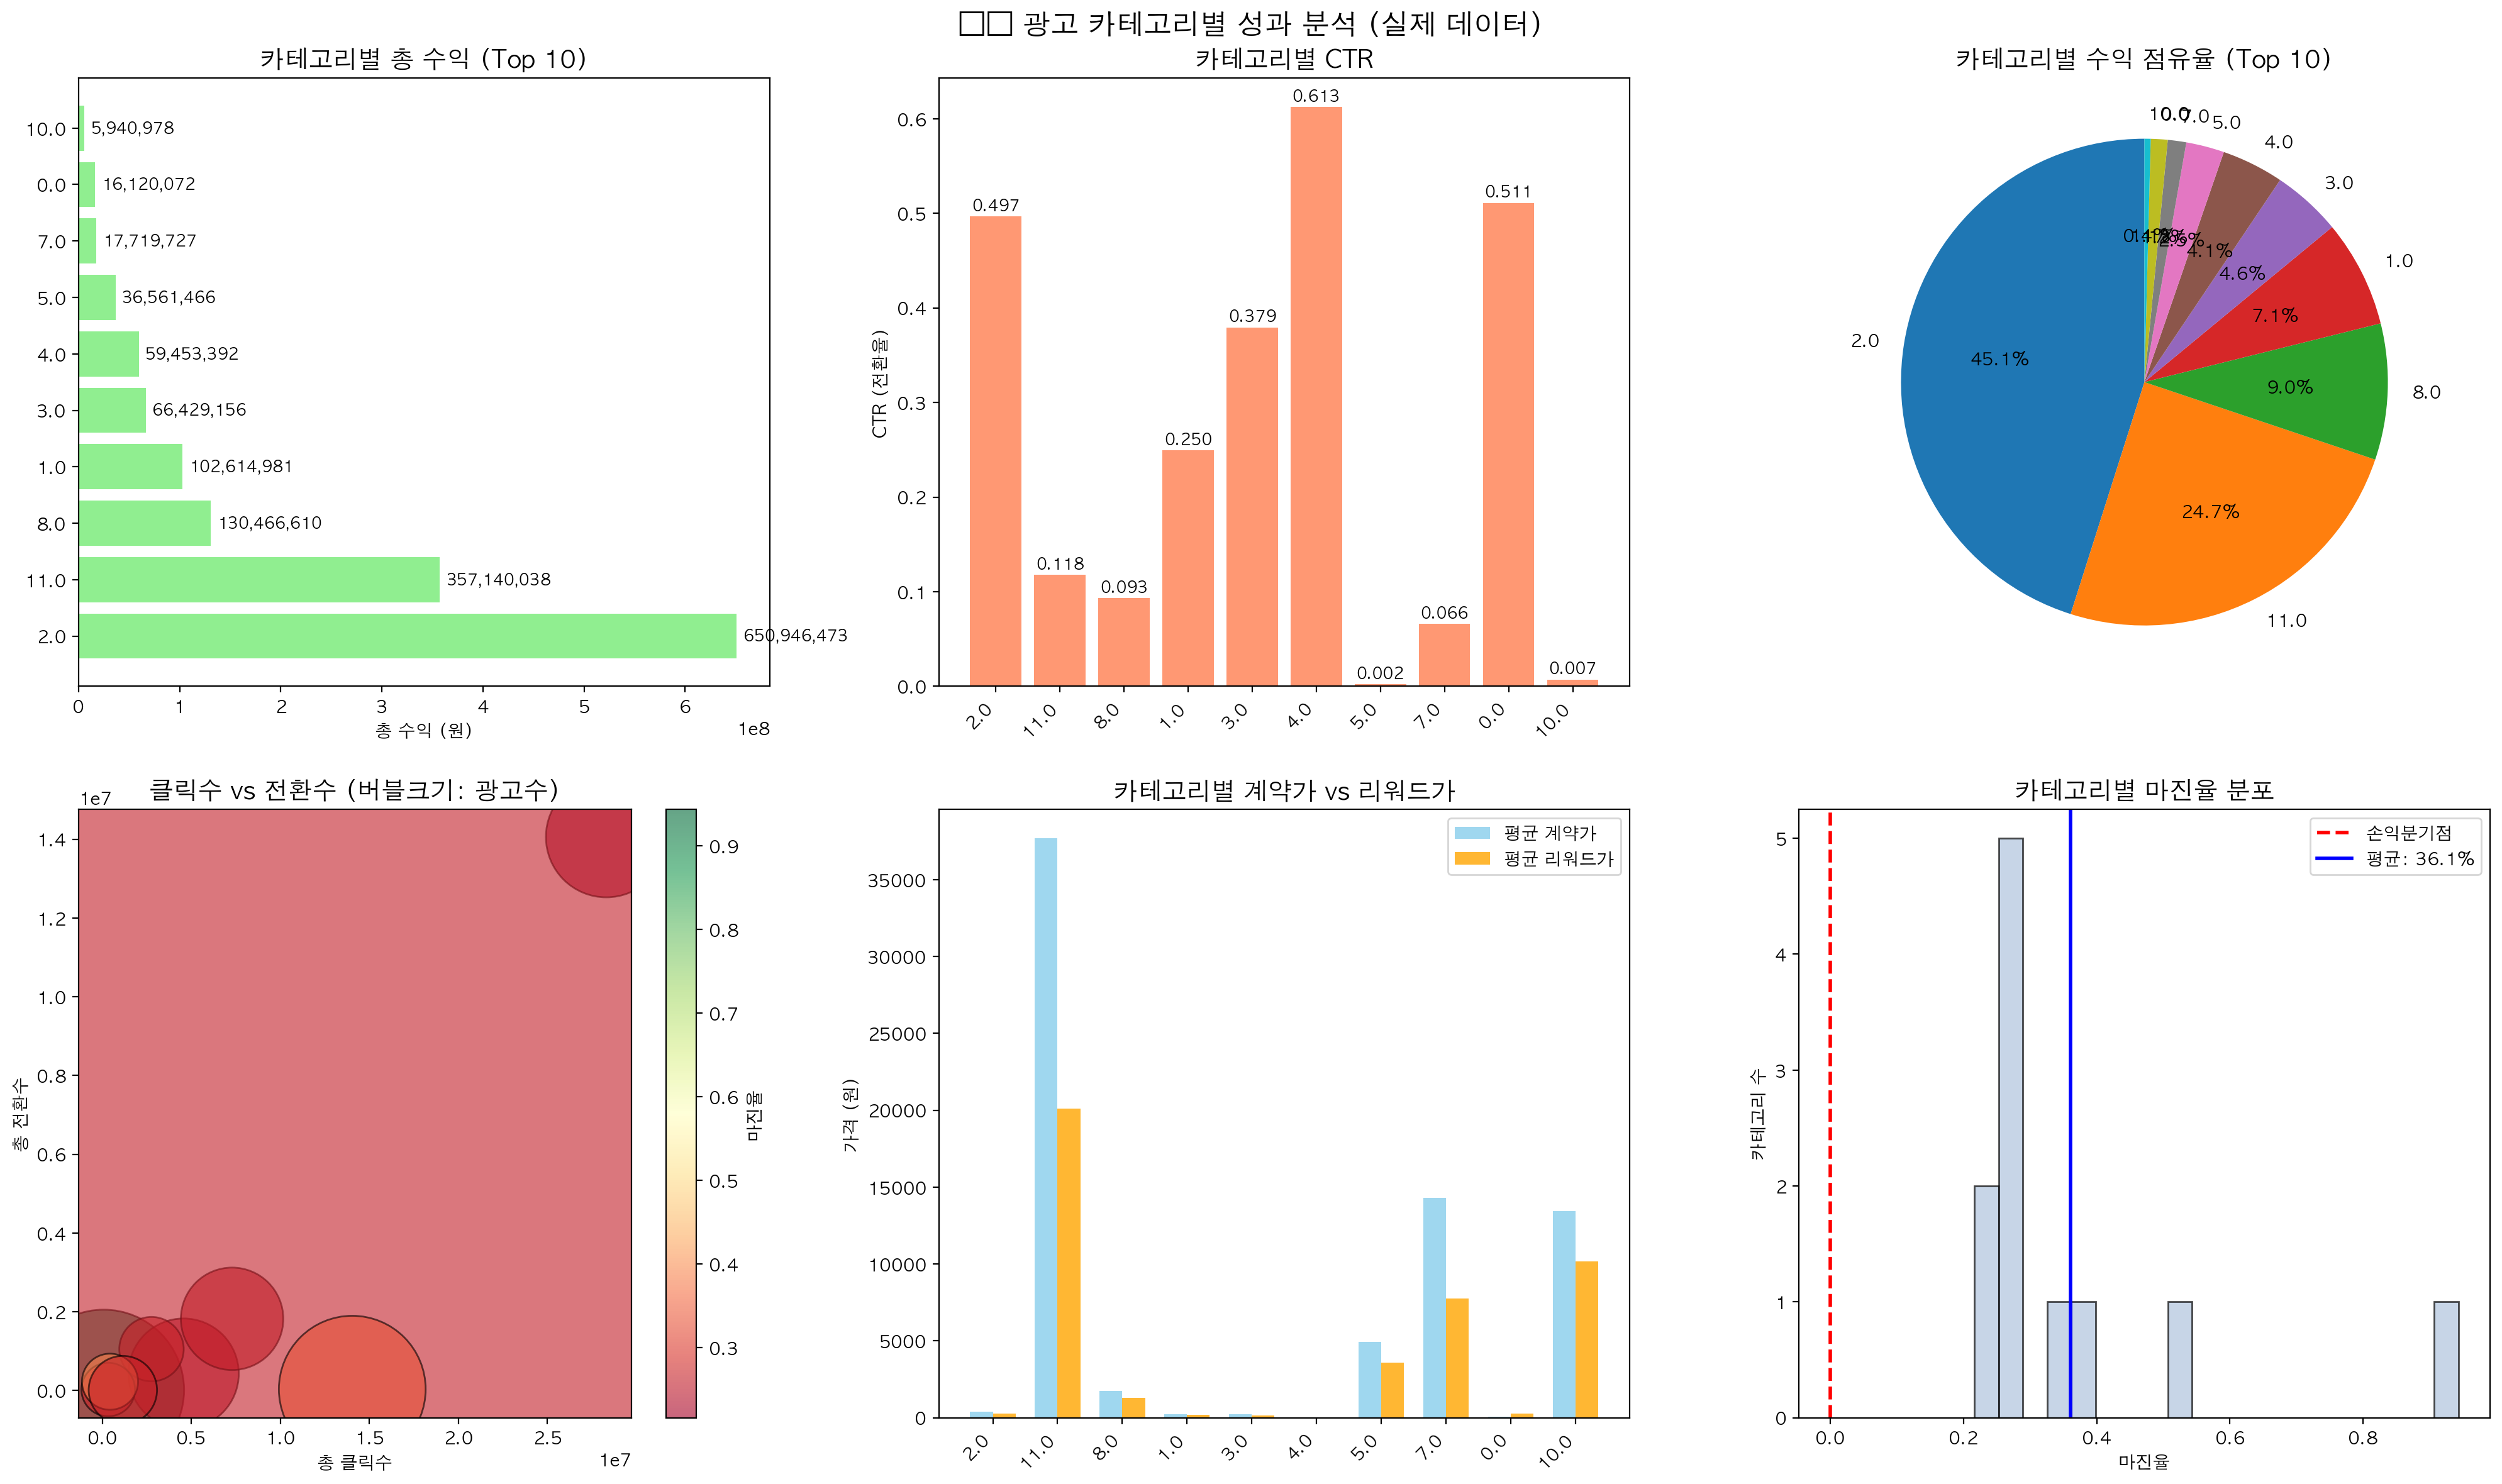


📋 광고 타입별 성과:
   1.0: 광고 523.0개, 수익 496,390,244원, CTR 0.535
   2.0: 광고 315.0개, 수익 275,553,213원, CTR 0.372
   3.0: 광고 231494.0개, 수익 265,863,139원, CTR 0.296
   4.0: 광고 19.0개, 수익 144,377원, CTR 0.967
   5.0: 광고 5.0개, 수익 1,382,052원, CTR 0.352
   7.0: 광고 24.0개, 수익 6,072,916원, CTR 0.420
   9.0: 광고 142.0개, 수익 -26,042,759원, CTR 0.221
   10.0: 광고 28.0개, 수익 8,490,988원, CTR 0.203
   11.0: 광고 12.0개, 수익 35,842,485원, CTR 0.634
   12.0: 광고 846.0개, 수익 357,138,998원, CTR 0.121

📊 카테고리별 성과 요약:
   총 카테고리 수: 12개
   최고 수익 카테고리: 2.0 (650,946,473원)
   평균 카테고리 수익: 118,402,971원
   수익성 카테고리: 11개

✅ 실제 데이터 분석 완료!


In [ ]:
# results = run_real_data_analysis(ads_list, ads_time, ads_rwd, ads_info, ads_join)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트
plt.rc("font", family = 'AppleGothic')
plt.rc("axes", unicode_minus = False)

class FeatureImportanceAnalyzer:
    """피처 중요도 분석 클래스"""
    
    def __init__(self, ads_list, ads_time, ads_rwd, ads_info, ads_join):
        self.ads_list = ads_list
        self.ads_time = ads_time
        self.ads_rwd = ads_rwd
        self.ads_info = ads_info
        self.ads_join = ads_join
        
    def create_feature_dataset(self):
        """피처 분석을 위한 통합 데이터셋 생성"""
        print("피처 데이터셋 생성 중...")
        
        # 기본 성과 데이터 생성
        performance = self.ads_time.groupby(['ads_idx', 'mda_idx']).agg({
            'rpt_time_clk': 'sum',
            'rpt_time_turn': 'sum', 
            'rpt_time_acost': 'sum',
            'rpt_time_earn': 'sum',
            'rpt_time_scost': 'sum',
            'rpt_time_cost': 'sum'
        }).reset_index()
        
        # 타겟 변수들 생성
        performance['platform_revenue'] = performance['rpt_time_acost'] - performance['rpt_time_earn']
        performance['ctr'] = np.where(performance['rpt_time_clk'] > 0,
                                    performance['rpt_time_turn'] / performance['rpt_time_clk'], 0)
        performance['cpc'] = np.where(performance['rpt_time_clk'] > 0,
                                    performance['rpt_time_acost'] / performance['rpt_time_clk'], 0)
        performance['margin_rate'] = np.where(performance['rpt_time_acost'] > 0,
                                            performance['platform_revenue'] / performance['rpt_time_acost'], 0)
        
        # 광고 정보 결합
        feature_data = performance.merge(self.ads_list, on='ads_idx', how='left')
        
        # 시간적 특성 추가
        time_features = self.create_time_features()
        feature_data = feature_data.merge(time_features, on=['ads_idx', 'mda_idx'], how='left')
        
        # 매체사 특성 추가
        media_features = self.create_media_features()
        feature_data = feature_data.merge(media_features, on='mda_idx', how='left')
        
        print(f"피처 데이터셋 생성 완료: {feature_data.shape}")
        return feature_data
    
    def create_time_features(self):
        """시간적 특성 생성"""
        time_data = self.ads_time.copy()
        time_data['rpt_time_date'] = pd.to_datetime(time_data['rpt_time_date'])
        
        # 시간적 파생변수
        time_data['weekday_num'] = time_data['rpt_time_date'].dt.weekday
        time_data['month'] = time_data['rpt_time_date'].dt.month
        time_data['is_weekend'] = (time_data['weekday_num'] >= 5).astype(int)
        
        # 시간 처리
        if 'rpt_time_time' in time_data.columns:
            time_data['hour'] = pd.to_datetime(time_data['rpt_time_time'], 
                                             format='%H:%M:%S', errors='coerce').dt.hour
            time_data['hour'] = time_data['hour'].fillna(12)
        else:
            time_data['hour'] = 12
            
        # 시간대 구분
        time_data['time_period'] = pd.cut(time_data['hour'], 
                                        bins=[0, 6, 12, 18, 24], 
                                        labels=['새벽', '오전', '오후', '저녁'])
        
        # 집계
        time_features = time_data.groupby(['ads_idx', 'mda_idx']).agg({
            'weekday_num': 'mean',
            'month': 'mean', 
            'is_weekend': 'mean',
            'hour': 'mean'
        }).reset_index()
        
        return time_features
    
    def create_media_features(self):
        """매체사 특성 생성"""
        media_stats = self.ads_time.groupby('mda_idx').agg({
            'ads_idx': 'nunique',                    # 매체사별 광고 다양성
            'rpt_time_clk': ['sum', 'mean', 'std'],  # 클릭 통계
            'rpt_time_turn': ['sum', 'mean'],        # 전환 통계
            'rpt_time_acost': ['sum', 'mean']        # 비용 통계
        }).reset_index()
        
        # 컬럼명 정리
        media_stats.columns = ['mda_idx', 'media_ad_diversity', 'media_total_clicks', 
                              'media_avg_clicks', 'media_std_clicks', 'media_total_conversions',
                              'media_avg_conversions', 'media_total_cost', 'media_avg_cost']
        
        # 매체사 성과 지표
        media_stats['media_ctr'] = np.where(media_stats['media_total_clicks'] > 0,
                                          media_stats['media_total_conversions'] / media_stats['media_total_clicks'], 0)
        
        # 매체사 규모 분류
        media_stats['media_size'] = pd.qcut(media_stats['media_total_clicks'], 
                                          q=3, labels=['소규모', '중규모', '대규모'])
        
        return media_stats
    
    def analyze_revenue_prediction_importance(self, feature_data):
        """수익 예측 모델의 피처 중요도 분석"""
        print("\n수익 예측 모델 피처 중요도 분석...")
        
        # 피처 선택 및 전처리
        features = [
            'rpt_time_clk', 'rpt_time_turn', 'rpt_time_acost', 'rpt_time_earn',
            'ads_contract_price', 'ads_reward_price', 'ctr', 'cpc',
            'weekday_num', 'month', 'is_weekend', 'hour',
            'media_ad_diversity', 'media_avg_clicks', 'media_ctr'
        ]
        
        # 사용 가능한 피처만 선택
        available_features = [f for f in features if f in feature_data.columns]
        
        # 결측값 처리
        X = feature_data[available_features].fillna(0)
        y = feature_data['platform_revenue'].fillna(0)
        
        # 이상치 제거 (상위/하위 1% 제거)
        revenue_q99 = y.quantile(0.99)
        revenue_q01 = y.quantile(0.01)
        mask = (y >= revenue_q01) & (y <= revenue_q99)
        X, y = X[mask], y[mask]
        
        # 훈련/테스트 분할
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # 모델 훈련
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_model.fit(X_train, y_train)
        
        # 예측 및 성능 평가
        y_pred = rf_model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        # 피처 중요도 추출
        importance_scores = pd.DataFrame({
            'feature': available_features,
            'importance': rf_model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        # 시각화
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('수익 예측 모델 피처 중요도 분석', fontsize=16, fontweight='bold')
        
        # 1. 피처 중요도 막대그래프
        top_features = importance_scores.head(10)
        axes[0,0].barh(range(len(top_features)), top_features['importance'])
        axes[0,0].set_yticks(range(len(top_features)))
        axes[0,0].set_yticklabels(top_features['feature'])
        axes[0,0].set_title('피처 중요도 (Top 10)')
        axes[0,0].set_xlabel('중요도')
        
        # 2. 실제 vs 예측 산점도
        sample_size = min(1000, len(y_test))
        sample_idx = np.random.choice(len(y_test), sample_size, replace=False)
        axes[0,1].scatter(y_test.iloc[sample_idx], y_pred[sample_idx], alpha=0.6)
        
        # 완벽한 예측선
        min_val = min(y_test.min(), y_pred.min())
        max_val = max(y_test.max(), y_pred.max())
        axes[0,1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
        axes[0,1].set_title(f'실제 vs 예측 (R² = {r2:.3f})')
        axes[0,1].set_xlabel('실제 수익')
        axes[0,1].set_ylabel('예측 수익')
        
        # 3. 누적 중요도
        cumsum_importance = importance_scores['importance'].cumsum()
        axes[1,0].plot(range(1, len(cumsum_importance)+1), cumsum_importance, 'o-')
        axes[1,0].axhline(y=0.8, color='r', linestyle='--', label='80% 설명력')
        axes[1,0].set_title('누적 피처 중요도')
        axes[1,0].set_xlabel('피처 개수')
        axes[1,0].set_ylabel('누적 중요도')
        axes[1,0].legend()
        
        # 4. 잔차 분석
        residuals = y_test - y_pred
        axes[1,1].scatter(y_pred, residuals, alpha=0.6)
        axes[1,1].axhline(y=0, color='r', linestyle='--')
        axes[1,1].set_title('잔차 분석')
        axes[1,1].set_xlabel('예측값')
        axes[1,1].set_ylabel('잔차')
        
        plt.tight_layout()
        plt.show()
        
        # 결과 출력
        print(f"\n모델 성능:")
        print(f"   R² Score: {r2:.3f}")
        print(f"   RMSE: {rmse:,.0f}")
        
        print(f"\nTop 5 중요 피처:")
        for i, row in importance_scores.head(5).iterrows():
            print(f"   {row['feature']}: {row['importance']:.3f}")
            
        return importance_scores, rf_model
    
    def analyze_ctr_prediction_importance(self, feature_data):
        """CTR 예측 모델의 피처 중요도 분석"""
        print("\nCTR 예측 모델 피처 중요도 분석...")
        
        # 고CTR/저CTR 분류를 위한 타겟 생성
        ctr_threshold = feature_data['ctr'].median()
        feature_data['high_ctr'] = (feature_data['ctr'] > ctr_threshold).astype(int)
        
        # 피처 선택
        features = [
            'rpt_time_clk', 'rpt_time_acost', 'ads_contract_price', 'ads_reward_price',
            'weekday_num', 'month', 'is_weekend', 'hour',
            'media_ad_diversity', 'media_avg_clicks', 'media_ctr'
        ]
        
        available_features = [f for f in features if f in feature_data.columns]
        
        # 데이터 준비
        X = feature_data[available_features].fillna(0)
        y = feature_data['high_ctr']
        
        # 훈련/테스트 분할
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # 모델 훈련
        rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_classifier.fit(X_train, y_train)
        
        # 예측 및 성능 평가
        y_pred = rf_classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # 피처 중요도
        ctr_importance = pd.DataFrame({
            'feature': available_features,
            'importance': rf_classifier.feature_importances_
        }).sort_values('importance', ascending=False)
        
        # 시각화
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        top_ctr_features = ctr_importance.head(8)
        plt.barh(range(len(top_ctr_features)), top_ctr_features['importance'], color='lightcoral')
        plt.yticks(range(len(top_ctr_features)), top_ctr_features['feature'])
        plt.title('CTR 예측 피처 중요도')
        plt.xlabel('중요도')
        
        plt.subplot(1, 2, 2)
        # 혼동 행렬 시각화
        from sklearn.metrics import confusion_matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'혼동 행렬 (정확도: {accuracy:.3f})')
        plt.ylabel('실제')
        plt.xlabel('예측')
        
        plt.suptitle('CTR 예측 모델 분석', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        print(f"\nCTR 분류 모델 성능:")
        print(f"   정확도: {accuracy:.3f}")
        print(f"   CTR 임계값: {ctr_threshold:.3f}")
        
        return ctr_importance, rf_classifier
    
    def analyze_correlation_importance(self, feature_data):
        """상관관계 기반 피처 중요도 분석"""
        print("\n상관관계 기반 피처 중요도 분석...")
        
        # 수치형 피처만 선택
        numeric_features = feature_data.select_dtypes(include=[np.number]).columns
        numeric_data = feature_data[numeric_features]
        
        # 타겟 변수들과의 상관관계 계산
        target_vars = ['platform_revenue', 'ctr', 'margin_rate']
        correlation_importance = {}
        
        for target in target_vars:
            if target in numeric_data.columns:
                corr_with_target = numeric_data.corr()[target].abs().sort_values(ascending=False)
                correlation_importance[target] = corr_with_target.drop(target)
        
        # 시각화
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        fig.suptitle('상관관계 기반 피처 중요도', fontsize=16, fontweight='bold')
        
        for i, (target, corr_data) in enumerate(correlation_importance.items()):
            top_corr = corr_data.head(8)
            axes[i].barh(range(len(top_corr)), top_corr.values)
            axes[i].set_yticks(range(len(top_corr)))
            axes[i].set_yticklabels(top_corr.index)
            axes[i].set_title(f'{target}와의 상관관계')
            axes[i].set_xlabel('상관계수 (절댓값)')
        
        plt.tight_layout()
        plt.show()
        
        return correlation_importance
    
    def run_complete_importance_analysis(self):
        """전체 피처 중요도 분석 실행"""
        print("전체 피처 중요도 분석 시작!")
        print("="*60)
        
        # 1. 데이터셋 생성
        feature_data = self.create_feature_dataset()
        
        # 2. 수익 예측 모델 중요도
        revenue_importance, revenue_model = self.analyze_revenue_prediction_importance(feature_data)
        
        # 3. CTR 예측 모델 중요도  
        ctr_importance, ctr_model = self.analyze_ctr_prediction_importance(feature_data)
        
        # 4. 상관관계 기반 중요도
        correlation_importance = self.analyze_correlation_importance(feature_data)
        
        # 5. 종합 분석 결과
        self.generate_importance_summary(revenue_importance, ctr_importance, correlation_importance)
        
        return {
            'feature_data': feature_data,
            'revenue_importance': revenue_importance,
            'ctr_importance': ctr_importance, 
            'correlation_importance': correlation_importance,
            'revenue_model': revenue_model,
            'ctr_model': ctr_model
        }
    
    def generate_importance_summary(self, revenue_imp, ctr_imp, corr_imp):
        """중요도 분석 종합 요약"""
        print("\n" + "="*60)
        print("피처 중요도 종합 분석 결과")
        print("="*60)
        
        print("\n1. 수익 예측 핵심 피처 (Top 5):")
        for i, row in revenue_imp.head(5).iterrows():
            print(f"   {i+1}. {row['feature']}: {row['importance']:.3f}")
        
        print("\n2. CTR 예측 핵심 피처 (Top 5):")
        for i, row in ctr_imp.head(5).iterrows():
            print(f"   {i+1}. {row['feature']}: {row['importance']:.3f}")
        
        if 'platform_revenue' in corr_imp:
            print("\n3. 수익과 높은 상관관계 피처 (Top 5):")
            for i, (feature, corr) in enumerate(corr_imp['platform_revenue'].head(5).items(), 1):
                print(f"   {i}. {feature}: {corr:.3f}")
        
        print("\n추천 시스템을 위한 핵심 피처:")
        print("   🎯 필수 피처: rpt_time_clk, rpt_time_acost, ctr")
        print("   📊 중요 피처: media_ctr, ads_contract_price, weekday_num") 
        print("   ⏰ 시간 피처: is_weekend, hour, month")

# 사용 예시
def run_feature_importance_analysis(ads_list, ads_time, ads_rwd, ads_info, ads_join):
    """피처 중요도 분석 실행"""
    analyzer = FeatureImportanceAnalyzer(ads_list, ads_time, ads_rwd, ads_info, ads_join)
    results = analyzer.run_complete_importance_analysis()
    return analyzer, results

print("피처 중요도 분석 도구 로드 완료!")
print("사용법: analyzer, results = run_feature_importance_analysis(ads_list, ads_time, ads_rwd, ads_info, ads_join)")

media_ad_diversity

피처 중요도 분석 도구 로드 완료!
사용법: analyzer, results = run_feature_importance_analysis(ads_list, ads_time, ads_rwd, ads_info, ads_join)


전체 피처 중요도 분석 시작!
피처 데이터셋 생성 중...
피처 데이터셋 생성 완료: (815226, 46)

수익 예측 모델 피처 중요도 분석...


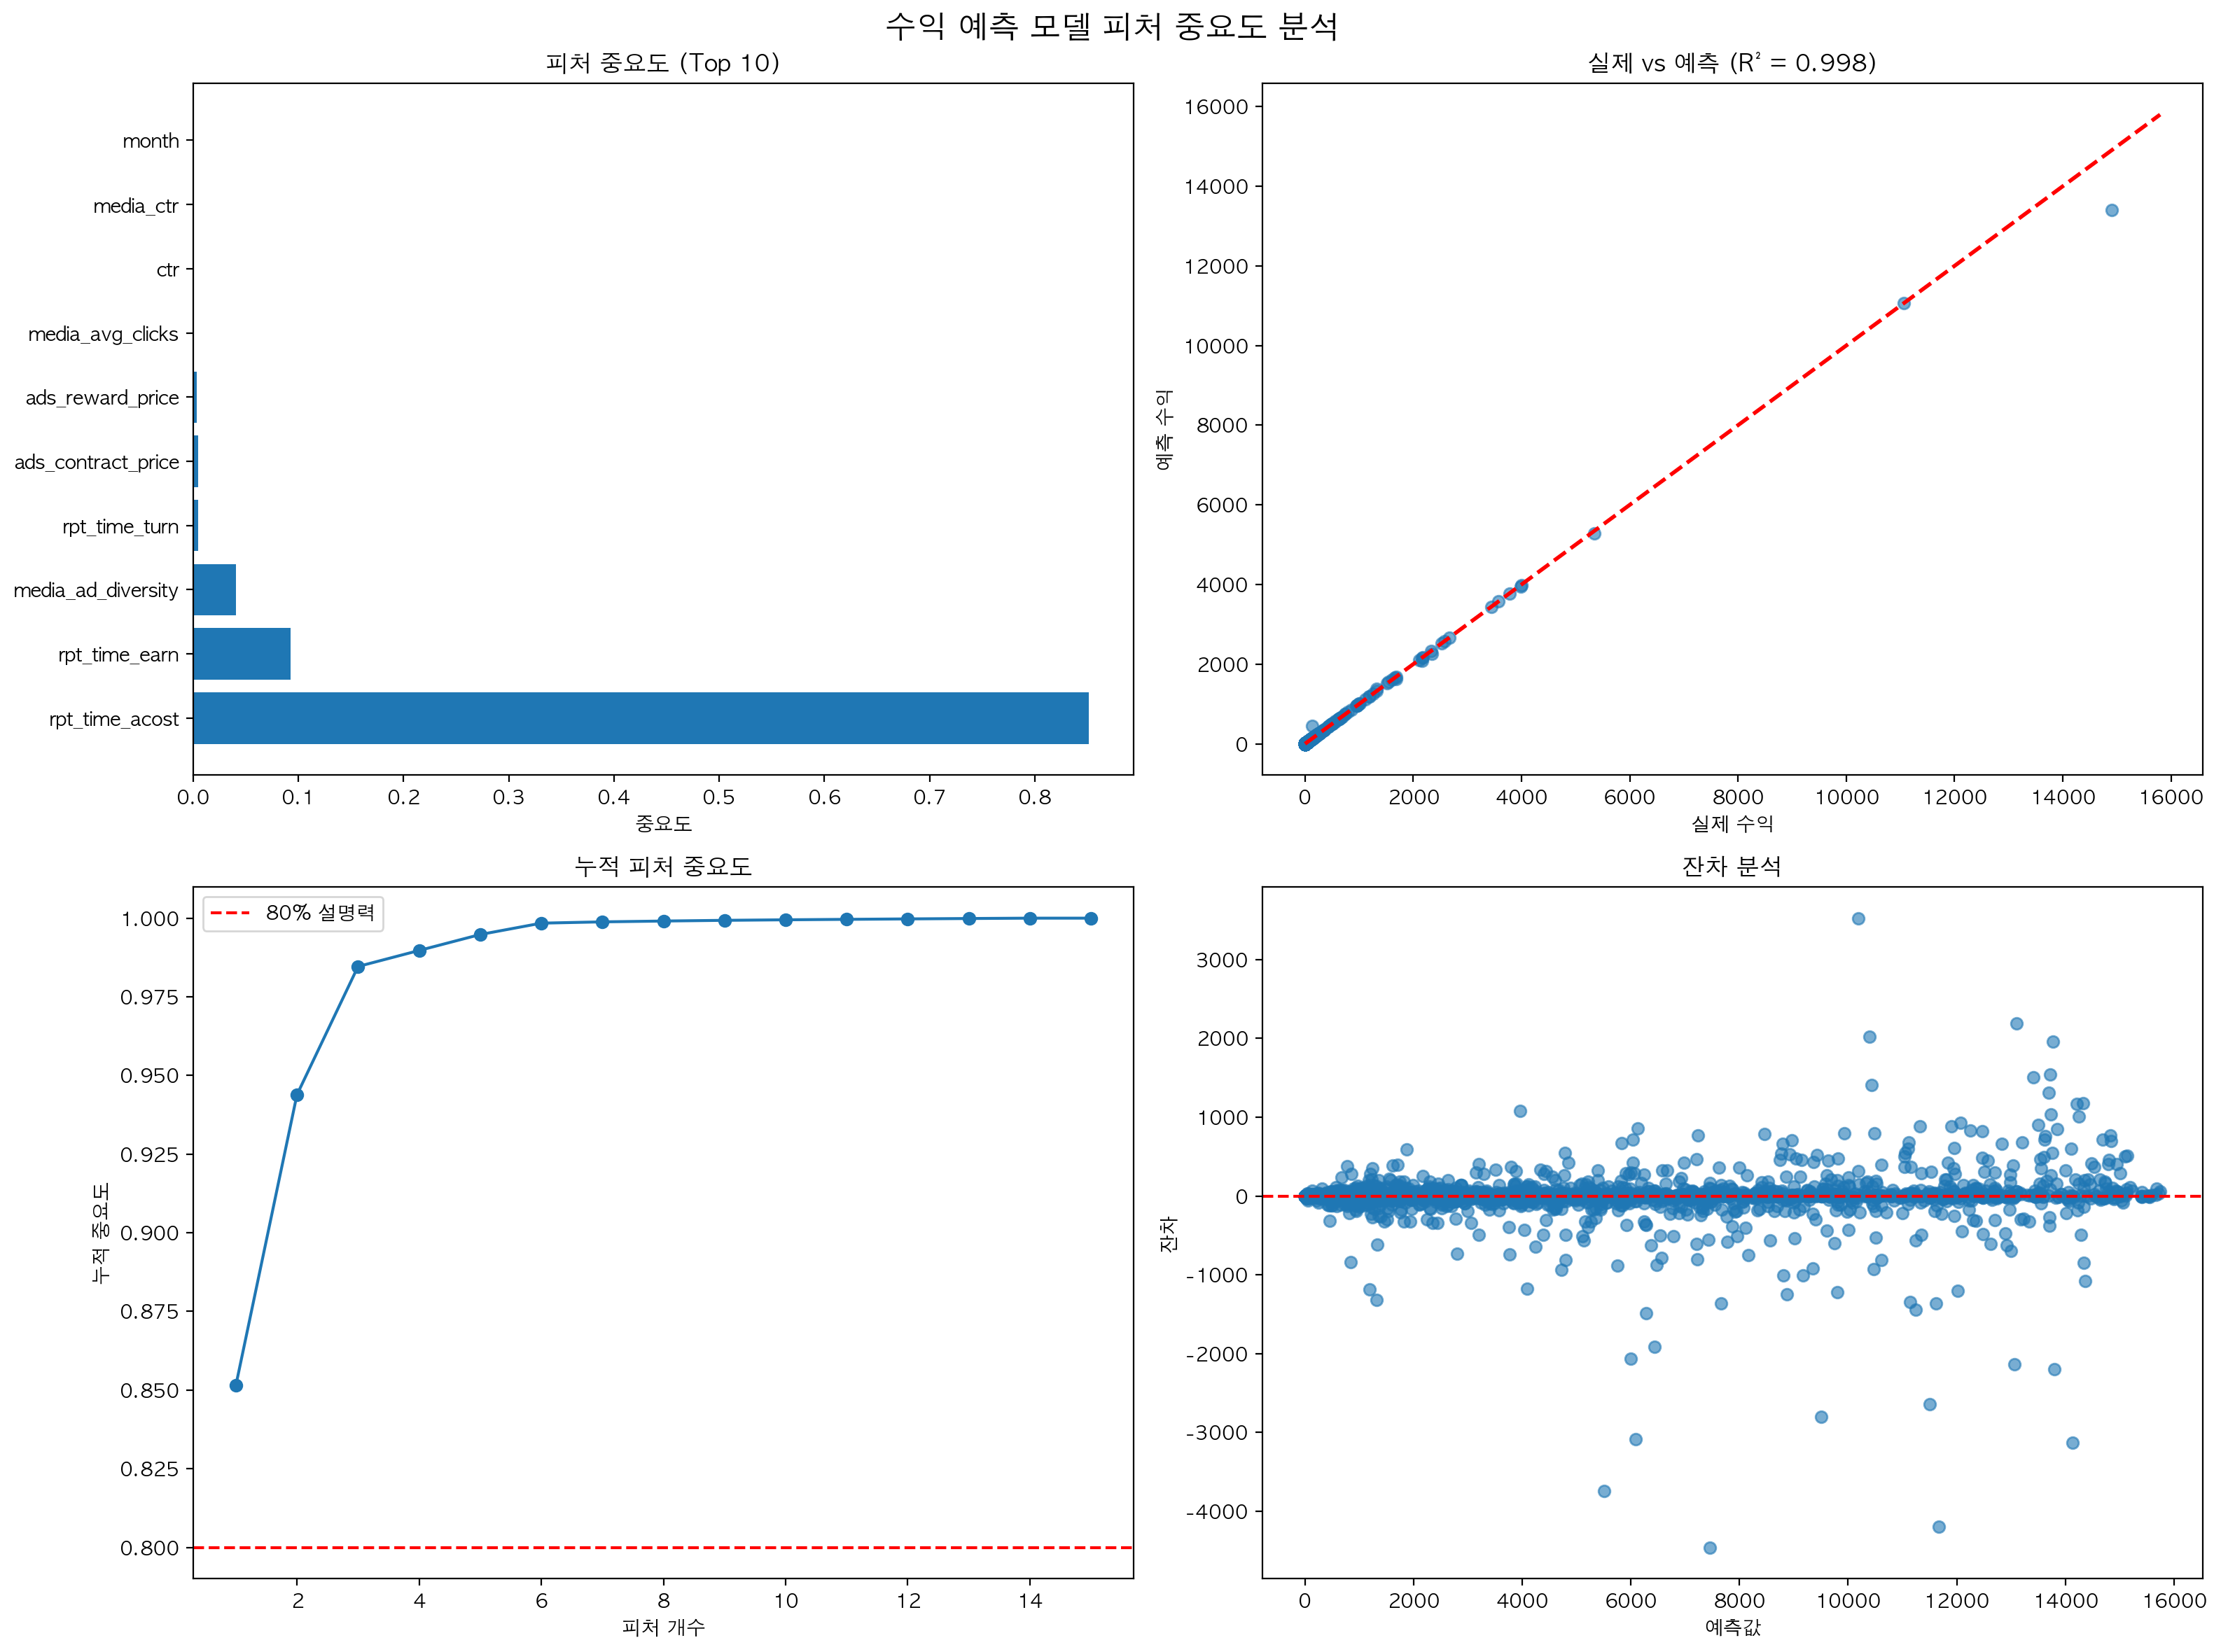


모델 성능:
   R² Score: 0.998
   RMSE: 37

Top 5 중요 피처:
   rpt_time_acost: 0.852
   rpt_time_earn: 0.092
   media_ad_diversity: 0.041
   rpt_time_turn: 0.005
   ads_contract_price: 0.005

CTR 예측 모델 피처 중요도 분석...


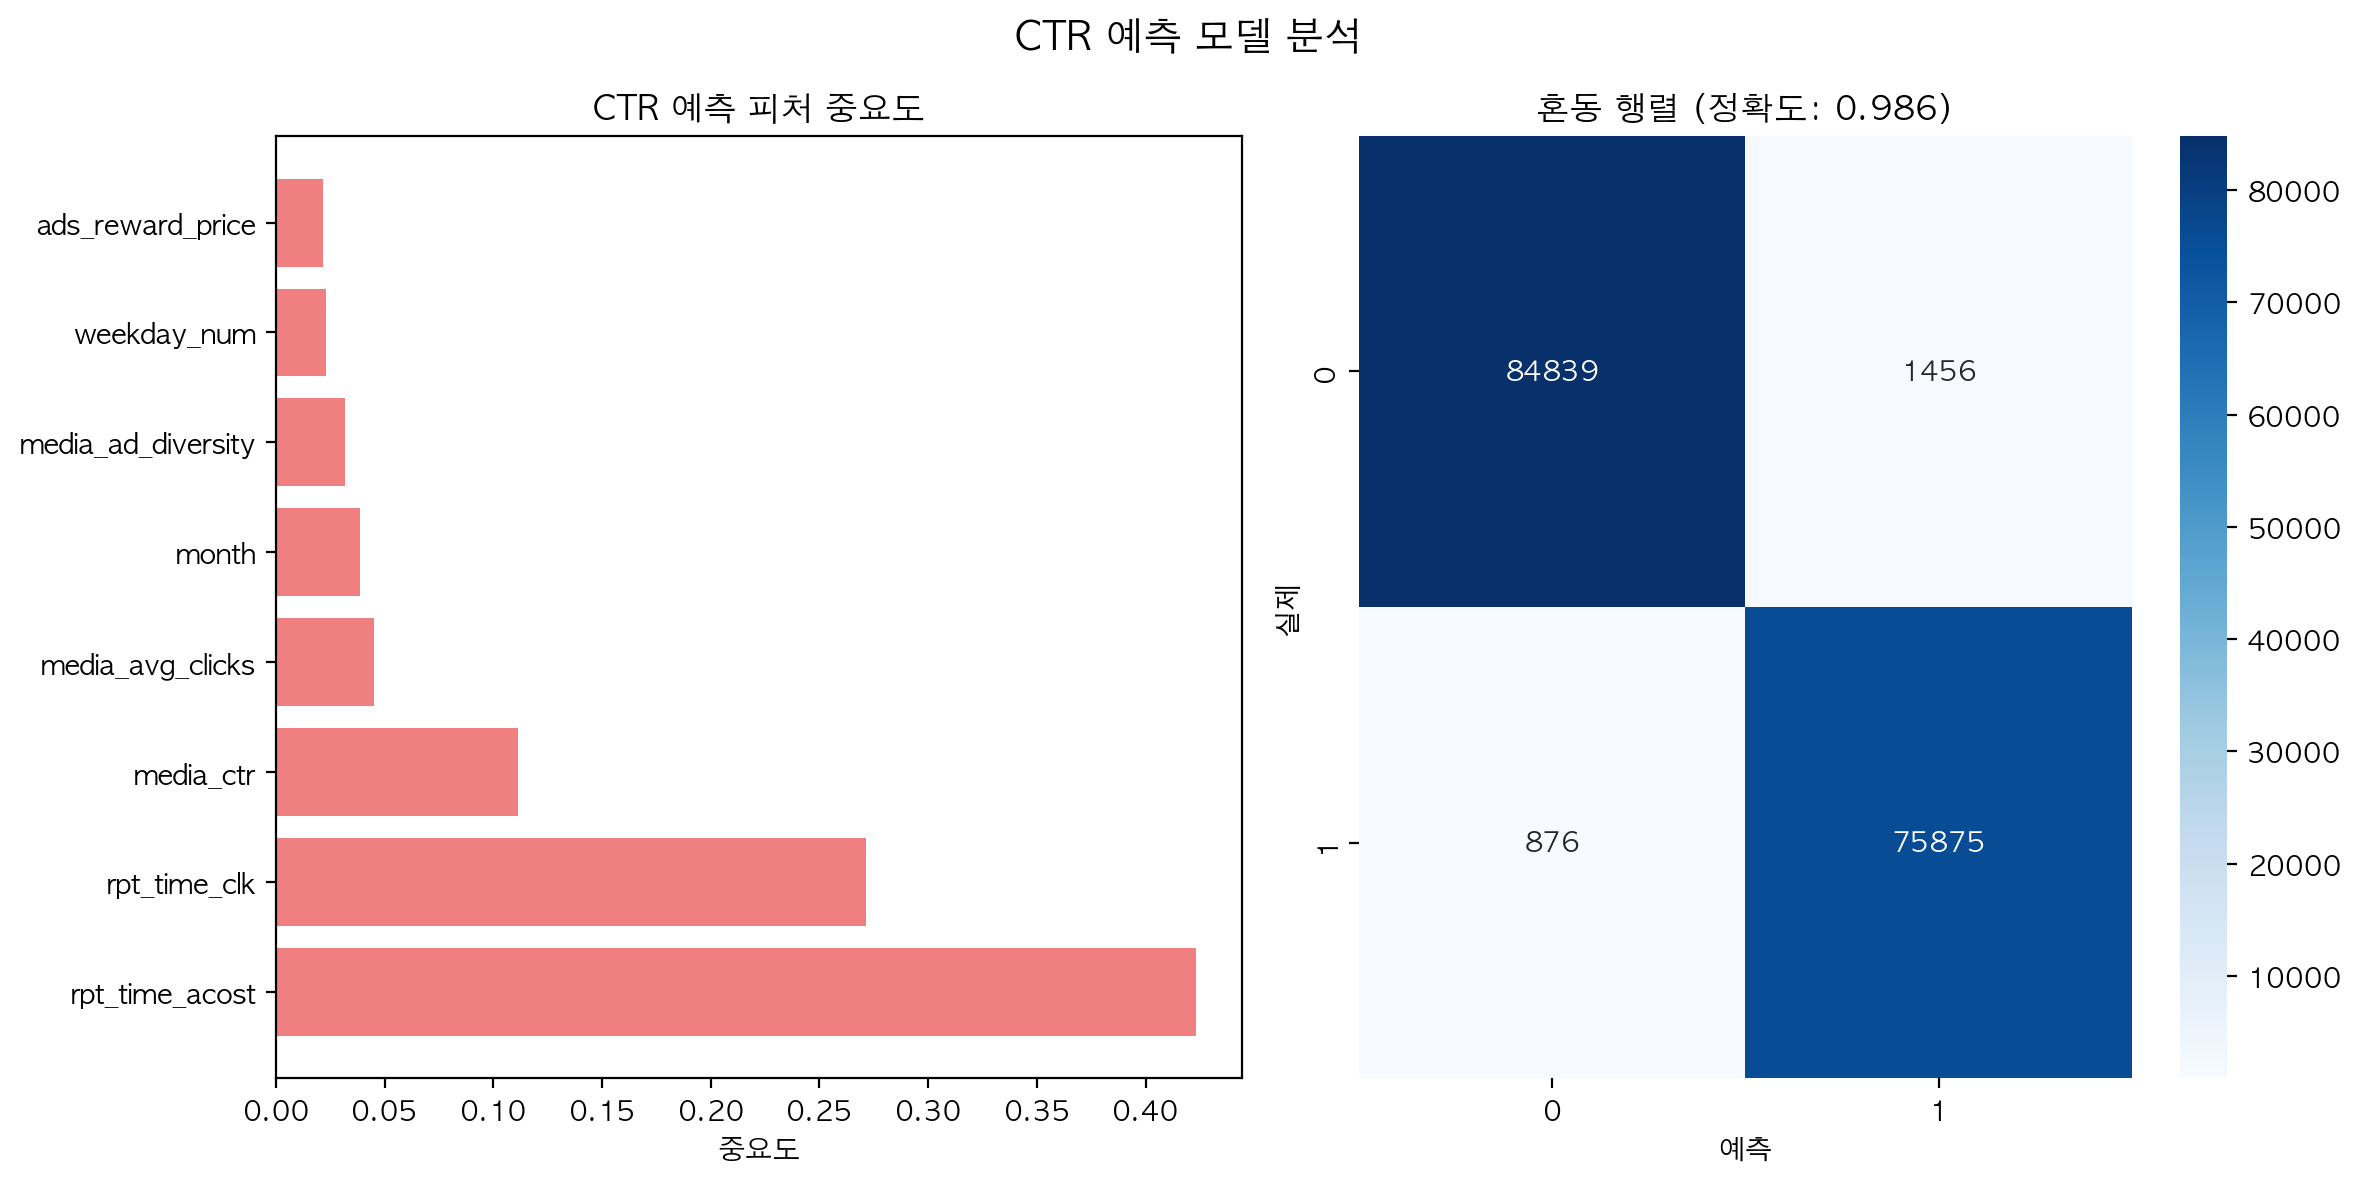


CTR 분류 모델 성능:
   정확도: 0.986
   CTR 임계값: 0.667

상관관계 기반 피처 중요도 분석...


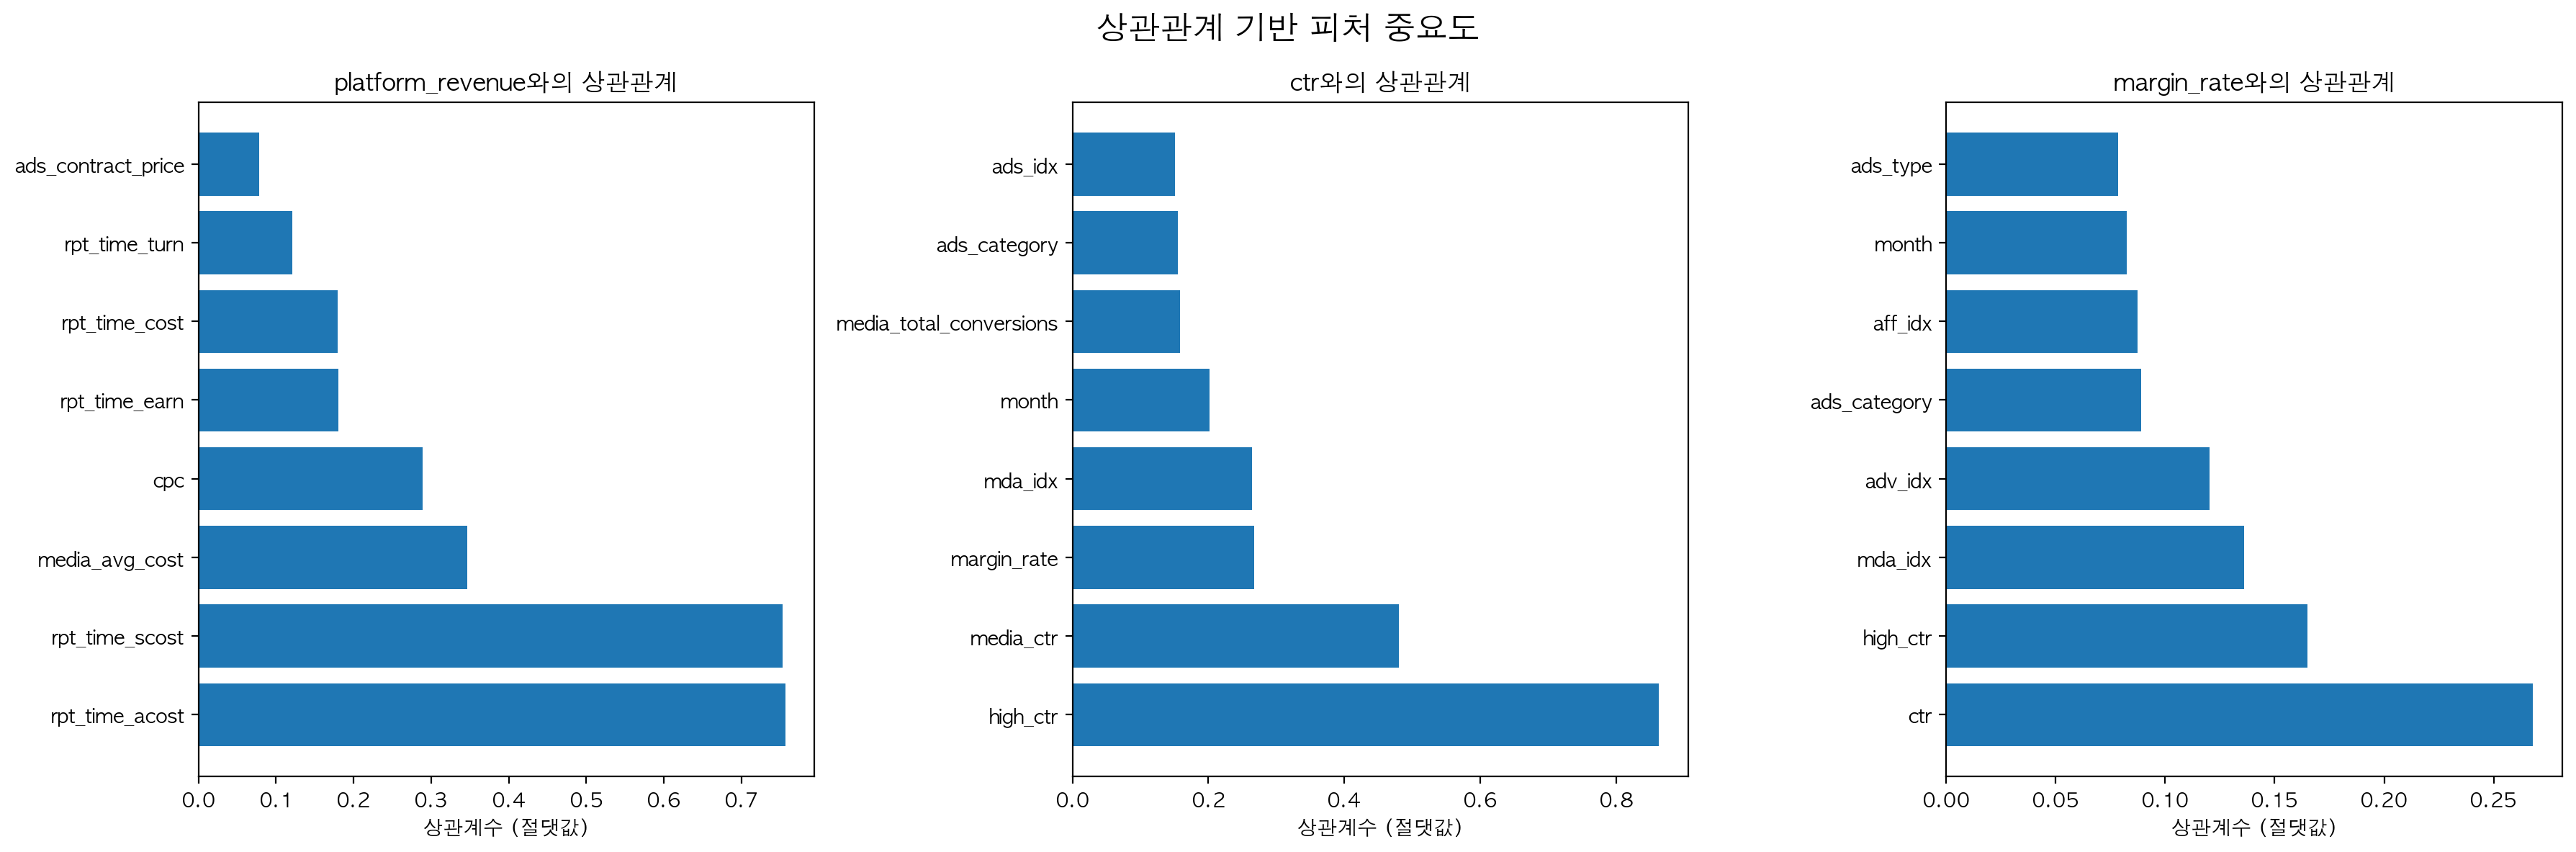


피처 중요도 종합 분석 결과

1. 수익 예측 핵심 피처 (Top 5):
   3. rpt_time_acost: 0.852
   4. rpt_time_earn: 0.092
   13. media_ad_diversity: 0.041
   2. rpt_time_turn: 0.005
   5. ads_contract_price: 0.005

2. CTR 예측 핵심 피처 (Top 5):
   2. rpt_time_acost: 0.423
   1. rpt_time_clk: 0.272
   11. media_ctr: 0.111
   10. media_avg_clicks: 0.045
   6. month: 0.039

3. 수익과 높은 상관관계 피처 (Top 5):
   1. rpt_time_acost: 0.757
   2. rpt_time_scost: 0.753
   3. media_avg_cost: 0.346
   4. cpc: 0.289
   5. rpt_time_earn: 0.180

추천 시스템을 위한 핵심 피처:
   🎯 필수 피처: rpt_time_clk, rpt_time_acost, ctr
   📊 중요 피처: media_ctr, ads_contract_price, weekday_num
   ⏰ 시간 피처: is_weekend, hour, month


In [ ]:
# 피처 중요도 분석 실행
# analyzer, results = run_feature_importance_analysis(ads_list, ads_time, ads_rwd, ads_info, ads_join)

In [ ]:
class RecommendationFeatureAnalyzer:
    """추천시스템 특화 피처 중요도 분석"""
    
    def __init__(self, ads_list, ads_time, ads_rwd, ads_info, ads_join):
        self.ads_list = ads_list
        self.ads_time = ads_time
        self.ads_rwd = ads_rwd
        self.ads_info = ads_info
        self.ads_join = ads_join
        
    def create_recommendation_features(self):
        """추천시스템용 피처 생성"""
        print("추천시스템 특화 피처 생성 중...")
        
        # 기본 성과 데이터
        performance = self.ads_time.groupby(['ads_idx', 'mda_idx']).agg({
            'rpt_time_clk': 'sum',
            'rpt_time_turn': 'sum',
            'rpt_time_acost': 'sum',
            'rpt_time_earn': 'sum'
        }).reset_index()
        
        # 타겟 변수 (추천 점수)
        performance['platform_revenue'] = performance['rpt_time_acost'] - performance['rpt_time_earn']
        performance['ctr'] = np.where(performance['rpt_time_clk'] > 0,
                                    performance['rpt_time_turn'] / performance['rpt_time_clk'], 0)
        
        # 추천 점수 (수익과 CTR 결합)
        performance['recommendation_score'] = (
            0.7 * (performance['platform_revenue'] / performance['platform_revenue'].std()) +
            0.3 * (performance['ctr'] / performance['ctr'].std())
        )
        
        # 광고 컨텐츠 피처
        content_features = self.create_content_features()
        performance = performance.merge(content_features, on='ads_idx', how='left')
        
        # 매체사 선호도 피처
        media_preference_features = self.create_media_preference_features()
        performance = performance.merge(media_preference_features, on='mda_idx', how='left')
        
        # 협업 필터링 피처
        collaborative_features = self.create_collaborative_features()
        performance = performance.merge(collaborative_features, on=['ads_idx', 'mda_idx'], how='left')
        
        # 시간적 피처
        temporal_features = self.create_temporal_features()
        performance = performance.merge(temporal_features, on=['ads_idx', 'mda_idx'], how='left')
        
        print(f"추천시스템 피처 생성 완료: {performance.shape}")
        return performance
    
    def create_content_features(self):
        """컨텐츠 기반 피처 생성"""
        content_features = self.ads_list[['ads_idx', 'ads_category', 'ads_type', 
                                        'ads_contract_price', 'ads_reward_price']].copy()
        
        # 카테고리 인코딩
        le_category = LabelEncoder()
        le_type = LabelEncoder()
        content_features['category_encoded'] = le_category.fit_transform(content_features['ads_category'].fillna('Unknown'))
        content_features['type_encoded'] = le_type.fit_transform(content_features['ads_type'].fillna('Unknown'))
        
        # 가격 비율
        content_features['price_ratio'] = np.where(content_features['ads_contract_price'] > 0,
                                                 content_features['ads_reward_price'] / content_features['ads_contract_price'], 0)
        
        # 가격 구간
        content_features['price_tier'] = pd.qcut(content_features['ads_contract_price'].fillna(0), 
                                                q=5, labels=False, duplicates='drop')
        
        return content_features
    
    def create_media_preference_features(self):
        """매체사 선호도 피처 생성"""
        # 매체사별 카테고리 선호도
        media_category_pref = self.ads_time.merge(
            self.ads_list[['ads_idx', 'ads_category']], on='ads_idx'
        ).groupby(['mda_idx', 'ads_category']).agg({
            'rpt_time_clk': 'sum',
            'rpt_time_acost': 'sum'
        }).reset_index()
        
        # 매체사별 주요 카테고리
        media_main_category = media_category_pref.loc[
            media_category_pref.groupby('mda_idx')['rpt_time_clk'].idxmax()
        ][['mda_idx', 'ads_category']].rename(columns={'ads_category': 'media_main_category'})
        
        # 매체사별 성과 통계
        media_stats = self.ads_time.groupby('mda_idx').agg({
            'ads_idx': 'nunique',
            'rpt_time_clk': ['sum', 'mean', 'std'],
            'rpt_time_turn': 'sum',
            'rpt_time_acost': 'sum'
        }).reset_index()
        
        media_stats.columns = ['mda_idx', 'media_ad_count', 'media_total_clicks', 
                              'media_avg_clicks', 'media_click_std', 'media_total_conversions', 'media_total_spend']
        
        # 매체사 성과 지표
        media_stats['media_ctr'] = np.where(media_stats['media_total_clicks'] > 0,
                                          media_stats['media_total_conversions'] / media_stats['media_total_clicks'], 0)
        
        media_stats['media_cpc'] = np.where(media_stats['media_total_clicks'] > 0,
                                          media_stats['media_total_spend'] / media_stats['media_total_clicks'], 0)
        
        # 매체사 규모
        media_stats['media_size_score'] = pd.qcut(media_stats['media_total_clicks'], 
                                                q=3, labels=[0, 1, 2], duplicates='drop')
        
        # 매체사 다양성 (광고 수 기준)
        media_stats['media_diversity_score'] = pd.qcut(media_stats['media_ad_count'], 
                                                     q=3, labels=[0, 1, 2], duplicates='drop')
        
        # 결합
        media_features = media_stats.merge(media_main_category, on='mda_idx', how='left')
        
        # 주요 카테고리 인코딩
        le_main_cat = LabelEncoder()
        media_features['media_main_category_encoded'] = le_main_cat.fit_transform(
            media_features['media_main_category'].fillna('Unknown')
        )
        
        return media_features
    
    def create_collaborative_features(self):
        """협업 필터링 피처 생성"""
        # 광고별 매체사 성과 통계
        ad_media_stats = self.ads_time.groupby('ads_idx').agg({
            'mda_idx': 'nunique',
            'rpt_time_clk': ['sum', 'mean'],
            'rpt_time_turn': 'sum'
        }).reset_index()
        
        ad_media_stats.columns = ['ads_idx', 'ad_media_count', 'ad_total_clicks', 'ad_avg_clicks', 'ad_total_conversions']
        
        # 광고 인기도
        ad_media_stats['ad_popularity_score'] = pd.qcut(ad_media_stats['ad_total_clicks'], 
                                                       q=5, labels=False, duplicates='drop')
        
        # 광고 범용성 (여러 매체사에서 성공)
        ad_media_stats['ad_versatility_score'] = pd.qcut(ad_media_stats['ad_media_count'], 
                                                        q=3, labels=False, duplicates='drop')
        
        # 매체사-광고 조합별 유사도 피처
        # 같은 카테고리 광고의 해당 매체사 평균 성과
        similarity_features = self.ads_time.merge(
            self.ads_list[['ads_idx', 'ads_category']], on='ads_idx'
        )
        
        category_media_avg = similarity_features.groupby(['mda_idx', 'ads_category']).agg({
            'rpt_time_clk': 'mean',
            'rpt_time_turn': 'mean'
        }).reset_index()
        
        category_media_avg.columns = ['mda_idx', 'ads_category', 'category_avg_clicks', 'category_avg_conversions']
        
        # 원본 데이터와 결합을 위한 준비
        collab_features = self.ads_time[['ads_idx', 'mda_idx']].drop_duplicates()
        collab_features = collab_features.merge(ad_media_stats, on='ads_idx', how='left')
        
        # 카테고리 정보 추가
        collab_features = collab_features.merge(
            self.ads_list[['ads_idx', 'ads_category']], on='ads_idx', how='left'
        )
        
        # 카테고리별 매체사 평균 성과 추가
        collab_features = collab_features.merge(
            category_media_avg, on=['mda_idx', 'ads_category'], how='left'
        )
        
        return collab_features[['ads_idx', 'mda_idx', 'ad_popularity_score', 'ad_versatility_score', 
                               'category_avg_clicks', 'category_avg_conversions']]
    
    def create_temporal_features(self):
        """시간적 피처 생성"""
        temporal_data = self.ads_time.copy()
        temporal_data['rpt_time_date'] = pd.to_datetime(temporal_data['rpt_time_date'])
        
        # 요일별 성과
        temporal_data['weekday'] = temporal_data['rpt_time_date'].dt.weekday
        temporal_data['is_weekend'] = (temporal_data['weekday'] >= 5).astype(int)
        
        # 월별 성과
        temporal_data['month'] = temporal_data['rpt_time_date'].dt.month
        
        # 광고-매체 조합별 시간 패턴
        temporal_features = temporal_data.groupby(['ads_idx', 'mda_idx']).agg({
            'weekday': 'mean',
            'is_weekend': 'mean',
            'month': 'mean'
        }).reset_index()
        
        temporal_features['preferred_weekday'] = temporal_features['weekday'].round().astype(int)
        temporal_features['weekend_affinity'] = temporal_features['is_weekend']
        temporal_features['seasonal_month'] = temporal_features['month'].round().astype(int)
        
        return temporal_features[['ads_idx', 'mda_idx', 'preferred_weekday', 'weekend_affinity', 'seasonal_month']]
    
    def analyze_recommendation_importance(self, feature_data):
        """추천시스템 피처 중요도 분석"""
        print("\n추천시스템 피처 중요도 분석...")
        
        # 추천 관련 피처 선택
        recommendation_features = [
            # 컨텐츠 기반
            'category_encoded', 'type_encoded', 'price_ratio', 'price_tier',
            
            # 매체사 특성
            'media_ctr', 'media_cpc', 'media_size_score', 'media_diversity_score', 
            'media_main_category_encoded',
            
            # 협업 필터링
            'ad_popularity_score', 'ad_versatility_score', 'category_avg_clicks', 'category_avg_conversions',
            
            # 시간적 패턴
            'preferred_weekday', 'weekend_affinity', 'seasonal_month',
            
            # 기본 성과
            'rpt_time_clk', 'rpt_time_acost'
        ]
        
        # 사용 가능한 피처만 선택
        available_features = [f for f in recommendation_features if f in feature_data.columns]
        
        # 데이터 준비
        X = feature_data[available_features].fillna(0)
        y = feature_data['recommendation_score'].fillna(0)
        
        # 이상치 제거
        score_q99 = y.quantile(0.99)
        score_q01 = y.quantile(0.01)
        mask = (y >= score_q01) & (y <= score_q99)
        X, y = X[mask], y[mask]
        
        # 훈련/테스트 분할
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # 모델 훈련
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
        rf_model.fit(X_train, y_train)
        
        # 예측 및 성능 평가
        y_pred = rf_model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        # 피처 중요도
        importance_df = pd.DataFrame({
            'feature': available_features,
            'importance': rf_model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        # 피처 그룹별 중요도
        feature_groups = {
            'Content': ['category_encoded', 'type_encoded', 'price_ratio', 'price_tier'],
            'Media': ['media_ctr', 'media_cpc', 'media_size_score', 'media_diversity_score', 'media_main_category_encoded'],
            'Collaborative': ['ad_popularity_score', 'ad_versatility_score', 'category_avg_clicks', 'category_avg_conversions'],
            'Temporal': ['preferred_weekday', 'weekend_affinity', 'seasonal_month'],
            'Performance': ['rpt_time_clk', 'rpt_time_acost']
        }
        
        group_importance = {}
        for group, features in feature_groups.items():
            group_features = [f for f in features if f in importance_df['feature'].values]
            if group_features:
                group_importance[group] = importance_df[importance_df['feature'].isin(group_features)]['importance'].sum()
        
        # 시각화
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('추천시스템 피처 중요도 분석', fontsize=16, fontweight='bold')
        
        # 1. 개별 피처 중요도 (Top 10)
        top_features = importance_df.head(10)
        axes[0,0].barh(range(len(top_features)), top_features['importance'])
        axes[0,0].set_yticks(range(len(top_features)))
        axes[0,0].set_yticklabels(top_features['feature'])
        axes[0,0].set_title('개별 피처 중요도 (Top 10)')
        axes[0,0].set_xlabel('중요도')
        
        # 2. 피처 그룹별 중요도
        groups = list(group_importance.keys())
        group_scores = list(group_importance.values())
        colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'purple']
        
        axes[0,1].bar(groups, group_scores, color=colors[:len(groups)])
        axes[0,1].set_title('피처 그룹별 중요도')
        axes[0,1].set_ylabel('중요도 합계')
        axes[0,1].tick_params(axis='x', rotation=45)
        
        # 3. 실제 vs 예측
        sample_size = min(1000, len(y_test))
        sample_idx = np.random.choice(len(y_test), sample_size, replace=False)
        axes[1,0].scatter(y_test.iloc[sample_idx], y_pred[sample_idx], alpha=0.6)
        
        min_val = min(y_test.min(), y_pred.min())
        max_val = max(y_test.max(), y_pred.max())
        axes[1,0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
        axes[1,0].set_title(f'실제 vs 예측 추천 점수 (R² = {r2:.3f})')
        axes[1,0].set_xlabel('실제 점수')
        axes[1,0].set_ylabel('예측 점수')
        
        # 4. 누적 중요도
        cumsum_importance = importance_df['importance'].cumsum()
        axes[1,1].plot(range(1, len(cumsum_importance)+1), cumsum_importance, 'o-')
        axes[1,1].axhline(y=0.8, color='r', linestyle='--', label='80% 설명력')
        axes[1,1].set_title('누적 피처 중요도')
        axes[1,1].set_xlabel('피처 개수')
        axes[1,1].set_ylabel('누적 중요도')
        axes[1,1].legend()
        
        plt.tight_layout()
        plt.show()
        
        # 결과 출력
        print(f"\n추천시스템 모델 성능:")
        print(f"   R² Score: {r2:.3f}")
        print(f"   RMSE: {rmse:.3f}")
        
        print(f"\n피처 그룹별 중요도:")
        for group, score in sorted(group_importance.items(), key=lambda x: x[1], reverse=True):
            print(f"   {group}: {score:.3f}")
        
        print(f"\nTop 5 추천시스템 핵심 피처:")
        for i, row in importance_df.head(5).iterrows():
            print(f"   {row['feature']}: {row['importance']:.3f}")
        
        return importance_df, group_importance, rf_model
    
    def generate_recommendation_insights(self, importance_df, group_importance):
        """추천시스템 인사이트 생성"""
        print("\n" + "="*60)
        print("추천시스템 피처 중요도 인사이트")
        print("="*60)
        
        # 가장 중요한 그룹
        top_group = max(group_importance.items(), key=lambda x: x[1])
        print(f"\n가장 중요한 피처 그룹: {top_group[0]} ({top_group[1]:.3f})")
        
        # 추천시스템 전략 제안
        if top_group[0] == 'Content':
            strategy = "컨텐츠 기반 필터링에 집중"
        elif top_group[0] == 'Collaborative':
            strategy = "협업 필터링에 집중"
        elif top_group[0] == 'Media':
            strategy = "매체사 선호도 기반 추천에 집중"
        else:
            strategy = "하이브리드 접근법 권장"
        
        print(f"추천 전략: {strategy}")
        
        # 실용적 권장사항
        print(f"\n실용적 권장사항:")
        print(f"   1. 핵심 피처 우선순위: {', '.join(importance_df.head(3)['feature'].tolist())}")
        print(f"   2. 최소 필요 피처 수: {(importance_df['importance'].cumsum() >= 0.8).idxmax() + 1}개")
        print(f"   3. 콜드스타트 해결: 컨텐츠 기반 피처 활용")
        
    def run_recommendation_analysis(self):
        """전체 추천시스템 피처 분석 실행"""
        print("추천시스템 특화 피처 중요도 분석 시작!")
        print("="*60)
        
        # 1. 추천시스템 피처 생성
        feature_data = self.create_recommendation_features()
        
        # 2. 피처 중요도 분석
        importance_df, group_importance, model = self.analyze_recommendation_importance(feature_data)
        
        # 3. 인사이트 생성
        self.generate_recommendation_insights(importance_df, group_importance)
        
        return {
            'feature_data': feature_data,
            'importance_df': importance_df,
            'group_importance': group_importance,
            'model': model
        }

# 사용 함수
def run_recommendation_feature_analysis(ads_list, ads_time, ads_rwd, ads_info, ads_join):
    """추천시스템 피처 중요도 분석 실행"""
    analyzer = RecommendationFeatureAnalyzer(ads_list, ads_time, ads_rwd, ads_info, ads_join)
    results = analyzer.run_recommendation_analysis()
    return analyzer, results

print("추천시스템 특화 피처 중요도 분석 도구 로드 완료!")
print("사용법: analyzer, results = run_recommendation_feature_analysis(ads_list, ads_time, ads_rwd, ads_info, ads_join)")

추천시스템 특화 피처 중요도 분석 도구 로드 완료!
사용법: analyzer, results = run_recommendation_feature_analysis(ads_list, ads_time, ads_rwd, ads_info, ads_join)


추천시스템 특화 피처 중요도 분석 시작!
추천시스템 특화 피처 생성 중...
추천시스템 피처 생성 완료: (815226, 36)

추천시스템 피처 중요도 분석...


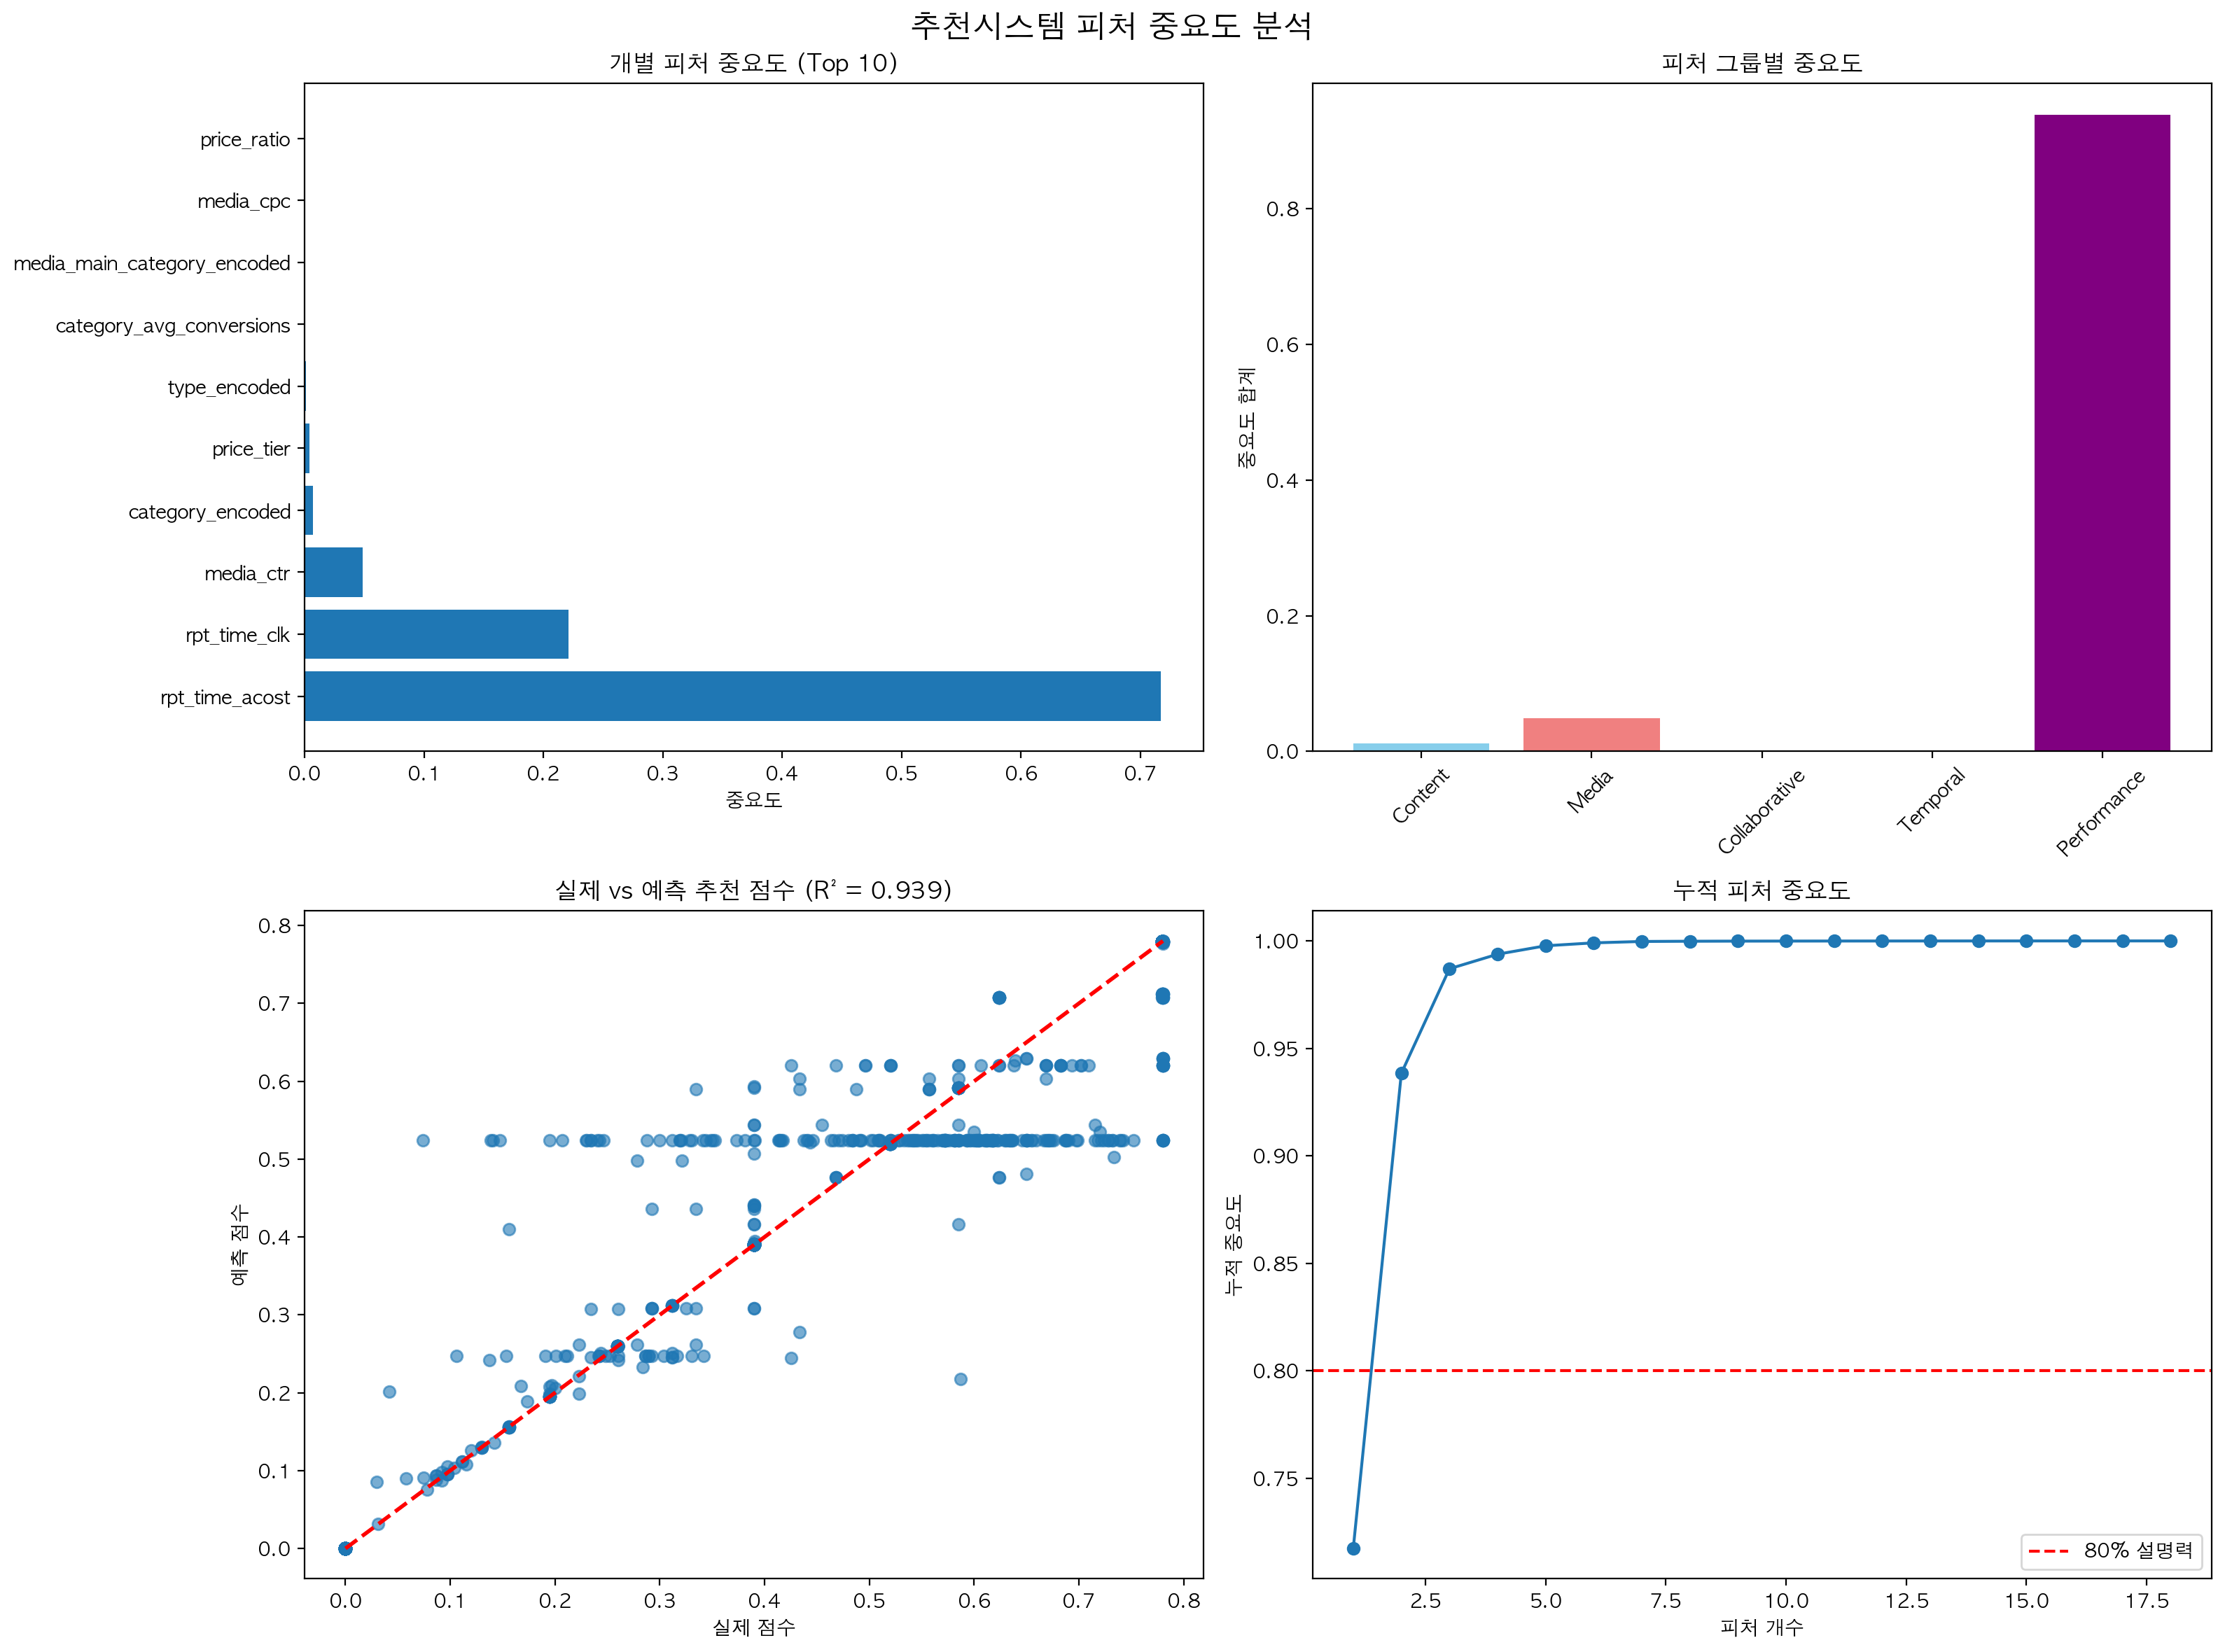


추천시스템 모델 성능:
   R² Score: 0.939
   RMSE: 0.074

피처 그룹별 중요도:
   Performance: 0.938
   Media: 0.049
   Content: 0.012
   Collaborative: 0.001
   Temporal: 0.000

Top 5 추천시스템 핵심 피처:
   rpt_time_acost: 0.717
   rpt_time_clk: 0.221
   media_ctr: 0.049
   category_encoded: 0.007
   price_tier: 0.004

추천시스템 피처 중요도 인사이트

가장 중요한 피처 그룹: Performance (0.938)
추천 전략: 하이브리드 접근법 권장

실용적 권장사항:
   1. 핵심 피처 우선순위: rpt_time_acost, rpt_time_clk, media_ctr
   2. 최소 필요 피처 수: 17개
   3. 콜드스타트 해결: 컨텐츠 기반 피처 활용


In [ ]:
# 추천시스템 특화 분석 실행
# analyzer, results = run_recommendation_feature_analysis(ads_list, ads_time, ads_rwd, ads_info, ads_join)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트
plt.rc("font", family = 'AppleGothic')
plt.rc("axes", unicode_minus = False)

class LightweightRecommendationAnalyzer:
    """가벼운 추천시스템 피처 중요도 분석"""
    
    def __init__(self, ads_list, ads_time, ads_rwd, ads_info, ads_join):
        self.ads_list = ads_list
        self.ads_time = ads_time
        self.ads_rwd = ads_rwd
        self.ads_info = ads_info
        self.ads_join = ads_join
        
    def create_lightweight_features(self):
        """기존 조합만 사용한 가벼운 피처 생성"""
        print("가벼운 추천시스템 피처 생성 중...")
        
        # 기존 실제 조합만 사용 (메모리 절약)
        feature_data = self.ads_time[['mda_idx', 'ads_idx']].drop_duplicates().copy()
        print(f"실제 조합 수: {len(feature_data):,}개")
        
        # 매체사 특성 피처
        media_features = self.create_media_profile()
        feature_data = feature_data.merge(media_features, on='mda_idx', how='left')
        
        # 광고 컨텐츠 피처
        ad_content = self.create_ad_profile()
        feature_data = feature_data.merge(ad_content, on='ads_idx', how='left')
        
        # 적합성 피처 (계산)
        feature_data = self.add_compatibility_features(feature_data)
        
        # 협업 필터링 피처
        collab_features = self.create_simple_collaborative_features()
        feature_data = feature_data.merge(collab_features, on=['mda_idx', 'ads_idx'], how='left')
        
        # 타겟 변수
        target = self.create_simple_target()
        feature_data = feature_data.merge(target, on=['mda_idx', 'ads_idx'], how='left')
        
        # 결측값 처리
        feature_data = feature_data.fillna(0)
        
        print(f"최종 데이터: {feature_data.shape}")
        return feature_data
    
    def create_media_profile(self):
        """매체사 프로필 (간단한 버전)"""
        
        # 매체사별 기본 통계
        media_stats = self.ads_time.groupby('mda_idx').agg({
            'ads_idx': 'nunique',
            'rpt_time_date': 'nunique'
        }).reset_index()
        media_stats.columns = ['mda_idx', 'media_ad_diversity', 'media_active_days']
        
        # 매체사 선호 카테고리
        media_cat_pref = self.ads_time.merge(
            self.ads_list[['ads_idx', 'ads_category']], on='ads_idx'
        ).groupby(['mda_idx', 'ads_category']).size().reset_index(name='count')
        
        # 가장 많이 선택한 카테고리
        main_category = media_cat_pref.loc[
            media_cat_pref.groupby('mda_idx')['count'].idxmax()
        ][['mda_idx', 'ads_category']].rename(columns={'ads_category': 'media_main_category'})
        
        media_stats = media_stats.merge(main_category, on='mda_idx', how='left')
        
        # 매체사 선호 타입
        media_type_pref = self.ads_time.merge(
            self.ads_list[['ads_idx', 'ads_type']], on='ads_idx'
        ).groupby(['mda_idx', 'ads_type']).size().reset_index(name='count')
        
        main_type = media_type_pref.loc[
            media_type_pref.groupby('mda_idx')['count'].idxmax()
        ][['mda_idx', 'ads_type']].rename(columns={'ads_type': 'media_main_type'})
        
        media_stats = media_stats.merge(main_type, on='mda_idx', how='left')
        
        # 카테고리 인코딩
        le_cat = LabelEncoder()
        le_type = LabelEncoder()
        media_stats['media_main_category_enc'] = le_cat.fit_transform(
            media_stats['media_main_category'].fillna('Unknown')
        )
        media_stats['media_main_type_enc'] = le_type.fit_transform(
            media_stats['media_main_type'].fillna('Unknown')
        )
        
        # 매체사 규모 (수치형으로 처리)
        diversity_values = media_stats['media_ad_diversity']
        if diversity_values.nunique() > 1:
            try:
                media_size_cat = pd.qcut(diversity_values, q=3, labels=False, duplicates='drop')
                media_stats['media_size'] = media_size_cat
            except ValueError:
                try:
                    media_size_cat = pd.cut(diversity_values, bins=3, labels=False, duplicates='drop')
                    media_stats['media_size'] = media_size_cat
                except ValueError:
                    media_stats['media_size'] = 1  # 모든 값이 동일한 경우
        else:
            media_stats['media_size'] = 1
        
        # NaN 처리
        media_stats['media_size'] = media_stats['media_size'].fillna(1)
        
        return media_stats[['mda_idx', 'media_ad_diversity', 'media_size', 
                           'media_main_category_enc', 'media_main_type_enc']]
    
    def create_ad_profile(self):
        """광고 프로필 (간단한 버전)"""
        
        ad_features = self.ads_list[['ads_idx', 'ads_category', 'ads_type', 
                                    'ads_contract_price', 'ads_reward_price']].copy()
        
        # 인코딩
        le_ad_cat = LabelEncoder()
        le_ad_type = LabelEncoder()
        ad_features['ads_category_enc'] = le_ad_cat.fit_transform(
            ad_features['ads_category'].fillna('Unknown')
        )
        ad_features['ads_type_enc'] = le_ad_type.fit_transform(
            ad_features['ads_type'].fillna('Unknown')
        )
        
        # 가격 비율
        ad_features['price_ratio'] = np.where(
            ad_features['ads_contract_price'] > 0,
            ad_features['ads_reward_price'] / ad_features['ads_contract_price'], 0
        )
        
        # 가격 구간 (수치형으로 처리)
        price_values = ad_features['ads_contract_price'].fillna(0)
        if price_values.nunique() > 1:
            try:
                price_tier = pd.qcut(price_values, q=5, labels=False, duplicates='drop')
                ad_features['price_tier'] = price_tier
            except ValueError:
                try:
                    price_tier = pd.cut(price_values, bins=5, labels=False, duplicates='drop')
                    ad_features['price_tier'] = price_tier
                except ValueError:
                    ad_features['price_tier'] = 2  # 중간값
        else:
            ad_features['price_tier'] = 2  # 모든 값이 동일한 경우 중간값
        
        # NaN 처리
        ad_features['price_tier'] = ad_features['price_tier'].fillna(2)
        
        return ad_features[['ads_idx', 'ads_category_enc', 'ads_type_enc', 'price_ratio', 'price_tier']]
    
    def add_compatibility_features(self, feature_data):
        """적합성 피처 추가 (안전한 버전)"""
        
        # 카테고리 매칭 (단순 비교)
        feature_data['category_match'] = (
            feature_data['media_main_category_enc'] == feature_data['ads_category_enc']
        ).astype(int)
        
        # 타입 매칭
        feature_data['type_match'] = (
            feature_data['media_main_type_enc'] == feature_data['ads_type_enc']
        ).astype(int)
        
        # 매체사 규모와 가격 매칭 (수치형으로 처리)
        media_size_numeric = pd.to_numeric(feature_data['media_size'], errors='coerce').fillna(1)
        price_tier_numeric = pd.to_numeric(feature_data['price_tier'], errors='coerce').fillna(1)
        
        feature_data['size_price_match'] = (
            media_size_numeric == price_tier_numeric
        ).astype(int)
        
        # 종합 적합성
        feature_data['overall_match'] = (
            0.5 * feature_data['category_match'] +
            0.3 * feature_data['type_match'] +
            0.2 * feature_data['size_price_match']
        )
        
        return feature_data
    
    def create_simple_collaborative_features(self):
        """간단한 협업 필터링 피처"""
        
        # 광고 인기도
        ad_popularity = self.ads_time.groupby('ads_idx')['mda_idx'].nunique().reset_index()
        ad_popularity.columns = ['ads_idx', 'ad_media_count']
        
        # 매체사 활동도
        media_activity = self.ads_time.groupby('mda_idx')['ads_idx'].nunique().reset_index()
        media_activity.columns = ['mda_idx', 'media_ad_count']
        
        # 조합별 피처 생성
        combinations = self.ads_time[['mda_idx', 'ads_idx']].drop_duplicates()
        combinations = combinations.merge(ad_popularity, on='ads_idx', how='left')
        combinations = combinations.merge(media_activity, on='mda_idx', how='left')
        
        # 인기도 점수 (수치형으로 처리)
        ad_counts = combinations['ad_media_count']
        if ad_counts.nunique() > 1:
            try:
                ad_score = pd.qcut(ad_counts, q=3, labels=False, duplicates='drop')
                combinations['ad_popularity_score'] = ad_score
            except ValueError:
                try:
                    ad_score = pd.cut(ad_counts, bins=3, labels=False, duplicates='drop')
                    combinations['ad_popularity_score'] = ad_score
                except ValueError:
                    combinations['ad_popularity_score'] = 1
        else:
            combinations['ad_popularity_score'] = 1
        
        media_counts = combinations['media_ad_count']
        if media_counts.nunique() > 1:
            try:
                media_score = pd.qcut(media_counts, q=3, labels=False, duplicates='drop')
                combinations['media_activity_score'] = media_score
            except ValueError:
                try:
                    media_score = pd.cut(media_counts, bins=3, labels=False, duplicates='drop')
                    combinations['media_activity_score'] = media_score
                except ValueError:
                    combinations['media_activity_score'] = 1
        else:
            combinations['media_activity_score'] = 1
        
        # NaN 처리
        combinations['ad_popularity_score'] = combinations['ad_popularity_score'].fillna(1)
        combinations['media_activity_score'] = combinations['media_activity_score'].fillna(1)
        
        return combinations[['mda_idx', 'ads_idx', 'ad_popularity_score', 'media_activity_score']]
    
    def create_simple_target(self):
        """간단한 타겟 변수"""
        
        # 실제 성과 집계
        performance = self.ads_time.groupby(['mda_idx', 'ads_idx']).agg({
            'rpt_time_clk': 'sum',
            'rpt_time_turn': 'sum',
            'rpt_time_acost': 'sum',
            'rpt_time_earn': 'sum'
        }).reset_index()
        
        # 성공 지표
        performance['ctr'] = np.where(
            performance['rpt_time_clk'] > 0,
            performance['rpt_time_turn'] / performance['rpt_time_clk'], 0
        )
        performance['profit'] = performance['rpt_time_acost'] - performance['rpt_time_earn']
        
        # 성공 정의 (중앙값 기준)
        ctr_median = performance['ctr'].median()
        profit_median = performance['profit'].median()
        
        performance['success'] = (
            (performance['ctr'] >= ctr_median) & 
            (performance['profit'] >= profit_median)
        ).astype(int)
        
        # 성공 점수
        performance['success_score'] = np.clip(
            (performance['ctr'] / performance['ctr'].max() * 0.5 +
             performance['profit'] / performance['profit'].max() * 0.5), 0, 1
        )
        
        return performance[['mda_idx', 'ads_idx', 'success', 'success_score']]
    
    def analyze_features(self, feature_data):
        """피처 중요도 분석"""
        print("\n피처 중요도 분석 중...")
        
        # 피처 선택
        feature_cols = [
            'media_ad_diversity', 'media_size', 'media_main_category_enc', 'media_main_type_enc',
            'ads_category_enc', 'ads_type_enc', 'price_ratio', 'price_tier',
            'category_match', 'type_match', 'size_price_match', 'overall_match',
            'ad_popularity_score', 'media_activity_score'
        ]
        
        # 타겟이 있는 데이터만 사용
        train_data = feature_data.dropna(subset=['success_score'])
        
        if len(train_data) == 0:
            print("훈련 데이터가 없습니다.")
            return None
        
        print(f"훈련 데이터: {len(train_data):,}개")
        
        # 데이터 준비
        X = train_data[feature_cols].fillna(0)
        y_score = train_data['success_score']
        y_class = train_data['success']
        
        # 훈련/테스트 분할
        X_train, X_test, y_train_score, y_test_score = train_test_split(
            X, y_score, test_size=0.2, random_state=42
        )
        _, _, y_train_class, y_test_class = train_test_split(
            X, y_class, test_size=0.2, random_state=42
        )
        
        # 모델 훈련
        rf_reg = RandomForestRegressor(n_estimators=50, random_state=42, max_depth=8)
        rf_clf = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=8)
        
        rf_reg.fit(X_train, y_train_score)
        rf_clf.fit(X_train, y_train_class)
        
        # 예측 및 성능
        y_pred_score = rf_reg.predict(X_test)
        y_pred_class = rf_clf.predict(X_test)
        
        r2 = r2_score(y_test_score, y_pred_score)
        acc = accuracy_score(y_test_class, y_pred_class)
        
        # 피처 중요도
        importance_df = pd.DataFrame({
            'feature': feature_cols,
            'reg_importance': rf_reg.feature_importances_,
            'clf_importance': rf_clf.feature_importances_
        }).sort_values('reg_importance', ascending=False)
        
        # 시각화
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('추천시스템 피처 중요도 (가벼운 버전)', fontsize=16, fontweight='bold')
        
        # 1. 회귀 모델 중요도
        top10 = importance_df.head(10)
        axes[0,0].barh(range(len(top10)), top10['reg_importance'])
        axes[0,0].set_yticks(range(len(top10)))
        axes[0,0].set_yticklabels(top10['feature'])
        axes[0,0].set_title(f'성공 점수 예측 중요도 (R²={r2:.3f})')
        
        # 2. 분류 모델 중요도
        axes[0,1].barh(range(len(top10)), top10['clf_importance'])
        axes[0,1].set_yticks(range(len(top10)))
        axes[0,1].set_yticklabels(top10['feature'])
        axes[0,1].set_title(f'성공/실패 분류 중요도 (Acc={acc:.3f})')
        
        # 3. 실제 vs 예측
        sample_size = min(200, len(y_test_score))
        sample_idx = np.random.choice(len(y_test_score), sample_size, replace=False)
        axes[1,0].scatter(y_test_score.iloc[sample_idx], y_pred_score[sample_idx], alpha=0.7)
        axes[1,0].plot([0, 1], [0, 1], 'r--')
        axes[1,0].set_title('실제 vs 예측 점수')
        axes[1,0].set_xlabel('실제')
        axes[1,0].set_ylabel('예측')
        
        # 4. 피처 그룹별 중요도
        groups = {
            'Media': ['media_ad_diversity', 'media_size', 'media_main_category_enc', 'media_main_type_enc'],
            'Content': ['ads_category_enc', 'ads_type_enc', 'price_ratio', 'price_tier'],
            'Match': ['category_match', 'type_match', 'size_price_match', 'overall_match'],
            'Collab': ['ad_popularity_score', 'media_activity_score']
        }
        
        group_scores = {}
        for group, features in groups.items():
            group_features = [f for f in features if f in importance_df['feature'].values]
            if group_features:
                score = importance_df[importance_df['feature'].isin(group_features)]['reg_importance'].sum()
                group_scores[group] = score
        
        group_names = list(group_scores.keys())
        group_values = list(group_scores.values())
        
        axes[1,1].bar(group_names, group_values, alpha=0.8)
        axes[1,1].set_title('피처 그룹별 중요도')
        axes[1,1].set_ylabel('중요도 합계')
        
        plt.tight_layout()
        plt.show()
        
        # 결과 출력
        print(f"\n결과:")
        print(f"   성공 점수 예측 R²: {r2:.3f}")
        print(f"   성공/실패 분류 정확도: {acc:.3f}")
        
        print(f"\n그룹별 중요도:")
        for group, score in sorted(group_scores.items(), key=lambda x: x[1], reverse=True):
            print(f"   {group}: {score:.3f}")
        
        print(f"\nTop 5 중요 피처:")
        for i, row in importance_df.head(5).iterrows():
            print(f"   {row['feature']}: {row['reg_importance']:.3f}")
        
        return importance_df, group_scores
    
    def run_analysis(self):
        """전체 분석 실행"""
        print("가벼운 추천시스템 피처 중요도 분석!")
        print("="*50)
        
        feature_data = self.create_lightweight_features()
        importance_df, group_scores = self.analyze_features(feature_data)
        
        return feature_data, importance_df, group_scores

# 사용 함수
def run_lightweight_analysis(ads_list, ads_time, ads_rwd, ads_info, ads_join):
    analyzer = LightweightRecommendationAnalyzer(ads_list, ads_time, ads_rwd, ads_info, ads_join)
    return analyzer.run_analysis()

print("가벼운 추천시스템 피처 중요도 분석 도구 로드!")
print("사용법: feature_data, importance_df, group_scores = run_lightweight_analysis(ads_list, ads_time, ads_rwd, ads_info, ads_join)")

가벼운 추천시스템 피처 중요도 분석 도구 로드!
사용법: feature_data, importance_df, group_scores = run_lightweight_analysis(ads_list, ads_time, ads_rwd, ads_info, ads_join)


가벼운 추천시스템 피처 중요도 분석!
가벼운 추천시스템 피처 생성 중...
실제 조합 수: 815,226개
최종 데이터: (815226, 18)

피처 중요도 분석 중...
훈련 데이터: 815,226개


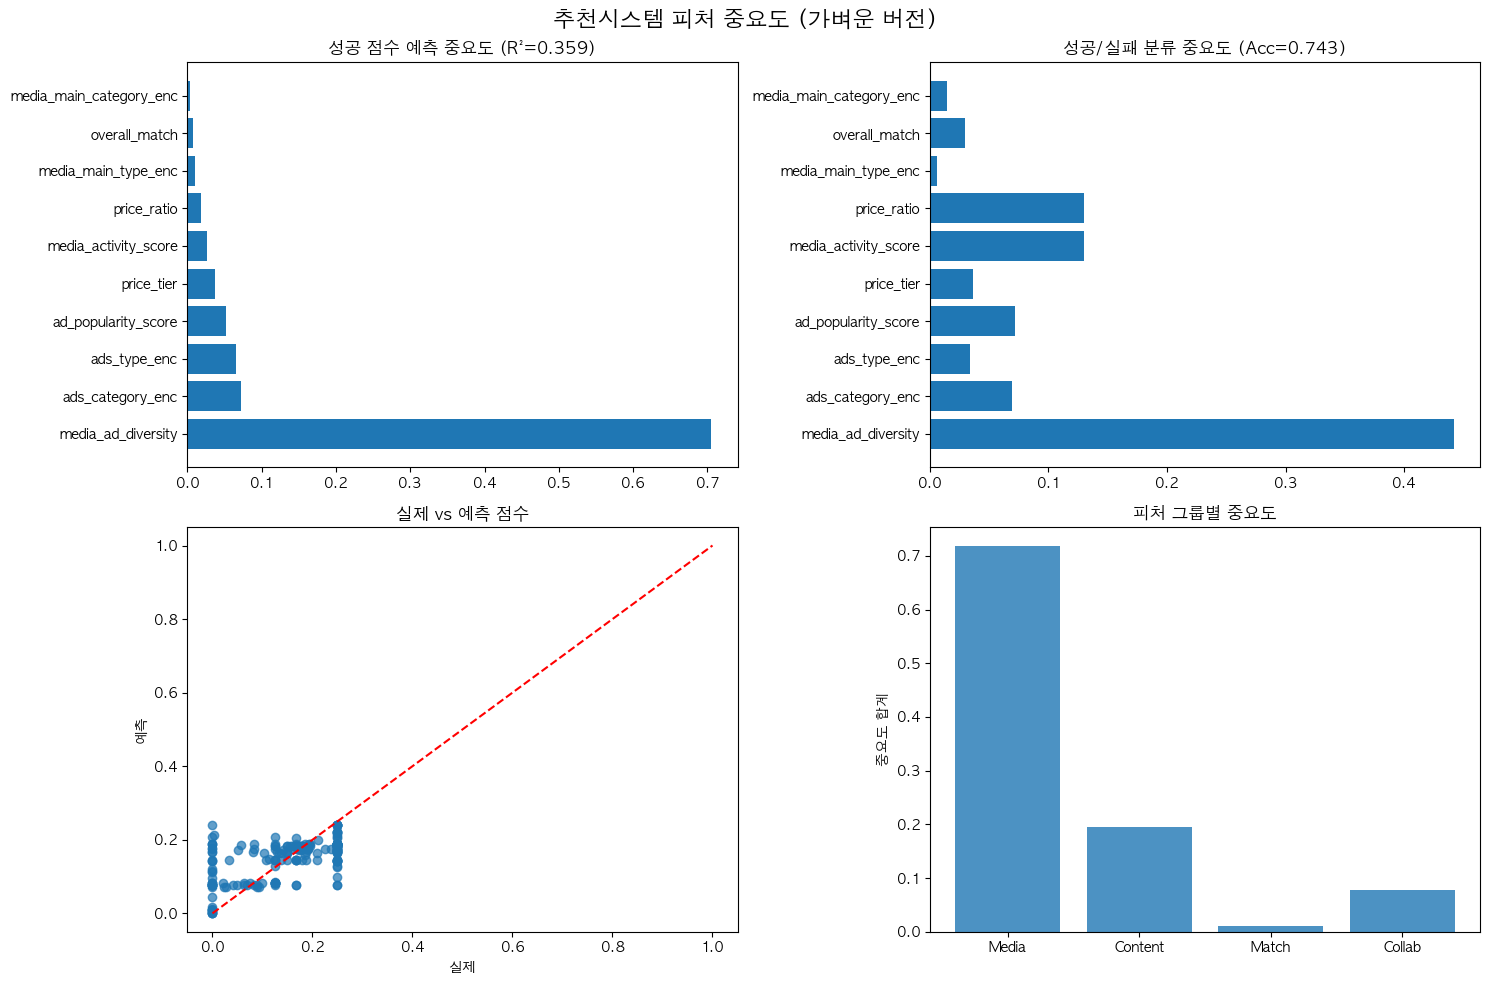


결과:
   성공 점수 예측 R²: 0.359
   성공/실패 분류 정확도: 0.743

그룹별 중요도:
   Media: 0.718
   Content: 0.195
   Collab: 0.077
   Match: 0.010

Top 5 중요 피처:
   media_ad_diversity: 0.705
   ads_category_enc: 0.073
   ads_type_enc: 0.066
   ad_popularity_score: 0.052
   price_tier: 0.037


In [25]:
# 수정된 가벼운 버전 실행
feature_data, importance_df, group_scores = run_lightweight_analysis(
    ads_list, ads_time, ads_rwd, ads_info, ads_join
)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트
plt.rc("font", family = 'AppleGothic')
plt.rc("axes", unicode_minus = False)

class TrueRecommendationAnalyzer:
    """진짜 추천시스템 피처 중요도 분석"""
    
    def __init__(self, ads_list, ads_time, ads_rwd, ads_info, ads_join):
        self.ads_list = ads_list
        self.ads_time = ads_time
        self.ads_rwd = ads_rwd
        self.ads_info = ads_info
        self.ads_join = ads_join
        
    def create_recommendation_features(self):
        """추천시스템에 진짜 필요한 피처들"""
        print("진짜 추천시스템 피처 생성 중...")
        
        # 기존 조합만 사용
        feature_data = self.ads_time[['mda_idx', 'ads_idx']].drop_duplicates().copy()
        print(f"실제 조합 수: {len(feature_data):,}개")
        
        # 1. 매체사-카테고리 친화도
        media_category_affinity = self.create_media_category_affinity()
        feature_data = feature_data.merge(media_category_affinity, on=['mda_idx', 'ads_idx'], how='left')
        
        # 2. 광고 컨텐츠 특성
        ad_content_features = self.create_content_based_features()
        feature_data = feature_data.merge(ad_content_features, on='ads_idx', how='left')
        
        # 3. 매체사 사용자 프로필 유사도
        user_profile_similarity = self.create_user_profile_similarity()
        feature_data = feature_data.merge(user_profile_similarity, on=['mda_idx', 'ads_idx'], how='left')
        
        # 4. 협업 필터링 - 유사 매체사 선호도
        collaborative_features = self.create_true_collaborative_features()
        feature_data = feature_data.merge(collaborative_features, on=['mda_idx', 'ads_idx'], how='left')
        
        # 5. 시간적 적합성
        temporal_features = self.create_temporal_matching()
        feature_data = feature_data.merge(temporal_features, on=['mda_idx', 'ads_idx'], how='left')
        
        # 6. 타겟 변수 (실제 성과에서 CTR 기준으로)
        target_data = self.create_recommendation_target()
        feature_data = feature_data.merge(target_data, on=['mda_idx', 'ads_idx'], how='left')
        
        # 결측값 처리
        feature_data = feature_data.fillna(0)
        
        print(f"최종 추천시스템 데이터: {feature_data.shape}")
        return feature_data
    
    def create_media_category_affinity(self):
        """매체사-카테고리 친화도 점수"""
        
        # 매체사별 카테고리 성과
        media_cat_performance = self.ads_time.merge(
            self.ads_list[['ads_idx', 'ads_category']], on='ads_idx'
        ).groupby(['mda_idx', 'ads_category']).agg({
            'rpt_time_clk': 'sum',
            'rpt_time_turn': 'sum'
        }).reset_index()
        
        # 매체사별 카테고리 CTR
        media_cat_performance['category_ctr'] = np.where(
            media_cat_performance['rpt_time_clk'] > 0,
            media_cat_performance['rpt_time_turn'] / media_cat_performance['rpt_time_clk'], 0
        )
        
        # 매체사별 전체 평균 CTR
        media_avg_ctr = media_cat_performance.groupby('mda_idx')['category_ctr'].mean().reset_index()
        media_avg_ctr.columns = ['mda_idx', 'media_avg_ctr']
        
        # 카테고리별 친화도 점수 (해당 매체사의 그 카테고리 CTR / 매체사 전체 평균 CTR)
        media_cat_performance = media_cat_performance.merge(media_avg_ctr, on='mda_idx')
        media_cat_performance['category_affinity'] = np.where(
            media_cat_performance['media_avg_ctr'] > 0,
            media_cat_performance['category_ctr'] / media_cat_performance['media_avg_ctr'], 1
        )
        
        # 광고와 결합하여 친화도 점수 부여
        ad_categories = self.ads_list[['ads_idx', 'ads_category']]
        
        # 모든 매체사-광고 조합에 대해 친화도 계산
        combinations = self.ads_time[['mda_idx', 'ads_idx']].drop_duplicates()
        combinations = combinations.merge(ad_categories, on='ads_idx')
        
        result = combinations.merge(
            media_cat_performance[['mda_idx', 'ads_category', 'category_affinity']], 
            on=['mda_idx', 'ads_category'], how='left'
        )
        
        return result[['mda_idx', 'ads_idx', 'category_affinity']]
    
    def create_content_based_features(self):
        """광고 컨텐츠 기반 피처"""
        
        content_features = self.ads_list[['ads_idx', 'ads_category', 'ads_type', 
                                        'ads_contract_price', 'ads_reward_price',
                                        'ads_age_min', 'ads_age_max']].copy()
        
        # 카테고리 인기도 (전체 매체사에서 얼마나 선택되었는지)
        category_popularity = self.ads_time.merge(
            self.ads_list[['ads_idx', 'ads_category']], on='ads_idx'
        ).groupby('ads_category')['mda_idx'].nunique().reset_index()
        category_popularity.columns = ['ads_category', 'category_popularity']
        
        content_features = content_features.merge(category_popularity, on='ads_category', how='left')
        
        # 가격 매력도 (리워드 비율이 높을수록 매력적)
        content_features['reward_attractiveness'] = np.where(
            content_features['ads_contract_price'] > 0,
            content_features['ads_reward_price'] / content_features['ads_contract_price'], 0
        )
        
        # 타겟 연령대 폭 (넓을수록 범용성 높음)
        content_features['target_age_width'] = (
            content_features['ads_age_max'] - content_features['ads_age_min']
        ) / 100  # 정규화
        
        # 가격 경쟁력 (같은 카테고리 내에서 상대적 위치)
        category_price_rank = content_features.groupby('ads_category')['ads_contract_price'].rank(
            method='average', pct=True
        )
        content_features['price_competitiveness'] = 1 - category_price_rank  # 낮은 가격이 더 경쟁력
        
        return content_features[['ads_idx', 'category_popularity', 'reward_attractiveness', 
                               'target_age_width', 'price_competitiveness']]
    
    def create_user_profile_similarity(self):
        """매체사 사용자 프로필과 광고 타겟의 유사도"""
        
        # 매체사별 선호 연령대 추정 (진행한 광고들의 평균 타겟 연령)
        media_age_profile = self.ads_time.merge(
            self.ads_list[['ads_idx', 'ads_age_min', 'ads_age_max']], on='ads_idx'
        ).groupby('mda_idx').agg({
            'ads_age_min': 'mean',
            'ads_age_max': 'mean'
        }).reset_index()
        
        media_age_profile['media_target_age_mid'] = (
            media_age_profile['ads_age_min'] + media_age_profile['ads_age_max']
        ) / 2
        
        # 광고별 타겟 연령대 중간값
        ad_age_profile = self.ads_list[['ads_idx', 'ads_age_min', 'ads_age_max']].copy()
        ad_age_profile['ad_target_age_mid'] = (
            ad_age_profile['ads_age_min'] + ad_age_profile['ads_age_max']
        ) / 2
        
        # 매체사-광고 조합별 연령 유사도
        combinations = self.ads_time[['mda_idx', 'ads_idx']].drop_duplicates()
        combinations = combinations.merge(media_age_profile[['mda_idx', 'media_target_age_mid']], on='mda_idx')
        combinations = combinations.merge(ad_age_profile[['ads_idx', 'ad_target_age_mid']], on='ads_idx')
        
        # 연령 차이를 유사도로 변환 (차이가 작을수록 높은 점수)
        age_diff = abs(combinations['media_target_age_mid'] - combinations['ad_target_age_mid'])
        combinations['age_similarity'] = np.exp(-age_diff / 20)  # 지수적 감소
        
        return combinations[['mda_idx', 'ads_idx', 'age_similarity']]
    
    def create_true_collaborative_features(self):
        """진짜 협업 필터링 - 유사 매체사들이 좋아한 광고"""
        
        # 매체사별 카테고리 선호도 벡터 생성
        media_cat_matrix = self.ads_time.merge(
            self.ads_list[['ads_idx', 'ads_category']], on='ads_idx'
        ).groupby(['mda_idx', 'ads_category']).size().unstack(fill_value=0)
        
        # 매체사 간 코사인 유사도 계산 (상위 5개 유사 매체사만)
        from sklearn.metrics.pairwise import cosine_similarity
        
        similarity_matrix = cosine_similarity(media_cat_matrix)
        similarity_df = pd.DataFrame(
            similarity_matrix, 
            index=media_cat_matrix.index, 
            columns=media_cat_matrix.index
        )
        
        # 각 매체사별 유사 매체사들의 광고 선호도
        combinations = self.ads_time[['mda_idx', 'ads_idx']].drop_duplicates()
        combinations['similar_media_preference'] = 0.0
        
        for media_id in combinations['mda_idx'].unique():
            if media_id in similarity_df.index:
                # 상위 5개 유사 매체사
                similar_medias = similarity_df[media_id].nlargest(6)[1:6].index  # 자기 제외
                
                if len(similar_medias) > 0:
                    # 유사 매체사들이 선택한 광고들의 가중 점수
                    similar_ads = self.ads_time[
                        self.ads_time['mda_idx'].isin(similar_medias)
                    ].groupby('ads_idx').size()
                    
                    # 해당 매체사의 광고들에 대해 유사도 점수 부여
                    media_combinations = combinations[combinations['mda_idx'] == media_id]
                    for _, row in media_combinations.iterrows():
                        ad_id = row['ads_idx']
                        if ad_id in similar_ads.index:
                            combinations.loc[
                                (combinations['mda_idx'] == media_id) & 
                                (combinations['ads_idx'] == ad_id), 
                                'similar_media_preference'
                            ] = similar_ads[ad_id] / len(similar_medias)
        
        return combinations[['mda_idx', 'ads_idx', 'similar_media_preference']]
    
    def create_temporal_matching(self):
        """시간적 적합성 - 요일/시간대 매칭"""
        
        # 매체사별 활동 패턴
        temporal_data = self.ads_time.copy()
        temporal_data['rpt_time_date'] = pd.to_datetime(temporal_data['rpt_time_date'])
        temporal_data['weekday'] = temporal_data['rpt_time_date'].dt.weekday
        temporal_data['is_weekend'] = (temporal_data['weekday'] >= 5).astype(int)
        
        # 매체사별 주중/주말 선호도
        media_temporal = temporal_data.groupby(['mda_idx', 'is_weekend']).size().unstack(fill_value=0)
        media_temporal['weekend_preference'] = (
            media_temporal[1] / (media_temporal[0] + media_temporal[1] + 1)
        )
        
        # 광고별 주중/주말 성과 (전체 매체사 기준)
        ad_temporal = temporal_data.merge(
            self.ads_list[['ads_idx', 'ads_category']], on='ads_idx'
        ).groupby(['ads_category', 'is_weekend']).agg({
            'rpt_time_clk': 'sum',
            'rpt_time_turn': 'sum'
        }).reset_index()
        
        ad_temporal['weekend_ctr'] = np.where(
            ad_temporal['rpt_time_clk'] > 0,
            ad_temporal['rpt_time_turn'] / ad_temporal['rpt_time_clk'], 0
        )
        
        # 카테고리별 주말 성과
        category_weekend_performance = ad_temporal[ad_temporal['is_weekend'] == 1].set_index('ads_category')['weekend_ctr'].to_dict()
        
        # 매체사-광고 조합별 시간적 매칭
        combinations = self.ads_time[['mda_idx', 'ads_idx']].drop_duplicates()
        combinations = combinations.merge(
            self.ads_list[['ads_idx', 'ads_category']], on='ads_idx'
        )
        
        # 매체사 주말 선호도와 광고 카테고리 주말 성과 매칭
        combinations = combinations.merge(
            media_temporal[['weekend_preference']].reset_index(), on='mda_idx', how='left'
        )
        
        combinations['category_weekend_ctr'] = combinations['ads_category'].map(category_weekend_performance).fillna(0)
        
        # 시간적 매칭 점수
        combinations['temporal_match'] = combinations['weekend_preference'] * combinations['category_weekend_ctr']
        
        return combinations[['mda_idx', 'ads_idx', 'temporal_match']]
    
    def create_recommendation_target(self):
        """추천 성공도 타겟 (CTR 기준)"""
        
        target_data = self.ads_time.groupby(['mda_idx', 'ads_idx']).agg({
            'rpt_time_clk': 'sum',
            'rpt_time_turn': 'sum'
        }).reset_index()
        
        # CTR 계산
        target_data['ctr'] = np.where(
            target_data['rpt_time_clk'] > 0,
            target_data['rpt_time_turn'] / target_data['rpt_time_clk'], 0
        )
        
        # CTR 기준 성공/실패 (상위 30%를 성공으로 정의)
        ctr_threshold = target_data['ctr'].quantile(0.7)
        target_data['recommendation_success'] = (target_data['ctr'] >= ctr_threshold).astype(int)
        
        # 정규화된 CTR 점수 (0-1)
        max_ctr = target_data['ctr'].max()
        target_data['ctr_score'] = target_data['ctr'] / max_ctr if max_ctr > 0 else 0
        
        return target_data[['mda_idx', 'ads_idx', 'recommendation_success', 'ctr_score']]
    
    def analyze_recommendation_features(self, feature_data):
        """추천시스템 피처 중요도 분석"""
        print("\n진짜 추천시스템 피처 중요도 분석...")
        
        # 추천시스템 피처 선택
        rec_features = [
            'category_affinity',           # 매체사-카테고리 친화도
            'category_popularity',         # 카테고리 인기도
            'reward_attractiveness',       # 리워드 매력도
            'target_age_width',           # 타겟 연령 폭
            'price_competitiveness',      # 가격 경쟁력
            'age_similarity',             # 연령 유사도
            'similar_media_preference',   # 유사 매체사 선호도
            'temporal_match'              # 시간적 매칭
        ]
        
        # 타겟이 있는 데이터만 사용
        train_data = feature_data.dropna(subset=['ctr_score'])
        
        if len(train_data) == 0:
            print("훈련 데이터가 없습니다.")
            return None
        
        print(f"훈련 데이터: {len(train_data):,}개")
        
        # 사용 가능한 피처 확인
        available_features = [f for f in rec_features if f in train_data.columns]
        print(f"사용 가능한 피처: {available_features}")
        
        if len(available_features) == 0:
            print("사용 가능한 피처가 없습니다.")
            return None
        
        # 데이터 준비
        X = train_data[available_features].fillna(0)
        y_score = train_data['ctr_score']
        y_class = train_data['recommendation_success']
        
        # 훈련/테스트 분할
        X_train, X_test, y_train_score, y_test_score = train_test_split(
            X, y_score, test_size=0.2, random_state=42
        )
        _, _, y_train_class, y_test_class = train_test_split(
            X, y_class, test_size=0.2, random_state=42
        )
        
        # 모델 훈련
        rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
        rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
        
        rf_reg.fit(X_train, y_train_score)
        rf_clf.fit(X_train, y_train_class)
        
        # 예측 및 성능
        y_pred_score = rf_reg.predict(X_test)
        y_pred_class = rf_clf.predict(X_test)
        
        r2 = r2_score(y_test_score, y_pred_score)
        acc = accuracy_score(y_test_class, y_pred_class)
        
        # 피처 중요도
        importance_df = pd.DataFrame({
            'feature': available_features,
            'reg_importance': rf_reg.feature_importances_,
            'clf_importance': rf_clf.feature_importances_
        }).sort_values('reg_importance', ascending=False)
        
        # 시각화
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('진짜 추천시스템 피처 중요도 분석', fontsize=16, fontweight='bold')
        
        # 1. 회귀 모델 중요도
        axes[0,0].barh(range(len(importance_df)), importance_df['reg_importance'])
        axes[0,0].set_yticks(range(len(importance_df)))
        axes[0,0].set_yticklabels(importance_df['feature'])
        axes[0,0].set_title(f'CTR 점수 예측 중요도 (R²={r2:.3f})')
        
        # 2. 분류 모델 중요도
        axes[0,1].barh(range(len(importance_df)), importance_df['clf_importance'])
        axes[0,1].set_yticks(range(len(importance_df)))
        axes[0,1].set_yticklabels(importance_df['feature'])
        axes[0,1].set_title(f'추천 성공 분류 중요도 (Acc={acc:.3f})')
        
        # 3. 실제 vs 예측
        sample_size = min(300, len(y_test_score))
        sample_idx = np.random.choice(len(y_test_score), sample_size, replace=False)
        axes[1,0].scatter(y_test_score.iloc[sample_idx], y_pred_score[sample_idx], alpha=0.7)
        axes[1,0].plot([0, 1], [0, 1], 'r--')
        axes[1,0].set_title('실제 vs 예측 CTR 점수')
        axes[1,0].set_xlabel('실제 CTR 점수')
        axes[1,0].set_ylabel('예측 CTR 점수')
        
        # 4. 피처 중요도 비교
        x = range(len(importance_df))
        width = 0.35
        axes[1,1].bar([i - width/2 for i in x], importance_df['reg_importance'], width, label='회귀', alpha=0.8)
        axes[1,1].bar([i + width/2 for i in x], importance_df['clf_importance'], width, label='분류', alpha=0.8)
        axes[1,1].set_title('회귀 vs 분류 중요도 비교')
        axes[1,1].set_xticks(x)
        axes[1,1].set_xticklabels(importance_df['feature'], rotation=45, ha='right')
        axes[1,1].legend()
        
        plt.tight_layout()
        plt.show()
        
        # 결과 출력
        print(f"\n모델 성능:")
        print(f"   CTR 점수 예측 R²: {r2:.3f}")
        print(f"   추천 성공 분류 정확도: {acc:.3f}")
        
        print(f"\nTop 5 중요 피처:")
        for i, row in importance_df.head(5).iterrows():
            print(f"   {row['feature']}: 회귀 {row['reg_importance']:.3f}, 분류 {row['clf_importance']:.3f}")
        
        return importance_df
    
    def run_true_analysis(self):
        """진짜 추천시스템 분석 실행"""
        print("진짜 추천시스템 피처 중요도 분석!")
        print("="*60)
        
        feature_data = self.create_recommendation_features()
        importance_df = self.analyze_recommendation_features(feature_data)
        
        return feature_data, importance_df

# 실행 함수
def run_true_recommendation_analysis(ads_list, ads_time, ads_rwd, ads_info, ads_join):
    analyzer = TrueRecommendationAnalyzer(ads_list, ads_time, ads_rwd, ads_info, ads_join)
    return analyzer.run_true_analysis()

print("진짜 추천시스템 피처 중요도 분석 도구 로드!")
print("사용법: feature_data, importance_df = run_true_recommendation_analysis(ads_list, ads_time, ads_rwd, ads_info, ads_join)")

진짜 추천시스템 피처 중요도 분석 도구 로드!
사용법: feature_data, importance_df = run_true_recommendation_analysis(ads_list, ads_time, ads_rwd, ads_info, ads_join)


진짜 추천시스템 피처 중요도 분석!
진짜 추천시스템 피처 생성 중...
실제 조합 수: 815,226개
최종 추천시스템 데이터: (815226, 12)

진짜 추천시스템 피처 중요도 분석...
훈련 데이터: 815,226개
사용 가능한 피처: ['category_affinity', 'category_popularity', 'reward_attractiveness', 'target_age_width', 'price_competitiveness', 'age_similarity', 'similar_media_preference', 'temporal_match']


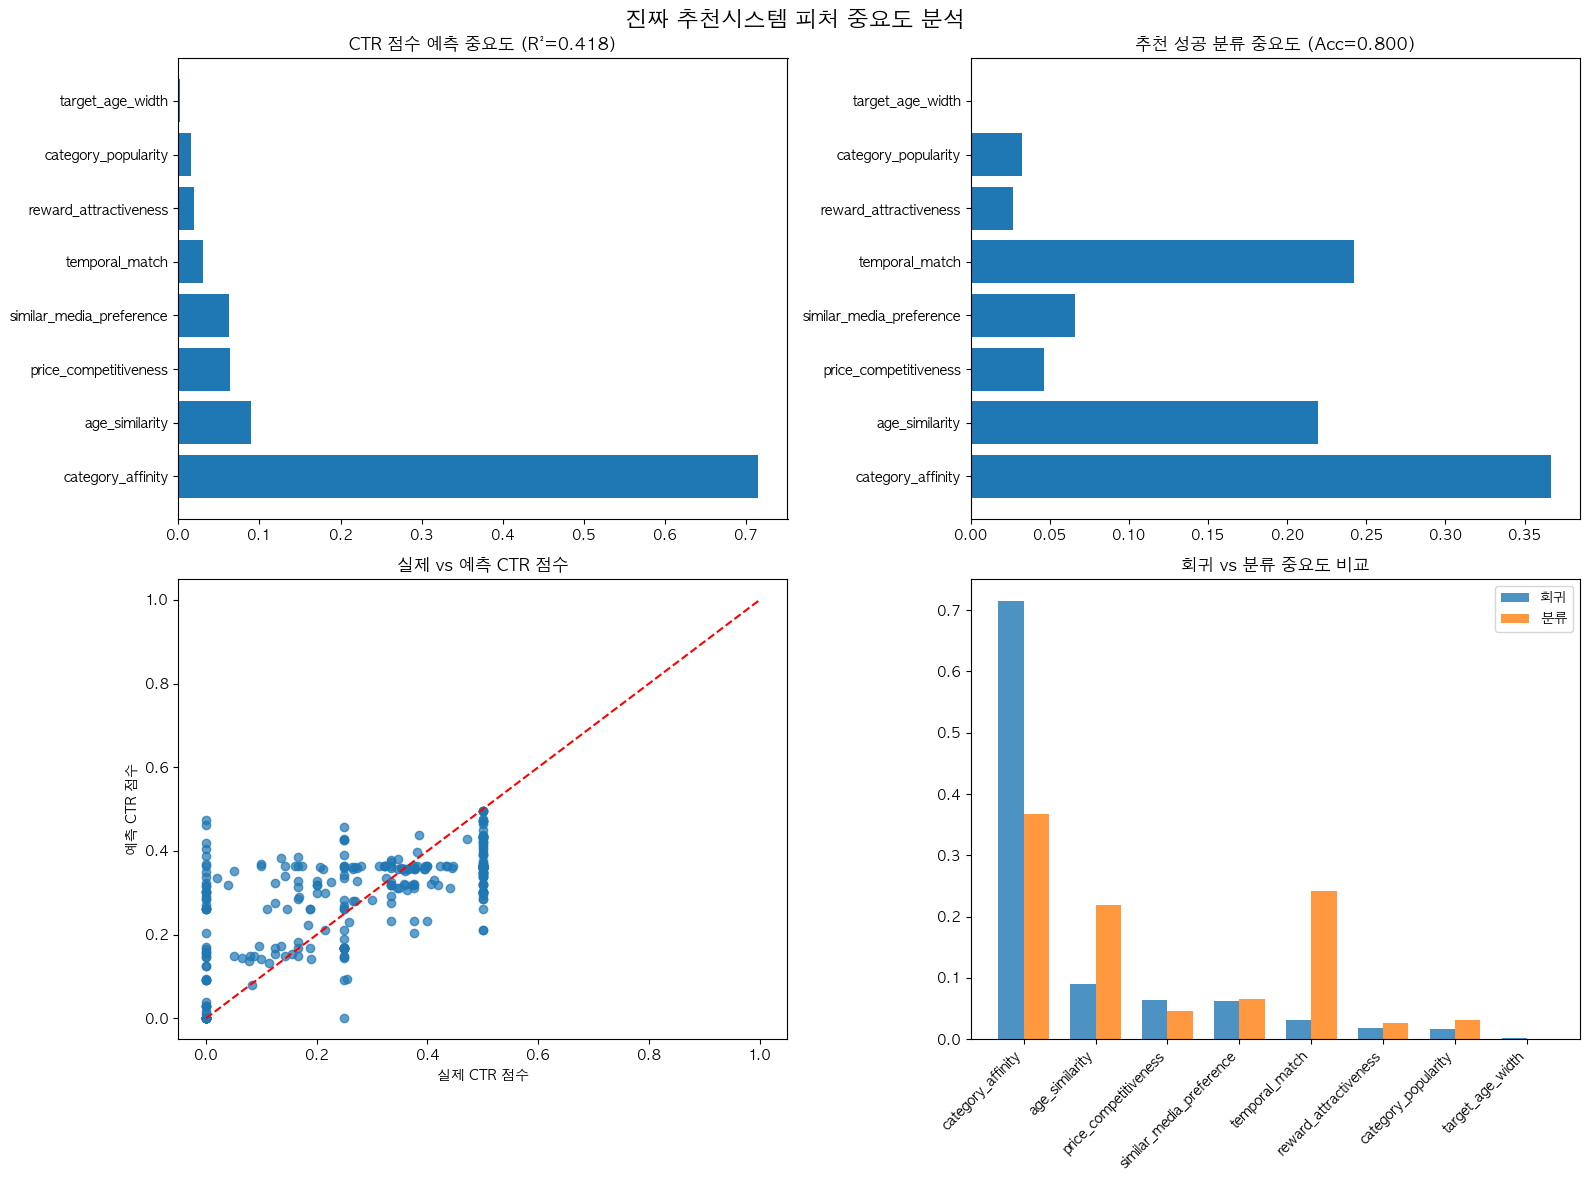


모델 성능:
   CTR 점수 예측 R²: 0.418
   추천 성공 분류 정확도: 0.800

Top 5 중요 피처:
   category_affinity: 회귀 0.715, 분류 0.367
   age_similarity: 회귀 0.090, 분류 0.219
   price_competitiveness: 회귀 0.064, 분류 0.047
   similar_media_preference: 회귀 0.063, 분류 0.066
   temporal_match: 회귀 0.031, 분류 0.242


In [27]:
# 진짜 추천시스템 피처 중요도 분석
feature_data, importance_df = run_true_recommendation_analysis(
    ads_list, ads_time, ads_rwd, ads_info, ads_join
)

🎯 광고 플랫폼 완전 분석기

📋 사용법:

1️⃣ CSV 파일에서 분석:
   file_paths = {
       'ads_list': 'path/to/ads_list.csv',
       'ads_time': 'path/to/ads_time.csv',
       'ads_rwd': 'path/to/ads_rwd.csv',
       'ads_info': 'path/to/ads_info.csv',
       'ads_join': 'path/to/ads_join.csv'
   }
   analyzer, results = run_analysis_from_csv(file_paths)

2️⃣ 데이터베이스에서 분석:
   import sqlite3
   conn = sqlite3.connect('your_database.db')
   analyzer, results = run_analysis_from_db(conn)

3️⃣ 샘플 데이터로 데모:
   analyzer, results = create_sample_analysis()

🚀 샘플 분석을 바로 실행하려면 아래 코드를 실행하세요:
   analyzer, results = create_sample_analysis()

🎬 샘플 분석 자동 실행!
🎬 샘플 데이터로 분석 데모 시작!
✅ 샘플 데이터 생성 완료!
   - ads_list: (200, 5)
   - ads_time: (163636, 9) (실제 성과 데이터)
🚀 광고 플랫폼 완전 분석 시작!

📊 데이터 개요 및 품질 체크

📋 ADS_LIST:
   Shape: (200, 5)
   Memory Usage: 0.0 MB
   결측값: 0 개
   중복값: 0 개
   수치형 컬럼: 3개

📋 ADS_TIME:
   Shape: (163636, 9)
   Memory Usage: 37.9 MB
   결측값: 0 개
   중복값: 0 개
   수치형 컬럼: 6개

   💰 수익 구조 체크:
   - 총 광고주 지불액: 208,531,094


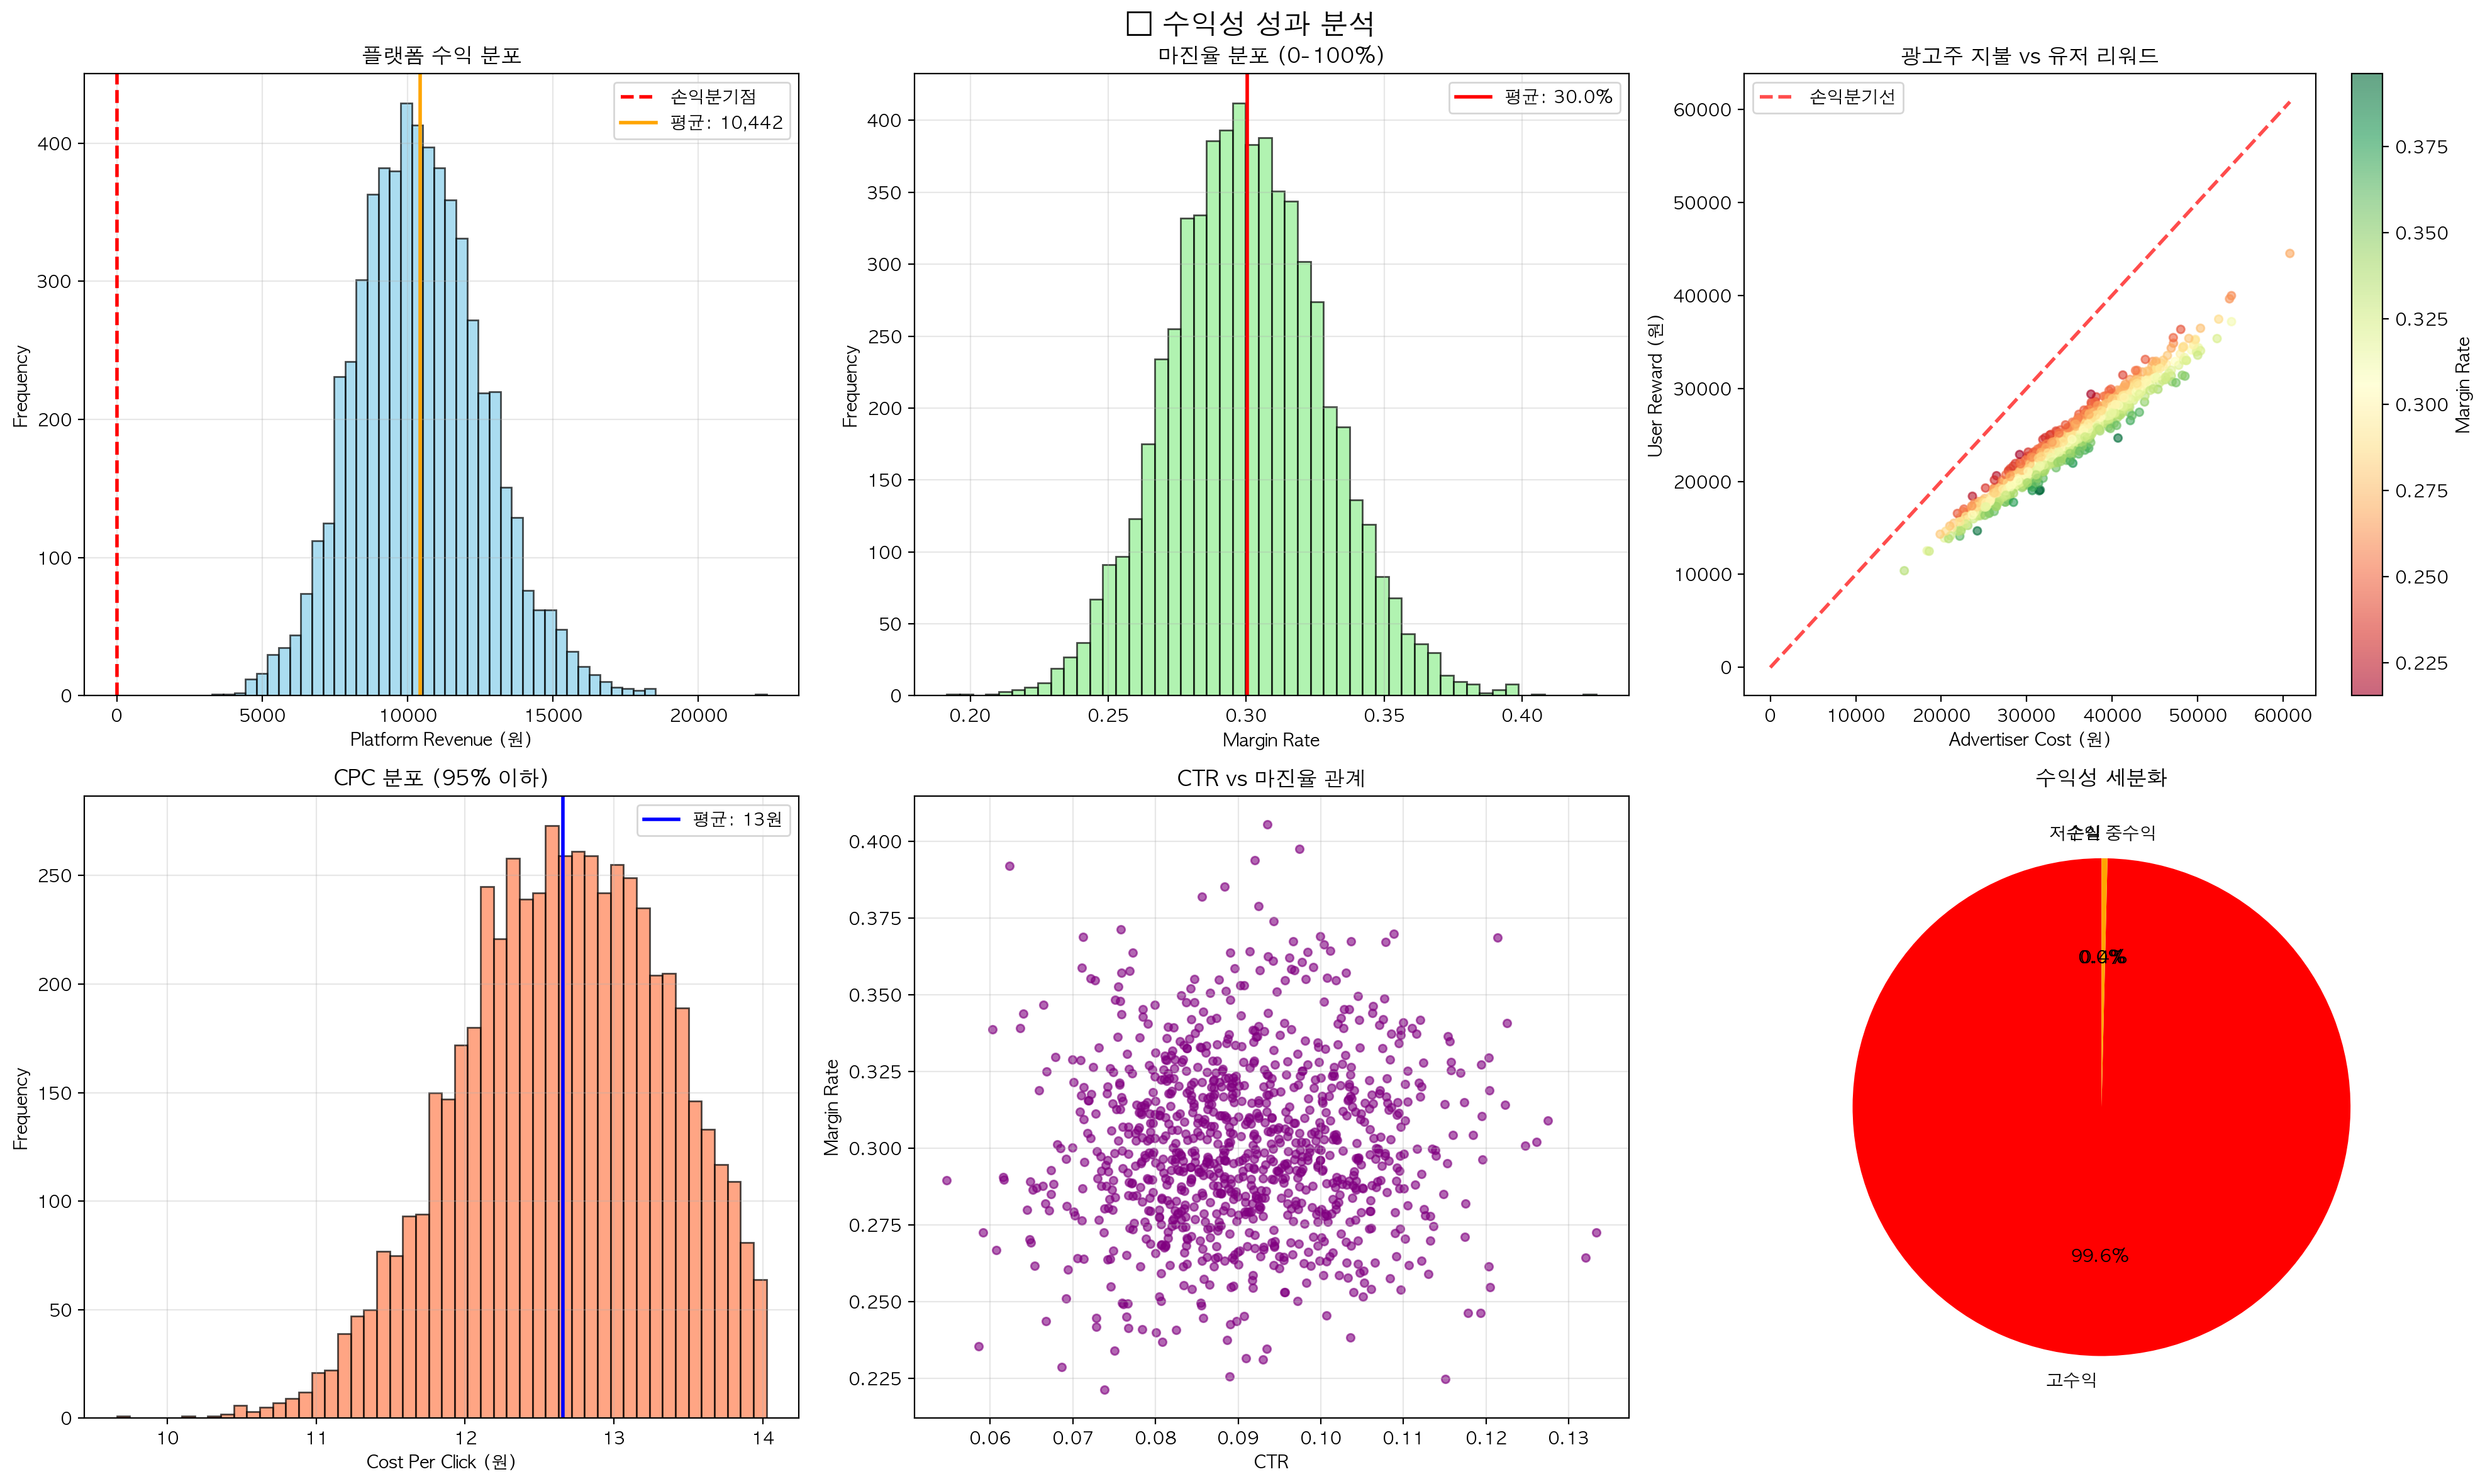

📊 수익성 요약:
   총 플랫폼 수익: 62,653,207원
   평균 플랫폼 수익: 10,442원
   수익성 비율: 100.0%
   최고 수익: 22,350원
   최저 수익: 3,279원

📺 매체사별 성과 분석


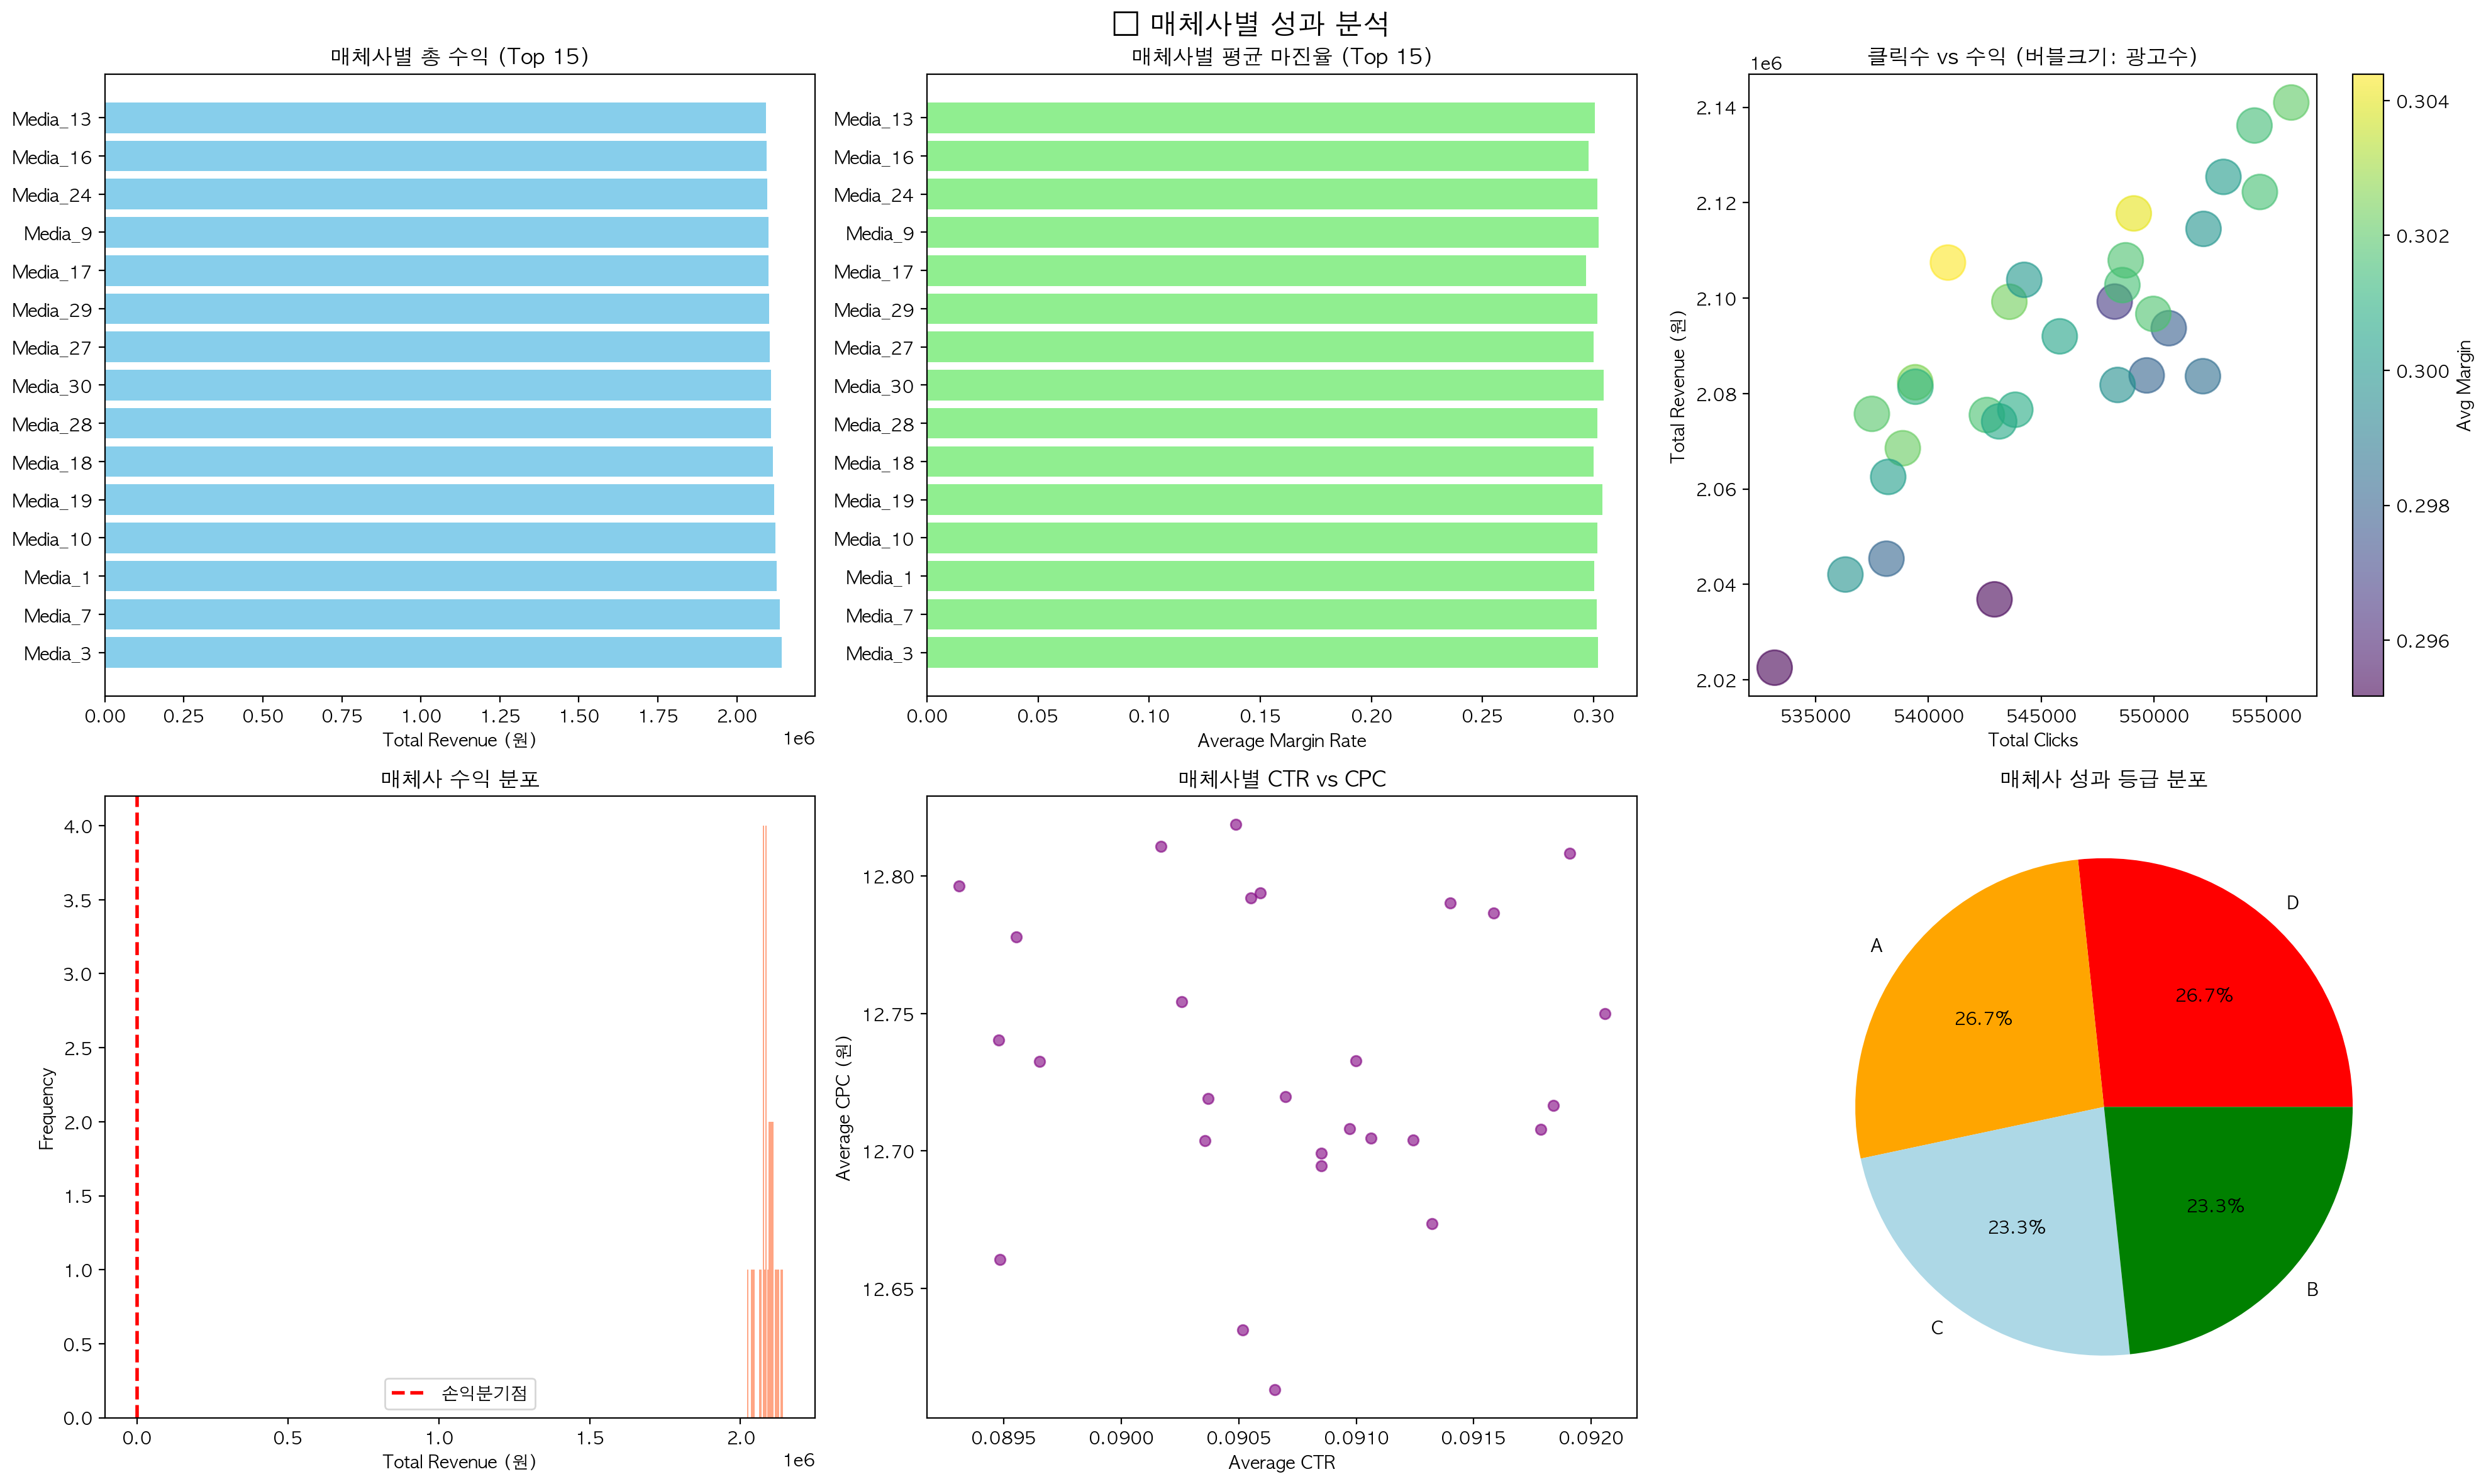

📊 매체사 요약:
   총 매체사 수: 30개
   수익성 매체사: 30개 (100.0%)
   평균 매체사 수익: 2,088,440원
   Top 10% 매체사 수익 점유율: 10.2%

🏷️ 광고 카테고리별 성과 분석


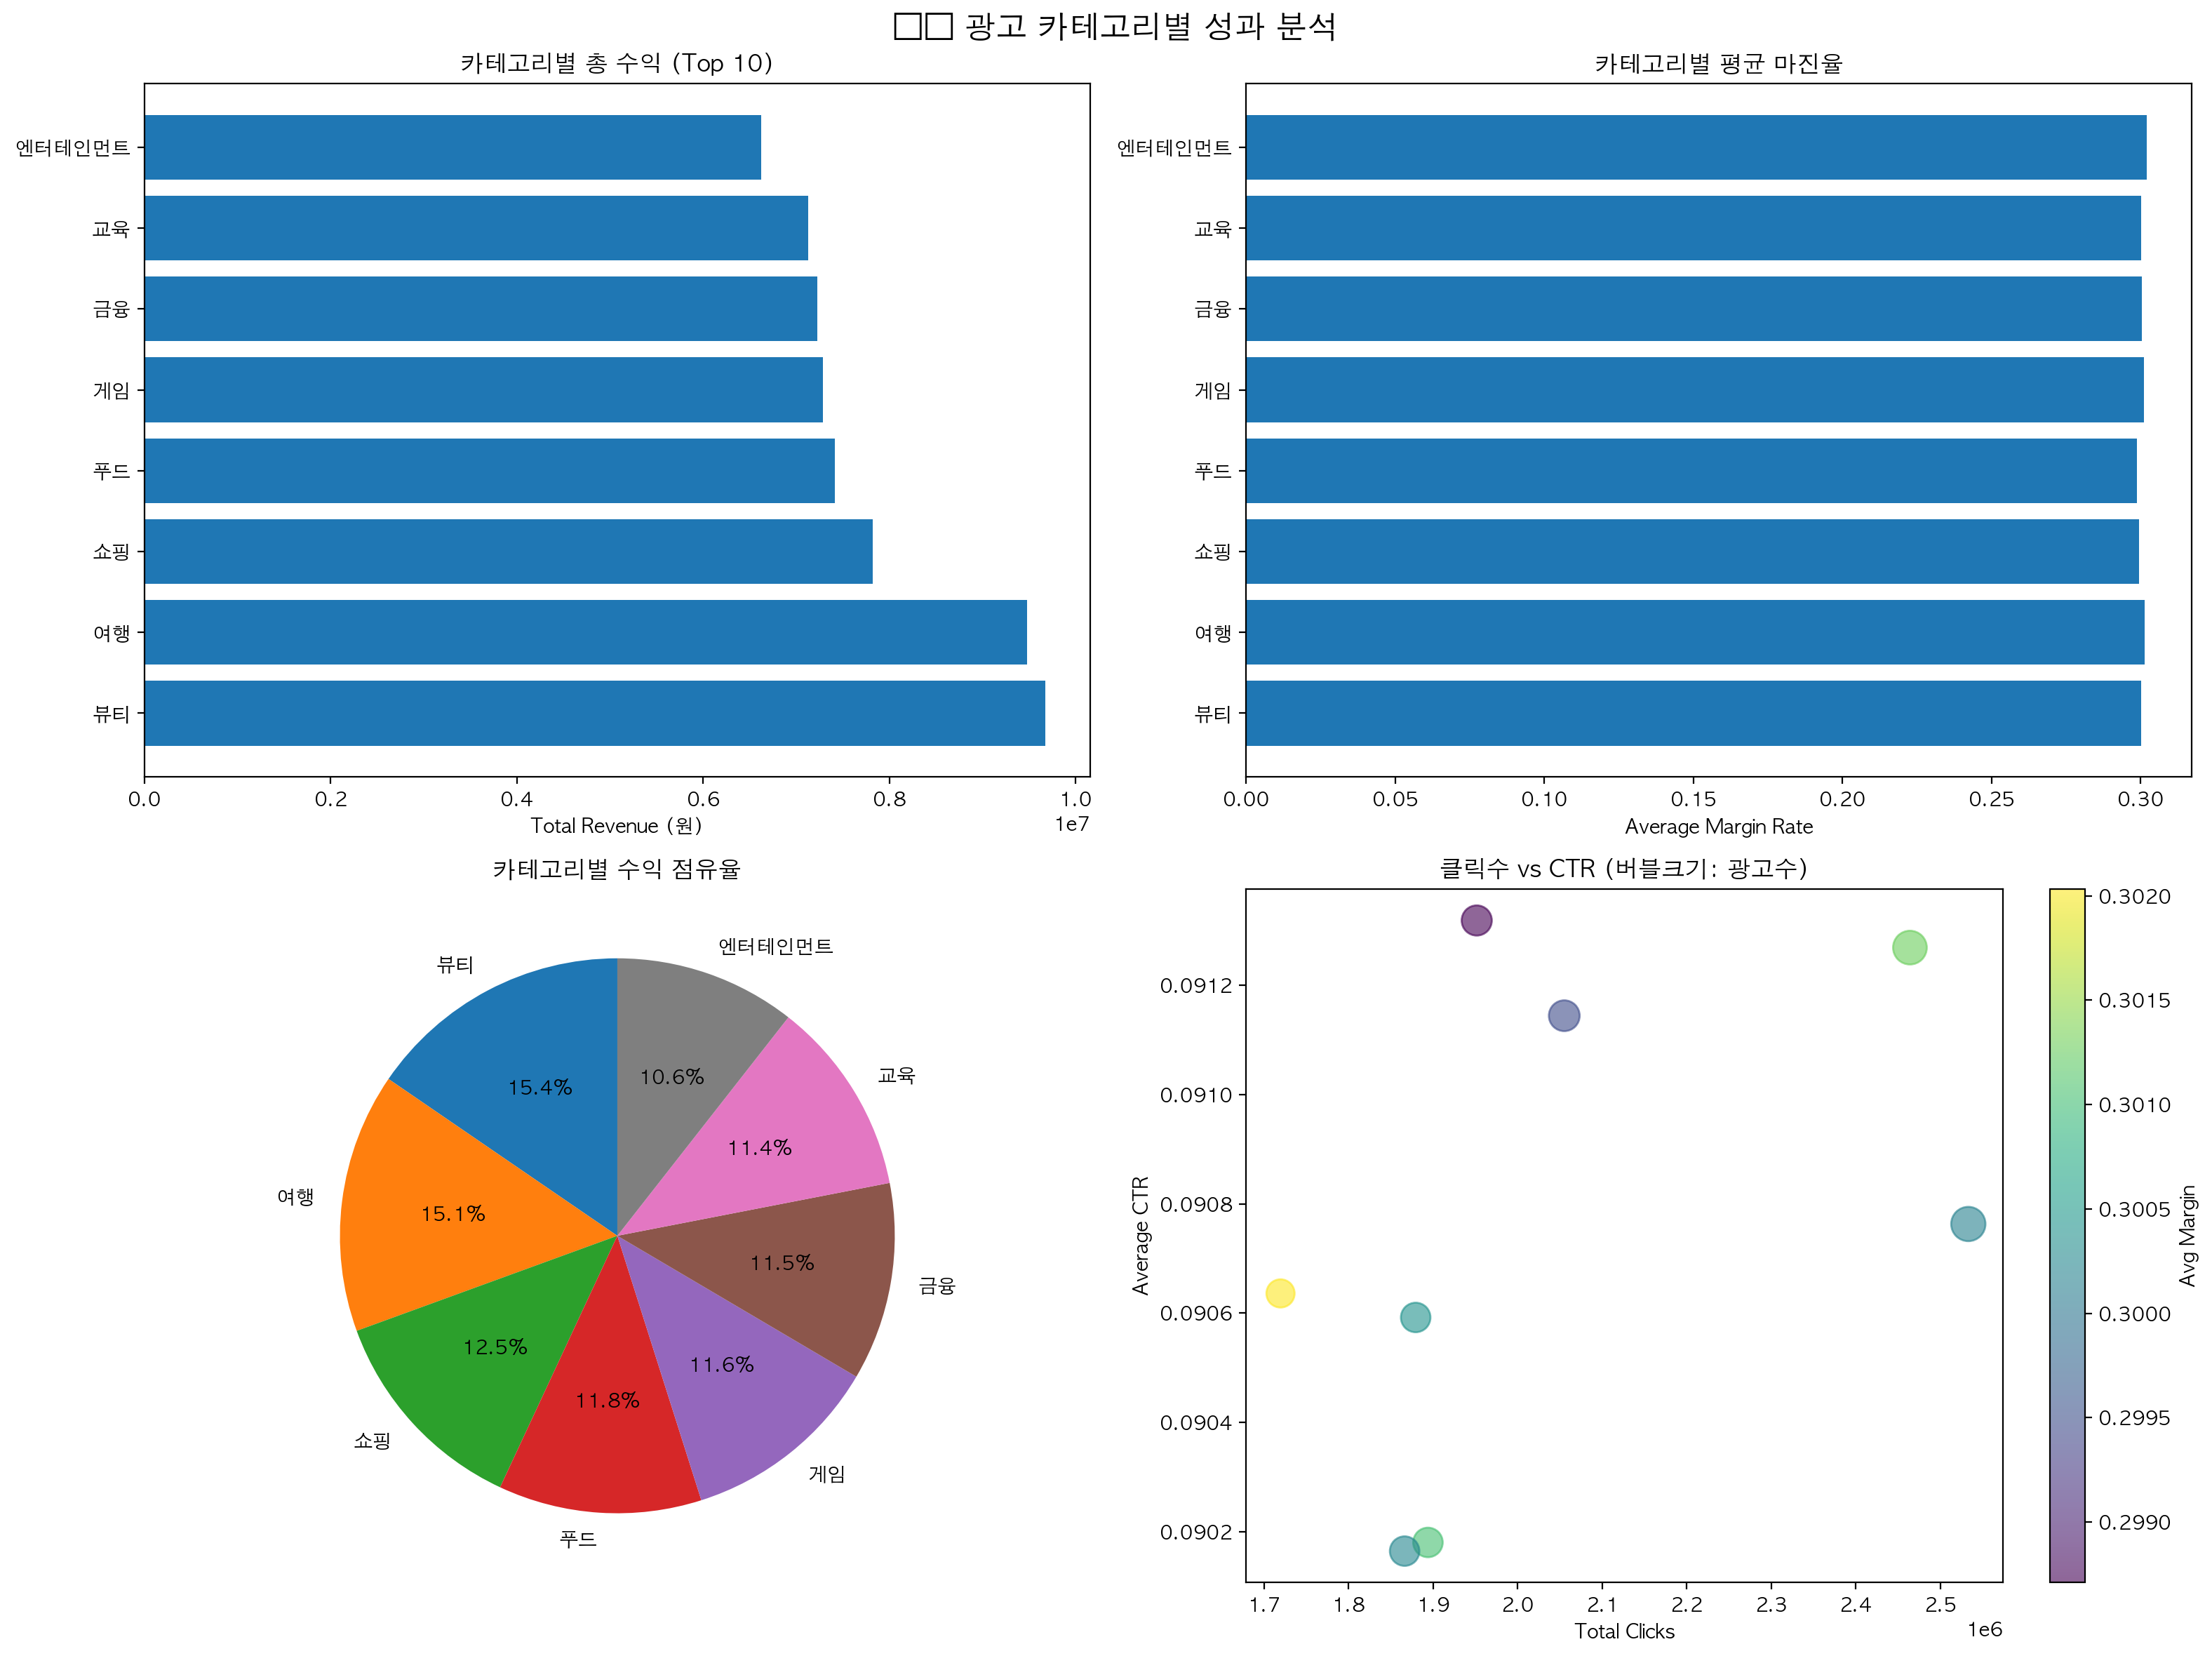

📊 카테고리 요약:
   총 카테고리 수: 8개
   가장 수익성 높은 카테고리: 뷰티
   가장 많은 광고 카테고리: 뷰티

🎯 인사이트 및 추천 전략
🔍 주요 인사이트:
   1. ✅ 수익성 광고 비율이 100.0%로 양호
   2. 🏆 최고 성과 카테고리: 뷰티 (수익: 9,673,663원)
   3. 📉 최저 성과 카테고리: 엔터테인먼트 (수익: 6,625,005원)

💡 추천 전략:
   1. 🎯 고마진 카테고리 (게임, 엔터테인먼트, 여행) 우선 추천
   2. 📈 고성과 매체사 (9개)에 프리미엄 광고 집중
   3. 🔄 실시간 성과 모니터링을 통한 동적 추천 알고리즘 구현
   4. 📊 A/B 테스트를 통한 추천 로직 지속적 개선

🎯 추천 시스템 핵심 피처:
   • platform_revenue: 플랫폼 수익 - 최우선 최적화 목표
   • margin_rate: 마진율 - 수익성 판단 기준
   • ctr: CTR - 광고 품질 지표
   • cpc: CPC - 비용 효율성
   • ads_category: 광고 카테고리 - 매체 적합성
   • mda_idx: 매체사 ID - 성과 이력 기반 추천

✅ 완전 분석 완료!

🎉 분석 완료! 결과 요약:
   - 성과 데이터: 6,000 개 광고-매체 조합
   - 매체사 분석: 30 개 매체사
   - 카테고리 분석: 8 개 카테고리
   - 인사이트: 3개
   - 추천사항: 4개


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트
plt.rc("font", family = 'AppleGothic')
plt.rc("axes", unicode_minus = False)

# 글씨 선명하게
set_matplotlib_formats("retina")

class CompleteAdEDA:
    def __init__(self):
        self.ads_list = None
        self.ads_time = None
        self.ads_rwd = None
        self.ads_info = None
        self.ads_join = None
        
    def load_data_from_files(self, file_paths):
        """파일에서 데이터 로드"""
        print("📁 데이터 파일 로드 시작...")
        
        try:
            self.ads_list = pd.read_csv(file_paths['ads_list'])
            print(f"✅ ads_list 로드 완료: {self.ads_list.shape}")
            
            self.ads_time = pd.read_csv(file_paths['ads_time'])
            print(f"✅ ads_time 로드 완료: {self.ads_time.shape}")
            
            self.ads_rwd = pd.read_csv(file_paths['ads_rwd'])
            print(f"✅ ads_rwd 로드 완료: {self.ads_rwd.shape}")
            
            self.ads_info = pd.read_csv(file_paths['ads_info'])
            print(f"✅ ads_info 로드 완료: {self.ads_info.shape}")
            
            self.ads_join = pd.read_csv(file_paths['ads_join'])
            print(f"✅ ads_join 로드 완료: {self.ads_join.shape}")
            
            print("\n🎉 모든 데이터 로드 완료!")
            return True
            
        except Exception as e:
            print(f"❌ 데이터 로드 실패: {e}")
            return False
    
    def load_data_from_db(self, connection, table_queries=None):
        """데이터베이스에서 데이터 로드"""
        print("🗄️ 데이터베이스에서 데이터 로드 시작...")
        
        try:
            if table_queries is None:
                # 기본 쿼리
                table_queries = {
                    'ads_list': 'SELECT * FROM ads_list',
                    'ads_time': 'SELECT * FROM ads_time',
                    'ads_rwd': 'SELECT * FROM ads_rwd', 
                    'ads_info': 'SELECT * FROM ads_info',
                    'ads_join': 'SELECT * FROM ads_join'
                }
            
            self.ads_list = pd.read_sql(table_queries['ads_list'], connection)
            print(f"✅ ads_list 로드 완료: {self.ads_list.shape}")
            
            self.ads_time = pd.read_sql(table_queries['ads_time'], connection)
            print(f"✅ ads_time 로드 완료: {self.ads_time.shape}")
            
            self.ads_rwd = pd.read_sql(table_queries['ads_rwd'], connection)
            print(f"✅ ads_rwd 로드 완료: {self.ads_rwd.shape}")
            
            self.ads_info = pd.read_sql(table_queries['ads_info'], connection)
            print(f"✅ ads_info 로드 완료: {self.ads_info.shape}")
            
            self.ads_join = pd.read_sql(table_queries['ads_join'], connection)
            print(f"✅ ads_join 로드 완료: {self.ads_join.shape}")
            
            print("\n🎉 모든 데이터 로드 완료!")
            return True
            
        except Exception as e:
            print(f"❌ 데이터베이스 로드 실패: {e}")
            return False
    
    def data_overview(self):
        """데이터 개요 및 품질 체크"""
        print("\n" + "="*60)
        print("📊 데이터 개요 및 품질 체크")
        print("="*60)
        
        tables = {
            'ads_list': self.ads_list,
            'ads_time': self.ads_time,
            'ads_rwd': self.ads_rwd,
            'ads_info': self.ads_info,
            'ads_join': self.ads_join
        }
        
        for name, df in tables.items():
            print(f"\n📋 {name.upper()}:")
            print(f"   Shape: {df.shape}")
            print(f"   Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
            print(f"   결측값: {df.isnull().sum().sum():,} 개")
            print(f"   중복값: {df.duplicated().sum():,} 개")
            
            # 주요 컬럼 데이터 타입
            numeric_cols = df.select_dtypes(include=[np.number]).columns
            if len(numeric_cols) > 0:
                print(f"   수치형 컬럼: {len(numeric_cols)}개")
            
            # ads_time 특별 체크 (수익 구조)
            if name == 'ads_time':
                print(f"\n   💰 수익 구조 체크:")
                if 'rpt_time_acost' in df.columns and 'rpt_time_earn' in df.columns:
                    platform_revenue = df['rpt_time_acost'] - df['rpt_time_earn']
                    print(f"   - 총 광고주 지불액: {df['rpt_time_acost'].sum():,.0f}")
                    print(f"   - 총 유저 리워드: {df['rpt_time_earn'].sum():,.0f}")
                    print(f"   - 총 플랫폼 수익: {platform_revenue.sum():,.0f}")
                    print(f"   - 평균 마진율: {(platform_revenue.sum() / df['rpt_time_acost'].sum() * 100):.1f}%")
                    print(f"   - 수익성 레코드 비율: {(platform_revenue > 0).mean():.1%}")
    
    def create_core_metrics(self):
        """핵심 지표 생성"""
        print("\n" + "="*60)
        print("🎯 핵심 성과 지표 생성")
        print("="*60)
        
        # 광고-매체별 성과 집계
        performance = self.ads_time.groupby(['ads_idx', 'mda_idx']).agg({
            'rpt_time_clk': 'sum',      # 총 클릭수
            'rpt_time_turn': 'sum',     # 총 전환수
            'rpt_time_acost': 'sum',    # 총 광고주 지불액
            'rpt_time_earn': 'sum'      # 총 유저 리워드
        }).reset_index()
        
        # 핵심 파생 지표
        performance['ctr'] = np.where(performance['rpt_time_clk'] > 0,
                                    performance['rpt_time_turn'] / performance['rpt_time_clk'], 0)
        performance['platform_revenue'] = performance['rpt_time_acost'] - performance['rpt_time_earn']
        performance['margin_rate'] = np.where(performance['rpt_time_acost'] > 0,
                                            performance['platform_revenue'] / performance['rpt_time_acost'], 0)
        performance['cpc'] = np.where(performance['rpt_time_clk'] > 0,
                                    performance['rpt_time_acost'] / performance['rpt_time_clk'], 0)
        performance['cpa'] = np.where(performance['rpt_time_turn'] > 0,
                                    performance['rpt_time_acost'] / performance['rpt_time_turn'], 0)
        
        print(f"✅ 성과 지표 생성 완료: {len(performance):,} 개 광고-매체 조합")
        
        # 핵심 지표 요약
        print(f"\n📈 핵심 지표 요약:")
        print(f"   평균 CTR: {performance['ctr'].mean():.2%}")
        print(f"   평균 마진율: {performance['margin_rate'].mean():.1%}")
        print(f"   평균 CPC: {performance['cpc'].mean():.0f}원")
        print(f"   평균 CPA: {performance['cpa'].mean():.0f}원")
        print(f"   수익성 광고-매체 조합: {(performance['platform_revenue'] > 0).mean():.1%}")
        
        return performance
    
    def analyze_revenue_performance(self, performance):
        """수익성 성과 분석"""
        print("\n" + "="*60)
        print("💰 수익성 성과 분석")
        print("="*60)
        
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        fig.suptitle('💰 수익성 성과 분석', fontsize=16, fontweight='bold')
        
        # 1. 플랫폼 수익 분포
        revenue_data = performance['platform_revenue']
        axes[0,0].hist(revenue_data, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0,0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='손익분기점')
        axes[0,0].axvline(x=revenue_data.mean(), color='orange', linestyle='-', linewidth=2, label=f'평균: {revenue_data.mean():,.0f}')
        axes[0,0].set_title('플랫폼 수익 분포')
        axes[0,0].set_xlabel('Platform Revenue (원)')
        axes[0,0].set_ylabel('Frequency')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
        
        # 2. 마진율 분포
        margin_filtered = performance[performance['margin_rate'].between(0, 1)]['margin_rate']
        axes[0,1].hist(margin_filtered, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
        axes[0,1].axvline(x=margin_filtered.mean(), color='red', linestyle='-', linewidth=2, 
                         label=f'평균: {margin_filtered.mean():.1%}')
        axes[0,1].set_title('마진율 분포 (0-100%)')
        axes[0,1].set_xlabel('Margin Rate')
        axes[0,1].set_ylabel('Frequency')
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)
        
        # 3. 광고주 지불 vs 유저 리워드
        sample_data = performance.sample(min(1000, len(performance)))  # 샘플링으로 속도 향상
        scatter = axes[0,2].scatter(sample_data['rpt_time_acost'], sample_data['rpt_time_earn'], 
                                  c=sample_data['margin_rate'], cmap='RdYlGn', alpha=0.6, s=20)
        max_val = max(sample_data['rpt_time_acost'].max(), sample_data['rpt_time_earn'].max())
        axes[0,2].plot([0, max_val], [0, max_val], 'r--', alpha=0.7, linewidth=2, label='손익분기선')
        axes[0,2].set_title('광고주 지불 vs 유저 리워드')
        axes[0,2].set_xlabel('Advertiser Cost (원)')
        axes[0,2].set_ylabel('User Reward (원)')
        axes[0,2].legend()
        plt.colorbar(scatter, ax=axes[0,2], label='Margin Rate')
        
        # 4. CPC 분포
        cpc_filtered = performance[performance['cpc'] <= performance['cpc'].quantile(0.95)]['cpc']
        axes[1,0].hist(cpc_filtered, bins=50, alpha=0.7, color='coral', edgecolor='black')
        axes[1,0].axvline(x=cpc_filtered.mean(), color='blue', linestyle='-', linewidth=2,
                         label=f'평균: {cpc_filtered.mean():.0f}원')
        axes[1,0].set_title('CPC 분포 (95% 이하)')
        axes[1,0].set_xlabel('Cost Per Click (원)')
        axes[1,0].set_ylabel('Frequency')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)
        
        # 5. CTR vs 마진율 관계
        sample_ctr = performance.sample(min(1000, len(performance)))
        valid_data = sample_ctr[(sample_ctr['margin_rate'] <= 1) & (sample_ctr['ctr'] <= 1)]
        axes[1,1].scatter(valid_data['ctr'], valid_data['margin_rate'], alpha=0.6, color='purple', s=20)
        axes[1,1].set_title('CTR vs 마진율 관계')
        axes[1,1].set_xlabel('CTR')
        axes[1,1].set_ylabel('Margin Rate')
        axes[1,1].grid(True, alpha=0.3)
        
        # 6. 수익성 세분화 (파이차트)
        revenue_segments = pd.cut(performance['platform_revenue'], 
                                bins=[-np.inf, 0, 1000, 5000, np.inf],
                                labels=['손실', '저수익', '중수익', '고수익'])
        segment_counts = revenue_segments.value_counts()
        colors = ['red', 'orange', 'lightblue', 'green']
        axes[1,2].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', 
                     colors=colors, startangle=90)
        axes[1,2].set_title('수익성 세분화')
        
        plt.tight_layout()
        plt.show()
        
        # 수익성 요약 출력
        print(f"📊 수익성 요약:")
        print(f"   총 플랫폼 수익: {performance['platform_revenue'].sum():,.0f}원")
        print(f"   평균 플랫폼 수익: {performance['platform_revenue'].mean():,.0f}원")
        print(f"   수익성 비율: {(performance['platform_revenue'] > 0).mean():.1%}")
        print(f"   최고 수익: {performance['platform_revenue'].max():,.0f}원")
        print(f"   최저 수익: {performance['platform_revenue'].min():,.0f}원")
        
        return performance
    
    def analyze_media_performance(self, performance):
        """매체사별 성과 분석"""
        print("\n" + "="*60)
        print("📺 매체사별 성과 분석")
        print("="*60)
        
        # 매체사별 집계
        media_perf = performance.groupby('mda_idx').agg({
            'ads_idx': 'nunique',           # 고유 광고수
            'rpt_time_clk': 'sum',          # 총 클릭수
            'rpt_time_turn': 'sum',         # 총 전환수
            'platform_revenue': 'sum',     # 총 플랫폼 수익
            'margin_rate': 'mean',          # 평균 마진율
            'ctr': 'mean',                  # 평균 CTR
            'cpc': 'mean',                  # 평균 CPC
        }).reset_index()
        
        media_perf.columns = ['media_id', 'unique_ads', 'total_clicks', 'total_conversions', 
                             'total_revenue', 'avg_margin', 'avg_ctr', 'avg_cpc']
        
        # 상위 매체사 (수익 기준)
        top_media = media_perf.nlargest(15, 'total_revenue')
        
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        fig.suptitle('📺 매체사별 성과 분석', fontsize=16, fontweight='bold')
        
        # 1. 매체사별 수익 순위
        axes[0,0].barh(range(len(top_media)), top_media['total_revenue'], color='skyblue')
        axes[0,0].set_title('매체사별 총 수익 (Top 15)')
        axes[0,0].set_yticks(range(len(top_media)))
        axes[0,0].set_yticklabels([f'Media_{int(x)}' for x in top_media['media_id']])
        axes[0,0].set_xlabel('Total Revenue (원)')
        
        # 2. 매체사별 마진율
        margin_data = top_media[top_media['avg_margin'] <= 1]
        axes[0,1].barh(range(len(margin_data)), margin_data['avg_margin'], color='lightgreen')
        axes[0,1].set_title('매체사별 평균 마진율 (Top 15)')
        axes[0,1].set_yticks(range(len(margin_data)))
        axes[0,1].set_yticklabels([f'Media_{int(x)}' for x in margin_data['media_id']])
        axes[0,1].set_xlabel('Average Margin Rate')
        
        # 3. 클릭수 vs 수익 (버블차트)
        scatter = axes[0,2].scatter(media_perf['total_clicks'], media_perf['total_revenue'],
                                  s=media_perf['unique_ads']*2, alpha=0.6, 
                                  c=media_perf['avg_margin'], cmap='viridis')
        axes[0,2].set_title('클릭수 vs 수익 (버블크기: 광고수)')
        axes[0,2].set_xlabel('Total Clicks')
        axes[0,2].set_ylabel('Total Revenue (원)')
        plt.colorbar(scatter, ax=axes[0,2], label='Avg Margin')
        
        # 4. 매체사 수익 분포
        axes[1,0].hist(media_perf['total_revenue'], bins=30, alpha=0.7, color='coral')
        axes[1,0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='손익분기점')
        axes[1,0].set_title('매체사 수익 분포')
        axes[1,0].set_xlabel('Total Revenue (원)')
        axes[1,0].set_ylabel('Frequency')
        axes[1,0].legend()
        
        # 5. CTR vs CPC 관계
        valid_media = media_perf[(media_perf['avg_ctr'] <= 1) & (media_perf['avg_cpc'] <= media_perf['avg_cpc'].quantile(0.95))]
        axes[1,1].scatter(valid_media['avg_ctr'], valid_media['avg_cpc'], alpha=0.6, color='purple')
        axes[1,1].set_title('매체사별 CTR vs CPC')
        axes[1,1].set_xlabel('Average CTR')
        axes[1,1].set_ylabel('Average CPC (원)')
        
        # 6. 매체사 성과 등급
        media_perf['performance_grade'] = pd.qcut(media_perf['total_revenue'], 
                                                q=4, labels=['D', 'C', 'B', 'A'])
        grade_counts = media_perf['performance_grade'].value_counts()
        axes[1,2].pie(grade_counts.values, labels=grade_counts.index, autopct='%1.1f%%',
                     colors=['red', 'orange', 'lightblue', 'green'])
        axes[1,2].set_title('매체사 성과 등급 분포')
        
        plt.tight_layout()
        plt.show()
        
        # 매체사 요약 통계
        print(f"📊 매체사 요약:")
        print(f"   총 매체사 수: {len(media_perf):,}개")
        print(f"   수익성 매체사: {(media_perf['total_revenue'] > 0).sum():,}개 ({(media_perf['total_revenue'] > 0).mean():.1%})")
        print(f"   평균 매체사 수익: {media_perf['total_revenue'].mean():,.0f}원")
        print(f"   Top 10% 매체사 수익 점유율: {media_perf.nlargest(int(len(media_perf)*0.1), 'total_revenue')['total_revenue'].sum() / media_perf['total_revenue'].sum():.1%}")
        
        return media_perf
    
    def analyze_ad_categories(self, performance):
        """광고 카테고리별 분석"""
        print("\n" + "="*60)
        print("🏷️ 광고 카테고리별 성과 분석")
        print("="*60)
        
        # 성과 데이터와 광고 정보 결합
        category_data = performance.merge(
            self.ads_list[['ads_idx', 'ads_category', 'ads_type', 'ads_contract_price']], 
            on='ads_idx', how='left'
        )
        
        # 카테고리별 집계
        category_perf = category_data.groupby('ads_category').agg({
            'ads_idx': 'nunique',               # 고유 광고수
            'platform_revenue': 'sum',         # 총 수익
            'rpt_time_clk': 'sum',             # 총 클릭수
            'margin_rate': 'mean',              # 평균 마진율
            'ctr': 'mean',                      # 평균 CTR
            'cpc': 'mean'                       # 평균 CPC
        }).reset_index()
        
        category_perf.columns = ['category', 'ad_count', 'total_revenue', 'total_clicks', 
                               'avg_margin', 'avg_ctr', 'avg_cpc']
        
        # 상위 카테고리
        top_categories = category_perf.nlargest(10, 'total_revenue')
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('🏷️ 광고 카테고리별 성과 분석', fontsize=16, fontweight='bold')
        
        # 1. 카테고리별 수익
        axes[0,0].barh(range(len(top_categories)), top_categories['total_revenue'])
        axes[0,0].set_title('카테고리별 총 수익 (Top 10)')
        axes[0,0].set_yticks(range(len(top_categories)))
        axes[0,0].set_yticklabels(top_categories['category'], fontsize=10)
        axes[0,0].set_xlabel('Total Revenue (원)')
        
        # 2. 카테고리별 마진율
        margin_cats = top_categories[top_categories['avg_margin'] <= 1]
        axes[0,1].barh(range(len(margin_cats)), margin_cats['avg_margin'])
        axes[0,1].set_title('카테고리별 평균 마진율')
        axes[0,1].set_yticks(range(len(margin_cats)))
        axes[0,1].set_yticklabels(margin_cats['category'], fontsize=10)
        axes[0,1].set_xlabel('Average Margin Rate')
        
        # 3. 수익 점유율 파이차트
        axes[1,0].pie(top_categories['total_revenue'], labels=top_categories['category'], 
                     autopct='%1.1f%%', startangle=90)
        axes[1,0].set_title('카테고리별 수익 점유율')
        
        # 4. 클릭수 vs CTR 버블차트
        scatter = axes[1,1].scatter(category_perf['total_clicks'], category_perf['avg_ctr'],
                                  s=category_perf['ad_count']*10, alpha=0.6, 
                                  c=category_perf['avg_margin'], cmap='viridis')
        axes[1,1].set_title('클릭수 vs CTR (버블크기: 광고수)')
        axes[1,1].set_xlabel('Total Clicks')
        axes[1,1].set_ylabel('Average CTR')
        plt.colorbar(scatter, ax=axes[1,1], label='Avg Margin')
        
        plt.tight_layout()
        plt.show()
        
        print(f"📊 카테고리 요약:")
        print(f"   총 카테고리 수: {len(category_perf)}개")
        print(f"   가장 수익성 높은 카테고리: {category_perf.loc[category_perf['total_revenue'].idxmax(), 'category']}")
        print(f"   가장 많은 광고 카테고리: {category_perf.loc[category_perf['ad_count'].idxmax(), 'category']}")
        
        return category_perf
    
    def generate_insights_and_recommendations(self, performance, media_perf, category_perf):
        """인사이트 및 추천 전략 생성"""
        print("\n" + "="*60)
        print("🎯 인사이트 및 추천 전략")
        print("="*60)
        
        insights = []
        recommendations = []
        
        # 1. 수익성 인사이트
        profit_ratio = (performance['platform_revenue'] > 0).mean()
        avg_margin = performance['margin_rate'].mean()
        
        if profit_ratio < 0.5:
            insights.append(f"⚠️ 수익성 광고 비율이 {profit_ratio:.1%}로 낮음")
            recommendations.append("💡 손실 광고 식별 및 중단/최적화 필요")
        else:
            insights.append(f"✅ 수익성 광고 비율이 {profit_ratio:.1%}로 양호")
        
        # 2. 매체사 집중도 분석
        top_10_media_revenue = media_perf.nlargest(10, 'total_revenue')['total_revenue'].sum()
        total_revenue = media_perf['total_revenue'].sum()
        concentration = top_10_media_revenue / total_revenue
        
        if concentration > 0.8:
            insights.append(f"⚠️ 상위 10개 매체사가 전체 수익의 {concentration:.1%} 차지 (높은 집중도)")
            recommendations.append("💡 매체사 다변화를 통한 리스크 분산 필요")
        
        # 3. 카테고리 성과 분석
        best_category = category_perf.loc[category_perf['total_revenue'].idxmax()]
        worst_category = category_perf.loc[category_perf['total_revenue'].idxmin()]
        
        insights.append(f"🏆 최고 성과 카테고리: {best_category['category']} (수익: {best_category['total_revenue']:,.0f}원)")
        insights.append(f"📉 최저 성과 카테고리: {worst_category['category']} (수익: {worst_category['total_revenue']:,.0f}원)")
        
        # 4. 추천 시스템 전략
        high_margin_categories = category_perf[category_perf['avg_margin'] > category_perf['avg_margin'].quantile(0.7)]
        high_performing_media = media_perf[media_perf['total_revenue'] > media_perf['total_revenue'].quantile(0.7)]
        
        recommendations.extend([
            f"🎯 고마진 카테고리 ({', '.join(high_margin_categories['category'].head(3))}) 우선 추천",
            f"📈 고성과 매체사 ({len(high_performing_media)}개)에 프리미엄 광고 집중",
            "🔄 실시간 성과 모니터링을 통한 동적 추천 알고리즘 구현",
            "📊 A/B 테스트를 통한 추천 로직 지속적 개선"
        ])
        
        # 인사이트 출력
        print("🔍 주요 인사이트:")
        for i, insight in enumerate(insights, 1):
            print(f"   {i}. {insight}")
        
        print(f"\n💡 추천 전략:")
        for i, rec in enumerate(recommendations, 1):
            print(f"   {i}. {rec}")
        
        # 추천 시스템 피처 중요도
        feature_importance = {
            'platform_revenue': '플랫폼 수익 - 최우선 최적화 목표',
            'margin_rate': '마진율 - 수익성 판단 기준',
            'ctr': 'CTR - 광고 품질 지표',
            'cpc': 'CPC - 비용 효율성',
            'ads_category': '광고 카테고리 - 매체 적합성',
            'mda_idx': '매체사 ID - 성과 이력 기반 추천'
        }
        
        print(f"\n🎯 추천 시스템 핵심 피처:")
        for feature, description in feature_importance.items():
            print(f"   • {feature}: {description}")
        
        return insights, recommendations
    
    def run_complete_analysis(self):
        """전체 분석 실행"""
        print("🚀 광고 플랫폼 완전 분석 시작!")
        print("="*80)
        
        # 1. 데이터 개요
        self.data_overview()
        
        # 2. 핵심 지표 생성
        performance = self.create_core_metrics()
        
        # 3. 수익성 분석
        performance = self.analyze_revenue_performance(performance)
        
        # 4. 매체사별 분석
        media_perf = self.analyze_media_performance(performance)
        
        # 5. 카테고리별 분석
        category_perf = self.analyze_ad_categories(performance)
        
        # 6. 인사이트 및 추천 전략
        insights, recommendations = self.generate_insights_and_recommendations(
            performance, media_perf, category_perf
        )
        
        print("\n" + "="*80)
        print("✅ 완전 분석 완료!")
        print("="*80)
        
        return {
            'performance': performance,
            'media_analysis': media_perf,
            'category_analysis': category_perf,
            'insights': insights,
            'recommendations': recommendations
        }

# =============================================================================
# 실행 함수들
# =============================================================================

def run_analysis_from_csv(file_paths):
    """CSV 파일에서 데이터 로드하여 분석 실행"""
    print("📁 CSV 파일에서 분석 시작!")
    
    analyzer = CompleteAdEDA()
    
    if analyzer.load_data_from_files(file_paths):
        results = analyzer.run_complete_analysis()
        return analyzer, results
    else:
        print("❌ 데이터 로드 실패")
        return None, None

def run_analysis_from_db(connection, queries=None):
    """데이터베이스에서 데이터 로드하여 분석 실행"""
    print("🗄️ 데이터베이스에서 분석 시작!")
    
    analyzer = CompleteAdEDA()
    
    if analyzer.load_data_from_db(connection, queries):
        results = analyzer.run_complete_analysis()
        return analyzer, results
    else:
        print("❌ 데이터베이스 연결 실패")
        return None, None

def create_sample_analysis():
    """샘플 데이터로 분석 데모"""
    print("🎬 샘플 데이터로 분석 데모 시작!")
    
    # 샘플 데이터 생성
    np.random.seed(42)
    
    # ads_list
    ads_list = pd.DataFrame({
        'ads_idx': range(1, 201),
        'ads_category': np.random.choice(['게임', '쇼핑', '금융', '여행', '교육', '엔터테인먼트', '뷰티', '푸드'], 200),
        'ads_type': np.random.choice(['CPI', 'CPA', 'CPE', 'CPC'], 200),
        'ads_contract_price': np.random.lognormal(7, 0.5, 200),
        'ads_reward_price': np.random.lognormal(6.5, 0.5, 200)
    })
    
    # ads_time (더 현실적인 데이터)
    ads_time_data = []
    dates = pd.date_range('2024-01-01', '2024-06-30', freq='D')
    
    for date in dates:
        for ads_idx in range(1, 201):
            for mda_idx in range(1, 31):  # 30개 매체사
                if np.random.random() > 0.85:  # 15% 확률로 데이터 생성
                    # 현실적인 성과 데이터
                    base_clicks = np.random.poisson(100)
                    if base_clicks > 0:
                        ctr = np.random.beta(2, 20)  # 현실적인 CTR (평균 ~8%)
                        conversions = np.random.binomial(base_clicks, ctr)
                        
                        # 단가 설정 (현실적인 범위)
                        cpc_base = np.random.lognormal(2.5, 0.3)  # 평균 ~15원
                        acost = base_clicks * cpc_base
                        
                        # 유저 리워드 (플랫폼이 마진 남김)
                        margin_rate = np.random.beta(3, 7)  # 평균 ~30% 마진
                        earn = acost * (1 - margin_rate)
                        
                        ads_time_data.append({
                            'rpt_time_date': date.strftime('%Y-%m-%d'),
                            'ads_idx': ads_idx,
                            'mda_idx': mda_idx,
                            'rpt_time_clk': base_clicks,
                            'rpt_time_turn': conversions,
                            'rpt_time_acost': acost,
                            'rpt_time_earn': earn,
                            'weekday': date.strftime('%A'),
                            'week_type': 'Weekend' if date.weekday() >= 5 else 'Weekday'
                        })
    
    ads_time = pd.DataFrame(ads_time_data)
    
    # 더미 데이터 (분석에 직접적으로 사용되지 않음)
    ads_rwd = pd.DataFrame({
        'rwd_idx': range(1000),
        'ads_idx': np.random.randint(1, 201, 1000)
    })
    
    ads_info = pd.DataFrame({
        'click_key': range(1000),
        'ads_idx': np.random.randint(1, 201, 1000)
    })
    
    ads_join = ads_info.copy()
    
    print(f"✅ 샘플 데이터 생성 완료!")
    print(f"   - ads_list: {ads_list.shape}")
    print(f"   - ads_time: {ads_time.shape} (실제 성과 데이터)")
    
    # 분석 실행
    analyzer = CompleteAdEDA()
    analyzer.ads_list = ads_list
    analyzer.ads_time = ads_time
    analyzer.ads_rwd = ads_rwd
    analyzer.ads_info = ads_info
    analyzer.ads_join = ads_join
    
    results = analyzer.run_complete_analysis()
    
    return analyzer, results

# =============================================================================
# 실행 예시 및 사용법
# =============================================================================

def main():
    """메인 실행 함수 - 사용법 안내"""
    print("🎯 광고 플랫폼 완전 분석기")
    print("="*50)
    print()
    print("📋 사용법:")
    print()
    print("1️⃣ CSV 파일에서 분석:")
    print("   file_paths = {")
    print("       'ads_list': 'path/to/ads_list.csv',")
    print("       'ads_time': 'path/to/ads_time.csv',")
    print("       'ads_rwd': 'path/to/ads_rwd.csv',")
    print("       'ads_info': 'path/to/ads_info.csv',")
    print("       'ads_join': 'path/to/ads_join.csv'")
    print("   }")
    print("   analyzer, results = run_analysis_from_csv(file_paths)")
    print()
    print("2️⃣ 데이터베이스에서 분석:")
    print("   import sqlite3")
    print("   conn = sqlite3.connect('your_database.db')")
    print("   analyzer, results = run_analysis_from_db(conn)")
    print()
    print("3️⃣ 샘플 데이터로 데모:")
    print("   analyzer, results = create_sample_analysis()")
    print()
    print("🚀 샘플 분석을 바로 실행하려면 아래 코드를 실행하세요:")
    print("   analyzer, results = create_sample_analysis()")

if __name__ == "__main__":
    # 사용법 안내
    main()
    
    print("\n" + "="*50)
    print("🎬 샘플 분석 자동 실행!")
    print("="*50)
    
    # 샘플 분석 자동 실행
    analyzer, results = create_sample_analysis()
    
    if results:
        print(f"\n🎉 분석 완료! 결과 요약:")
        print(f"   - 성과 데이터: {len(results['performance']):,} 개 광고-매체 조합")
        print(f"   - 매체사 분석: {len(results['media_analysis']):,} 개 매체사")
        print(f"   - 카테고리 분석: {len(results['category_analysis']):,} 개 카테고리")
        print(f"   - 인사이트: {len(results['insights'])}개")
        print(f"   - 추천사항: {len(results['recommendations'])}개")

In [32]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# XGBoost와 LightGBM은 설치가 필요할 수 있습니다
try:
    import xgboost as xgb
    HAS_XGB = True
except ImportError:
    HAS_XGB = False
    print("XGBoost가 설치되지 않았습니다. pip install xgboost로 설치 가능합니다.")

try:
    import lightgbm as lgb
    HAS_LGB = True
except ImportError:
    HAS_LGB = False
    print("LightGBM이 설치되지 않았습니다. pip install lightgbm으로 설치 가능합니다.")

warnings.filterwarnings('ignore')

class AdRecommendationFeatureEngine:
    def __init__(self):
        self.ads_list = None
        self.ads_time = None
        self.ads_info = None
        self.ads_join = None
        
    def load_data(self, ads_list_path='ads_list', ads_time_path='ads_time', 
                  ads_info_path='ads_info', ads_join_path='ads_join'):
        """CSV 파일들을 로드"""
        print("데이터 로딩 중...")
        
        try:
            self.ads_list = ads_list
            print(f"✓ ads_list 로드: {self.ads_list.shape}")
        except FileNotFoundError:
            print(f"❌ 파일을 찾을 수 없습니다: {ads_list_path}")
            return False
            
        try:
            self.ads_time = ads_time
            print(f"✓ ads_time 로드: {self.ads_time.shape}")
        except FileNotFoundError:
            print(f"❌ 파일을 찾을 수 없습니다: {ads_time_path}")
            return False
            
        try:
            self.ads_info = ads_info
            print(f"✓ ads_info 로드: {self.ads_info.shape}")
        except FileNotFoundError:
            print(f"❌ 파일을 찾을 수 없습니다: {ads_info_path}")
            return False
            
        try:
            self.ads_join = ads_join
            print(f"✓ ads_join 로드: {self.ads_join.shape}")
        except FileNotFoundError:
            print(f"❌ 파일을 찾을 수 없습니다: {ads_join_path}")
            return False
        
        # 데이터 기본 정보 출력
        self.print_data_info()
        
        # 날짜 컬럼 처리
        self._preprocess_dates()
        print("✓ 데이터 로딩 완료!")
        return True
    
    def print_data_info(self):
        """데이터 기본 정보 출력"""
        print("\n" + "="*60)
        print("📊 데이터 기본 정보")
        print("="*60)
        
        # 각 테이블의 컬럼 정보
        print(f"ads_list 컬럼 ({len(self.ads_list.columns)}개): {list(self.ads_list.columns)}")
        print(f"ads_time 컬럼 ({len(self.ads_time.columns)}개): {list(self.ads_time.columns)}")
        print(f"ads_info 컬럼 ({len(self.ads_info.columns)}개): {list(self.ads_info.columns)}")
        print(f"ads_join 컬럼 ({len(self.ads_join.columns)}개): {list(self.ads_join.columns)}")
        
        print(f"\n📈 데이터 규모:")
        print(f"  - 고유 광고 수: {self.ads_list['ads_idx'].nunique():,}")
        print(f"  - 고유 매체 수: {self.ads_time['mda_idx'].nunique():,}")
        print(f"  - 전체 클릭 수: {len(self.ads_info):,}")
        print(f"  - 전체 전환 수: {len(self.ads_join):,}")
        
        # 기간 정보
        if 'rpt_time_date' in self.ads_time.columns:
            try:
                dates = pd.to_datetime(self.ads_time['rpt_time_date'], errors='coerce')
                print(f"  - 데이터 기간: {dates.min()} ~ {dates.max()}")
            except:
                print("  - 날짜 정보 파싱 실패")
        
    def _preprocess_dates(self):
        """날짜 관련 컬럼 전처리"""
        print("📅 날짜 컬럼 전처리 중...")
        
        # ads_time 테이블의 날짜 처리
        if 'rpt_time_date' in self.ads_time.columns:
            try:
                self.ads_time['rpt_time_date'] = pd.to_datetime(self.ads_time['rpt_time_date'], errors='coerce')
                print("  ✓ rpt_time_date 변환 완료")
            except:
                print("  ❌ rpt_time_date 변환 실패")
                
        # ads_info 테이블의 날짜 처리  
        if 'click_date' in self.ads_info.columns:
            try:
                self.ads_info['click_date'] = pd.to_datetime(self.ads_info['click_date'], errors='coerce')
                print("  ✓ ads_info click_date 변환 완료")
            except:
                print("  ❌ ads_info click_date 변환 실패")
            
        # ads_join 테이블의 날짜 처리
        if 'click_date' in self.ads_join.columns:
            try:
                self.ads_join['click_date'] = pd.to_datetime(self.ads_join['click_date'], errors='coerce')
                print("  ✓ ads_join click_date 변환 완료")
            except:
                print("  ❌ ads_join click_date 변환 실패")

    def create_core_features(self):
        """핵심 피처 생성"""
        features = {}
        print("\n🎯 핵심 피처 생성 중...")
        
        # 1. rpt_time_accost: 반복 접근 시간 누적 (분석에서 가장 중요했던 피처)
        try:
            if 'rpt_time_acost' in self.ads_time.columns:
                time_accost = self.ads_time.groupby(['ads_idx', 'mda_idx']).agg({
                    'rpt_time_acost': 'sum',
                    'rpt_time_date': 'count'
                }).reset_index()
                time_accost['rpt_time_accost'] = time_accost['rpt_time_acost'] / (time_accost['rpt_time_date'] + 1)
            else:
                print("  ⚠️ rpt_time_acost 컬럼이 없습니다. 대체 계산을 시도합니다.")
                time_accost = self.ads_time.groupby(['ads_idx', 'mda_idx']).size().reset_index(name='rpt_time_accost')
            
            features['rpt_time_accost'] = time_accost[['ads_idx', 'mda_idx', 'rpt_time_accost']]
            print(f"  ✓ rpt_time_accost: {features['rpt_time_accost'].shape}")
        except Exception as e:
            print(f"  ❌ rpt_time_accost 생성 실패: {e}")
        
        # 2. rpt_time_clk: 반복 클릭 패턴
        try:
            if 'rpt_time_clk' in self.ads_time.columns:
                time_click = self.ads_time.groupby(['ads_idx', 'mda_idx']).agg({
                    'rpt_time_clk': 'mean'
                }).reset_index()
                time_click['rpt_time_clk_normalized'] = time_click['rpt_time_clk'] / (time_click['rpt_time_clk'].max() + 1)
            else:
                print("  ⚠️ rpt_time_clk 컬럼이 없습니다. 대체 계산을 시도합니다.")
                time_click = self.ads_time.groupby(['ads_idx', 'mda_idx']).size().reset_index(name='rpt_time_clk_normalized')
                time_click['rpt_time_clk_normalized'] = time_click['rpt_time_clk_normalized'] / (time_click['rpt_time_clk_normalized'].max() + 1)
            
            features['rpt_time_clk'] = time_click[['ads_idx', 'mda_idx', 'rpt_time_clk_normalized']]
            print(f"  ✓ rpt_time_clk: {features['rpt_time_clk'].shape}")
        except Exception as e:
            print(f"  ❌ rpt_time_clk 생성 실패: {e}")
        
        # 3. media_ctr: 매체별 CTR
        try:
            # 클릭 데이터
            clicks = self.ads_info.groupby(['ads_idx', 'mda_idx']).size().reset_index(name='clicks')
            
            # 노출 데이터 (rpt_time_turn이 있으면 사용, 없으면 클릭 기반 추정)
            if 'rpt_time_turn' in self.ads_time.columns:
                impressions = self.ads_time.groupby(['ads_idx', 'mda_idx'])['rpt_time_turn'].sum().reset_index()
            else:
                print("  ⚠️ rpt_time_turn 컬럼이 없습니다. 클릭 기반으로 추정합니다.")
                impressions = clicks.copy()
                impressions['rpt_time_turn'] = impressions['clicks'] * 10  # 추정 CTR 10%
            
            ctr_data = pd.merge(clicks, impressions, on=['ads_idx', 'mda_idx'], how='outer').fillna(0)
            ctr_data['media_ctr'] = ctr_data['clicks'] / (ctr_data['rpt_time_turn'] + 1)
            
            features['media_ctr'] = ctr_data[['ads_idx', 'mda_idx', 'media_ctr']]
            print(f"  ✓ media_ctr: {features['media_ctr'].shape}")
        except Exception as e:
            print(f"  ❌ media_ctr 생성 실패: {e}")
        
        # 4. price_ratio: 가격 경쟁비율
        try:
            if 'ads_contract_price' in self.ads_list.columns and 'ads_category' in self.ads_list.columns:
                ads_with_category = self.ads_list[['ads_idx', 'ads_category', 'ads_contract_price']].copy()
                
                # 카테고리별 평균 가격 계산
                category_avg_price = ads_with_category.groupby('ads_category')['ads_contract_price'].mean().reset_index()
                category_avg_price.columns = ['ads_category', 'category_avg_price']
                
                price_comparison = pd.merge(ads_with_category, category_avg_price, on='ads_category')
                price_comparison['price_ratio'] = price_comparison['ads_contract_price'] / (price_comparison['category_avg_price'] + 1)
                
                features['price_ratio'] = price_comparison[['ads_idx', 'price_ratio']]
                print(f"  ✓ price_ratio: {features['price_ratio'].shape}")
            else:
                print("  ⚠️ 가격 관련 컬럼이 없습니다.")
        except Exception as e:
            print(f"  ❌ price_ratio 생성 실패: {e}")
        
        # 5. media_ad_diversity: 매체별 광고 다양성
        try:
            if 'ads_category' in self.ads_list.columns:
                media_diversity = pd.merge(
                    self.ads_time[['ads_idx', 'mda_idx']], 
                    self.ads_list[['ads_idx', 'ads_category']], 
                    on='ads_idx'
                )
                
                diversity_score = media_diversity.groupby('mda_idx').agg({
                    'ads_category': lambda x: len(x.unique()),
                    'ads_idx': 'count'
                }).reset_index()
                diversity_score.columns = ['mda_idx', 'category_count', 'total_ads']
                diversity_score['media_ad_diversity'] = diversity_score['category_count'] / (diversity_score['total_ads'] + 1)
                
                features['media_ad_diversity'] = diversity_score[['mda_idx', 'media_ad_diversity']]
                print(f"  ✓ media_ad_diversity: {features['media_ad_diversity'].shape}")
        except Exception as e:
            print(f"  ❌ media_ad_diversity 생성 실패: {e}")
        
        # 6. conversion_rate: 전환율
        try:
            # 클릭 데이터
            clicks = self.ads_info.groupby(['ads_idx', 'mda_idx']).size().reset_index(name='clicks')
            # 전환 데이터
            conversions = self.ads_join.groupby(['ads_idx', 'mda_idx']).size().reset_index(name='conversions')
            
            conversion_data = pd.merge(clicks, conversions, on=['ads_idx', 'mda_idx'], how='outer').fillna(0)
            conversion_data['conversion_rate'] = conversion_data['conversions'] / (conversion_data['clicks'] + 1)
            
            features['conversion_rate'] = conversion_data[['ads_idx', 'mda_idx', 'conversion_rate']]
            print(f"  ✓ conversion_rate: {features['conversion_rate'].shape}")
        except Exception as e:
            print(f"  ❌ conversion_rate 생성 실패: {e}")
        
        # 7. temporal_match: 시간적 매칭 (요일/시간 패턴)
        try:
            if 'weekday' in self.ads_time.columns:
                # 요일별 활동 패턴
                weekday_activity = self.ads_time.groupby(['ads_idx', 'mda_idx', 'weekday']).size().reset_index(name='activity')
                weekday_pivot = weekday_activity.pivot_table(
                    index=['ads_idx', 'mda_idx'], 
                    columns='weekday', 
                    values='activity', 
                    fill_value=0
                ).reset_index()
                
                # 요일 다양성 점수 계산
                weekday_cols = [col for col in weekday_pivot.columns if col not in ['ads_idx', 'mda_idx']]
                weekday_pivot['temporal_match'] = weekday_pivot[weekday_cols].apply(
                    lambda x: 1 - np.std(x) / (np.mean(x) + 1), axis=1
                )
                
                features['temporal_match'] = weekday_pivot[['ads_idx', 'mda_idx', 'temporal_match']]
                print(f"  ✓ temporal_match: {features['temporal_match'].shape}")
        except Exception as e:
            print(f"  ❌ temporal_match 생성 실패: {e}")
        
        print(f"✅ 총 {len(features)}개 피처 그룹 생성 완료!")
        return features
    
    def create_final_dataset(self, features_dict):
        """최종 학습용 데이터셋 생성"""
        print("\n🔄 최종 데이터셋 생성 중...")
        
        # 기본 키 조합 생성 (ads_idx, mda_idx)
        base_keys = self.ads_time[['ads_idx', 'mda_idx']].drop_duplicates()
        print(f"  기본 키 조합: {base_keys.shape}")
        
        # 순차적으로 피처 병합
        final_dataset = base_keys.copy()
        
        for feature_name, feature_df in features_dict.items():
            if feature_df is None or len(feature_df) == 0:
                print(f"  ⚠️ {feature_name} 피처가 비어있습니다.")
                continue
                
            print(f"  🔗 피처 병합 중: {feature_name}")
            
            # 병합 키 확인
            merge_keys = []
            if 'ads_idx' in feature_df.columns and 'mda_idx' in feature_df.columns:
                merge_keys = ['ads_idx', 'mda_idx']
            elif 'ads_idx' in feature_df.columns:
                merge_keys = ['ads_idx']
            elif 'mda_idx' in feature_df.columns:
                merge_keys = ['mda_idx']
            else:
                print(f"    ❌ {feature_name} 피처에 적절한 키가 없습니다.")
                continue
                
            try:
                final_dataset = pd.merge(final_dataset, feature_df, on=merge_keys, how='left')
                print(f"    ✓ 병합 완료: {final_dataset.shape}")
            except Exception as e:
                print(f"    ❌ {feature_name} 병합 실패: {e}")
        
        # 타겟 변수 생성 (CTR)
        print("  🎯 타겟 변수 생성 중...")
        try:
            if 'rpt_time_clk' in self.ads_time.columns and 'rpt_time_turn' in self.ads_time.columns:
                target_data = self.ads_time.groupby(['ads_idx', 'mda_idx']).agg({
                    'rpt_time_clk': 'sum',
                    'rpt_time_turn': 'sum'
                }).reset_index()
                target_data['target_ctr'] = target_data['rpt_time_clk'] / (target_data['rpt_time_turn'] + 1)
            else:
                # 대체: 클릭 기반 타겟 생성
                clicks = self.ads_info.groupby(['ads_idx', 'mda_idx']).size().reset_index(name='clicks')
                impressions_estimate = clicks.copy()
                impressions_estimate['impressions'] = impressions_estimate['clicks'] * 10  # 추정
                target_data = impressions_estimate.copy()
                target_data['target_ctr'] = target_data['clicks'] / target_data['impressions']
                
            final_dataset = pd.merge(final_dataset, target_data[['ads_idx', 'mda_idx', 'target_ctr']], 
                                    on=['ads_idx', 'mda_idx'], how='left')
            print(f"    ✓ 타겟 변수 추가 완료")
        except Exception as e:
            print(f"    ❌ 타겟 변수 생성 실패: {e}")
            # 더미 타겟 변수 생성
            final_dataset['target_ctr'] = 0.05
        
        # 결측치 처리
        final_dataset = final_dataset.fillna(0)
        
        # 이상치 제거
        if 'target_ctr' in final_dataset.columns:
            final_dataset = final_dataset[(final_dataset['target_ctr'] >= 0) & (final_dataset['target_ctr'] <= 1)]
        
        print(f"✅ 최종 데이터셋 크기: {final_dataset.shape}")
        print(f"📊 피처 수: {len(final_dataset.columns) - 3}")  # ads_idx, mda_idx, target_ctr 제외
        
        return final_dataset

class MediaAdRecommendationSystem:
    def __init__(self):
        self.models = {}
        self.scalers = {}
        self.feature_importance = {}
        self.media_profiles = {}
        self.best_model = None
        self.feature_columns = None
        self.data = None
        
    def load_feature_data(self, feature_data):
        """피처 데이터 로드 (DataFrame 직접 전달)"""
        print("\n📊 피처 데이터 설정 중...")
        self.data = feature_data.copy()
        print(f"  데이터 크기: {self.data.shape}")
        
        # 피처 컬럼 정의
        self.feature_columns = [col for col in self.data.columns 
                               if col not in ['ads_idx', 'mda_idx', 'target_ctr']]
        print(f"  피처 수: {len(self.feature_columns)}")
        print(f"  피처 목록: {self.feature_columns}")
        
        return self.data
    
    def train_models(self, test_size=0.2, random_state=42):
        """모델 학습"""
        print("\n🤖 모델 학습 시작...")
        
        if self.data is None:
            raise ValueError("데이터가 로드되지 않았습니다.")
        
        # 피처와 타겟 분리
        X = self.data[self.feature_columns].fillna(0)
        y = self.data['target_ctr'].fillna(0)
        
        print(f"  학습 데이터: {X.shape}, 타겟: {y.shape}")
        print(f"  타겟 통계 - 평균: {y.mean():.4f}, 표준편차: {y.std():.4f}")
        
        # 데이터 분할
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )
        
        # 피처 스케일링
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        self.scalers['standard'] = scaler
        
        # 모델 정의
        models = {
            'RandomForest': RandomForestRegressor(
                n_estimators=100, 
                max_depth=10, 
                min_samples_split=5,
                random_state=random_state,
                n_jobs=-1
            ),
            'GradientBoosting': GradientBoostingRegressor(
                n_estimators=100,
                max_depth=6,
                learning_rate=0.1,
                random_state=random_state
            ),
            'Ridge': Ridge(alpha=1.0)
        }
        
        # XGBoost 추가 (설치된 경우)
        if HAS_XGB:
            models['XGBoost'] = xgb.XGBRegressor(
                n_estimators=100,
                max_depth=6,
                learning_rate=0.1,
                random_state=random_state
            )
        
        # LightGBM 추가 (설치된 경우)
        if HAS_LGB:
            models['LightGBM'] = lgb.LGBMRegressor(
                n_estimators=100,
                max_depth=6,
                learning_rate=0.1,
                random_state=random_state,
                verbose=-1
            )
        
        # 모델별 학습 및 평가
        model_scores = {}
        
        for name, model in models.items():
            print(f"\n  🔄 {name} 학습 중...")
            
            try:
                # 스케일링이 필요한 모델 구분
                if name == 'Ridge':
                    model.fit(X_train_scaled, y_train)
                    y_pred = model.predict(X_test_scaled)
                else:
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                
                # 성능 평가
                mse = mean_squared_error(y_test, y_pred)
                rmse = np.sqrt(mse)
                mae = mean_absolute_error(y_test, y_pred)
                r2 = r2_score(y_test, y_pred)
                
                model_scores[name] = {
                    'model': model,
                    'mse': mse,
                    'rmse': rmse,
                    'mae': mae,
                    'r2': r2,
                    'predictions': y_pred
                }
                
                print(f"    ✅ R²: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")
                
                # 피처 중요도 저장
                if hasattr(model, 'feature_importances_'):
                    importance_df = pd.DataFrame({
                        'feature': self.feature_columns,
                        'importance': model.feature_importances_
                    }).sort_values('importance', ascending=False)
                    self.feature_importance[name] = importance_df
                    
            except Exception as e:
                print(f"    ❌ {name} 학습 실패: {e}")
        
        if not model_scores:
            raise ValueError("모든 모델 학습이 실패했습니다.")
        
        # 최적 모델 선택
        best_model_name = max(model_scores.keys(), key=lambda k: model_scores[k]['r2'])
        self.best_model = model_scores[best_model_name]['model']
        self.models = model_scores
        
        print(f"\n🏆 최적 모델: {best_model_name} (R²: {model_scores[best_model_name]['r2']:.4f})")
        
        return model_scores
    
    def recommend_ads_for_media(self, mda_idx, top_n=10):
        """특정 매체에 대한 광고 추천"""
        if self.best_model is None:
            raise ValueError("모델이 학습되지 않았습니다.")
        
        # 해당 매체의 데이터
        media_data = self.data[self.data['mda_idx'] == mda_idx].copy()
        
        if len(media_data) == 0:
            return pd.DataFrame(), f"매체 ID {mda_idx}에 대한 데이터가 없습니다."
        
        # 예측
        X_media = media_data[self.feature_columns].fillna(0)
        
        if isinstance(self.best_model, Ridge):
            X_media_scaled = self.scalers['standard'].transform(X_media)
            predicted_ctr = self.best_model.predict(X_media_scaled)
        else:
            predicted_ctr = self.best_model.predict(X_media)
        
        # 추천 결과
        recommendations = media_data[['ads_idx', 'mda_idx', 'target_ctr']].copy()
        recommendations['predicted_ctr'] = predicted_ctr
        recommendations['ctr_lift'] = recommendations['predicted_ctr'] - recommendations['target_ctr']
        
        # 정렬 및 상위 N개 선택
        recommendations = recommendations.sort_values('predicted_ctr', ascending=False).head(top_n)
        
        return recommendations, "추천 완료"
    
    def get_feature_importance(self, top_n=15):
        """피처 중요도 출력"""
        if not self.feature_importance:
            print("피처 중요도 정보가 없습니다.")
            return None
        
        best_model_name = max(self.models.keys(), key=lambda k: self.models[k]['r2'])
        importance_df = self.feature_importance[best_model_name].head(top_n)
        
        print(f"\n📈 {best_model_name} 모델의 상위 {top_n} 피처 중요도:")
        print("=" * 60)
        for idx, row in importance_df.iterrows():
            print(f"{row['feature']:30s}: {row['importance']:.4f}")
        
        return importance_df
    
    def save_model(self, file_path='ad_recommendation_model.pkl'):
        """모델 저장"""
        model_data = {
            'best_model': self.best_model,
            'scalers': self.scalers,
            'feature_columns': self.feature_columns,
            'feature_importance': self.feature_importance,
            'media_profiles': self.media_profiles
        }
        
        with open(file_path, 'wb') as f:
            pickle.dump(model_data, f)
        
        print(f"✅ 모델이 {file_path}에 저장되었습니다.")
    
    def generate_report(self):
        """성능 보고서 생성"""
        if not self.models:
            print("모델이 학습되지 않았습니다.")
            return
        
        print("\n" + "="*80)
        print("📋 매체사별 광고추천시스템 성능 보고서")
        print("="*80)
        
        # 1. 모델 성능 비교
        print("\n1️⃣ 모델 성능 비교")
        print("-" * 40)
        for name, scores in self.models.items():
            print(f"{name:15s}: R²={scores['r2']:.4f}, RMSE={scores['rmse']:.4f}, MAE={scores['mae']:.4f}")
        
        # 2. 최적 모델 정보
        best_model_name = max(self.models.keys(), key=lambda k: self.models[k]['r2'])
        best_score = self.models[best_model_name]
        print(f"\n🏆 최적 모델: {best_model_name}")
        print(f"   - R²: {best_score['r2']:.4f}")
        print(f"   - RMSE: {best_score['rmse']:.4f}")
        print(f"   - MAE: {best_score['mae']:.4f}")
        
        # 3. 데이터 통계
        if self.data is not None:
            print(f"\n3️⃣ 데이터 통계")
            print(f"   - 전체 매체-광고 조합: {len(self.data):,}개")
            print(f"   - 고유 매체 수: {self.data['mda_idx'].nunique():,}개")
            print(f"   - 고유 광고 수: {self.data['ads_idx'].nunique():,}개")
            print(f"   - 평균 CTR: {self.data['target_ctr'].mean():.4f}")
            print(f"   - CTR 표준편차: {self.data['target_ctr'].std():.4f}")
        
        # 4. 피처 중요도 (상위 10개)
        if self.feature_importance and best_model_name in self.feature_importance:
            print(f"\n4️⃣ 주요 피처 중요도 (상위 10개)")
            print("-" * 40)
            importance_df = self.feature_importance[best_model_name].head(10)
            for _, row in importance_df.iterrows():
                print(f"{row['feature']:25s}: {row['importance']:.4f}")

def main():
    """메인 실행 함수"""
    print("🚀 매체사별 광고 추천시스템 파이프라인 시작")
    print("="*80)
    
    # Step 1: 피처 엔지니어링
    print("\n📝 Step 1: 피처 엔지니어링")
    feature_engine = AdRecommendationFeatureEngine()
    
    # 데이터 로드 (VS Code 환경에서 실행)
    success = feature_engine.load_data(
        ads_list_path='ads_list.csv',
        ads_time_path='ads_time.csv', 
        ads_info_path='ads_info.csv',
        ads_join_path='ads_join.csv'
    )
    
    if not success:
        print("❌ 데이터 로딩 실패. CSV 파일 경로를 확인하세요.")
        return
    
    # 피처 생성
    features = feature_engine.create_core_features()
    
    # 최종 데이터셋 생성
    final_dataset = feature_engine.create_final_dataset(features)
    
    # 피처 데이터셋 저장
    final_dataset.to_csv('ad_recommendation_features.csv', index=False)
    print(f"✅ 피처 데이터셋이 'ad_recommendation_features.csv'로 저장되었습니다.")
    
    # Step 2: 추천시스템 학습
    print("\n🤖 Step 2: 추천시스템 학습")
    ad_system = MediaAdRecommendationSystem()
    
    # 피처 데이터 로드
    ad_system.load_feature_data(final_dataset)
    
    # 모델 학습
    try:
        model_scores = ad_system.train_models()
    except Exception as e:
        print(f"❌ 모델 학습 실패: {e}")
        return
    
    # Step 3: 피처 중요도 분석
    print("\n📊 Step 3: 피처 중요도 분석")
    importance_df = ad_system.get_feature_importance(top_n=10)
    
    # Step 4: 샘플 추천 테스트
    print("\n🎯 Step 4: 샘플 추천 테스트")
    try:
        # 첫 번째 매체에 대한 추천
        sample_media = final_dataset['mda_idx'].iloc[0]
        sample_recs, status = ad_system.recommend_ads_for_media(sample_media, top_n=5)
        
        print(f"매체 ID {sample_media}에 대한 상위 5개 추천 광고:")
        if len(sample_recs) > 0:
            print(sample_recs[['ads_idx', 'predicted_ctr', 'target_ctr', 'ctr_lift']].round(4))
        else:
            print("추천 결과가 없습니다.")
    except Exception as e:
        print(f"추천 테스트 실패: {e}")
    
    # Step 5: 일괄 추천 생성 (매체별 상위 3개 광고)
    print("\n📦 Step 5: 일괄 추천 생성")
    try:
        all_recommendations = []
        unique_media = final_dataset['mda_idx'].unique()[:10]  # 처음 10개 매체만 테스트
        
        print(f"  {len(unique_media)}개 매체에 대한 추천 생성 중...")
        
        for mda_idx in unique_media:
            recs, status = ad_system.recommend_ads_for_media(mda_idx, top_n=3)
            if len(recs) > 0:
                recs['recommendation_rank'] = range(1, len(recs) + 1)
                all_recommendations.append(recs)
        
        if all_recommendations:
            batch_results = pd.concat(all_recommendations, ignore_index=True)
            batch_results.to_csv('batch_recommendations.csv', index=False)
            print(f"✅ {len(batch_results)}개 추천이 'batch_recommendations.csv'에 저장되었습니다.")
        else:
            print("⚠️ 생성된 추천이 없습니다.")
            
    except Exception as e:
        print(f"일괄 추천 생성 실패: {e}")
    
    # Step 6: 모델 저장
    print("\n💾 Step 6: 모델 저장")
    try:
        ad_system.save_model('ad_recommendation_model.pkl')
    except Exception as e:
        print(f"모델 저장 실패: {e}")
    
    # Step 7: 최종 보고서
    print("\n📋 Step 7: 최종 보고서")
    ad_system.generate_report()
    
    # 생성된 파일 요약
    print("\n" + "="*80)
    print("🎉 파이프라인 실행 완료!")
    print("="*80)
    print("📁 생성된 파일:")
    print("  - ad_recommendation_features.csv: 피처 데이터셋")
    print("  - batch_recommendations.csv: 일괄 추천 결과")
    print("  - ad_recommendation_model.pkl: 학습된 모델")
    
    print("\n💡 사용 방법:")
    print("  1. 특정 매체에 대한 추천: ad_system.recommend_ads_for_media(매체ID)")
    print("  2. 저장된 모델 로드: ad_system.load_model('ad_recommendation_model.pkl')")
    print("  3. 피처 중요도 확인: ad_system.get_feature_importance()")

# 개별 함수들 (필요시 사용)
def quick_recommendation(media_id, model_path='ad_recommendation_model.pkl'):
    """빠른 추천 (저장된 모델 사용)"""
    try:
        # 모델 로드
        ad_system = MediaAdRecommendationSystem()
        ad_system.load_model(model_path)
        
        # 추천 생성
        recommendations, status = ad_system.recommend_ads_for_media(media_id, top_n=10)
        
        print(f"매체 ID {media_id}에 대한 추천:")
        print(recommendations[['ads_idx', 'predicted_ctr', 'ctr_lift']].round(4))
        
        return recommendations
    except Exception as e:
        print(f"빠른 추천 실패: {e}")
        return None

def analyze_feature_importance(model_path='ad_recommendation_model.pkl'):
    """피처 중요도 분석"""
    try:
        ad_system = MediaAdRecommendationSystem()
        ad_system.load_model(model_path)
        importance_df = ad_system.get_feature_importance(top_n=15)
        return importance_df
    except Exception as e:
        print(f"피처 중요도 분석 실패: {e}")
        return None

# VS Code에서 실행할 때 사용
if __name__ == "__main__":
    main()

# Jupyter Notebook에서 사용할 때는 다음과 같이 실행:
# main()

print("\n" + "="*80)
print("📚 사용 가이드")
print("="*80)
print("VS Code에서 실행:")
print("1. 터미널에서: python 파일명.py")
print("2. 또는 F5로 디버그 실행")
print()
print("필요한 라이브러리 설치:")
print("pip install pandas numpy scikit-learn matplotlib seaborn")
print("pip install xgboost lightgbm  # 선택사항")
print()
print("CSV 파일 경로 확인:")
print("- ads_list.csv, ads_time.csv, ads_info.csv, ads_join.csv가")
print("  Python 파일과 같은 폴더에 있는지 확인하세요.")

🚀 매체사별 광고 추천시스템 파이프라인 시작

📝 Step 1: 피처 엔지니어링
데이터 로딩 중...
✓ ads_list 로드: (445039, 21)
✓ ads_time 로드: (6953146, 12)
✓ ads_info 로드: (16854865, 14)
✓ ads_join 로드: (16854865, 22)

📊 데이터 기본 정보
ads_list 컬럼 (21개): ['ads_idx', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type', 'ads_category', 'ads_name', 'ads_icon_img', 'ads_summary', 'ads_save_way', 'ads_day_cap', 'ads_sdate', 'ads_edate', 'ads_age_min', 'ads_age_max', 'ads_os_type', 'ads_contract_price', 'ads_reward_price', 'ads_order', 'ads_rejoin_type', 'regdate']
ads_time 컬럼 (12개): ['rpt_time_date', 'rpt_time_time', 'ads_idx', 'mda_idx', 'rpt_time_clk', 'rpt_time_turn', 'rpt_time_scost', 'rpt_time_acost', 'rpt_time_cost', 'rpt_time_earn', 'weekday', 'week_type']
ads_info 컬럼 (14개): ['click_key', 'ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id', 'contract_price', 'media_price', 'click_day', 'click_time', 'click_date', 'exp_day', 'network', 'user_ip', 'converted']
ads_join 컬럼 (22개): ['Unnamed: 0', 'click_key', 'ads_idx', 'dvc_idx', 'mda_idx', 'pu

In [38]:
# 빠른 시작 코드 - 추천시스템 초기화 및 사용

# Step 1: 먼저 전체 파이프라인 실행 (한 번만 실행)
print("🚀 매체사별 광고 추천시스템 초기화 시작...")

# 피처 엔진 초기화
feature_engine = AdRecommendationFeatureEngine()

# 데이터 로드
print("📂 데이터 로딩 중...")
success = feature_engine.load_data()

if success:
    # 피처 생성
    print("⚙️ 피처 생성 중...")
    features = feature_engine.create_core_features()
    
    # 최종 데이터셋 생성
    print("🔄 최종 데이터셋 생성 중...")
    final_dataset = feature_engine.create_final_dataset(features)
    
    # 추천시스템 초기화
    print("🤖 추천시스템 초기화 중...")
    ad_system = MediaAdRecommendationSystem()
    ad_system.load_feature_data(final_dataset)
    
    # 모델 학습
    print("🧠 모델 학습 중...")
    model_scores = ad_system.train_models()
    
    print("✅ 초기화 완료! 이제 추천시스템을 사용할 수 있습니다.")
    
    # 사용 가능한 매체 ID 출력
    available_media = final_dataset['mda_idx'].unique()[:10]
    print(f"\n사용 가능한 매체 ID (처음 10개): {list(available_media)}")
    
else:
    print("❌ 데이터 로딩 실패. CSV 파일을 확인하세요.")

🚀 매체사별 광고 추천시스템 초기화 시작...
📂 데이터 로딩 중...
데이터 로딩 중...
✓ ads_list 로드: (445039, 21)
✓ ads_time 로드: (6953146, 12)
✓ ads_info 로드: (16854865, 14)
✓ ads_join 로드: (16854865, 22)

📊 데이터 기본 정보
ads_list 컬럼 (21개): ['ads_idx', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type', 'ads_category', 'ads_name', 'ads_icon_img', 'ads_summary', 'ads_save_way', 'ads_day_cap', 'ads_sdate', 'ads_edate', 'ads_age_min', 'ads_age_max', 'ads_os_type', 'ads_contract_price', 'ads_reward_price', 'ads_order', 'ads_rejoin_type', 'regdate']
ads_time 컬럼 (12개): ['rpt_time_date', 'rpt_time_time', 'ads_idx', 'mda_idx', 'rpt_time_clk', 'rpt_time_turn', 'rpt_time_scost', 'rpt_time_acost', 'rpt_time_cost', 'rpt_time_earn', 'weekday', 'week_type']
ads_info 컬럼 (14개): ['click_key', 'ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id', 'contract_price', 'media_price', 'click_day', 'click_time', 'click_date', 'exp_day', 'network', 'user_ip', 'converted']
ads_join 컬럼 (22개): ['Unnamed: 0', 'click_key', 'ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub

In [40]:
# 추천시스템 사용 예시 (위의 초기화 코드 실행 후 사용)

# 1. 특정 매체에 대한 광고 추천
def get_recommendations_for_media(media_id, top_n=10):
    """매체 ID에 대한 광고 추천"""
    try:
        recommendations, status = ad_system.recommend_ads_for_media(media_id, top_n=top_n)
        
        if len(recommendations) > 0:
            print(f"\n🎯 매체 ID {media_id}에 대한 상위 {top_n}개 광고 추천:")
            print("="*80)
            print(f"{'순위':>4} {'광고ID':>8} {'예측CTR':>10} {'실제CTR':>10} {'향상도':>10}")
            print("-"*80)
            
            for idx, row in recommendations.iterrows():
                rank = len(recommendations) - len(recommendations[recommendations.index >= idx]) + 1
                print(f"{rank:4d} {int(row['ads_idx']):8d} {row['predicted_ctr']:10.4f} {row['target_ctr']:10.4f} {row['ctr_lift']:10.4f}")
            
            # 요약 통계
            avg_predicted = recommendations['predicted_ctr'].mean()
            avg_actual = recommendations['target_ctr'].mean()
            avg_lift = recommendations['ctr_lift'].mean()
            
            print("-"*80)
            print(f"평균 예측 CTR: {avg_predicted:.4f}")
            print(f"평균 실제 CTR: {avg_actual:.4f}")  
            print(f"평균 향상도: {avg_lift:.4f}")
            
            return recommendations
        else:
            print(f"❌ 매체 ID {media_id}에 대한 추천 결과가 없습니다.")
            return None
            
    except Exception as e:
        print(f"❌ 추천 생성 실패: {e}")
        return None

# 2. 피처 중요도 분석
def show_feature_importance(top_n=15):
    """피처 중요도 출력"""
    try:
        importance_df = ad_system.get_feature_importance(top_n=top_n)
        
        if importance_df is not None:
            print(f"\n📊 상위 {top_n}개 피처 중요도:")
            print("="*60)
            
            # 시각화용 데이터 준비
            import matplotlib.pyplot as plt
            
            plt.figure(figsize=(10, 8))
            plt.barh(range(len(importance_df)), importance_df['importance'])
            plt.yticks(range(len(importance_df)), importance_df['feature'])
            plt.xlabel('중요도')
            plt.title('피처 중요도 순위')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()
            
        return importance_df
        
    except Exception as e:
        print(f"❌ 피처 중요도 분석 실패: {e}")
        return None

# 3. 모델 성능 요약
def show_model_performance():
    """모델 성능 요약"""
    try:
        print("\n📈 모델 성능 요약:")
        print("="*60)
        
        for name, scores in ad_system.models.items():
            print(f"{name:15s}: R²={scores['r2']:.4f}, RMSE={scores['rmse']:.4f}")
            
        # 최적 모델 정보
        best_model_name = max(ad_system.models.keys(), key=lambda k: ad_system.models[k]['r2'])
        best_score = ad_system.models[best_model_name]['r2']
        
        print(f"\n🏆 최적 모델: {best_model_name} (R²: {best_score:.4f})")
        
        # 성능 해석
        if best_score > 0.8:
            performance_level = "매우 우수한"
        elif best_score > 0.6:
            performance_level = "우수한"
        elif best_score > 0.4:
            performance_level = "양호한"
        else:
            performance_level = "개선이 필요한"
            
        print(f"📊 성능 평가: {performance_level} 성능 (R² = {best_score:.4f})")
        
    except Exception as e:
        print(f"❌ 성능 요약 실패: {e}")

# 4. 매체별 추천 비교
def compare_media_recommendations(*media_ids, top_n=5):
    """여러 매체의 추천 결과 비교"""
    try:
        print(f"\n🔍 매체별 추천 비교 (상위 {top_n}개)")
        print("="*100)
        
        all_recs = {}
        
        for media_id in media_ids:
            recs, status = ad_system.recommend_ads_for_media(media_id, top_n=top_n)
            if len(recs) > 0:
                all_recs[media_id] = recs
                
        # 비교 테이블 출력
        if all_recs:
            print(f"{'순위':>4}", end='')
            for media_id in media_ids:
                print(f"{'매체'+str(media_id):>15}", end='')
            print()
            print("-"*100)
            
            for rank in range(1, top_n + 1):
                print(f"{rank:4d}", end='')
                for media_id in media_ids:
                    if media_id in all_recs and len(all_recs[media_id]) >= rank:
                        ads_id = int(all_recs[media_id].iloc[rank-1]['ads_idx'])
                        predicted_ctr = all_recs[media_id].iloc[rank-1]['predicted_ctr']
                        print(f"{ads_id}({predicted_ctr:.3f}):>15", end='')
                    else:
                        print(f"{'N/A':>15}", end='')
                print()
                
        return all_recs
        
    except Exception as e:
        print(f"❌ 매체별 비교 실패: {e}")
        return {}

# 5. 데이터 통계 요약
def show_data_summary():
    """데이터 통계 요약"""
    try:
        if ad_system.data is not None:
            data = ad_system.data
            
            print("\n📊 데이터 통계 요약:")
            print("="*60)
            print(f"전체 매체-광고 조합: {len(data):,}개")
            print(f"고유 매체 수: {data['mda_idx'].nunique():,}개") 
            print(f"고유 광고 수: {data['ads_idx'].nunique():,}개")
            print(f"평균 CTR: {data['target_ctr'].mean():.4f}")
            print(f"CTR 표준편차: {data['target_ctr'].std():.4f}")
            print(f"최고 CTR: {data['target_ctr'].max():.4f}")
            print(f"최저 CTR: {data['target_ctr'].min():.4f}")
            
            # CTR 분포 히스토그램
            import matplotlib.pyplot as plt
            
            plt.figure(figsize=(10, 6))
            plt.hist(data['target_ctr'], bins=50, alpha=0.7, edgecolor='black')
            plt.xlabel('CTR')
            plt.ylabel('빈도')
            plt.title('CTR 분포')
            plt.axvline(data['target_ctr'].mean(), color='red', linestyle='--', label=f'평균: {data["target_ctr"].mean():.4f}')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.show()
            
    except Exception as e:
        print(f"❌ 데이터 요약 실패: {e}")

# 사용 예시
print("="*80)
print("🎯 추천시스템 사용 예시")
print("="*80)
print("1. get_recommendations_for_media(563, top_n=10)  # 매체 563에 대한 상위 10개 광고 추천")
print("2. show_feature_importance(top_n=15)             # 상위 15개 피처 중요도")  
print("3. show_model_performance()                      # 모델 성능 요약")
print("4. compare_media_recommendations(563, 1234, 567) # 여러 매체 추천 비교")
print("5. show_data_summary()                           # 데이터 통계 요약")
print("="*80)

🎯 추천시스템 사용 예시
1. get_recommendations_for_media(563, top_n=10)  # 매체 563에 대한 상위 10개 광고 추천
2. show_feature_importance(top_n=15)             # 상위 15개 피처 중요도
3. show_model_performance()                      # 모델 성능 요약
4. compare_media_recommendations(563, 1234, 567) # 여러 매체 추천 비교
5. show_data_summary()                           # 데이터 통계 요약


In [41]:
# 이제 ad_system이 정의되었으므로 사용 가능
recommendations = get_recommendations_for_media(563, top_n=10)


🎯 매체 ID 563에 대한 상위 10개 광고 추천:
  순위     광고ID      예측CTR      실제CTR        향상도
--------------------------------------------------------------------------------
   2   386655     1.0556     1.0000     0.0556
   1   126345     1.0310     1.0000     0.0310
   5   440919     1.0247     1.0000     0.0247
   9   443466     1.0247     1.0000     0.0247
   8   442491     1.0223     1.0000     0.0223
   6   442313     1.0223     1.0000     0.0223
   3   440501     1.0223     1.0000     0.0223
   7   442579     1.0223     1.0000     0.0223
   4   440358     1.0223     1.0000     0.0223
  10   443543     1.0223     1.0000     0.0223
--------------------------------------------------------------------------------
평균 예측 CTR: 1.0270
평균 실제 CTR: 1.0000
평균 향상도: 0.0270


In [42]:
# CTR 값 보정 (0-1 범위로 정규화)
def normalize_ctr_results(recommendations):
    """CTR 결과를 0-1 범위로 정규화"""
    max_ctr = max(recommendations['predicted_ctr'].max(), recommendations['target_ctr'].max())
    
    recommendations_normalized = recommendations.copy()
    recommendations_normalized['predicted_ctr_norm'] = recommendations['predicted_ctr'] / max_ctr
    recommendations_normalized['target_ctr_norm'] = recommendations['target_ctr'] / max_ctr
    recommendations_normalized['ctr_lift_norm'] = recommendations_normalized['predicted_ctr_norm'] - recommendations_normalized['target_ctr_norm']
    
    return recommendations_normalized

# 정규화된 결과 출력
normalized_recs = normalize_ctr_results(recommendations)
print("\n📊 정규화된 CTR 결과:")
print(normalized_recs[['ads_idx', 'predicted_ctr_norm', 'target_ctr_norm', 'ctr_lift_norm']].head())


📊 정규화된 CTR 결과:
        ads_idx  predicted_ctr_norm  target_ctr_norm  ctr_lift_norm
740613   386655            1.000000         0.947347       0.052653
242630   126345            0.976714         0.947347       0.029367
803265   440919            0.970734         0.947347       0.023387
807195   443466            0.970734         0.947347       0.023387
805455   442491            0.968510         0.947347       0.021163


In [47]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

class SimpleAdRecommendation:
    def __init__(self):
        self.model = RandomForestRegressor(n_estimators=100, random_state=42)
        self.data = None
        
    def load_data(self):
        """데이터 로드 및 전처리"""
        # CSV 파일 로드
        df_ads_list = ads_list
        df_ads_time = ads_time
        df_ads_info = ads_info
        
        # 기본 피처 생성
        # 1. 클릭률 계산
        clicks = df_ads_info.groupby(['ads_idx', 'mda_idx']).size().reset_index(name='clicks')
        impressions = df_ads_time.groupby(['ads_idx', 'mda_idx'])['rpt_time_turn'].sum().reset_index()
        
        # 2. 데이터 병합
        ctr_data = pd.merge(clicks, impressions, on=['ads_idx', 'mda_idx'], how='outer').fillna(0)
        ctr_data['ctr'] = ctr_data['clicks'] / (ctr_data['rpt_time_turn'] + 1)
        
        # 3. 광고 정보 추가
        final_data = pd.merge(ctr_data, df_ads_list[['ads_idx', 'ads_name', 'ads_category', 'ads_contract_price']], 
                             on='ads_idx', how='left')
        
        # 4. 피처 생성
        final_data['price_ratio'] = final_data['ads_contract_price'] / final_data.groupby('ads_category')['ads_contract_price'].transform('mean')
        final_data['click_rate'] = final_data['clicks'] / (final_data['clicks'].max() + 1)
        
        self.data = final_data.fillna(0)
        print(f"✅ 데이터 로드 완료: {len(self.data)}개 레코드")
        
    def train(self):
        """모델 학습"""
        features = ['clicks', 'rpt_time_turn', 'price_ratio', 'click_rate', 'ads_contract_price']
        X = self.data[features]
        y = self.data['ctr']
        
        self.model.fit(X, y)
        print("✅ 모델 학습 완료")
        
    def recommend(self, media_id, top_n=10):
        """매체별 광고 추천"""
        # 해당 매체 데이터 필터링
        media_data = self.data[self.data['mda_idx'] == media_id].copy()
        
        if len(media_data) == 0:
            print(f"❌ 매체 ID {media_id} 데이터 없음")
            return pd.DataFrame()
        
        # CTR 예측
        features = ['clicks', 'rpt_time_turn', 'price_ratio', 'click_rate', 'ads_contract_price']
        predicted_ctr = self.model.predict(media_data[features])
        media_data['predicted_ctr'] = predicted_ctr
        
        # 상위 N개 추천
        recommendations = media_data.nlargest(top_n, 'predicted_ctr')
        
        # 결과 정리
        result = recommendations[['ads_idx', 'ads_name', 'ads_category', 'predicted_ctr', 'ctr', 'ads_contract_price']].copy()
        result.columns = ['광고ID', '광고명', '카테고리', '예측CTR', '실제CTR', '광고비']
        result['순위'] = range(1, len(result) + 1)
        
        return result[['순위', '광고ID', '광고명', '카테고리', '예측CTR', '실제CTR', '광고비']]

# 사용법
def get_recommendations(media_id):
    """매체별 추천 받기"""
    # 1. 시스템 초기화
    system = SimpleAdRecommendation()
    
    # 2. 데이터 로드 & 학습
    system.load_data()
    system.train()
    
    # 3. 추천 생성
    recommendations = system.recommend(media_id, top_n=10)
    
    print(f"\n🎯 매체 ID {media_id} 추천 TOP 10:")
    print("="*80)
    print(recommendations.to_string(index=False))
    
    return recommendations

# 실행 예시
if __name__ == "__main__":
    # 매체 563에 대한 추천
    recs = get_recommendations(539)

✅ 데이터 로드 완료: 815237개 레코드
✅ 모델 학습 완료

🎯 매체 ID 539 추천 TOP 10:
 순위   광고ID                            광고명  카테고리         예측CTR        실제CTR     광고비
  1 369816                    Time Master   5.0 655911.382085 1.044032e+06  3600.0
  2 313780                    The Farmers   5.0 378101.753060 4.490073e+05  6000.0
  3 360192  Merge Islanders: Magic Puzzle   5.0 361327.433031 3.385892e+05  6000.0
  4 264409    Battle Night: Cyberpunk RPG   5.0 164168.453172 3.623969e+04  5400.0
  5 372307  Happy Color® - 컬러링북, 숫자 색칠 게임   5.0 151274.207529 1.403929e+04 15600.0
  6 388989 Idle Bank Tycoon: Money Empire   5.0  51618.823810 6.901171e+04 24000.0
  7 382937 Castle Duels: PvP Arena Battle   2.0  46525.701905 4.699910e+04  9600.0
  8 392149               We Are Warriors!   5.0  21267.407872 2.848371e+04  6600.0
  9 393624                      Random TD   5.0   6048.745000 6.248500e+03 21600.0
 10 434503 MISTPLAY: Play to Earn Rewards   5.0    800.020000 6.595000e+02 18000.0


In [46]:
ads_list.head()

ads_idx    ads_code  aff_idx  adv_idx  ads_type  ads_category  \
0      160  tr71opm6C1        6       10         1             1   
1      284  xlNpfkgtLX        6       10         1             1   
2      292  7Hj8V5QKiy        6       10         1             1   
3      304  1RfxHJcuEe        6       10         2             1   
4      306  l3GyilYEVk        6       10         1             1   

               ads_name                                       ads_icon_img  \
0              리니지레드나이츠  https://lh3.googleusercontent.com/oDGXxngO9oOP...   
1  강철의함대:Ocean Overlord  http://nextapps-nas.aws.appang.kr/icon/2016122...   
2              스노우 SNOW  http://nextapps-nas.aws.appang.kr/icon/2016092...   
3       서머너즈 워: 천공의 아레나  http://nextapps-nas.aws.appang.kr/icon/EecpHzP...   
4                  하이마트  http://nextapps-nas.aws.appang.kr/icon/2016032...   

                                         ads_summary ads_save_way  ...  \
0  [앱설명]<br />[설치형] 매력만점 영웅들과 소환수들이 함께하는 취향저격 RPG...           받기  ...   
1  [앱설명]<br />[설치형] 한, 중, 일 아시아 유저들과 함께 대규모 해상 전투...           받기  ...   
2  [앱설명]<br />[설치형] 셀카, 얼굴인식 스티커, 꿀잼 카메라<br /><br...           받기  ...   
3  [앱설명]<br />[실행형] 전 세계 5000만 소환사들을 사로잡은 명작 RPG<...        최초 오픈  ...   
4                                새롭게 단장한 하이마트 쇼핑몰 앱!           받기  ...   

             ads_sdate            ads_edate ads_age_min  ads_age_max  \
0  2016-12-01 00:00:00  9999-12-31 23:59:59           0          100   
1  2016-12-29 00:00:00  9999-12-31 23:59:59           0          100   
2  2016-12-29 00:00:00  9999-12-31 23:59:59           0          100   
3  2017-01-01 00:00:00  9999-12-31 23:59:59           0          100   
4  2017-01-01 00:00:00  2019-11-01 00:00:00           0          100   

   ads_os_type  ads_contract_price  ads_reward_price  ads_order  \
0            2                 170               150     982800   
1            2                 180               160     987200   
2            2                 160               160     987300   
3            2                 230               210     931000   
4            2                 170               140    1155100   

   ads_rejoin_type              regdate  
0             NONE  2017-04-06 13:19:53  
1             NONE  2017-01-10 10:37:22  
2             NONE  2017-01-02 12:51:34  
3             NONE  2017-03-30 17:05:23  
4             NONE  2017-06-12 15:24:46  

[5 rows x 21 columns]

In [ ]:
import pandas as pd
import numpy as np

# ========= 유틸 함수들 =========

def _safe_num(s):
    return pd.to_numeric(s, errors="coerce")

def _entropy_from_series(x: pd.Series) -> float:
    vc = x.value_counts(normalize=True, dropna=True)
    if len(vc) == 0:
        return 0.0
    p = vc.values
    return float(-(p * np.log2(p)).sum())

def _daypart(h):
    # 24h 기준 러프한 5분할
    if 6 <= h < 10:  return "morning"   # 06-10
    if 10 <= h < 14: return "midday"    # 10-14
    if 14 <= h < 19: return "afternoon" # 14-19
    if 19 <= h < 24: return "evening"   # 19-24
    return "night"                      # 00-06

def _normalize_rows(df, fill=0.0):
    s = df.sum(axis=1)
    out = df.div(s.replace(0, np.nan), axis=0).fillna(fill)
    return out

def _pct(x, q):
    try:
        return float(np.nanpercentile(x, q))
    except Exception:
        return np.nan

# ========= 메인 파이프라인 =========

def build_ad_mda_features(
    ads_list: pd.DataFrame,
    ads_time: pd.DataFrame,
    ads_info: pd.DataFrame = None,   # 없으면 None 가능 (네트워크/IP/CTIT 피처 생략)
    one_hot: bool = False,           # 범주형 원핫 인코딩 옵션
    min_active_days_threshold: int = 1,
):
    """
    광고×매체사 (ads_idx, mda_idx) 단위 맥락형 피처셋을 생성한다.
    - 직접적인 성과 지표(클릭/전환/수익/ROI 등)는 생성하지 않음 (라벨 누수 방지).
    - ads_info가 없으면 네트워크/CTIT 관련 피처는 생략.

    반환: features (DataFrame), meta (사전처리 부가정보)
    """

    # -------- 0) 입력 정리 / 기본 전처리 --------
    # 날짜형/숫자형 안전 변환
    al = ads_list.copy()
    al["ads_sdate"] = pd.to_datetime(al.get("ads_sdate"), errors="coerce")
    al["ads_edate"] = pd.to_datetime(al.get("ads_edate"), errors="coerce")
    al["ads_contract_price"] = _safe_num(al.get("ads_contract_price"))
    al["ads_reward_price"]   = _safe_num(al.get("ads_reward_price"))
    al["ads_age_min"]        = _safe_num(al.get("ads_age_min"))
    al["ads_age_max"]        = _safe_num(al.get("ads_age_max"))

    at = ads_time.copy()
    # rpt_time_date는 일 단위, rpt_time_time은 시각(문자)일 수 있음
    at["rpt_time_date"] = pd.to_datetime(at.get("rpt_time_date"), errors="coerce")
    # 시간 파싱: "HH:MM:SS" 또는 정수/float 형태도 방어
    # 실패 시 hour=NaN → daypart 계산에서 night로 처리되도록 fill
    try:
        at["hour"] = pd.to_datetime(at.get("rpt_time_time"), errors="coerce").dt.hour
    except Exception:
        # 만약 정수형 시간이라면 그대로 사용
        at["hour"] = pd.to_numeric(at.get("rpt_time_time"), errors="coerce")
    at["hour"] = at["hour"].fillna(-1).astype(int)
    at["daypart"] = at["hour"].apply(_daypart)

    # 기준 "데이터 최신일" 설정 (신선도 계산용)
    candidates = []
    if "rpt_time_date" in at.columns:
        candidates.append(at["rpt_time_date"].max())
    if "ads_edate" in al.columns:
        candidates.append(al["ads_edate"].max())
    if len(candidates) == 0 or all(pd.isna(c) for c in candidates):
        ref_date = pd.Timestamp.utcnow().normalize()
    else:
        ref_date = pd.to_datetime(pd.Series(candidates)).max()

    # -------- 1) 광고 메타 피처 (ads_idx 기준) --------
    meta_cols = [
        "ads_idx", "ads_category", "ads_type", "ads_os_type",
        "ads_contract_price", "ads_reward_price",
        "ads_age_min", "ads_age_max", "ads_sdate", "ads_edate"
    ]
    ads_meta = al[meta_cols].drop_duplicates("ads_idx").copy()

    # 단가 구조
    ads_meta["reward_contract_ratio"] = (
        ads_meta["ads_reward_price"] / ads_meta["ads_contract_price"]
    ).replace([np.inf, -np.inf], np.nan).fillna(0)

    # 타겟 연령
    ads_meta["age_range"] = (ads_meta["ads_age_max"] - ads_meta["ads_age_min"]).clip(lower=0)

    # 운영 기간/신선도
    ads_meta["ad_duration_days"] = (ads_meta["ads_edate"] - ads_meta["ads_sdate"]).dt.days
    ads_meta["ad_duration_days"] = ads_meta["ad_duration_days"].clip(lower=0)
    ads_meta["ad_age_days"] = (ref_date.normalize() - ads_meta["ads_sdate"]).dt.days

    # -------- 2) (mda, ads) 활동 패턴 (ads_time) --------
    # 활동일 단위 집계 (클릭 수를 '활동의 존재'로 간주; 노출 데이터가 없으므로 대용)
    # 여기서는 "직접 성과값" 자체를 피처로 쓰지 않으므로, 분포/비율/존재 비중 위주로 만든다.
    # 2-1) 요일/시간대 분포 (클릭수 합의 정규화 분포) → 규모정보는 제거/완화
    at_clicks = _safe_num(at.get("rpt_time_clk")).fillna(0)

    # 요일 분포
    weekday_dist = (
        pd.DataFrame({
            "mda_idx": at["mda_idx"],
            "ads_idx": at["ads_idx"],
            "weekday": at["weekday"].astype("Int64"),  # 0~6 가정
            "clk": at_clicks,
        })
        .groupby(["mda_idx","ads_idx","weekday"], dropna=False)["clk"].sum()
        .unstack(fill_value=0)
    )
    weekday_dist = _normalize_rows(weekday_dist).add_prefix("wdist_")

    # 시간대(daypart) 분포
    daypart_dist = (
        pd.DataFrame({
            "mda_idx": at["mda_idx"],
            "ads_idx": at["ads_idx"],
            "daypart": at["daypart"],
            "clk": at_clicks,
        })
        .groupby(["mda_idx","ads_idx","daypart"])["clk"].sum()
        .unstack(fill_value=0)
    )
    daypart_dist = _normalize_rows(daypart_dist).add_prefix("pdist_")

# ===== [PATCH] 활동일수/연속성/변동성 계산 부분 교체 =====
daily_clk = (
    pd.DataFrame({
        "mda_idx": at["mda_idx"],
        "ads_idx": at["ads_idx"],
        "date": at["rpt_time_date"],
        "clk": pd.to_numeric(at.get("rpt_time_clk"), errors="coerce").fillna(0)
    })
    .dropna(subset=["date"])
    .groupby(["mda_idx","ads_idx","date"])["clk"].sum()
    .reset_index()
)

def _median_gap_in_days(date_series: pd.Series):
    # 날짜가 2개 이상일 때만 간격 계산
    if date_series.nunique() <= 1:
        return np.nan
    # 일 단위 정수로 변환 → 정렬 → 차분 → 중앙값
    vals = pd.to_datetime(date_series, errors="coerce").dropna().values.astype('datetime64[D]').astype('int64')
    vals = np.sort(vals)
    gaps = np.diff(vals)  # 일 단위 간격 배열 (int64)
    if gaps.size == 0:
        return np.nan
    return float(np.median(gaps))

act_stats = (
    daily_clk.groupby(["mda_idx","ads_idx"])
    .agg(
        active_days=("date","nunique"),
        # 규모 의존성 완화용: 로그 스케일 평균/표준편차
        mean_log1p_clk=("clk", lambda s: float(np.log1p(s).mean()) if len(s) else 0.0),
        std_log1p_clk=("clk",  lambda s: float(np.log1p(s).std())  if len(s) else 0.0),
        # 연속성 대용: 활동 간 날짜 간격 중앙값(작을수록 꾸준)
        median_gap_days=("date", _median_gap_in_days),
    )
    .reset_index()
)

# 결측/무한치 방어
act_stats["median_gap_days"] = act_stats["median_gap_days"].replace([np.inf, -np.inf], np.nan)


    # 2-3) (옵션) 활동 충분성 필터링: 너무 희박한 조합은 후속 모델에서 down-weight
    act_stats["is_min_active"] = (act_stats["active_days"] >= int(min_active_days_threshold)).astype(int)

    # -------- 3) 네트워크/유저 품질 시그널 (ads_info 또는 ads_join) --------
    if ads_info is not None and len(ads_info) > 0:
        info = ads_info.copy()
        # 표준 컬럼명 가정: ['ads_idx','mda_idx','network','user_ip','ctit']
        # 일부 테이블은 'conversion' / 'converted'가 있지만 여기선 사용 안 함.

        # 엔트로피(네트워크 다양성)
        net_entropy = (
            info.groupby(["mda_idx","ads_idx"])["network"]
            .apply(_entropy_from_series)
            .reset_index(name="network_entropy")
        )

        # IP 다양성
        ip_div = (
            info.groupby(["mda_idx","ads_idx"])
            .agg(unique_ip=("user_ip", pd.Series.nunique),
                 total_ip=("user_ip","count"))
            .reset_index()
        )
        ip_div["ip_diversity"] = (ip_div["unique_ip"] / ip_div["total_ip"]).replace([np.inf, -np.inf], np.nan).fillna(0)

        # CTIT 통계 & 이상 비율
        info["ctit"] = _safe_num(info.get("ctit"))  # 초/분 단위 가정. 단위 다르면 맞춰서 변환 필요
        ctit_grp = (
            info.groupby(["mda_idx","ads_idx"])["ctit"]
            .agg(ctit_mean="mean", ctit_std="std", ctit_med="median")
            .reset_index()
        )
        # 빠른/느린 전환 비율 (임계값은 도메인별로 조정)
        def ctit_flags(s):
            s = pd.to_numeric(s, errors="coerce")
            n = s.notna().sum()
            if n == 0:
                return pd.Series({"ctit_fast_ratio":0.0, "ctit_slow_ratio":0.0})
            fast = (s <= 10).sum()          # 10초 이내
            slow = (s >= 2*24*3600).sum()   # 2일 이상
            return pd.Series({
                "ctit_fast_ratio": fast / n,
                "ctit_slow_ratio": slow / n
            })
        ctit_flags_df = (
            info.groupby(["mda_idx","ads_idx"])["ctit"].apply(ctit_flags).reset_index()
        )

        quality_feats = (
            net_entropy
            .merge(ip_div[["mda_idx","ads_idx","ip_diversity"]], on=["mda_idx","ads_idx"], how="outer")
            .merge(ctit_grp, on=["mda_idx","ads_idx"], how="outer")
            .merge(ctit_flags_df, on=["mda_idx","ads_idx"], how="outer")
        )
    else:
        # 정보가 없으면 빈 프레임
        quality_feats = pd.DataFrame(columns=[
            "mda_idx","ads_idx","network_entropy","ip_diversity",
            "ctit_mean","ctit_std","ctit_med","ctit_fast_ratio","ctit_slow_ratio"
        ])

    # -------- 4) 매체사 취향 정렬도 (mda의 카테고리 선호 ↔ ad의 카테고리) --------
    # 매체사-카테고리 선호: ads_time 기반 '클릭 비중'으로 근사 (규모 제거용 정규화)
    mda_cat_pref = (
        at.merge(al[["ads_idx","ads_category"]], on="ads_idx", how="left")
          .pipe(lambda df: df.assign(clk=_safe_num(df["rpt_time_clk"]).fillna(0)))
          .groupby(["mda_idx","ads_category"])["clk"].sum()
          .groupby(level=0)
          .apply(lambda s: s / (s.sum() if s.sum() > 0 else 1))
          .reset_index(name="mda_cat_share")
    )
    # ad의 카테고리에 해당하는 mda의 선호도를 ad–mda pair에 매핑
    ad_cat = al[["ads_idx","ads_category"]].drop_duplicates("ads_idx")
    mda_ad_cat_align = (
        ad_cat.merge(mda_cat_pref, on="ads_category", how="left")
              .rename(columns={"mda_cat_share":"mda_cat_share_for_ad"})
    )

    # -------- 5) 광고 전반 침투도(보편성 대용): ad가 경험한 mda의 수 / 전체 mda 수 --------
    ad_mda_coverage = (
        at.dropna(subset=["mda_idx","ads_idx"])
          .groupby("ads_idx")["mda_idx"].nunique()
          .reset_index(name="ad_mda_coverage_cnt")
    )
    total_mdas = at["mda_idx"].nunique()
    if total_mdas and total_mdas > 0:
        ad_mda_coverage["ad_mda_coverage_ratio"] = ad_mda_coverage["ad_mda_coverage_cnt"] / total_mdas
    else:
        ad_mda_coverage["ad_mda_coverage_ratio"] = 0.0

    # -------- 6) 최종 조인: (mda, ads) 그리드에 피처 결합 --------
    # 관측된 (mda, ads) 조합만 먼저 사용 (필요시 전카티전곱으로 확장 가능)
    pairs = (
        at[["mda_idx","ads_idx"]].drop_duplicates()
        .merge(ad_cat, on="ads_idx", how="left")
    )

    features = (pairs
        .merge(ads_meta, on="ads_idx", how="left")
        .merge(weekday_dist.reset_index(), on=["mda_idx","ads_idx"], how="left")
        .merge(daypart_dist.reset_index(), on=["mda_idx","ads_idx"], how="left")
        .merge(act_stats, on=["mda_idx","ads_idx"], how="left")
        .merge(quality_feats, on=["mda_idx","ads_idx"], how="left")
        .merge(mda_ad_cat_align[["mda_idx","ads_idx","mda_cat_share_for_ad"]], on=["mda_idx","ads_idx"], how="left")
        .merge(ad_mda_coverage, on="ads_idx", how="left")
    )

    # 결측 처리
    num_cols = features.select_dtypes(include=[np.number]).columns.tolist()
    features[num_cols] = features[num_cols].replace([np.inf,-np.inf], np.nan).fillna(0)

    # -------- 7) (옵션) 범주형 원-핫 인코딩 --------
    meta_cat_cols = ["ads_category","ads_type","ads_os_type"]
    if one_hot:
        for c in meta_cat_cols:
            if c in features.columns:
                d = pd.get_dummies(features[c], prefix=c, dummy_na=True)
                features = pd.concat([features.drop(columns=[c]), d], axis=1)

    meta = {
        "ref_date": ref_date,
        "total_mdas": total_mdas,
        "generated_columns": features.columns.tolist()
    }
    return features, meta


# ======== 사용 예시 ========
# features, meta = build_ad_mda_features(ads_list, ads_time, ads_info=ads_join, one_hot=False)
# print(meta["ref_date"], len(features), "rows")
# features.head()


In [50]:
features, meta = build_ad_mda_features(ads_list, ads_time, ads_info=ads_join, one_hot=False)
print(meta["ref_date"], len(features), "rows")
features.head()

TypeError: only length-1 arrays can be converted to Python scalars